In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pyrosetta as py

%matplotlib inline

In [3]:
py.init()

core.init: Checking for fconfig files in pwd and ./rosetta/flags
core.init: Rosetta version: 2019.01+HEAD.dbc838b6ae6 dbc838b6ae620b1293476b1bd4366ffc2facc5b5 ssh://git@github.com/RosettaCommons/main 2019-01-03T10:31:13
core.init: command: PyRosetta -ex1 -ex2aro -database /software/conda/envs/pyrosetta/lib/python3.7/site-packages/pyrosetta/database
core.init: 'RNG device' seed mode, using '/dev/urandom', seed=1394542411 seed_offset=0 real_seed=1394542411
core.init.random: RandomGenerator:init: Normal mode, seed=1394542411 RG_type=mt19937


In [2]:
import glob
import os

In [31]:
# First step: check that the hydrogen bond of the motif is still present after relaxation. We start with 1446 designs.

hbond_set = py.rosetta.core.scoring.hbonds.HBondSet()
pdbs_list = []

for pdb_i in glob.glob("*__input_*.pdb"):
    hbonds = {'acc':[], 'don':[]}
    folder = os.path.splitext(pdb_i)[0]
    with open(pdb_i, 'r') as fi:
        for line in fi:
            if "HBNet" in line:
                if int(line.split()[2]) in [10,68] :
                    hbonds['don'].append(int(line.split()[2]))
                else:
                    hbonds['acc'].append(int(line.split()[2]))
    t = len(hbonds['don'])*10
    n = 0
    for i in range(1,11):
        design = folder + '/' + folder + '_' + "{:04d}".format(i) + '.pdb'
        print(design)
        pose = py.pose_from_pdb(design)
        pose.update_residue_neighbors()
        py.rosetta.core.scoring.hbonds.fill_hbond_set(pose, False, hbond_set)
        for hb in range(1, hbond_set.nhbonds()+1):
            if hbond_set.hbond(hb).don_res() in hbonds['don'] and hbond_set.hbond(hb).acc_res() in hbonds['acc'] and hbond_set.hbond(hb).don_hatm_is_backbone() == False and hbond_set.hbond(hb).acc_atm_is_backbone() == False:
                n += 1
    if n/t >= 0.6:
        pdbs_list.append(pdb_i)
print(len(pdbs_list))



13__input_0110_0001_6_0002/13__input_0110_0001_6_0002_0001.pdb
core.import_pose.import_pose: File '13__input_0110_0001_6_0002/13__input_0110_0001_6_0002_0001.pdb' automatically determined to be of type PDB
13__input_0110_0001_6_0002/13__input_0110_0001_6_0002_0002.pdb
core.import_pose.import_pose: File '13__input_0110_0001_6_0002/13__input_0110_0001_6_0002_0002.pdb' automatically determined to be of type PDB
13__input_0110_0001_6_0002/13__input_0110_0001_6_0002_0003.pdb
core.import_pose.import_pose: File '13__input_0110_0001_6_0002/13__input_0110_0001_6_0002_0003.pdb' automatically determined to be of type PDB
13__input_0110_0001_6_0002/13__input_0110_0001_6_0002_0004.pdb
core.import_pose.import_pose: File '13__input_0110_0001_6_0002/13__input_0110_0001_6_0002_0004.pdb' automatically determined to be of type PDB
13__input_0110_0001_6_0002/13__input_0110_0001_6_0002_0005.pdb
core.import_pose.import_pose: File '13__input_0110_0001_6_0002/13__input_0110_0001_6_0002_0005.pdb' automatically

10__input_0109_0004_1_0004/10__input_0109_0004_1_0004_0001.pdb
core.import_pose.import_pose: File '10__input_0109_0004_1_0004/10__input_0109_0004_1_0004_0001.pdb' automatically determined to be of type PDB
10__input_0109_0004_1_0004/10__input_0109_0004_1_0004_0002.pdb
core.import_pose.import_pose: File '10__input_0109_0004_1_0004/10__input_0109_0004_1_0004_0002.pdb' automatically determined to be of type PDB
10__input_0109_0004_1_0004/10__input_0109_0004_1_0004_0003.pdb
core.import_pose.import_pose: File '10__input_0109_0004_1_0004/10__input_0109_0004_1_0004_0003.pdb' automatically determined to be of type PDB
10__input_0109_0004_1_0004/10__input_0109_0004_1_0004_0004.pdb
core.import_pose.import_pose: File '10__input_0109_0004_1_0004/10__input_0109_0004_1_0004_0004.pdb' automatically determined to be of type PDB
10__input_0109_0004_1_0004/10__input_0109_0004_1_0004_0005.pdb
core.import_pose.import_pose: File '10__input_0109_0004_1_0004/10__input_0109_0004_1_0004_0005.pdb' automatically

35__input_0076_0002_1_0005/35__input_0076_0002_1_0005_0001.pdb
core.import_pose.import_pose: File '35__input_0076_0002_1_0005/35__input_0076_0002_1_0005_0001.pdb' automatically determined to be of type PDB
35__input_0076_0002_1_0005/35__input_0076_0002_1_0005_0002.pdb
core.import_pose.import_pose: File '35__input_0076_0002_1_0005/35__input_0076_0002_1_0005_0002.pdb' automatically determined to be of type PDB
35__input_0076_0002_1_0005/35__input_0076_0002_1_0005_0003.pdb
core.import_pose.import_pose: File '35__input_0076_0002_1_0005/35__input_0076_0002_1_0005_0003.pdb' automatically determined to be of type PDB
35__input_0076_0002_1_0005/35__input_0076_0002_1_0005_0004.pdb
core.import_pose.import_pose: File '35__input_0076_0002_1_0005/35__input_0076_0002_1_0005_0004.pdb' automatically determined to be of type PDB
35__input_0076_0002_1_0005/35__input_0076_0002_1_0005_0005.pdb
core.import_pose.import_pose: File '35__input_0076_0002_1_0005/35__input_0076_0002_1_0005_0005.pdb' automatically

38__input_0105_0004_1_0003/38__input_0105_0004_1_0003_0001.pdb
core.import_pose.import_pose: File '38__input_0105_0004_1_0003/38__input_0105_0004_1_0003_0001.pdb' automatically determined to be of type PDB
38__input_0105_0004_1_0003/38__input_0105_0004_1_0003_0002.pdb
core.import_pose.import_pose: File '38__input_0105_0004_1_0003/38__input_0105_0004_1_0003_0002.pdb' automatically determined to be of type PDB
38__input_0105_0004_1_0003/38__input_0105_0004_1_0003_0003.pdb
core.import_pose.import_pose: File '38__input_0105_0004_1_0003/38__input_0105_0004_1_0003_0003.pdb' automatically determined to be of type PDB
38__input_0105_0004_1_0003/38__input_0105_0004_1_0003_0004.pdb
core.import_pose.import_pose: File '38__input_0105_0004_1_0003/38__input_0105_0004_1_0003_0004.pdb' automatically determined to be of type PDB
38__input_0105_0004_1_0003/38__input_0105_0004_1_0003_0005.pdb
core.import_pose.import_pose: File '38__input_0105_0004_1_0003/38__input_0105_0004_1_0003_0005.pdb' automatically

12__input_0050_0002_1_0003/12__input_0050_0002_1_0003_0001.pdb
core.import_pose.import_pose: File '12__input_0050_0002_1_0003/12__input_0050_0002_1_0003_0001.pdb' automatically determined to be of type PDB
12__input_0050_0002_1_0003/12__input_0050_0002_1_0003_0002.pdb
core.import_pose.import_pose: File '12__input_0050_0002_1_0003/12__input_0050_0002_1_0003_0002.pdb' automatically determined to be of type PDB
12__input_0050_0002_1_0003/12__input_0050_0002_1_0003_0003.pdb
core.import_pose.import_pose: File '12__input_0050_0002_1_0003/12__input_0050_0002_1_0003_0003.pdb' automatically determined to be of type PDB
12__input_0050_0002_1_0003/12__input_0050_0002_1_0003_0004.pdb
core.import_pose.import_pose: File '12__input_0050_0002_1_0003/12__input_0050_0002_1_0003_0004.pdb' automatically determined to be of type PDB
12__input_0050_0002_1_0003/12__input_0050_0002_1_0003_0005.pdb
core.import_pose.import_pose: File '12__input_0050_0002_1_0003/12__input_0050_0002_1_0003_0005.pdb' automatically

45__input_0044_0001_1_0005/45__input_0044_0001_1_0005_0001.pdb
core.import_pose.import_pose: File '45__input_0044_0001_1_0005/45__input_0044_0001_1_0005_0001.pdb' automatically determined to be of type PDB
45__input_0044_0001_1_0005/45__input_0044_0001_1_0005_0002.pdb
core.import_pose.import_pose: File '45__input_0044_0001_1_0005/45__input_0044_0001_1_0005_0002.pdb' automatically determined to be of type PDB
45__input_0044_0001_1_0005/45__input_0044_0001_1_0005_0003.pdb
core.import_pose.import_pose: File '45__input_0044_0001_1_0005/45__input_0044_0001_1_0005_0003.pdb' automatically determined to be of type PDB
45__input_0044_0001_1_0005/45__input_0044_0001_1_0005_0004.pdb
core.import_pose.import_pose: File '45__input_0044_0001_1_0005/45__input_0044_0001_1_0005_0004.pdb' automatically determined to be of type PDB
45__input_0044_0001_1_0005/45__input_0044_0001_1_0005_0005.pdb
core.import_pose.import_pose: File '45__input_0044_0001_1_0005/45__input_0044_0001_1_0005_0005.pdb' automatically

38__input_0105_0004_1_0004/38__input_0105_0004_1_0004_0001.pdb
core.import_pose.import_pose: File '38__input_0105_0004_1_0004/38__input_0105_0004_1_0004_0001.pdb' automatically determined to be of type PDB
38__input_0105_0004_1_0004/38__input_0105_0004_1_0004_0002.pdb
core.import_pose.import_pose: File '38__input_0105_0004_1_0004/38__input_0105_0004_1_0004_0002.pdb' automatically determined to be of type PDB
38__input_0105_0004_1_0004/38__input_0105_0004_1_0004_0003.pdb
core.import_pose.import_pose: File '38__input_0105_0004_1_0004/38__input_0105_0004_1_0004_0003.pdb' automatically determined to be of type PDB
38__input_0105_0004_1_0004/38__input_0105_0004_1_0004_0004.pdb
core.import_pose.import_pose: File '38__input_0105_0004_1_0004/38__input_0105_0004_1_0004_0004.pdb' automatically determined to be of type PDB
38__input_0105_0004_1_0004/38__input_0105_0004_1_0004_0005.pdb
core.import_pose.import_pose: File '38__input_0105_0004_1_0004/38__input_0105_0004_1_0004_0005.pdb' automatically

3__input_0054_0002_1_0005/3__input_0054_0002_1_0005_0001.pdb
core.import_pose.import_pose: File '3__input_0054_0002_1_0005/3__input_0054_0002_1_0005_0001.pdb' automatically determined to be of type PDB
3__input_0054_0002_1_0005/3__input_0054_0002_1_0005_0002.pdb
core.import_pose.import_pose: File '3__input_0054_0002_1_0005/3__input_0054_0002_1_0005_0002.pdb' automatically determined to be of type PDB
3__input_0054_0002_1_0005/3__input_0054_0002_1_0005_0003.pdb
core.import_pose.import_pose: File '3__input_0054_0002_1_0005/3__input_0054_0002_1_0005_0003.pdb' automatically determined to be of type PDB
3__input_0054_0002_1_0005/3__input_0054_0002_1_0005_0004.pdb
core.import_pose.import_pose: File '3__input_0054_0002_1_0005/3__input_0054_0002_1_0005_0004.pdb' automatically determined to be of type PDB
3__input_0054_0002_1_0005/3__input_0054_0002_1_0005_0005.pdb
core.import_pose.import_pose: File '3__input_0054_0002_1_0005/3__input_0054_0002_1_0005_0005.pdb' automatically determined to be of

4__input_0078_0002_3_0005/4__input_0078_0002_3_0005_0002.pdb
core.import_pose.import_pose: File '4__input_0078_0002_3_0005/4__input_0078_0002_3_0005_0002.pdb' automatically determined to be of type PDB
4__input_0078_0002_3_0005/4__input_0078_0002_3_0005_0003.pdb
core.import_pose.import_pose: File '4__input_0078_0002_3_0005/4__input_0078_0002_3_0005_0003.pdb' automatically determined to be of type PDB
4__input_0078_0002_3_0005/4__input_0078_0002_3_0005_0004.pdb
core.import_pose.import_pose: File '4__input_0078_0002_3_0005/4__input_0078_0002_3_0005_0004.pdb' automatically determined to be of type PDB
4__input_0078_0002_3_0005/4__input_0078_0002_3_0005_0005.pdb
core.import_pose.import_pose: File '4__input_0078_0002_3_0005/4__input_0078_0002_3_0005_0005.pdb' automatically determined to be of type PDB
4__input_0078_0002_3_0005/4__input_0078_0002_3_0005_0006.pdb
core.import_pose.import_pose: File '4__input_0078_0002_3_0005/4__input_0078_0002_3_0005_0006.pdb' automatically determined to be of

35__input_0076_0002_1_0002/35__input_0076_0002_1_0002_0003.pdb
core.import_pose.import_pose: File '35__input_0076_0002_1_0002/35__input_0076_0002_1_0002_0003.pdb' automatically determined to be of type PDB
35__input_0076_0002_1_0002/35__input_0076_0002_1_0002_0004.pdb
core.import_pose.import_pose: File '35__input_0076_0002_1_0002/35__input_0076_0002_1_0002_0004.pdb' automatically determined to be of type PDB
35__input_0076_0002_1_0002/35__input_0076_0002_1_0002_0005.pdb
core.import_pose.import_pose: File '35__input_0076_0002_1_0002/35__input_0076_0002_1_0002_0005.pdb' automatically determined to be of type PDB
35__input_0076_0002_1_0002/35__input_0076_0002_1_0002_0006.pdb
core.import_pose.import_pose: File '35__input_0076_0002_1_0002/35__input_0076_0002_1_0002_0006.pdb' automatically determined to be of type PDB
35__input_0076_0002_1_0002/35__input_0076_0002_1_0002_0007.pdb
core.import_pose.import_pose: File '35__input_0076_0002_1_0002/35__input_0076_0002_1_0002_0007.pdb' automatically

5__input_0163_0003_1_0004/5__input_0163_0003_1_0004_0003.pdb
core.import_pose.import_pose: File '5__input_0163_0003_1_0004/5__input_0163_0003_1_0004_0003.pdb' automatically determined to be of type PDB
5__input_0163_0003_1_0004/5__input_0163_0003_1_0004_0004.pdb
core.import_pose.import_pose: File '5__input_0163_0003_1_0004/5__input_0163_0003_1_0004_0004.pdb' automatically determined to be of type PDB
5__input_0163_0003_1_0004/5__input_0163_0003_1_0004_0005.pdb
core.import_pose.import_pose: File '5__input_0163_0003_1_0004/5__input_0163_0003_1_0004_0005.pdb' automatically determined to be of type PDB
5__input_0163_0003_1_0004/5__input_0163_0003_1_0004_0006.pdb
core.import_pose.import_pose: File '5__input_0163_0003_1_0004/5__input_0163_0003_1_0004_0006.pdb' automatically determined to be of type PDB
5__input_0163_0003_1_0004/5__input_0163_0003_1_0004_0007.pdb
core.import_pose.import_pose: File '5__input_0163_0003_1_0004/5__input_0163_0003_1_0004_0007.pdb' automatically determined to be of

13__input_0157_0002_2_0001/13__input_0157_0002_2_0001_0004.pdb
core.import_pose.import_pose: File '13__input_0157_0002_2_0001/13__input_0157_0002_2_0001_0004.pdb' automatically determined to be of type PDB
13__input_0157_0002_2_0001/13__input_0157_0002_2_0001_0005.pdb
core.import_pose.import_pose: File '13__input_0157_0002_2_0001/13__input_0157_0002_2_0001_0005.pdb' automatically determined to be of type PDB
13__input_0157_0002_2_0001/13__input_0157_0002_2_0001_0006.pdb
core.import_pose.import_pose: File '13__input_0157_0002_2_0001/13__input_0157_0002_2_0001_0006.pdb' automatically determined to be of type PDB
13__input_0157_0002_2_0001/13__input_0157_0002_2_0001_0007.pdb
core.import_pose.import_pose: File '13__input_0157_0002_2_0001/13__input_0157_0002_2_0001_0007.pdb' automatically determined to be of type PDB
13__input_0157_0002_2_0001/13__input_0157_0002_2_0001_0008.pdb
core.import_pose.import_pose: File '13__input_0157_0002_2_0001/13__input_0157_0002_2_0001_0008.pdb' automatically

3__input_0182_0003_2_0003/3__input_0182_0003_2_0003_0004.pdb
core.import_pose.import_pose: File '3__input_0182_0003_2_0003/3__input_0182_0003_2_0003_0004.pdb' automatically determined to be of type PDB
3__input_0182_0003_2_0003/3__input_0182_0003_2_0003_0005.pdb
core.import_pose.import_pose: File '3__input_0182_0003_2_0003/3__input_0182_0003_2_0003_0005.pdb' automatically determined to be of type PDB
3__input_0182_0003_2_0003/3__input_0182_0003_2_0003_0006.pdb
core.import_pose.import_pose: File '3__input_0182_0003_2_0003/3__input_0182_0003_2_0003_0006.pdb' automatically determined to be of type PDB
3__input_0182_0003_2_0003/3__input_0182_0003_2_0003_0007.pdb
core.import_pose.import_pose: File '3__input_0182_0003_2_0003/3__input_0182_0003_2_0003_0007.pdb' automatically determined to be of type PDB
3__input_0182_0003_2_0003/3__input_0182_0003_2_0003_0008.pdb
core.import_pose.import_pose: File '3__input_0182_0003_2_0003/3__input_0182_0003_2_0003_0008.pdb' automatically determined to be of

11__input_0191_0001_3_0002/11__input_0191_0001_3_0002_0005.pdb
core.import_pose.import_pose: File '11__input_0191_0001_3_0002/11__input_0191_0001_3_0002_0005.pdb' automatically determined to be of type PDB
11__input_0191_0001_3_0002/11__input_0191_0001_3_0002_0006.pdb
core.import_pose.import_pose: File '11__input_0191_0001_3_0002/11__input_0191_0001_3_0002_0006.pdb' automatically determined to be of type PDB
11__input_0191_0001_3_0002/11__input_0191_0001_3_0002_0007.pdb
core.import_pose.import_pose: File '11__input_0191_0001_3_0002/11__input_0191_0001_3_0002_0007.pdb' automatically determined to be of type PDB
11__input_0191_0001_3_0002/11__input_0191_0001_3_0002_0008.pdb
core.import_pose.import_pose: File '11__input_0191_0001_3_0002/11__input_0191_0001_3_0002_0008.pdb' automatically determined to be of type PDB
11__input_0191_0001_3_0002/11__input_0191_0001_3_0002_0009.pdb
core.import_pose.import_pose: File '11__input_0191_0001_3_0002/11__input_0191_0001_3_0002_0009.pdb' automatically

27__input_0098_0001_3_0001/27__input_0098_0001_3_0001_0006.pdb
core.import_pose.import_pose: File '27__input_0098_0001_3_0001/27__input_0098_0001_3_0001_0006.pdb' automatically determined to be of type PDB
27__input_0098_0001_3_0001/27__input_0098_0001_3_0001_0007.pdb
core.import_pose.import_pose: File '27__input_0098_0001_3_0001/27__input_0098_0001_3_0001_0007.pdb' automatically determined to be of type PDB
27__input_0098_0001_3_0001/27__input_0098_0001_3_0001_0008.pdb
core.import_pose.import_pose: File '27__input_0098_0001_3_0001/27__input_0098_0001_3_0001_0008.pdb' automatically determined to be of type PDB
27__input_0098_0001_3_0001/27__input_0098_0001_3_0001_0009.pdb
core.import_pose.import_pose: File '27__input_0098_0001_3_0001/27__input_0098_0001_3_0001_0009.pdb' automatically determined to be of type PDB
27__input_0098_0001_3_0001/27__input_0098_0001_3_0001_0010.pdb
core.import_pose.import_pose: File '27__input_0098_0001_3_0001/27__input_0098_0001_3_0001_0010.pdb' automatically

14__input_0056_0003_1_0003/14__input_0056_0003_1_0003_0006.pdb
core.import_pose.import_pose: File '14__input_0056_0003_1_0003/14__input_0056_0003_1_0003_0006.pdb' automatically determined to be of type PDB
14__input_0056_0003_1_0003/14__input_0056_0003_1_0003_0007.pdb
core.import_pose.import_pose: File '14__input_0056_0003_1_0003/14__input_0056_0003_1_0003_0007.pdb' automatically determined to be of type PDB
14__input_0056_0003_1_0003/14__input_0056_0003_1_0003_0008.pdb
core.import_pose.import_pose: File '14__input_0056_0003_1_0003/14__input_0056_0003_1_0003_0008.pdb' automatically determined to be of type PDB
14__input_0056_0003_1_0003/14__input_0056_0003_1_0003_0009.pdb
core.import_pose.import_pose: File '14__input_0056_0003_1_0003/14__input_0056_0003_1_0003_0009.pdb' automatically determined to be of type PDB
14__input_0056_0003_1_0003/14__input_0056_0003_1_0003_0010.pdb
core.import_pose.import_pose: File '14__input_0056_0003_1_0003/14__input_0056_0003_1_0003_0010.pdb' automatically

36__input_0117_0004_1_0005/36__input_0117_0004_1_0005_0006.pdb
core.import_pose.import_pose: File '36__input_0117_0004_1_0005/36__input_0117_0004_1_0005_0006.pdb' automatically determined to be of type PDB
36__input_0117_0004_1_0005/36__input_0117_0004_1_0005_0007.pdb
core.import_pose.import_pose: File '36__input_0117_0004_1_0005/36__input_0117_0004_1_0005_0007.pdb' automatically determined to be of type PDB
36__input_0117_0004_1_0005/36__input_0117_0004_1_0005_0008.pdb
core.import_pose.import_pose: File '36__input_0117_0004_1_0005/36__input_0117_0004_1_0005_0008.pdb' automatically determined to be of type PDB
36__input_0117_0004_1_0005/36__input_0117_0004_1_0005_0009.pdb
core.import_pose.import_pose: File '36__input_0117_0004_1_0005/36__input_0117_0004_1_0005_0009.pdb' automatically determined to be of type PDB
36__input_0117_0004_1_0005/36__input_0117_0004_1_0005_0010.pdb
core.import_pose.import_pose: File '36__input_0117_0004_1_0005/36__input_0117_0004_1_0005_0010.pdb' automatically

34__input_0020_0003_5_0003/34__input_0020_0003_5_0003_0006.pdb
core.import_pose.import_pose: File '34__input_0020_0003_5_0003/34__input_0020_0003_5_0003_0006.pdb' automatically determined to be of type PDB
34__input_0020_0003_5_0003/34__input_0020_0003_5_0003_0007.pdb
core.import_pose.import_pose: File '34__input_0020_0003_5_0003/34__input_0020_0003_5_0003_0007.pdb' automatically determined to be of type PDB
34__input_0020_0003_5_0003/34__input_0020_0003_5_0003_0008.pdb
core.import_pose.import_pose: File '34__input_0020_0003_5_0003/34__input_0020_0003_5_0003_0008.pdb' automatically determined to be of type PDB
34__input_0020_0003_5_0003/34__input_0020_0003_5_0003_0009.pdb
core.import_pose.import_pose: File '34__input_0020_0003_5_0003/34__input_0020_0003_5_0003_0009.pdb' automatically determined to be of type PDB
34__input_0020_0003_5_0003/34__input_0020_0003_5_0003_0010.pdb
core.import_pose.import_pose: File '34__input_0020_0003_5_0003/34__input_0020_0003_5_0003_0010.pdb' automatically

47__input_0037_0003_1_0004/47__input_0037_0003_1_0004_0006.pdb
core.import_pose.import_pose: File '47__input_0037_0003_1_0004/47__input_0037_0003_1_0004_0006.pdb' automatically determined to be of type PDB
47__input_0037_0003_1_0004/47__input_0037_0003_1_0004_0007.pdb
core.import_pose.import_pose: File '47__input_0037_0003_1_0004/47__input_0037_0003_1_0004_0007.pdb' automatically determined to be of type PDB
47__input_0037_0003_1_0004/47__input_0037_0003_1_0004_0008.pdb
core.import_pose.import_pose: File '47__input_0037_0003_1_0004/47__input_0037_0003_1_0004_0008.pdb' automatically determined to be of type PDB
47__input_0037_0003_1_0004/47__input_0037_0003_1_0004_0009.pdb
core.import_pose.import_pose: File '47__input_0037_0003_1_0004/47__input_0037_0003_1_0004_0009.pdb' automatically determined to be of type PDB
47__input_0037_0003_1_0004/47__input_0037_0003_1_0004_0010.pdb
core.import_pose.import_pose: File '47__input_0037_0003_1_0004/47__input_0037_0003_1_0004_0010.pdb' automatically

1__input_0178_0004_1_0001/1__input_0178_0004_1_0001_0007.pdb
core.import_pose.import_pose: File '1__input_0178_0004_1_0001/1__input_0178_0004_1_0001_0007.pdb' automatically determined to be of type PDB
1__input_0178_0004_1_0001/1__input_0178_0004_1_0001_0008.pdb
core.import_pose.import_pose: File '1__input_0178_0004_1_0001/1__input_0178_0004_1_0001_0008.pdb' automatically determined to be of type PDB
1__input_0178_0004_1_0001/1__input_0178_0004_1_0001_0009.pdb
core.import_pose.import_pose: File '1__input_0178_0004_1_0001/1__input_0178_0004_1_0001_0009.pdb' automatically determined to be of type PDB
1__input_0178_0004_1_0001/1__input_0178_0004_1_0001_0010.pdb
core.import_pose.import_pose: File '1__input_0178_0004_1_0001/1__input_0178_0004_1_0001_0010.pdb' automatically determined to be of type PDB
25__input_0198_0003_1_0004/25__input_0198_0003_1_0004_0001.pdb
core.import_pose.import_pose: File '25__input_0198_0003_1_0004/25__input_0198_0003_1_0004_0001.pdb' automatically determined to b

13__input_0157_0001_2_0004/13__input_0157_0001_2_0004_0008.pdb
core.import_pose.import_pose: File '13__input_0157_0001_2_0004/13__input_0157_0001_2_0004_0008.pdb' automatically determined to be of type PDB
13__input_0157_0001_2_0004/13__input_0157_0001_2_0004_0009.pdb
core.import_pose.import_pose: File '13__input_0157_0001_2_0004/13__input_0157_0001_2_0004_0009.pdb' automatically determined to be of type PDB
13__input_0157_0001_2_0004/13__input_0157_0001_2_0004_0010.pdb
core.import_pose.import_pose: File '13__input_0157_0001_2_0004/13__input_0157_0001_2_0004_0010.pdb' automatically determined to be of type PDB
25__input_0028_0005_1_0004/25__input_0028_0005_1_0004_0001.pdb
core.import_pose.import_pose: File '25__input_0028_0005_1_0004/25__input_0028_0005_1_0004_0001.pdb' automatically determined to be of type PDB
25__input_0028_0005_1_0004/25__input_0028_0005_1_0004_0002.pdb
core.import_pose.import_pose: File '25__input_0028_0005_1_0004/25__input_0028_0005_1_0004_0002.pdb' automatically

47__input_0010_0003_2_0004/47__input_0010_0003_2_0004_0008.pdb
core.import_pose.import_pose: File '47__input_0010_0003_2_0004/47__input_0010_0003_2_0004_0008.pdb' automatically determined to be of type PDB
47__input_0010_0003_2_0004/47__input_0010_0003_2_0004_0009.pdb
core.import_pose.import_pose: File '47__input_0010_0003_2_0004/47__input_0010_0003_2_0004_0009.pdb' automatically determined to be of type PDB
47__input_0010_0003_2_0004/47__input_0010_0003_2_0004_0010.pdb
core.import_pose.import_pose: File '47__input_0010_0003_2_0004/47__input_0010_0003_2_0004_0010.pdb' automatically determined to be of type PDB
2__input_0051_0003_2_0004/2__input_0051_0003_2_0004_0001.pdb
core.import_pose.import_pose: File '2__input_0051_0003_2_0004/2__input_0051_0003_2_0004_0001.pdb' automatically determined to be of type PDB
2__input_0051_0003_2_0004/2__input_0051_0003_2_0004_0002.pdb
core.import_pose.import_pose: File '2__input_0051_0003_2_0004/2__input_0051_0003_2_0004_0002.pdb' automatically determi

17__input_0087_0002_3_0005/17__input_0087_0002_3_0005_0009.pdb
core.import_pose.import_pose: File '17__input_0087_0002_3_0005/17__input_0087_0002_3_0005_0009.pdb' automatically determined to be of type PDB
17__input_0087_0002_3_0005/17__input_0087_0002_3_0005_0010.pdb
core.import_pose.import_pose: File '17__input_0087_0002_3_0005/17__input_0087_0002_3_0005_0010.pdb' automatically determined to be of type PDB
47__input_0010_0002_3_0001/47__input_0010_0002_3_0001_0001.pdb
core.import_pose.import_pose: File '47__input_0010_0002_3_0001/47__input_0010_0002_3_0001_0001.pdb' automatically determined to be of type PDB
47__input_0010_0002_3_0001/47__input_0010_0002_3_0001_0002.pdb
core.import_pose.import_pose: File '47__input_0010_0002_3_0001/47__input_0010_0002_3_0001_0002.pdb' automatically determined to be of type PDB
47__input_0010_0002_3_0001/47__input_0010_0002_3_0001_0003.pdb
core.import_pose.import_pose: File '47__input_0010_0002_3_0001/47__input_0010_0002_3_0001_0003.pdb' automatically

26__input_0095_0001_2_0002/26__input_0095_0001_2_0002_0009.pdb
core.import_pose.import_pose: File '26__input_0095_0001_2_0002/26__input_0095_0001_2_0002_0009.pdb' automatically determined to be of type PDB
26__input_0095_0001_2_0002/26__input_0095_0001_2_0002_0010.pdb
core.import_pose.import_pose: File '26__input_0095_0001_2_0002/26__input_0095_0001_2_0002_0010.pdb' automatically determined to be of type PDB
34__input_0020_0003_7_0001/34__input_0020_0003_7_0001_0001.pdb
core.import_pose.import_pose: File '34__input_0020_0003_7_0001/34__input_0020_0003_7_0001_0001.pdb' automatically determined to be of type PDB
34__input_0020_0003_7_0001/34__input_0020_0003_7_0001_0002.pdb
core.import_pose.import_pose: File '34__input_0020_0003_7_0001/34__input_0020_0003_7_0001_0002.pdb' automatically determined to be of type PDB
34__input_0020_0003_7_0001/34__input_0020_0003_7_0001_0003.pdb
core.import_pose.import_pose: File '34__input_0020_0003_7_0001/34__input_0020_0003_7_0001_0003.pdb' automatically

6__input_0181_0005_5_0005/6__input_0181_0005_5_0005_0010.pdb
core.import_pose.import_pose: File '6__input_0181_0005_5_0005/6__input_0181_0005_5_0005_0010.pdb' automatically determined to be of type PDB
14__input_0056_0002_2_0004/14__input_0056_0002_2_0004_0001.pdb
core.import_pose.import_pose: File '14__input_0056_0002_2_0004/14__input_0056_0002_2_0004_0001.pdb' automatically determined to be of type PDB
14__input_0056_0002_2_0004/14__input_0056_0002_2_0004_0002.pdb
core.import_pose.import_pose: File '14__input_0056_0002_2_0004/14__input_0056_0002_2_0004_0002.pdb' automatically determined to be of type PDB
14__input_0056_0002_2_0004/14__input_0056_0002_2_0004_0003.pdb
core.import_pose.import_pose: File '14__input_0056_0002_2_0004/14__input_0056_0002_2_0004_0003.pdb' automatically determined to be of type PDB
14__input_0056_0002_2_0004/14__input_0056_0002_2_0004_0004.pdb
core.import_pose.import_pose: File '14__input_0056_0002_2_0004/14__input_0056_0002_2_0004_0004.pdb' automatically det

48__input_0158_0004_2_0003/48__input_0158_0004_2_0003_0010.pdb
core.import_pose.import_pose: File '48__input_0158_0004_2_0003/48__input_0158_0004_2_0003_0010.pdb' automatically determined to be of type PDB
19__input_0130_0001_1_0002/19__input_0130_0001_1_0002_0001.pdb
core.import_pose.import_pose: File '19__input_0130_0001_1_0002/19__input_0130_0001_1_0002_0001.pdb' automatically determined to be of type PDB
19__input_0130_0001_1_0002/19__input_0130_0001_1_0002_0002.pdb
core.import_pose.import_pose: File '19__input_0130_0001_1_0002/19__input_0130_0001_1_0002_0002.pdb' automatically determined to be of type PDB
19__input_0130_0001_1_0002/19__input_0130_0001_1_0002_0003.pdb
core.import_pose.import_pose: File '19__input_0130_0001_1_0002/19__input_0130_0001_1_0002_0003.pdb' automatically determined to be of type PDB
19__input_0130_0001_1_0002/19__input_0130_0001_1_0002_0004.pdb
core.import_pose.import_pose: File '19__input_0130_0001_1_0002/19__input_0130_0001_1_0002_0004.pdb' automatically

41__input_0053_0005_1_0004/41__input_0053_0005_1_0004_0010.pdb
core.import_pose.import_pose: File '41__input_0053_0005_1_0004/41__input_0053_0005_1_0004_0010.pdb' automatically determined to be of type PDB
47__input_0037_0004_6_0004/47__input_0037_0004_6_0004_0001.pdb
core.import_pose.import_pose: File '47__input_0037_0004_6_0004/47__input_0037_0004_6_0004_0001.pdb' automatically determined to be of type PDB
47__input_0037_0004_6_0004/47__input_0037_0004_6_0004_0002.pdb
core.import_pose.import_pose: File '47__input_0037_0004_6_0004/47__input_0037_0004_6_0004_0002.pdb' automatically determined to be of type PDB
47__input_0037_0004_6_0004/47__input_0037_0004_6_0004_0003.pdb
core.import_pose.import_pose: File '47__input_0037_0004_6_0004/47__input_0037_0004_6_0004_0003.pdb' automatically determined to be of type PDB
47__input_0037_0004_6_0004/47__input_0037_0004_6_0004_0004.pdb
core.import_pose.import_pose: File '47__input_0037_0004_6_0004/47__input_0037_0004_6_0004_0004.pdb' automatically

27__input_0044_0004_5_0003/27__input_0044_0004_5_0003_0010.pdb
core.import_pose.import_pose: File '27__input_0044_0004_5_0003/27__input_0044_0004_5_0003_0010.pdb' automatically determined to be of type PDB
41__input_0008_0001_1_0005/41__input_0008_0001_1_0005_0001.pdb
core.import_pose.import_pose: File '41__input_0008_0001_1_0005/41__input_0008_0001_1_0005_0001.pdb' automatically determined to be of type PDB
41__input_0008_0001_1_0005/41__input_0008_0001_1_0005_0002.pdb
core.import_pose.import_pose: File '41__input_0008_0001_1_0005/41__input_0008_0001_1_0005_0002.pdb' automatically determined to be of type PDB
41__input_0008_0001_1_0005/41__input_0008_0001_1_0005_0003.pdb
core.import_pose.import_pose: File '41__input_0008_0001_1_0005/41__input_0008_0001_1_0005_0003.pdb' automatically determined to be of type PDB
41__input_0008_0001_1_0005/41__input_0008_0001_1_0005_0004.pdb
core.import_pose.import_pose: File '41__input_0008_0001_1_0005/41__input_0008_0001_1_0005_0004.pdb' automatically

19__input_0130_0001_1_0005/19__input_0130_0001_1_0005_0010.pdb
core.import_pose.import_pose: File '19__input_0130_0001_1_0005/19__input_0130_0001_1_0005_0010.pdb' automatically determined to be of type PDB
4__input_0097_0004_5_0003/4__input_0097_0004_5_0003_0001.pdb
core.import_pose.import_pose: File '4__input_0097_0004_5_0003/4__input_0097_0004_5_0003_0001.pdb' automatically determined to be of type PDB
4__input_0097_0004_5_0003/4__input_0097_0004_5_0003_0002.pdb
core.import_pose.import_pose: File '4__input_0097_0004_5_0003/4__input_0097_0004_5_0003_0002.pdb' automatically determined to be of type PDB
4__input_0097_0004_5_0003/4__input_0097_0004_5_0003_0003.pdb
core.import_pose.import_pose: File '4__input_0097_0004_5_0003/4__input_0097_0004_5_0003_0003.pdb' automatically determined to be of type PDB
4__input_0097_0004_5_0003/4__input_0097_0004_5_0003_0004.pdb
core.import_pose.import_pose: File '4__input_0097_0004_5_0003/4__input_0097_0004_5_0003_0004.pdb' automatically determined to b

15__input_0183_0002_1_0004/15__input_0183_0002_1_0004_0010.pdb
core.import_pose.import_pose: File '15__input_0183_0002_1_0004/15__input_0183_0002_1_0004_0010.pdb' automatically determined to be of type PDB
42__input_0016_0005_1_0004/42__input_0016_0005_1_0004_0001.pdb
core.import_pose.import_pose: File '42__input_0016_0005_1_0004/42__input_0016_0005_1_0004_0001.pdb' automatically determined to be of type PDB
42__input_0016_0005_1_0004/42__input_0016_0005_1_0004_0002.pdb
core.import_pose.import_pose: File '42__input_0016_0005_1_0004/42__input_0016_0005_1_0004_0002.pdb' automatically determined to be of type PDB
42__input_0016_0005_1_0004/42__input_0016_0005_1_0004_0003.pdb
core.import_pose.import_pose: File '42__input_0016_0005_1_0004/42__input_0016_0005_1_0004_0003.pdb' automatically determined to be of type PDB
42__input_0016_0005_1_0004/42__input_0016_0005_1_0004_0004.pdb
core.import_pose.import_pose: File '42__input_0016_0005_1_0004/42__input_0016_0005_1_0004_0004.pdb' automatically

13__input_0157_0001_2_0003/13__input_0157_0001_2_0003_0010.pdb
core.import_pose.import_pose: File '13__input_0157_0001_2_0003/13__input_0157_0001_2_0003_0010.pdb' automatically determined to be of type PDB
0__input_0001_0004_5_0002/0__input_0001_0004_5_0002_0001.pdb
core.import_pose.import_pose: File '0__input_0001_0004_5_0002/0__input_0001_0004_5_0002_0001.pdb' automatically determined to be of type PDB
0__input_0001_0004_5_0002/0__input_0001_0004_5_0002_0002.pdb
core.import_pose.import_pose: File '0__input_0001_0004_5_0002/0__input_0001_0004_5_0002_0002.pdb' automatically determined to be of type PDB
0__input_0001_0004_5_0002/0__input_0001_0004_5_0002_0003.pdb
core.import_pose.import_pose: File '0__input_0001_0004_5_0002/0__input_0001_0004_5_0002_0003.pdb' automatically determined to be of type PDB
0__input_0001_0004_5_0002/0__input_0001_0004_5_0002_0004.pdb
core.import_pose.import_pose: File '0__input_0001_0004_5_0002/0__input_0001_0004_5_0002_0004.pdb' automatically determined to b

40__input_0182_0001_4_0005/40__input_0182_0001_4_0005_0001.pdb
core.import_pose.import_pose: File '40__input_0182_0001_4_0005/40__input_0182_0001_4_0005_0001.pdb' automatically determined to be of type PDB
40__input_0182_0001_4_0005/40__input_0182_0001_4_0005_0002.pdb
core.import_pose.import_pose: File '40__input_0182_0001_4_0005/40__input_0182_0001_4_0005_0002.pdb' automatically determined to be of type PDB
40__input_0182_0001_4_0005/40__input_0182_0001_4_0005_0003.pdb
core.import_pose.import_pose: File '40__input_0182_0001_4_0005/40__input_0182_0001_4_0005_0003.pdb' automatically determined to be of type PDB
40__input_0182_0001_4_0005/40__input_0182_0001_4_0005_0004.pdb
core.import_pose.import_pose: File '40__input_0182_0001_4_0005/40__input_0182_0001_4_0005_0004.pdb' automatically determined to be of type PDB
40__input_0182_0001_4_0005/40__input_0182_0001_4_0005_0005.pdb
core.import_pose.import_pose: File '40__input_0182_0001_4_0005/40__input_0182_0001_4_0005_0005.pdb' automatically

48__input_0034_0002_1_0005/48__input_0034_0002_1_0005_0001.pdb
core.import_pose.import_pose: File '48__input_0034_0002_1_0005/48__input_0034_0002_1_0005_0001.pdb' automatically determined to be of type PDB
48__input_0034_0002_1_0005/48__input_0034_0002_1_0005_0002.pdb
core.import_pose.import_pose: File '48__input_0034_0002_1_0005/48__input_0034_0002_1_0005_0002.pdb' automatically determined to be of type PDB
48__input_0034_0002_1_0005/48__input_0034_0002_1_0005_0003.pdb
core.import_pose.import_pose: File '48__input_0034_0002_1_0005/48__input_0034_0002_1_0005_0003.pdb' automatically determined to be of type PDB
48__input_0034_0002_1_0005/48__input_0034_0002_1_0005_0004.pdb
core.import_pose.import_pose: File '48__input_0034_0002_1_0005/48__input_0034_0002_1_0005_0004.pdb' automatically determined to be of type PDB
48__input_0034_0002_1_0005/48__input_0034_0002_1_0005_0005.pdb
core.import_pose.import_pose: File '48__input_0034_0002_1_0005/48__input_0034_0002_1_0005_0005.pdb' automatically

47__input_0010_0003_3_0002/47__input_0010_0003_3_0002_0001.pdb
core.import_pose.import_pose: File '47__input_0010_0003_3_0002/47__input_0010_0003_3_0002_0001.pdb' automatically determined to be of type PDB
47__input_0010_0003_3_0002/47__input_0010_0003_3_0002_0002.pdb
core.import_pose.import_pose: File '47__input_0010_0003_3_0002/47__input_0010_0003_3_0002_0002.pdb' automatically determined to be of type PDB
47__input_0010_0003_3_0002/47__input_0010_0003_3_0002_0003.pdb
core.import_pose.import_pose: File '47__input_0010_0003_3_0002/47__input_0010_0003_3_0002_0003.pdb' automatically determined to be of type PDB
47__input_0010_0003_3_0002/47__input_0010_0003_3_0002_0004.pdb
core.import_pose.import_pose: File '47__input_0010_0003_3_0002/47__input_0010_0003_3_0002_0004.pdb' automatically determined to be of type PDB
47__input_0010_0003_3_0002/47__input_0010_0003_3_0002_0005.pdb
core.import_pose.import_pose: File '47__input_0010_0003_3_0002/47__input_0010_0003_3_0002_0005.pdb' automatically

4__input_0097_0001_2_0002/4__input_0097_0001_2_0002_0001.pdb
core.import_pose.import_pose: File '4__input_0097_0001_2_0002/4__input_0097_0001_2_0002_0001.pdb' automatically determined to be of type PDB
4__input_0097_0001_2_0002/4__input_0097_0001_2_0002_0002.pdb
core.import_pose.import_pose: File '4__input_0097_0001_2_0002/4__input_0097_0001_2_0002_0002.pdb' automatically determined to be of type PDB
4__input_0097_0001_2_0002/4__input_0097_0001_2_0002_0003.pdb
core.import_pose.import_pose: File '4__input_0097_0001_2_0002/4__input_0097_0001_2_0002_0003.pdb' automatically determined to be of type PDB
4__input_0097_0001_2_0002/4__input_0097_0001_2_0002_0004.pdb
core.import_pose.import_pose: File '4__input_0097_0001_2_0002/4__input_0097_0001_2_0002_0004.pdb' automatically determined to be of type PDB
4__input_0097_0001_2_0002/4__input_0097_0001_2_0002_0005.pdb
core.import_pose.import_pose: File '4__input_0097_0001_2_0002/4__input_0097_0001_2_0002_0005.pdb' automatically determined to be of

38__input_0105_0005_2_0003/38__input_0105_0005_2_0003_0002.pdb
core.import_pose.import_pose: File '38__input_0105_0005_2_0003/38__input_0105_0005_2_0003_0002.pdb' automatically determined to be of type PDB
38__input_0105_0005_2_0003/38__input_0105_0005_2_0003_0003.pdb
core.import_pose.import_pose: File '38__input_0105_0005_2_0003/38__input_0105_0005_2_0003_0003.pdb' automatically determined to be of type PDB
38__input_0105_0005_2_0003/38__input_0105_0005_2_0003_0004.pdb
core.import_pose.import_pose: File '38__input_0105_0005_2_0003/38__input_0105_0005_2_0003_0004.pdb' automatically determined to be of type PDB
38__input_0105_0005_2_0003/38__input_0105_0005_2_0003_0005.pdb
core.import_pose.import_pose: File '38__input_0105_0005_2_0003/38__input_0105_0005_2_0003_0005.pdb' automatically determined to be of type PDB
38__input_0105_0005_2_0003/38__input_0105_0005_2_0003_0006.pdb
core.import_pose.import_pose: File '38__input_0105_0005_2_0003/38__input_0105_0005_2_0003_0006.pdb' automatically

36__input_0117_0004_2_0001/36__input_0117_0004_2_0001_0002.pdb
core.import_pose.import_pose: File '36__input_0117_0004_2_0001/36__input_0117_0004_2_0001_0002.pdb' automatically determined to be of type PDB
36__input_0117_0004_2_0001/36__input_0117_0004_2_0001_0003.pdb
core.import_pose.import_pose: File '36__input_0117_0004_2_0001/36__input_0117_0004_2_0001_0003.pdb' automatically determined to be of type PDB
36__input_0117_0004_2_0001/36__input_0117_0004_2_0001_0004.pdb
core.import_pose.import_pose: File '36__input_0117_0004_2_0001/36__input_0117_0004_2_0001_0004.pdb' automatically determined to be of type PDB
36__input_0117_0004_2_0001/36__input_0117_0004_2_0001_0005.pdb
core.import_pose.import_pose: File '36__input_0117_0004_2_0001/36__input_0117_0004_2_0001_0005.pdb' automatically determined to be of type PDB
36__input_0117_0004_2_0001/36__input_0117_0004_2_0001_0006.pdb
core.import_pose.import_pose: File '36__input_0117_0004_2_0001/36__input_0117_0004_2_0001_0006.pdb' automatically

32__input_0196_0003_2_0003/32__input_0196_0003_2_0003_0002.pdb
core.import_pose.import_pose: File '32__input_0196_0003_2_0003/32__input_0196_0003_2_0003_0002.pdb' automatically determined to be of type PDB
32__input_0196_0003_2_0003/32__input_0196_0003_2_0003_0003.pdb
core.import_pose.import_pose: File '32__input_0196_0003_2_0003/32__input_0196_0003_2_0003_0003.pdb' automatically determined to be of type PDB
32__input_0196_0003_2_0003/32__input_0196_0003_2_0003_0004.pdb
core.import_pose.import_pose: File '32__input_0196_0003_2_0003/32__input_0196_0003_2_0003_0004.pdb' automatically determined to be of type PDB
32__input_0196_0003_2_0003/32__input_0196_0003_2_0003_0005.pdb
core.import_pose.import_pose: File '32__input_0196_0003_2_0003/32__input_0196_0003_2_0003_0005.pdb' automatically determined to be of type PDB
32__input_0196_0003_2_0003/32__input_0196_0003_2_0003_0006.pdb
core.import_pose.import_pose: File '32__input_0196_0003_2_0003/32__input_0196_0003_2_0003_0006.pdb' automatically

14__input_0056_0001_1_0005/14__input_0056_0001_1_0005_0002.pdb
core.import_pose.import_pose: File '14__input_0056_0001_1_0005/14__input_0056_0001_1_0005_0002.pdb' automatically determined to be of type PDB
14__input_0056_0001_1_0005/14__input_0056_0001_1_0005_0003.pdb
core.import_pose.import_pose: File '14__input_0056_0001_1_0005/14__input_0056_0001_1_0005_0003.pdb' automatically determined to be of type PDB
14__input_0056_0001_1_0005/14__input_0056_0001_1_0005_0004.pdb
core.import_pose.import_pose: File '14__input_0056_0001_1_0005/14__input_0056_0001_1_0005_0004.pdb' automatically determined to be of type PDB
14__input_0056_0001_1_0005/14__input_0056_0001_1_0005_0005.pdb
core.import_pose.import_pose: File '14__input_0056_0001_1_0005/14__input_0056_0001_1_0005_0005.pdb' automatically determined to be of type PDB
14__input_0056_0001_1_0005/14__input_0056_0001_1_0005_0006.pdb
core.import_pose.import_pose: File '14__input_0056_0001_1_0005/14__input_0056_0001_1_0005_0006.pdb' automatically

31__input_0125_0005_1_0004/31__input_0125_0005_1_0004_0002.pdb
core.import_pose.import_pose: File '31__input_0125_0005_1_0004/31__input_0125_0005_1_0004_0002.pdb' automatically determined to be of type PDB
31__input_0125_0005_1_0004/31__input_0125_0005_1_0004_0003.pdb
core.import_pose.import_pose: File '31__input_0125_0005_1_0004/31__input_0125_0005_1_0004_0003.pdb' automatically determined to be of type PDB
31__input_0125_0005_1_0004/31__input_0125_0005_1_0004_0004.pdb
core.import_pose.import_pose: File '31__input_0125_0005_1_0004/31__input_0125_0005_1_0004_0004.pdb' automatically determined to be of type PDB
31__input_0125_0005_1_0004/31__input_0125_0005_1_0004_0005.pdb
core.import_pose.import_pose: File '31__input_0125_0005_1_0004/31__input_0125_0005_1_0004_0005.pdb' automatically determined to be of type PDB
31__input_0125_0005_1_0004/31__input_0125_0005_1_0004_0006.pdb
core.import_pose.import_pose: File '31__input_0125_0005_1_0004/31__input_0125_0005_1_0004_0006.pdb' automatically

38__input_0105_0004_3_0001/38__input_0105_0004_3_0001_0002.pdb
core.import_pose.import_pose: File '38__input_0105_0004_3_0001/38__input_0105_0004_3_0001_0002.pdb' automatically determined to be of type PDB
38__input_0105_0004_3_0001/38__input_0105_0004_3_0001_0003.pdb
core.import_pose.import_pose: File '38__input_0105_0004_3_0001/38__input_0105_0004_3_0001_0003.pdb' automatically determined to be of type PDB
38__input_0105_0004_3_0001/38__input_0105_0004_3_0001_0004.pdb
core.import_pose.import_pose: File '38__input_0105_0004_3_0001/38__input_0105_0004_3_0001_0004.pdb' automatically determined to be of type PDB
38__input_0105_0004_3_0001/38__input_0105_0004_3_0001_0005.pdb
core.import_pose.import_pose: File '38__input_0105_0004_3_0001/38__input_0105_0004_3_0001_0005.pdb' automatically determined to be of type PDB
38__input_0105_0004_3_0001/38__input_0105_0004_3_0001_0006.pdb
core.import_pose.import_pose: File '38__input_0105_0004_3_0001/38__input_0105_0004_3_0001_0006.pdb' automatically

14__input_0137_0003_10_0002/14__input_0137_0003_10_0002_0002.pdb
core.import_pose.import_pose: File '14__input_0137_0003_10_0002/14__input_0137_0003_10_0002_0002.pdb' automatically determined to be of type PDB
14__input_0137_0003_10_0002/14__input_0137_0003_10_0002_0003.pdb
core.import_pose.import_pose: File '14__input_0137_0003_10_0002/14__input_0137_0003_10_0002_0003.pdb' automatically determined to be of type PDB
14__input_0137_0003_10_0002/14__input_0137_0003_10_0002_0004.pdb
core.import_pose.import_pose: File '14__input_0137_0003_10_0002/14__input_0137_0003_10_0002_0004.pdb' automatically determined to be of type PDB
14__input_0137_0003_10_0002/14__input_0137_0003_10_0002_0005.pdb
core.import_pose.import_pose: File '14__input_0137_0003_10_0002/14__input_0137_0003_10_0002_0005.pdb' automatically determined to be of type PDB
14__input_0137_0003_10_0002/14__input_0137_0003_10_0002_0006.pdb
core.import_pose.import_pose: File '14__input_0137_0003_10_0002/14__input_0137_0003_10_0002_000

4__input_0097_0001_2_0005/4__input_0097_0001_2_0005_0003.pdb
core.import_pose.import_pose: File '4__input_0097_0001_2_0005/4__input_0097_0001_2_0005_0003.pdb' automatically determined to be of type PDB
4__input_0097_0001_2_0005/4__input_0097_0001_2_0005_0004.pdb
core.import_pose.import_pose: File '4__input_0097_0001_2_0005/4__input_0097_0001_2_0005_0004.pdb' automatically determined to be of type PDB
4__input_0097_0001_2_0005/4__input_0097_0001_2_0005_0005.pdb
core.import_pose.import_pose: File '4__input_0097_0001_2_0005/4__input_0097_0001_2_0005_0005.pdb' automatically determined to be of type PDB
4__input_0097_0001_2_0005/4__input_0097_0001_2_0005_0006.pdb
core.import_pose.import_pose: File '4__input_0097_0001_2_0005/4__input_0097_0001_2_0005_0006.pdb' automatically determined to be of type PDB
4__input_0097_0001_2_0005/4__input_0097_0001_2_0005_0007.pdb
core.import_pose.import_pose: File '4__input_0097_0001_2_0005/4__input_0097_0001_2_0005_0007.pdb' automatically determined to be of

46__input_0133_0003_7_0002/46__input_0133_0003_7_0002_0004.pdb
core.import_pose.import_pose: File '46__input_0133_0003_7_0002/46__input_0133_0003_7_0002_0004.pdb' automatically determined to be of type PDB
46__input_0133_0003_7_0002/46__input_0133_0003_7_0002_0005.pdb
core.import_pose.import_pose: File '46__input_0133_0003_7_0002/46__input_0133_0003_7_0002_0005.pdb' automatically determined to be of type PDB
46__input_0133_0003_7_0002/46__input_0133_0003_7_0002_0006.pdb
core.import_pose.import_pose: File '46__input_0133_0003_7_0002/46__input_0133_0003_7_0002_0006.pdb' automatically determined to be of type PDB
46__input_0133_0003_7_0002/46__input_0133_0003_7_0002_0007.pdb
core.import_pose.import_pose: File '46__input_0133_0003_7_0002/46__input_0133_0003_7_0002_0007.pdb' automatically determined to be of type PDB
46__input_0133_0003_7_0002/46__input_0133_0003_7_0002_0008.pdb
core.import_pose.import_pose: File '46__input_0133_0003_7_0002/46__input_0133_0003_7_0002_0008.pdb' automatically

5__input_0163_0002_7_0001/5__input_0163_0002_7_0001_0005.pdb
core.import_pose.import_pose: File '5__input_0163_0002_7_0001/5__input_0163_0002_7_0001_0005.pdb' automatically determined to be of type PDB
5__input_0163_0002_7_0001/5__input_0163_0002_7_0001_0006.pdb
core.import_pose.import_pose: File '5__input_0163_0002_7_0001/5__input_0163_0002_7_0001_0006.pdb' automatically determined to be of type PDB
5__input_0163_0002_7_0001/5__input_0163_0002_7_0001_0007.pdb
core.import_pose.import_pose: File '5__input_0163_0002_7_0001/5__input_0163_0002_7_0001_0007.pdb' automatically determined to be of type PDB
5__input_0163_0002_7_0001/5__input_0163_0002_7_0001_0008.pdb
core.import_pose.import_pose: File '5__input_0163_0002_7_0001/5__input_0163_0002_7_0001_0008.pdb' automatically determined to be of type PDB
5__input_0163_0002_7_0001/5__input_0163_0002_7_0001_0009.pdb
core.import_pose.import_pose: File '5__input_0163_0002_7_0001/5__input_0163_0002_7_0001_0009.pdb' automatically determined to be of

5__input_0163_0002_8_0001/5__input_0163_0002_8_0001_0006.pdb
core.import_pose.import_pose: File '5__input_0163_0002_8_0001/5__input_0163_0002_8_0001_0006.pdb' automatically determined to be of type PDB
5__input_0163_0002_8_0001/5__input_0163_0002_8_0001_0007.pdb
core.import_pose.import_pose: File '5__input_0163_0002_8_0001/5__input_0163_0002_8_0001_0007.pdb' automatically determined to be of type PDB
5__input_0163_0002_8_0001/5__input_0163_0002_8_0001_0008.pdb
core.import_pose.import_pose: File '5__input_0163_0002_8_0001/5__input_0163_0002_8_0001_0008.pdb' automatically determined to be of type PDB
5__input_0163_0002_8_0001/5__input_0163_0002_8_0001_0009.pdb
core.import_pose.import_pose: File '5__input_0163_0002_8_0001/5__input_0163_0002_8_0001_0009.pdb' automatically determined to be of type PDB
5__input_0163_0002_8_0001/5__input_0163_0002_8_0001_0010.pdb
core.import_pose.import_pose: File '5__input_0163_0002_8_0001/5__input_0163_0002_8_0001_0010.pdb' automatically determined to be of

17__input_0150_0002_2_0005/17__input_0150_0002_2_0005_0006.pdb
core.import_pose.import_pose: File '17__input_0150_0002_2_0005/17__input_0150_0002_2_0005_0006.pdb' automatically determined to be of type PDB
17__input_0150_0002_2_0005/17__input_0150_0002_2_0005_0007.pdb
core.import_pose.import_pose: File '17__input_0150_0002_2_0005/17__input_0150_0002_2_0005_0007.pdb' automatically determined to be of type PDB
17__input_0150_0002_2_0005/17__input_0150_0002_2_0005_0008.pdb
core.import_pose.import_pose: File '17__input_0150_0002_2_0005/17__input_0150_0002_2_0005_0008.pdb' automatically determined to be of type PDB
17__input_0150_0002_2_0005/17__input_0150_0002_2_0005_0009.pdb
core.import_pose.import_pose: File '17__input_0150_0002_2_0005/17__input_0150_0002_2_0005_0009.pdb' automatically determined to be of type PDB
17__input_0150_0002_2_0005/17__input_0150_0002_2_0005_0010.pdb
core.import_pose.import_pose: File '17__input_0150_0002_2_0005/17__input_0150_0002_2_0005_0010.pdb' automatically

7__input_0123_0004_2_0001/7__input_0123_0004_2_0001_0007.pdb
core.import_pose.import_pose: File '7__input_0123_0004_2_0001/7__input_0123_0004_2_0001_0007.pdb' automatically determined to be of type PDB
7__input_0123_0004_2_0001/7__input_0123_0004_2_0001_0008.pdb
core.import_pose.import_pose: File '7__input_0123_0004_2_0001/7__input_0123_0004_2_0001_0008.pdb' automatically determined to be of type PDB
7__input_0123_0004_2_0001/7__input_0123_0004_2_0001_0009.pdb
core.import_pose.import_pose: File '7__input_0123_0004_2_0001/7__input_0123_0004_2_0001_0009.pdb' automatically determined to be of type PDB
7__input_0123_0004_2_0001/7__input_0123_0004_2_0001_0010.pdb
core.import_pose.import_pose: File '7__input_0123_0004_2_0001/7__input_0123_0004_2_0001_0010.pdb' automatically determined to be of type PDB
42__input_0065_0002_3_0001/42__input_0065_0002_3_0001_0001.pdb
core.import_pose.import_pose: File '42__input_0065_0002_3_0001/42__input_0065_0002_3_0001_0001.pdb' automatically determined to b

13__input_0177_0002_2_0001/13__input_0177_0002_2_0001_0007.pdb
core.import_pose.import_pose: File '13__input_0177_0002_2_0001/13__input_0177_0002_2_0001_0007.pdb' automatically determined to be of type PDB
13__input_0177_0002_2_0001/13__input_0177_0002_2_0001_0008.pdb
core.import_pose.import_pose: File '13__input_0177_0002_2_0001/13__input_0177_0002_2_0001_0008.pdb' automatically determined to be of type PDB
13__input_0177_0002_2_0001/13__input_0177_0002_2_0001_0009.pdb
core.import_pose.import_pose: File '13__input_0177_0002_2_0001/13__input_0177_0002_2_0001_0009.pdb' automatically determined to be of type PDB
13__input_0177_0002_2_0001/13__input_0177_0002_2_0001_0010.pdb
core.import_pose.import_pose: File '13__input_0177_0002_2_0001/13__input_0177_0002_2_0001_0010.pdb' automatically determined to be of type PDB
13__input_0166_0001_4_0002/13__input_0166_0001_4_0002_0001.pdb
core.import_pose.import_pose: File '13__input_0166_0001_4_0002/13__input_0166_0001_4_0002_0001.pdb' automatically

42__input_0033_0003_1_0005/42__input_0033_0003_1_0005_0007.pdb
core.import_pose.import_pose: File '42__input_0033_0003_1_0005/42__input_0033_0003_1_0005_0007.pdb' automatically determined to be of type PDB
42__input_0033_0003_1_0005/42__input_0033_0003_1_0005_0008.pdb
core.import_pose.import_pose: File '42__input_0033_0003_1_0005/42__input_0033_0003_1_0005_0008.pdb' automatically determined to be of type PDB
42__input_0033_0003_1_0005/42__input_0033_0003_1_0005_0009.pdb
core.import_pose.import_pose: File '42__input_0033_0003_1_0005/42__input_0033_0003_1_0005_0009.pdb' automatically determined to be of type PDB
42__input_0033_0003_1_0005/42__input_0033_0003_1_0005_0010.pdb
core.import_pose.import_pose: File '42__input_0033_0003_1_0005/42__input_0033_0003_1_0005_0010.pdb' automatically determined to be of type PDB
14__input_0137_0004_1_0004/14__input_0137_0004_1_0004_0001.pdb
core.import_pose.import_pose: File '14__input_0137_0004_1_0004/14__input_0137_0004_1_0004_0001.pdb' automatically

48__input_0112_0003_1_0003/48__input_0112_0003_1_0003_0007.pdb
core.import_pose.import_pose: File '48__input_0112_0003_1_0003/48__input_0112_0003_1_0003_0007.pdb' automatically determined to be of type PDB
48__input_0112_0003_1_0003/48__input_0112_0003_1_0003_0008.pdb
core.import_pose.import_pose: File '48__input_0112_0003_1_0003/48__input_0112_0003_1_0003_0008.pdb' automatically determined to be of type PDB
48__input_0112_0003_1_0003/48__input_0112_0003_1_0003_0009.pdb
core.import_pose.import_pose: File '48__input_0112_0003_1_0003/48__input_0112_0003_1_0003_0009.pdb' automatically determined to be of type PDB
48__input_0112_0003_1_0003/48__input_0112_0003_1_0003_0010.pdb
core.import_pose.import_pose: File '48__input_0112_0003_1_0003/48__input_0112_0003_1_0003_0010.pdb' automatically determined to be of type PDB
28__input_0038_0005_2_0004/28__input_0038_0005_2_0004_0001.pdb
core.import_pose.import_pose: File '28__input_0038_0005_2_0004/28__input_0038_0005_2_0004_0001.pdb' automatically

49__input_0063_0003_7_0001/49__input_0063_0003_7_0001_0007.pdb
core.import_pose.import_pose: File '49__input_0063_0003_7_0001/49__input_0063_0003_7_0001_0007.pdb' automatically determined to be of type PDB
49__input_0063_0003_7_0001/49__input_0063_0003_7_0001_0008.pdb
core.import_pose.import_pose: File '49__input_0063_0003_7_0001/49__input_0063_0003_7_0001_0008.pdb' automatically determined to be of type PDB
49__input_0063_0003_7_0001/49__input_0063_0003_7_0001_0009.pdb
core.import_pose.import_pose: File '49__input_0063_0003_7_0001/49__input_0063_0003_7_0001_0009.pdb' automatically determined to be of type PDB
49__input_0063_0003_7_0001/49__input_0063_0003_7_0001_0010.pdb
core.import_pose.import_pose: File '49__input_0063_0003_7_0001/49__input_0063_0003_7_0001_0010.pdb' automatically determined to be of type PDB
14__input_0188_0004_2_0002/14__input_0188_0004_2_0002_0001.pdb
core.import_pose.import_pose: File '14__input_0188_0004_2_0002/14__input_0188_0004_2_0002_0001.pdb' automatically

48__input_0034_0004_1_0001/48__input_0034_0004_1_0001_0007.pdb
core.import_pose.import_pose: File '48__input_0034_0004_1_0001/48__input_0034_0004_1_0001_0007.pdb' automatically determined to be of type PDB
48__input_0034_0004_1_0001/48__input_0034_0004_1_0001_0008.pdb
core.import_pose.import_pose: File '48__input_0034_0004_1_0001/48__input_0034_0004_1_0001_0008.pdb' automatically determined to be of type PDB
48__input_0034_0004_1_0001/48__input_0034_0004_1_0001_0009.pdb
core.import_pose.import_pose: File '48__input_0034_0004_1_0001/48__input_0034_0004_1_0001_0009.pdb' automatically determined to be of type PDB
48__input_0034_0004_1_0001/48__input_0034_0004_1_0001_0010.pdb
core.import_pose.import_pose: File '48__input_0034_0004_1_0001/48__input_0034_0004_1_0001_0010.pdb' automatically determined to be of type PDB
40__input_0170_0004_1_0003/40__input_0170_0004_1_0003_0001.pdb
core.import_pose.import_pose: File '40__input_0170_0004_1_0003/40__input_0170_0004_1_0003_0001.pdb' automatically

13__input_0166_0004_2_0005/13__input_0166_0004_2_0005_0007.pdb
core.import_pose.import_pose: File '13__input_0166_0004_2_0005/13__input_0166_0004_2_0005_0007.pdb' automatically determined to be of type PDB
13__input_0166_0004_2_0005/13__input_0166_0004_2_0005_0008.pdb
core.import_pose.import_pose: File '13__input_0166_0004_2_0005/13__input_0166_0004_2_0005_0008.pdb' automatically determined to be of type PDB
13__input_0166_0004_2_0005/13__input_0166_0004_2_0005_0009.pdb
core.import_pose.import_pose: File '13__input_0166_0004_2_0005/13__input_0166_0004_2_0005_0009.pdb' automatically determined to be of type PDB
13__input_0166_0004_2_0005/13__input_0166_0004_2_0005_0010.pdb
core.import_pose.import_pose: File '13__input_0166_0004_2_0005/13__input_0166_0004_2_0005_0010.pdb' automatically determined to be of type PDB
41__input_0155_0001_1_0003/41__input_0155_0001_1_0003_0001.pdb
core.import_pose.import_pose: File '41__input_0155_0001_1_0003/41__input_0155_0001_1_0003_0001.pdb' automatically

14__input_0137_0003_4_0001/14__input_0137_0003_4_0001_0007.pdb
core.import_pose.import_pose: File '14__input_0137_0003_4_0001/14__input_0137_0003_4_0001_0007.pdb' automatically determined to be of type PDB
14__input_0137_0003_4_0001/14__input_0137_0003_4_0001_0008.pdb
core.import_pose.import_pose: File '14__input_0137_0003_4_0001/14__input_0137_0003_4_0001_0008.pdb' automatically determined to be of type PDB
14__input_0137_0003_4_0001/14__input_0137_0003_4_0001_0009.pdb
core.import_pose.import_pose: File '14__input_0137_0003_4_0001/14__input_0137_0003_4_0001_0009.pdb' automatically determined to be of type PDB
14__input_0137_0003_4_0001/14__input_0137_0003_4_0001_0010.pdb
core.import_pose.import_pose: File '14__input_0137_0003_4_0001/14__input_0137_0003_4_0001_0010.pdb' automatically determined to be of type PDB
40__input_0069_0001_2_0004/40__input_0069_0001_2_0004_0001.pdb
core.import_pose.import_pose: File '40__input_0069_0001_2_0004/40__input_0069_0001_2_0004_0001.pdb' automatically

0__input_0001_0005_1_0002/0__input_0001_0005_1_0002_0007.pdb
core.import_pose.import_pose: File '0__input_0001_0005_1_0002/0__input_0001_0005_1_0002_0007.pdb' automatically determined to be of type PDB
0__input_0001_0005_1_0002/0__input_0001_0005_1_0002_0008.pdb
core.import_pose.import_pose: File '0__input_0001_0005_1_0002/0__input_0001_0005_1_0002_0008.pdb' automatically determined to be of type PDB
0__input_0001_0005_1_0002/0__input_0001_0005_1_0002_0009.pdb
core.import_pose.import_pose: File '0__input_0001_0005_1_0002/0__input_0001_0005_1_0002_0009.pdb' automatically determined to be of type PDB
0__input_0001_0005_1_0002/0__input_0001_0005_1_0002_0010.pdb
core.import_pose.import_pose: File '0__input_0001_0005_1_0002/0__input_0001_0005_1_0002_0010.pdb' automatically determined to be of type PDB
43__input_0185_0003_2_0005/43__input_0185_0003_2_0005_0001.pdb
core.import_pose.import_pose: File '43__input_0185_0003_2_0005/43__input_0185_0003_2_0005_0001.pdb' automatically determined to b

6__input_0181_0002_4_0003/6__input_0181_0002_4_0003_0007.pdb
core.import_pose.import_pose: File '6__input_0181_0002_4_0003/6__input_0181_0002_4_0003_0007.pdb' automatically determined to be of type PDB
6__input_0181_0002_4_0003/6__input_0181_0002_4_0003_0008.pdb
core.import_pose.import_pose: File '6__input_0181_0002_4_0003/6__input_0181_0002_4_0003_0008.pdb' automatically determined to be of type PDB
6__input_0181_0002_4_0003/6__input_0181_0002_4_0003_0009.pdb
core.import_pose.import_pose: File '6__input_0181_0002_4_0003/6__input_0181_0002_4_0003_0009.pdb' automatically determined to be of type PDB
6__input_0181_0002_4_0003/6__input_0181_0002_4_0003_0010.pdb
core.import_pose.import_pose: File '6__input_0181_0002_4_0003/6__input_0181_0002_4_0003_0010.pdb' automatically determined to be of type PDB
11__input_0191_0005_2_0001/11__input_0191_0005_2_0001_0001.pdb
core.import_pose.import_pose: File '11__input_0191_0005_2_0001/11__input_0191_0005_2_0001_0001.pdb' automatically determined to b

29__input_0181_0001_2_0005/29__input_0181_0001_2_0005_0007.pdb
core.import_pose.import_pose: File '29__input_0181_0001_2_0005/29__input_0181_0001_2_0005_0007.pdb' automatically determined to be of type PDB
29__input_0181_0001_2_0005/29__input_0181_0001_2_0005_0008.pdb
core.import_pose.import_pose: File '29__input_0181_0001_2_0005/29__input_0181_0001_2_0005_0008.pdb' automatically determined to be of type PDB
29__input_0181_0001_2_0005/29__input_0181_0001_2_0005_0009.pdb
core.import_pose.import_pose: File '29__input_0181_0001_2_0005/29__input_0181_0001_2_0005_0009.pdb' automatically determined to be of type PDB
29__input_0181_0001_2_0005/29__input_0181_0001_2_0005_0010.pdb
core.import_pose.import_pose: File '29__input_0181_0001_2_0005/29__input_0181_0001_2_0005_0010.pdb' automatically determined to be of type PDB
40__input_0069_0002_1_0005/40__input_0069_0002_1_0005_0001.pdb
core.import_pose.import_pose: File '40__input_0069_0002_1_0005/40__input_0069_0002_1_0005_0001.pdb' automatically

27__input_0098_0005_2_0002/27__input_0098_0005_2_0002_0007.pdb
core.import_pose.import_pose: File '27__input_0098_0005_2_0002/27__input_0098_0005_2_0002_0007.pdb' automatically determined to be of type PDB
27__input_0098_0005_2_0002/27__input_0098_0005_2_0002_0008.pdb
core.import_pose.import_pose: File '27__input_0098_0005_2_0002/27__input_0098_0005_2_0002_0008.pdb' automatically determined to be of type PDB
27__input_0098_0005_2_0002/27__input_0098_0005_2_0002_0009.pdb
core.import_pose.import_pose: File '27__input_0098_0005_2_0002/27__input_0098_0005_2_0002_0009.pdb' automatically determined to be of type PDB
27__input_0098_0005_2_0002/27__input_0098_0005_2_0002_0010.pdb
core.import_pose.import_pose: File '27__input_0098_0005_2_0002/27__input_0098_0005_2_0002_0010.pdb' automatically determined to be of type PDB
31__input_0008_0002_1_0003/31__input_0008_0002_1_0003_0001.pdb
core.import_pose.import_pose: File '31__input_0008_0002_1_0003/31__input_0008_0002_1_0003_0001.pdb' automatically

13__input_0166_0002_8_0004/13__input_0166_0002_8_0004_0007.pdb
core.import_pose.import_pose: File '13__input_0166_0002_8_0004/13__input_0166_0002_8_0004_0007.pdb' automatically determined to be of type PDB
13__input_0166_0002_8_0004/13__input_0166_0002_8_0004_0008.pdb
core.import_pose.import_pose: File '13__input_0166_0002_8_0004/13__input_0166_0002_8_0004_0008.pdb' automatically determined to be of type PDB
13__input_0166_0002_8_0004/13__input_0166_0002_8_0004_0009.pdb
core.import_pose.import_pose: File '13__input_0166_0002_8_0004/13__input_0166_0002_8_0004_0009.pdb' automatically determined to be of type PDB
13__input_0166_0002_8_0004/13__input_0166_0002_8_0004_0010.pdb
core.import_pose.import_pose: File '13__input_0166_0002_8_0004/13__input_0166_0002_8_0004_0010.pdb' automatically determined to be of type PDB
30__input_0014_0003_7_0003/30__input_0014_0003_7_0003_0001.pdb
core.import_pose.import_pose: File '30__input_0014_0003_7_0003/30__input_0014_0003_7_0003_0001.pdb' automatically

1__input_0029_0004_3_0004/1__input_0029_0004_3_0004_0008.pdb
core.import_pose.import_pose: File '1__input_0029_0004_3_0004/1__input_0029_0004_3_0004_0008.pdb' automatically determined to be of type PDB
1__input_0029_0004_3_0004/1__input_0029_0004_3_0004_0009.pdb
core.import_pose.import_pose: File '1__input_0029_0004_3_0004/1__input_0029_0004_3_0004_0009.pdb' automatically determined to be of type PDB
1__input_0029_0004_3_0004/1__input_0029_0004_3_0004_0010.pdb
core.import_pose.import_pose: File '1__input_0029_0004_3_0004/1__input_0029_0004_3_0004_0010.pdb' automatically determined to be of type PDB
30__input_0014_0003_8_0003/30__input_0014_0003_8_0003_0001.pdb
core.import_pose.import_pose: File '30__input_0014_0003_8_0003/30__input_0014_0003_8_0003_0001.pdb' automatically determined to be of type PDB
30__input_0014_0003_8_0003/30__input_0014_0003_8_0003_0002.pdb
core.import_pose.import_pose: File '30__input_0014_0003_8_0003/30__input_0014_0003_8_0003_0002.pdb' automatically determined 

15__input_0005_0005_1_0004/15__input_0005_0005_1_0004_0008.pdb
core.import_pose.import_pose: File '15__input_0005_0005_1_0004/15__input_0005_0005_1_0004_0008.pdb' automatically determined to be of type PDB
15__input_0005_0005_1_0004/15__input_0005_0005_1_0004_0009.pdb
core.import_pose.import_pose: File '15__input_0005_0005_1_0004/15__input_0005_0005_1_0004_0009.pdb' automatically determined to be of type PDB
15__input_0005_0005_1_0004/15__input_0005_0005_1_0004_0010.pdb
core.import_pose.import_pose: File '15__input_0005_0005_1_0004/15__input_0005_0005_1_0004_0010.pdb' automatically determined to be of type PDB
13__input_0166_0002_8_0003/13__input_0166_0002_8_0003_0001.pdb
core.import_pose.import_pose: File '13__input_0166_0002_8_0003/13__input_0166_0002_8_0003_0001.pdb' automatically determined to be of type PDB
13__input_0166_0002_8_0003/13__input_0166_0002_8_0003_0002.pdb
core.import_pose.import_pose: File '13__input_0166_0002_8_0003/13__input_0166_0002_8_0003_0002.pdb' automatically

5__input_0163_0005_3_0005/5__input_0163_0005_3_0005_0008.pdb
core.import_pose.import_pose: File '5__input_0163_0005_3_0005/5__input_0163_0005_3_0005_0008.pdb' automatically determined to be of type PDB
5__input_0163_0005_3_0005/5__input_0163_0005_3_0005_0009.pdb
core.import_pose.import_pose: File '5__input_0163_0005_3_0005/5__input_0163_0005_3_0005_0009.pdb' automatically determined to be of type PDB
5__input_0163_0005_3_0005/5__input_0163_0005_3_0005_0010.pdb
core.import_pose.import_pose: File '5__input_0163_0005_3_0005/5__input_0163_0005_3_0005_0010.pdb' automatically determined to be of type PDB
13__input_0157_0005_1_0005/13__input_0157_0005_1_0005_0001.pdb
core.import_pose.import_pose: File '13__input_0157_0005_1_0005/13__input_0157_0005_1_0005_0001.pdb' automatically determined to be of type PDB
13__input_0157_0005_1_0005/13__input_0157_0005_1_0005_0002.pdb
core.import_pose.import_pose: File '13__input_0157_0005_1_0005/13__input_0157_0005_1_0005_0002.pdb' automatically determined 

10__input_0109_0002_2_0003/10__input_0109_0002_2_0003_0008.pdb
core.import_pose.import_pose: File '10__input_0109_0002_2_0003/10__input_0109_0002_2_0003_0008.pdb' automatically determined to be of type PDB
10__input_0109_0002_2_0003/10__input_0109_0002_2_0003_0009.pdb
core.import_pose.import_pose: File '10__input_0109_0002_2_0003/10__input_0109_0002_2_0003_0009.pdb' automatically determined to be of type PDB
10__input_0109_0002_2_0003/10__input_0109_0002_2_0003_0010.pdb
core.import_pose.import_pose: File '10__input_0109_0002_2_0003/10__input_0109_0002_2_0003_0010.pdb' automatically determined to be of type PDB
2__input_0102_0001_3_0005/2__input_0102_0001_3_0005_0001.pdb
core.import_pose.import_pose: File '2__input_0102_0001_3_0005/2__input_0102_0001_3_0005_0001.pdb' automatically determined to be of type PDB
2__input_0102_0001_3_0005/2__input_0102_0001_3_0005_0002.pdb
core.import_pose.import_pose: File '2__input_0102_0001_3_0005/2__input_0102_0001_3_0005_0002.pdb' automatically determi

43__input_0185_0003_2_0002/43__input_0185_0003_2_0002_0009.pdb
core.import_pose.import_pose: File '43__input_0185_0003_2_0002/43__input_0185_0003_2_0002_0009.pdb' automatically determined to be of type PDB
43__input_0185_0003_2_0002/43__input_0185_0003_2_0002_0010.pdb
core.import_pose.import_pose: File '43__input_0185_0003_2_0002/43__input_0185_0003_2_0002_0010.pdb' automatically determined to be of type PDB
26__input_0095_0003_5_0003/26__input_0095_0003_5_0003_0001.pdb
core.import_pose.import_pose: File '26__input_0095_0003_5_0003/26__input_0095_0003_5_0003_0001.pdb' automatically determined to be of type PDB
26__input_0095_0003_5_0003/26__input_0095_0003_5_0003_0002.pdb
core.import_pose.import_pose: File '26__input_0095_0003_5_0003/26__input_0095_0003_5_0003_0002.pdb' automatically determined to be of type PDB
26__input_0095_0003_5_0003/26__input_0095_0003_5_0003_0003.pdb
core.import_pose.import_pose: File '26__input_0095_0003_5_0003/26__input_0095_0003_5_0003_0003.pdb' automatically

1__input_0178_0004_5_0005/1__input_0178_0004_5_0005_0009.pdb
core.import_pose.import_pose: File '1__input_0178_0004_5_0005/1__input_0178_0004_5_0005_0009.pdb' automatically determined to be of type PDB
1__input_0178_0004_5_0005/1__input_0178_0004_5_0005_0010.pdb
core.import_pose.import_pose: File '1__input_0178_0004_5_0005/1__input_0178_0004_5_0005_0010.pdb' automatically determined to be of type PDB
40__input_0069_0002_1_0002/40__input_0069_0002_1_0002_0001.pdb
core.import_pose.import_pose: File '40__input_0069_0002_1_0002/40__input_0069_0002_1_0002_0001.pdb' automatically determined to be of type PDB
40__input_0069_0002_1_0002/40__input_0069_0002_1_0002_0002.pdb
core.import_pose.import_pose: File '40__input_0069_0002_1_0002/40__input_0069_0002_1_0002_0002.pdb' automatically determined to be of type PDB
40__input_0069_0002_1_0002/40__input_0069_0002_1_0002_0003.pdb
core.import_pose.import_pose: File '40__input_0069_0002_1_0002/40__input_0069_0002_1_0002_0003.pdb' automatically determi

47__input_0196_0005_3_0001/47__input_0196_0005_3_0001_0010.pdb
core.import_pose.import_pose: File '47__input_0196_0005_3_0001/47__input_0196_0005_3_0001_0010.pdb' automatically determined to be of type PDB
0__input_0001_0004_1_0001/0__input_0001_0004_1_0001_0001.pdb
core.import_pose.import_pose: File '0__input_0001_0004_1_0001/0__input_0001_0004_1_0001_0001.pdb' automatically determined to be of type PDB
0__input_0001_0004_1_0001/0__input_0001_0004_1_0001_0002.pdb
core.import_pose.import_pose: File '0__input_0001_0004_1_0001/0__input_0001_0004_1_0001_0002.pdb' automatically determined to be of type PDB
0__input_0001_0004_1_0001/0__input_0001_0004_1_0001_0003.pdb
core.import_pose.import_pose: File '0__input_0001_0004_1_0001/0__input_0001_0004_1_0001_0003.pdb' automatically determined to be of type PDB
0__input_0001_0004_1_0001/0__input_0001_0004_1_0001_0004.pdb
core.import_pose.import_pose: File '0__input_0001_0004_1_0001/0__input_0001_0004_1_0001_0004.pdb' automatically determined to b

47__input_0196_0005_1_0003/47__input_0196_0005_1_0003_0010.pdb
core.import_pose.import_pose: File '47__input_0196_0005_1_0003/47__input_0196_0005_1_0003_0010.pdb' automatically determined to be of type PDB
13__input_0166_0004_1_0001/13__input_0166_0004_1_0001_0001.pdb
core.import_pose.import_pose: File '13__input_0166_0004_1_0001/13__input_0166_0004_1_0001_0001.pdb' automatically determined to be of type PDB
13__input_0166_0004_1_0001/13__input_0166_0004_1_0001_0002.pdb
core.import_pose.import_pose: File '13__input_0166_0004_1_0001/13__input_0166_0004_1_0001_0002.pdb' automatically determined to be of type PDB
13__input_0166_0004_1_0001/13__input_0166_0004_1_0001_0003.pdb
core.import_pose.import_pose: File '13__input_0166_0004_1_0001/13__input_0166_0004_1_0001_0003.pdb' automatically determined to be of type PDB
13__input_0166_0004_1_0001/13__input_0166_0004_1_0001_0004.pdb
core.import_pose.import_pose: File '13__input_0166_0004_1_0001/13__input_0166_0004_1_0001_0004.pdb' automatically

47__input_0010_0003_4_0002/47__input_0010_0003_4_0002_0010.pdb
core.import_pose.import_pose: File '47__input_0010_0003_4_0002/47__input_0010_0003_4_0002_0010.pdb' automatically determined to be of type PDB
11__input_0191_0004_1_0001/11__input_0191_0004_1_0001_0001.pdb
core.import_pose.import_pose: File '11__input_0191_0004_1_0001/11__input_0191_0004_1_0001_0001.pdb' automatically determined to be of type PDB
11__input_0191_0004_1_0001/11__input_0191_0004_1_0001_0002.pdb
core.import_pose.import_pose: File '11__input_0191_0004_1_0001/11__input_0191_0004_1_0001_0002.pdb' automatically determined to be of type PDB
11__input_0191_0004_1_0001/11__input_0191_0004_1_0001_0003.pdb
core.import_pose.import_pose: File '11__input_0191_0004_1_0001/11__input_0191_0004_1_0001_0003.pdb' automatically determined to be of type PDB
11__input_0191_0004_1_0001/11__input_0191_0004_1_0001_0004.pdb
core.import_pose.import_pose: File '11__input_0191_0004_1_0001/11__input_0191_0004_1_0001_0004.pdb' automatically

26__input_0095_0001_4_0004/26__input_0095_0001_4_0004_0010.pdb
core.import_pose.import_pose: File '26__input_0095_0001_4_0004/26__input_0095_0001_4_0004_0010.pdb' automatically determined to be of type PDB
28__input_0029_0003_1_0003/28__input_0029_0003_1_0003_0001.pdb
core.import_pose.import_pose: File '28__input_0029_0003_1_0003/28__input_0029_0003_1_0003_0001.pdb' automatically determined to be of type PDB
28__input_0029_0003_1_0003/28__input_0029_0003_1_0003_0002.pdb
core.import_pose.import_pose: File '28__input_0029_0003_1_0003/28__input_0029_0003_1_0003_0002.pdb' automatically determined to be of type PDB
28__input_0029_0003_1_0003/28__input_0029_0003_1_0003_0003.pdb
core.import_pose.import_pose: File '28__input_0029_0003_1_0003/28__input_0029_0003_1_0003_0003.pdb' automatically determined to be of type PDB
28__input_0029_0003_1_0003/28__input_0029_0003_1_0003_0004.pdb
core.import_pose.import_pose: File '28__input_0029_0003_1_0003/28__input_0029_0003_1_0003_0004.pdb' automatically

5__input_0163_0001_6_0002/5__input_0163_0001_6_0002_0010.pdb
core.import_pose.import_pose: File '5__input_0163_0001_6_0002/5__input_0163_0001_6_0002_0010.pdb' automatically determined to be of type PDB
48__input_0112_0004_7_0002/48__input_0112_0004_7_0002_0001.pdb
core.import_pose.import_pose: File '48__input_0112_0004_7_0002/48__input_0112_0004_7_0002_0001.pdb' automatically determined to be of type PDB
48__input_0112_0004_7_0002/48__input_0112_0004_7_0002_0002.pdb
core.import_pose.import_pose: File '48__input_0112_0004_7_0002/48__input_0112_0004_7_0002_0002.pdb' automatically determined to be of type PDB
48__input_0112_0004_7_0002/48__input_0112_0004_7_0002_0003.pdb
core.import_pose.import_pose: File '48__input_0112_0004_7_0002/48__input_0112_0004_7_0002_0003.pdb' automatically determined to be of type PDB
48__input_0112_0004_7_0002/48__input_0112_0004_7_0002_0004.pdb
core.import_pose.import_pose: File '48__input_0112_0004_7_0002/48__input_0112_0004_7_0002_0004.pdb' automatically det

40__input_0162_0004_1_0005/40__input_0162_0004_1_0005_0010.pdb
core.import_pose.import_pose: File '40__input_0162_0004_1_0005/40__input_0162_0004_1_0005_0010.pdb' automatically determined to be of type PDB
6__input_0142_0003_2_0003/6__input_0142_0003_2_0003_0001.pdb
core.import_pose.import_pose: File '6__input_0142_0003_2_0003/6__input_0142_0003_2_0003_0001.pdb' automatically determined to be of type PDB
6__input_0142_0003_2_0003/6__input_0142_0003_2_0003_0002.pdb
core.import_pose.import_pose: File '6__input_0142_0003_2_0003/6__input_0142_0003_2_0003_0002.pdb' automatically determined to be of type PDB
6__input_0142_0003_2_0003/6__input_0142_0003_2_0003_0003.pdb
core.import_pose.import_pose: File '6__input_0142_0003_2_0003/6__input_0142_0003_2_0003_0003.pdb' automatically determined to be of type PDB
6__input_0142_0003_2_0003/6__input_0142_0003_2_0003_0004.pdb
core.import_pose.import_pose: File '6__input_0142_0003_2_0003/6__input_0142_0003_2_0003_0004.pdb' automatically determined to b

40__input_0022_0005_2_0005/40__input_0022_0005_2_0005_0010.pdb
core.import_pose.import_pose: File '40__input_0022_0005_2_0005/40__input_0022_0005_2_0005_0010.pdb' automatically determined to be of type PDB
13__input_0166_0003_4_0004/13__input_0166_0003_4_0004_0001.pdb
core.import_pose.import_pose: File '13__input_0166_0003_4_0004/13__input_0166_0003_4_0004_0001.pdb' automatically determined to be of type PDB
13__input_0166_0003_4_0004/13__input_0166_0003_4_0004_0002.pdb
core.import_pose.import_pose: File '13__input_0166_0003_4_0004/13__input_0166_0003_4_0004_0002.pdb' automatically determined to be of type PDB
13__input_0166_0003_4_0004/13__input_0166_0003_4_0004_0003.pdb
core.import_pose.import_pose: File '13__input_0166_0003_4_0004/13__input_0166_0003_4_0004_0003.pdb' automatically determined to be of type PDB
13__input_0166_0003_4_0004/13__input_0166_0003_4_0004_0004.pdb
core.import_pose.import_pose: File '13__input_0166_0003_4_0004/13__input_0166_0003_4_0004_0004.pdb' automatically

31__input_0119_0005_1_0002/31__input_0119_0005_1_0002_0010.pdb
core.import_pose.import_pose: File '31__input_0119_0005_1_0002/31__input_0119_0005_1_0002_0010.pdb' automatically determined to be of type PDB
11__input_0191_0001_7_0001/11__input_0191_0001_7_0001_0001.pdb
core.import_pose.import_pose: File '11__input_0191_0001_7_0001/11__input_0191_0001_7_0001_0001.pdb' automatically determined to be of type PDB
11__input_0191_0001_7_0001/11__input_0191_0001_7_0001_0002.pdb
core.import_pose.import_pose: File '11__input_0191_0001_7_0001/11__input_0191_0001_7_0001_0002.pdb' automatically determined to be of type PDB
11__input_0191_0001_7_0001/11__input_0191_0001_7_0001_0003.pdb
core.import_pose.import_pose: File '11__input_0191_0001_7_0001/11__input_0191_0001_7_0001_0003.pdb' automatically determined to be of type PDB
11__input_0191_0001_7_0001/11__input_0191_0001_7_0001_0004.pdb
core.import_pose.import_pose: File '11__input_0191_0001_7_0001/11__input_0191_0001_7_0001_0004.pdb' automatically

43__input_0055_0001_1_0005/43__input_0055_0001_1_0005_0001.pdb
core.import_pose.import_pose: File '43__input_0055_0001_1_0005/43__input_0055_0001_1_0005_0001.pdb' automatically determined to be of type PDB
43__input_0055_0001_1_0005/43__input_0055_0001_1_0005_0002.pdb
core.import_pose.import_pose: File '43__input_0055_0001_1_0005/43__input_0055_0001_1_0005_0002.pdb' automatically determined to be of type PDB
43__input_0055_0001_1_0005/43__input_0055_0001_1_0005_0003.pdb
core.import_pose.import_pose: File '43__input_0055_0001_1_0005/43__input_0055_0001_1_0005_0003.pdb' automatically determined to be of type PDB
43__input_0055_0001_1_0005/43__input_0055_0001_1_0005_0004.pdb
core.import_pose.import_pose: File '43__input_0055_0001_1_0005/43__input_0055_0001_1_0005_0004.pdb' automatically determined to be of type PDB
43__input_0055_0001_1_0005/43__input_0055_0001_1_0005_0005.pdb
core.import_pose.import_pose: File '43__input_0055_0001_1_0005/43__input_0055_0001_1_0005_0005.pdb' automatically

13__input_0166_0003_4_0003/13__input_0166_0003_4_0003_0001.pdb
core.import_pose.import_pose: File '13__input_0166_0003_4_0003/13__input_0166_0003_4_0003_0001.pdb' automatically determined to be of type PDB
13__input_0166_0003_4_0003/13__input_0166_0003_4_0003_0002.pdb
core.import_pose.import_pose: File '13__input_0166_0003_4_0003/13__input_0166_0003_4_0003_0002.pdb' automatically determined to be of type PDB
13__input_0166_0003_4_0003/13__input_0166_0003_4_0003_0003.pdb
core.import_pose.import_pose: File '13__input_0166_0003_4_0003/13__input_0166_0003_4_0003_0003.pdb' automatically determined to be of type PDB
13__input_0166_0003_4_0003/13__input_0166_0003_4_0003_0004.pdb
core.import_pose.import_pose: File '13__input_0166_0003_4_0003/13__input_0166_0003_4_0003_0004.pdb' automatically determined to be of type PDB
13__input_0166_0003_4_0003/13__input_0166_0003_4_0003_0005.pdb
core.import_pose.import_pose: File '13__input_0166_0003_4_0003/13__input_0166_0003_4_0003_0005.pdb' automatically

17__input_0087_0003_4_0001/17__input_0087_0003_4_0001_0001.pdb
core.import_pose.import_pose: File '17__input_0087_0003_4_0001/17__input_0087_0003_4_0001_0001.pdb' automatically determined to be of type PDB
17__input_0087_0003_4_0001/17__input_0087_0003_4_0001_0002.pdb
core.import_pose.import_pose: File '17__input_0087_0003_4_0001/17__input_0087_0003_4_0001_0002.pdb' automatically determined to be of type PDB
17__input_0087_0003_4_0001/17__input_0087_0003_4_0001_0003.pdb
core.import_pose.import_pose: File '17__input_0087_0003_4_0001/17__input_0087_0003_4_0001_0003.pdb' automatically determined to be of type PDB
17__input_0087_0003_4_0001/17__input_0087_0003_4_0001_0004.pdb
core.import_pose.import_pose: File '17__input_0087_0003_4_0001/17__input_0087_0003_4_0001_0004.pdb' automatically determined to be of type PDB
17__input_0087_0003_4_0001/17__input_0087_0003_4_0001_0005.pdb
core.import_pose.import_pose: File '17__input_0087_0003_4_0001/17__input_0087_0003_4_0001_0005.pdb' automatically

19__input_0130_0004_1_0003/19__input_0130_0004_1_0003_0001.pdb
core.import_pose.import_pose: File '19__input_0130_0004_1_0003/19__input_0130_0004_1_0003_0001.pdb' automatically determined to be of type PDB
19__input_0130_0004_1_0003/19__input_0130_0004_1_0003_0002.pdb
core.import_pose.import_pose: File '19__input_0130_0004_1_0003/19__input_0130_0004_1_0003_0002.pdb' automatically determined to be of type PDB
19__input_0130_0004_1_0003/19__input_0130_0004_1_0003_0003.pdb
core.import_pose.import_pose: File '19__input_0130_0004_1_0003/19__input_0130_0004_1_0003_0003.pdb' automatically determined to be of type PDB
19__input_0130_0004_1_0003/19__input_0130_0004_1_0003_0004.pdb
core.import_pose.import_pose: File '19__input_0130_0004_1_0003/19__input_0130_0004_1_0003_0004.pdb' automatically determined to be of type PDB
19__input_0130_0004_1_0003/19__input_0130_0004_1_0003_0005.pdb
core.import_pose.import_pose: File '19__input_0130_0004_1_0003/19__input_0130_0004_1_0003_0005.pdb' automatically

27__input_0098_0004_1_0005/27__input_0098_0004_1_0005_0001.pdb
core.import_pose.import_pose: File '27__input_0098_0004_1_0005/27__input_0098_0004_1_0005_0001.pdb' automatically determined to be of type PDB
27__input_0098_0004_1_0005/27__input_0098_0004_1_0005_0002.pdb
core.import_pose.import_pose: File '27__input_0098_0004_1_0005/27__input_0098_0004_1_0005_0002.pdb' automatically determined to be of type PDB
27__input_0098_0004_1_0005/27__input_0098_0004_1_0005_0003.pdb
core.import_pose.import_pose: File '27__input_0098_0004_1_0005/27__input_0098_0004_1_0005_0003.pdb' automatically determined to be of type PDB
27__input_0098_0004_1_0005/27__input_0098_0004_1_0005_0004.pdb
core.import_pose.import_pose: File '27__input_0098_0004_1_0005/27__input_0098_0004_1_0005_0004.pdb' automatically determined to be of type PDB
27__input_0098_0004_1_0005/27__input_0098_0004_1_0005_0005.pdb
core.import_pose.import_pose: File '27__input_0098_0004_1_0005/27__input_0098_0004_1_0005_0005.pdb' automatically

5__input_0163_0001_6_0005/5__input_0163_0001_6_0005_0001.pdb
core.import_pose.import_pose: File '5__input_0163_0001_6_0005/5__input_0163_0001_6_0005_0001.pdb' automatically determined to be of type PDB
5__input_0163_0001_6_0005/5__input_0163_0001_6_0005_0002.pdb
core.import_pose.import_pose: File '5__input_0163_0001_6_0005/5__input_0163_0001_6_0005_0002.pdb' automatically determined to be of type PDB
5__input_0163_0001_6_0005/5__input_0163_0001_6_0005_0003.pdb
core.import_pose.import_pose: File '5__input_0163_0001_6_0005/5__input_0163_0001_6_0005_0003.pdb' automatically determined to be of type PDB
5__input_0163_0001_6_0005/5__input_0163_0001_6_0005_0004.pdb
core.import_pose.import_pose: File '5__input_0163_0001_6_0005/5__input_0163_0001_6_0005_0004.pdb' automatically determined to be of type PDB
5__input_0163_0001_6_0005/5__input_0163_0001_6_0005_0005.pdb
core.import_pose.import_pose: File '5__input_0163_0001_6_0005/5__input_0163_0001_6_0005_0005.pdb' automatically determined to be of

47__input_0010_0002_4_0001/47__input_0010_0002_4_0001_0002.pdb
core.import_pose.import_pose: File '47__input_0010_0002_4_0001/47__input_0010_0002_4_0001_0002.pdb' automatically determined to be of type PDB
47__input_0010_0002_4_0001/47__input_0010_0002_4_0001_0003.pdb
core.import_pose.import_pose: File '47__input_0010_0002_4_0001/47__input_0010_0002_4_0001_0003.pdb' automatically determined to be of type PDB
47__input_0010_0002_4_0001/47__input_0010_0002_4_0001_0004.pdb
core.import_pose.import_pose: File '47__input_0010_0002_4_0001/47__input_0010_0002_4_0001_0004.pdb' automatically determined to be of type PDB
47__input_0010_0002_4_0001/47__input_0010_0002_4_0001_0005.pdb
core.import_pose.import_pose: File '47__input_0010_0002_4_0001/47__input_0010_0002_4_0001_0005.pdb' automatically determined to be of type PDB
47__input_0010_0002_4_0001/47__input_0010_0002_4_0001_0006.pdb
core.import_pose.import_pose: File '47__input_0010_0002_4_0001/47__input_0010_0002_4_0001_0006.pdb' automatically

40__input_0182_0001_3_0002/40__input_0182_0001_3_0002_0002.pdb
core.import_pose.import_pose: File '40__input_0182_0001_3_0002/40__input_0182_0001_3_0002_0002.pdb' automatically determined to be of type PDB
40__input_0182_0001_3_0002/40__input_0182_0001_3_0002_0003.pdb
core.import_pose.import_pose: File '40__input_0182_0001_3_0002/40__input_0182_0001_3_0002_0003.pdb' automatically determined to be of type PDB
40__input_0182_0001_3_0002/40__input_0182_0001_3_0002_0004.pdb
core.import_pose.import_pose: File '40__input_0182_0001_3_0002/40__input_0182_0001_3_0002_0004.pdb' automatically determined to be of type PDB
40__input_0182_0001_3_0002/40__input_0182_0001_3_0002_0005.pdb
core.import_pose.import_pose: File '40__input_0182_0001_3_0002/40__input_0182_0001_3_0002_0005.pdb' automatically determined to be of type PDB
40__input_0182_0001_3_0002/40__input_0182_0001_3_0002_0006.pdb
core.import_pose.import_pose: File '40__input_0182_0001_3_0002/40__input_0182_0001_3_0002_0006.pdb' automatically

34__input_0020_0002_1_0004/34__input_0020_0002_1_0004_0003.pdb
core.import_pose.import_pose: File '34__input_0020_0002_1_0004/34__input_0020_0002_1_0004_0003.pdb' automatically determined to be of type PDB
34__input_0020_0002_1_0004/34__input_0020_0002_1_0004_0004.pdb
core.import_pose.import_pose: File '34__input_0020_0002_1_0004/34__input_0020_0002_1_0004_0004.pdb' automatically determined to be of type PDB
34__input_0020_0002_1_0004/34__input_0020_0002_1_0004_0005.pdb
core.import_pose.import_pose: File '34__input_0020_0002_1_0004/34__input_0020_0002_1_0004_0005.pdb' automatically determined to be of type PDB
34__input_0020_0002_1_0004/34__input_0020_0002_1_0004_0006.pdb
core.import_pose.import_pose: File '34__input_0020_0002_1_0004/34__input_0020_0002_1_0004_0006.pdb' automatically determined to be of type PDB
34__input_0020_0002_1_0004/34__input_0020_0002_1_0004_0007.pdb
core.import_pose.import_pose: File '34__input_0020_0002_1_0004/34__input_0020_0002_1_0004_0007.pdb' automatically

4__input_0097_0004_2_0004/4__input_0097_0004_2_0004_0003.pdb
core.import_pose.import_pose: File '4__input_0097_0004_2_0004/4__input_0097_0004_2_0004_0003.pdb' automatically determined to be of type PDB
4__input_0097_0004_2_0004/4__input_0097_0004_2_0004_0004.pdb
core.import_pose.import_pose: File '4__input_0097_0004_2_0004/4__input_0097_0004_2_0004_0004.pdb' automatically determined to be of type PDB
4__input_0097_0004_2_0004/4__input_0097_0004_2_0004_0005.pdb
core.import_pose.import_pose: File '4__input_0097_0004_2_0004/4__input_0097_0004_2_0004_0005.pdb' automatically determined to be of type PDB
4__input_0097_0004_2_0004/4__input_0097_0004_2_0004_0006.pdb
core.import_pose.import_pose: File '4__input_0097_0004_2_0004/4__input_0097_0004_2_0004_0006.pdb' automatically determined to be of type PDB
4__input_0097_0004_2_0004/4__input_0097_0004_2_0004_0007.pdb
core.import_pose.import_pose: File '4__input_0097_0004_2_0004/4__input_0097_0004_2_0004_0007.pdb' automatically determined to be of

38__input_0105_0005_4_0005/38__input_0105_0005_4_0005_0003.pdb
core.import_pose.import_pose: File '38__input_0105_0005_4_0005/38__input_0105_0005_4_0005_0003.pdb' automatically determined to be of type PDB
38__input_0105_0005_4_0005/38__input_0105_0005_4_0005_0004.pdb
core.import_pose.import_pose: File '38__input_0105_0005_4_0005/38__input_0105_0005_4_0005_0004.pdb' automatically determined to be of type PDB
38__input_0105_0005_4_0005/38__input_0105_0005_4_0005_0005.pdb
core.import_pose.import_pose: File '38__input_0105_0005_4_0005/38__input_0105_0005_4_0005_0005.pdb' automatically determined to be of type PDB
38__input_0105_0005_4_0005/38__input_0105_0005_4_0005_0006.pdb
core.import_pose.import_pose: File '38__input_0105_0005_4_0005/38__input_0105_0005_4_0005_0006.pdb' automatically determined to be of type PDB
38__input_0105_0005_4_0005/38__input_0105_0005_4_0005_0007.pdb
core.import_pose.import_pose: File '38__input_0105_0005_4_0005/38__input_0105_0005_4_0005_0007.pdb' automatically

6__input_0181_0005_2_0005/6__input_0181_0005_2_0005_0003.pdb
core.import_pose.import_pose: File '6__input_0181_0005_2_0005/6__input_0181_0005_2_0005_0003.pdb' automatically determined to be of type PDB
6__input_0181_0005_2_0005/6__input_0181_0005_2_0005_0004.pdb
core.import_pose.import_pose: File '6__input_0181_0005_2_0005/6__input_0181_0005_2_0005_0004.pdb' automatically determined to be of type PDB
6__input_0181_0005_2_0005/6__input_0181_0005_2_0005_0005.pdb
core.import_pose.import_pose: File '6__input_0181_0005_2_0005/6__input_0181_0005_2_0005_0005.pdb' automatically determined to be of type PDB
6__input_0181_0005_2_0005/6__input_0181_0005_2_0005_0006.pdb
core.import_pose.import_pose: File '6__input_0181_0005_2_0005/6__input_0181_0005_2_0005_0006.pdb' automatically determined to be of type PDB
6__input_0181_0005_2_0005/6__input_0181_0005_2_0005_0007.pdb
core.import_pose.import_pose: File '6__input_0181_0005_2_0005/6__input_0181_0005_2_0005_0007.pdb' automatically determined to be of

6__input_0142_0003_3_0005/6__input_0142_0003_3_0005_0003.pdb
core.import_pose.import_pose: File '6__input_0142_0003_3_0005/6__input_0142_0003_3_0005_0003.pdb' automatically determined to be of type PDB
6__input_0142_0003_3_0005/6__input_0142_0003_3_0005_0004.pdb
core.import_pose.import_pose: File '6__input_0142_0003_3_0005/6__input_0142_0003_3_0005_0004.pdb' automatically determined to be of type PDB
6__input_0142_0003_3_0005/6__input_0142_0003_3_0005_0005.pdb
core.import_pose.import_pose: File '6__input_0142_0003_3_0005/6__input_0142_0003_3_0005_0005.pdb' automatically determined to be of type PDB
6__input_0142_0003_3_0005/6__input_0142_0003_3_0005_0006.pdb
core.import_pose.import_pose: File '6__input_0142_0003_3_0005/6__input_0142_0003_3_0005_0006.pdb' automatically determined to be of type PDB
6__input_0142_0003_3_0005/6__input_0142_0003_3_0005_0007.pdb
core.import_pose.import_pose: File '6__input_0142_0003_3_0005/6__input_0142_0003_3_0005_0007.pdb' automatically determined to be of

6__input_0181_0005_2_0002/6__input_0181_0005_2_0002_0003.pdb
core.import_pose.import_pose: File '6__input_0181_0005_2_0002/6__input_0181_0005_2_0002_0003.pdb' automatically determined to be of type PDB
6__input_0181_0005_2_0002/6__input_0181_0005_2_0002_0004.pdb
core.import_pose.import_pose: File '6__input_0181_0005_2_0002/6__input_0181_0005_2_0002_0004.pdb' automatically determined to be of type PDB
6__input_0181_0005_2_0002/6__input_0181_0005_2_0002_0005.pdb
core.import_pose.import_pose: File '6__input_0181_0005_2_0002/6__input_0181_0005_2_0002_0005.pdb' automatically determined to be of type PDB
6__input_0181_0005_2_0002/6__input_0181_0005_2_0002_0006.pdb
core.import_pose.import_pose: File '6__input_0181_0005_2_0002/6__input_0181_0005_2_0002_0006.pdb' automatically determined to be of type PDB
6__input_0181_0005_2_0002/6__input_0181_0005_2_0002_0007.pdb
core.import_pose.import_pose: File '6__input_0181_0005_2_0002/6__input_0181_0005_2_0002_0007.pdb' automatically determined to be of

34__input_0089_0003_1_0001/34__input_0089_0003_1_0001_0003.pdb
core.import_pose.import_pose: File '34__input_0089_0003_1_0001/34__input_0089_0003_1_0001_0003.pdb' automatically determined to be of type PDB
34__input_0089_0003_1_0001/34__input_0089_0003_1_0001_0004.pdb
core.import_pose.import_pose: File '34__input_0089_0003_1_0001/34__input_0089_0003_1_0001_0004.pdb' automatically determined to be of type PDB
34__input_0089_0003_1_0001/34__input_0089_0003_1_0001_0005.pdb
core.import_pose.import_pose: File '34__input_0089_0003_1_0001/34__input_0089_0003_1_0001_0005.pdb' automatically determined to be of type PDB
34__input_0089_0003_1_0001/34__input_0089_0003_1_0001_0006.pdb
core.import_pose.import_pose: File '34__input_0089_0003_1_0001/34__input_0089_0003_1_0001_0006.pdb' automatically determined to be of type PDB
34__input_0089_0003_1_0001/34__input_0089_0003_1_0001_0007.pdb
core.import_pose.import_pose: File '34__input_0089_0003_1_0001/34__input_0089_0003_1_0001_0007.pdb' automatically

6__input_0142_0003_3_0002/6__input_0142_0003_3_0002_0004.pdb
core.import_pose.import_pose: File '6__input_0142_0003_3_0002/6__input_0142_0003_3_0002_0004.pdb' automatically determined to be of type PDB
6__input_0142_0003_3_0002/6__input_0142_0003_3_0002_0005.pdb
core.import_pose.import_pose: File '6__input_0142_0003_3_0002/6__input_0142_0003_3_0002_0005.pdb' automatically determined to be of type PDB
6__input_0142_0003_3_0002/6__input_0142_0003_3_0002_0006.pdb
core.import_pose.import_pose: File '6__input_0142_0003_3_0002/6__input_0142_0003_3_0002_0006.pdb' automatically determined to be of type PDB
6__input_0142_0003_3_0002/6__input_0142_0003_3_0002_0007.pdb
core.import_pose.import_pose: File '6__input_0142_0003_3_0002/6__input_0142_0003_3_0002_0007.pdb' automatically determined to be of type PDB
6__input_0142_0003_3_0002/6__input_0142_0003_3_0002_0008.pdb
core.import_pose.import_pose: File '6__input_0142_0003_3_0002/6__input_0142_0003_3_0002_0008.pdb' automatically determined to be of

24__input_0048_0002_2_0005/24__input_0048_0002_2_0005_0004.pdb
core.import_pose.import_pose: File '24__input_0048_0002_2_0005/24__input_0048_0002_2_0005_0004.pdb' automatically determined to be of type PDB
24__input_0048_0002_2_0005/24__input_0048_0002_2_0005_0005.pdb
core.import_pose.import_pose: File '24__input_0048_0002_2_0005/24__input_0048_0002_2_0005_0005.pdb' automatically determined to be of type PDB
24__input_0048_0002_2_0005/24__input_0048_0002_2_0005_0006.pdb
core.import_pose.import_pose: File '24__input_0048_0002_2_0005/24__input_0048_0002_2_0005_0006.pdb' automatically determined to be of type PDB
24__input_0048_0002_2_0005/24__input_0048_0002_2_0005_0007.pdb
core.import_pose.import_pose: File '24__input_0048_0002_2_0005/24__input_0048_0002_2_0005_0007.pdb' automatically determined to be of type PDB
24__input_0048_0002_2_0005/24__input_0048_0002_2_0005_0008.pdb
core.import_pose.import_pose: File '24__input_0048_0002_2_0005/24__input_0048_0002_2_0005_0008.pdb' automatically

43__input_0185_0003_1_0001/43__input_0185_0003_1_0001_0004.pdb
core.import_pose.import_pose: File '43__input_0185_0003_1_0001/43__input_0185_0003_1_0001_0004.pdb' automatically determined to be of type PDB
43__input_0185_0003_1_0001/43__input_0185_0003_1_0001_0005.pdb
core.import_pose.import_pose: File '43__input_0185_0003_1_0001/43__input_0185_0003_1_0001_0005.pdb' automatically determined to be of type PDB
43__input_0185_0003_1_0001/43__input_0185_0003_1_0001_0006.pdb
core.import_pose.import_pose: File '43__input_0185_0003_1_0001/43__input_0185_0003_1_0001_0006.pdb' automatically determined to be of type PDB
43__input_0185_0003_1_0001/43__input_0185_0003_1_0001_0007.pdb
core.import_pose.import_pose: File '43__input_0185_0003_1_0001/43__input_0185_0003_1_0001_0007.pdb' automatically determined to be of type PDB
43__input_0185_0003_1_0001/43__input_0185_0003_1_0001_0008.pdb
core.import_pose.import_pose: File '43__input_0185_0003_1_0001/43__input_0185_0003_1_0001_0008.pdb' automatically

13__input_0177_0004_4_0003/13__input_0177_0004_4_0003_0004.pdb
core.import_pose.import_pose: File '13__input_0177_0004_4_0003/13__input_0177_0004_4_0003_0004.pdb' automatically determined to be of type PDB
13__input_0177_0004_4_0003/13__input_0177_0004_4_0003_0005.pdb
core.import_pose.import_pose: File '13__input_0177_0004_4_0003/13__input_0177_0004_4_0003_0005.pdb' automatically determined to be of type PDB
13__input_0177_0004_4_0003/13__input_0177_0004_4_0003_0006.pdb
core.import_pose.import_pose: File '13__input_0177_0004_4_0003/13__input_0177_0004_4_0003_0006.pdb' automatically determined to be of type PDB
13__input_0177_0004_4_0003/13__input_0177_0004_4_0003_0007.pdb
core.import_pose.import_pose: File '13__input_0177_0004_4_0003/13__input_0177_0004_4_0003_0007.pdb' automatically determined to be of type PDB
13__input_0177_0004_4_0003/13__input_0177_0004_4_0003_0008.pdb
core.import_pose.import_pose: File '13__input_0177_0004_4_0003/13__input_0177_0004_4_0003_0008.pdb' automatically

37__input_0004_0001_2_0003/37__input_0004_0001_2_0003_0004.pdb
core.import_pose.import_pose: File '37__input_0004_0001_2_0003/37__input_0004_0001_2_0003_0004.pdb' automatically determined to be of type PDB
37__input_0004_0001_2_0003/37__input_0004_0001_2_0003_0005.pdb
core.import_pose.import_pose: File '37__input_0004_0001_2_0003/37__input_0004_0001_2_0003_0005.pdb' automatically determined to be of type PDB
37__input_0004_0001_2_0003/37__input_0004_0001_2_0003_0006.pdb
core.import_pose.import_pose: File '37__input_0004_0001_2_0003/37__input_0004_0001_2_0003_0006.pdb' automatically determined to be of type PDB
37__input_0004_0001_2_0003/37__input_0004_0001_2_0003_0007.pdb
core.import_pose.import_pose: File '37__input_0004_0001_2_0003/37__input_0004_0001_2_0003_0007.pdb' automatically determined to be of type PDB
37__input_0004_0001_2_0003/37__input_0004_0001_2_0003_0008.pdb
core.import_pose.import_pose: File '37__input_0004_0001_2_0003/37__input_0004_0001_2_0003_0008.pdb' automatically

47__input_0010_0003_5_0003/47__input_0010_0003_5_0003_0005.pdb
core.import_pose.import_pose: File '47__input_0010_0003_5_0003/47__input_0010_0003_5_0003_0005.pdb' automatically determined to be of type PDB
47__input_0010_0003_5_0003/47__input_0010_0003_5_0003_0006.pdb
core.import_pose.import_pose: File '47__input_0010_0003_5_0003/47__input_0010_0003_5_0003_0006.pdb' automatically determined to be of type PDB
47__input_0010_0003_5_0003/47__input_0010_0003_5_0003_0007.pdb
core.import_pose.import_pose: File '47__input_0010_0003_5_0003/47__input_0010_0003_5_0003_0007.pdb' automatically determined to be of type PDB
47__input_0010_0003_5_0003/47__input_0010_0003_5_0003_0008.pdb
core.import_pose.import_pose: File '47__input_0010_0003_5_0003/47__input_0010_0003_5_0003_0008.pdb' automatically determined to be of type PDB
47__input_0010_0003_5_0003/47__input_0010_0003_5_0003_0009.pdb
core.import_pose.import_pose: File '47__input_0010_0003_5_0003/47__input_0010_0003_5_0003_0009.pdb' automatically

49__input_0046_0001_1_0002/49__input_0046_0001_1_0002_0005.pdb
core.import_pose.import_pose: File '49__input_0046_0001_1_0002/49__input_0046_0001_1_0002_0005.pdb' automatically determined to be of type PDB
49__input_0046_0001_1_0002/49__input_0046_0001_1_0002_0006.pdb
core.import_pose.import_pose: File '49__input_0046_0001_1_0002/49__input_0046_0001_1_0002_0006.pdb' automatically determined to be of type PDB
49__input_0046_0001_1_0002/49__input_0046_0001_1_0002_0007.pdb
core.import_pose.import_pose: File '49__input_0046_0001_1_0002/49__input_0046_0001_1_0002_0007.pdb' automatically determined to be of type PDB
49__input_0046_0001_1_0002/49__input_0046_0001_1_0002_0008.pdb
core.import_pose.import_pose: File '49__input_0046_0001_1_0002/49__input_0046_0001_1_0002_0008.pdb' automatically determined to be of type PDB
49__input_0046_0001_1_0002/49__input_0046_0001_1_0002_0009.pdb
core.import_pose.import_pose: File '49__input_0046_0001_1_0002/49__input_0046_0001_1_0002_0009.pdb' automatically

31__input_0125_0005_1_0005/31__input_0125_0005_1_0005_0005.pdb
core.import_pose.import_pose: File '31__input_0125_0005_1_0005/31__input_0125_0005_1_0005_0005.pdb' automatically determined to be of type PDB
31__input_0125_0005_1_0005/31__input_0125_0005_1_0005_0006.pdb
core.import_pose.import_pose: File '31__input_0125_0005_1_0005/31__input_0125_0005_1_0005_0006.pdb' automatically determined to be of type PDB
31__input_0125_0005_1_0005/31__input_0125_0005_1_0005_0007.pdb
core.import_pose.import_pose: File '31__input_0125_0005_1_0005/31__input_0125_0005_1_0005_0007.pdb' automatically determined to be of type PDB
31__input_0125_0005_1_0005/31__input_0125_0005_1_0005_0008.pdb
core.import_pose.import_pose: File '31__input_0125_0005_1_0005/31__input_0125_0005_1_0005_0008.pdb' automatically determined to be of type PDB
31__input_0125_0005_1_0005/31__input_0125_0005_1_0005_0009.pdb
core.import_pose.import_pose: File '31__input_0125_0005_1_0005/31__input_0125_0005_1_0005_0009.pdb' automatically

6__input_0085_0001_1_0001/6__input_0085_0001_1_0001_0005.pdb
core.import_pose.import_pose: File '6__input_0085_0001_1_0001/6__input_0085_0001_1_0001_0005.pdb' automatically determined to be of type PDB
6__input_0085_0001_1_0001/6__input_0085_0001_1_0001_0006.pdb
core.import_pose.import_pose: File '6__input_0085_0001_1_0001/6__input_0085_0001_1_0001_0006.pdb' automatically determined to be of type PDB
6__input_0085_0001_1_0001/6__input_0085_0001_1_0001_0007.pdb
core.import_pose.import_pose: File '6__input_0085_0001_1_0001/6__input_0085_0001_1_0001_0007.pdb' automatically determined to be of type PDB
6__input_0085_0001_1_0001/6__input_0085_0001_1_0001_0008.pdb
core.import_pose.import_pose: File '6__input_0085_0001_1_0001/6__input_0085_0001_1_0001_0008.pdb' automatically determined to be of type PDB
6__input_0085_0001_1_0001/6__input_0085_0001_1_0001_0009.pdb
core.import_pose.import_pose: File '6__input_0085_0001_1_0001/6__input_0085_0001_1_0001_0009.pdb' automatically determined to be of

30__input_0014_0005_10_0004/30__input_0014_0005_10_0004_0006.pdb
core.import_pose.import_pose: File '30__input_0014_0005_10_0004/30__input_0014_0005_10_0004_0006.pdb' automatically determined to be of type PDB
30__input_0014_0005_10_0004/30__input_0014_0005_10_0004_0007.pdb
core.import_pose.import_pose: File '30__input_0014_0005_10_0004/30__input_0014_0005_10_0004_0007.pdb' automatically determined to be of type PDB
30__input_0014_0005_10_0004/30__input_0014_0005_10_0004_0008.pdb
core.import_pose.import_pose: File '30__input_0014_0005_10_0004/30__input_0014_0005_10_0004_0008.pdb' automatically determined to be of type PDB
30__input_0014_0005_10_0004/30__input_0014_0005_10_0004_0009.pdb
core.import_pose.import_pose: File '30__input_0014_0005_10_0004/30__input_0014_0005_10_0004_0009.pdb' automatically determined to be of type PDB
30__input_0014_0005_10_0004/30__input_0014_0005_10_0004_0010.pdb
core.import_pose.import_pose: File '30__input_0014_0005_10_0004/30__input_0014_0005_10_0004_001

15__input_0005_0002_1_0002/15__input_0005_0002_1_0002_0006.pdb
core.import_pose.import_pose: File '15__input_0005_0002_1_0002/15__input_0005_0002_1_0002_0006.pdb' automatically determined to be of type PDB
15__input_0005_0002_1_0002/15__input_0005_0002_1_0002_0007.pdb
core.import_pose.import_pose: File '15__input_0005_0002_1_0002/15__input_0005_0002_1_0002_0007.pdb' automatically determined to be of type PDB
15__input_0005_0002_1_0002/15__input_0005_0002_1_0002_0008.pdb
core.import_pose.import_pose: File '15__input_0005_0002_1_0002/15__input_0005_0002_1_0002_0008.pdb' automatically determined to be of type PDB
15__input_0005_0002_1_0002/15__input_0005_0002_1_0002_0009.pdb
core.import_pose.import_pose: File '15__input_0005_0002_1_0002/15__input_0005_0002_1_0002_0009.pdb' automatically determined to be of type PDB
15__input_0005_0002_1_0002/15__input_0005_0002_1_0002_0010.pdb
core.import_pose.import_pose: File '15__input_0005_0002_1_0002/15__input_0005_0002_1_0002_0010.pdb' automatically

0__input_0001_0004_4_0005/0__input_0001_0004_4_0005_0007.pdb
core.import_pose.import_pose: File '0__input_0001_0004_4_0005/0__input_0001_0004_4_0005_0007.pdb' automatically determined to be of type PDB
0__input_0001_0004_4_0005/0__input_0001_0004_4_0005_0008.pdb
core.import_pose.import_pose: File '0__input_0001_0004_4_0005/0__input_0001_0004_4_0005_0008.pdb' automatically determined to be of type PDB
0__input_0001_0004_4_0005/0__input_0001_0004_4_0005_0009.pdb
core.import_pose.import_pose: File '0__input_0001_0004_4_0005/0__input_0001_0004_4_0005_0009.pdb' automatically determined to be of type PDB
0__input_0001_0004_4_0005/0__input_0001_0004_4_0005_0010.pdb
core.import_pose.import_pose: File '0__input_0001_0004_4_0005/0__input_0001_0004_4_0005_0010.pdb' automatically determined to be of type PDB
6__input_0119_0001_1_0004/6__input_0119_0001_1_0004_0001.pdb
core.import_pose.import_pose: File '6__input_0119_0001_1_0004/6__input_0119_0001_1_0004_0001.pdb' automatically determined to be of

6__input_0142_0005_1_0005/6__input_0142_0005_1_0005_0008.pdb
core.import_pose.import_pose: File '6__input_0142_0005_1_0005/6__input_0142_0005_1_0005_0008.pdb' automatically determined to be of type PDB
6__input_0142_0005_1_0005/6__input_0142_0005_1_0005_0009.pdb
core.import_pose.import_pose: File '6__input_0142_0005_1_0005/6__input_0142_0005_1_0005_0009.pdb' automatically determined to be of type PDB
6__input_0142_0005_1_0005/6__input_0142_0005_1_0005_0010.pdb
core.import_pose.import_pose: File '6__input_0142_0005_1_0005/6__input_0142_0005_1_0005_0010.pdb' automatically determined to be of type PDB
5__input_0163_0002_3_0004/5__input_0163_0002_3_0004_0001.pdb
core.import_pose.import_pose: File '5__input_0163_0002_3_0004/5__input_0163_0002_3_0004_0001.pdb' automatically determined to be of type PDB
5__input_0163_0002_3_0004/5__input_0163_0002_3_0004_0002.pdb
core.import_pose.import_pose: File '5__input_0163_0002_3_0004/5__input_0163_0002_3_0004_0002.pdb' automatically determined to be of

40__input_0182_0001_5_0005/40__input_0182_0001_5_0005_0009.pdb
core.import_pose.import_pose: File '40__input_0182_0001_5_0005/40__input_0182_0001_5_0005_0009.pdb' automatically determined to be of type PDB
40__input_0182_0001_5_0005/40__input_0182_0001_5_0005_0010.pdb
core.import_pose.import_pose: File '40__input_0182_0001_5_0005/40__input_0182_0001_5_0005_0010.pdb' automatically determined to be of type PDB
30__input_0014_0005_10_0003/30__input_0014_0005_10_0003_0001.pdb
core.import_pose.import_pose: File '30__input_0014_0005_10_0003/30__input_0014_0005_10_0003_0001.pdb' automatically determined to be of type PDB
30__input_0014_0005_10_0003/30__input_0014_0005_10_0003_0002.pdb
core.import_pose.import_pose: File '30__input_0014_0005_10_0003/30__input_0014_0005_10_0003_0002.pdb' automatically determined to be of type PDB
30__input_0014_0005_10_0003/30__input_0014_0005_10_0003_0003.pdb
core.import_pose.import_pose: File '30__input_0014_0005_10_0003/30__input_0014_0005_10_0003_0003.pdb' a

40__input_0108_0004_2_0003/40__input_0108_0004_2_0003_0009.pdb
core.import_pose.import_pose: File '40__input_0108_0004_2_0003/40__input_0108_0004_2_0003_0009.pdb' automatically determined to be of type PDB
40__input_0108_0004_2_0003/40__input_0108_0004_2_0003_0010.pdb
core.import_pose.import_pose: File '40__input_0108_0004_2_0003/40__input_0108_0004_2_0003_0010.pdb' automatically determined to be of type PDB
3__input_0182_0003_1_0001/3__input_0182_0003_1_0001_0001.pdb
core.import_pose.import_pose: File '3__input_0182_0003_1_0001/3__input_0182_0003_1_0001_0001.pdb' automatically determined to be of type PDB
3__input_0182_0003_1_0001/3__input_0182_0003_1_0001_0002.pdb
core.import_pose.import_pose: File '3__input_0182_0003_1_0001/3__input_0182_0003_1_0001_0002.pdb' automatically determined to be of type PDB
3__input_0182_0003_1_0001/3__input_0182_0003_1_0001_0003.pdb
core.import_pose.import_pose: File '3__input_0182_0003_1_0001/3__input_0182_0003_1_0001_0003.pdb' automatically determined 

0__input_0001_0004_4_0002/0__input_0001_0004_4_0002_0010.pdb
core.import_pose.import_pose: File '0__input_0001_0004_4_0002/0__input_0001_0004_4_0002_0010.pdb' automatically determined to be of type PDB
6__input_0142_0005_1_0002/6__input_0142_0005_1_0002_0001.pdb
core.import_pose.import_pose: File '6__input_0142_0005_1_0002/6__input_0142_0005_1_0002_0001.pdb' automatically determined to be of type PDB
6__input_0142_0005_1_0002/6__input_0142_0005_1_0002_0002.pdb
core.import_pose.import_pose: File '6__input_0142_0005_1_0002/6__input_0142_0005_1_0002_0002.pdb' automatically determined to be of type PDB
6__input_0142_0005_1_0002/6__input_0142_0005_1_0002_0003.pdb
core.import_pose.import_pose: File '6__input_0142_0005_1_0002/6__input_0142_0005_1_0002_0003.pdb' automatically determined to be of type PDB
6__input_0142_0005_1_0002/6__input_0142_0005_1_0002_0004.pdb
core.import_pose.import_pose: File '6__input_0142_0005_1_0002/6__input_0142_0005_1_0002_0004.pdb' automatically determined to be of

49__input_0046_0001_1_0005/49__input_0046_0001_1_0005_0010.pdb
core.import_pose.import_pose: File '49__input_0046_0001_1_0005/49__input_0046_0001_1_0005_0010.pdb' automatically determined to be of type PDB
43__input_0185_0005_3_0001/43__input_0185_0005_3_0001_0001.pdb
core.import_pose.import_pose: File '43__input_0185_0005_3_0001/43__input_0185_0005_3_0001_0001.pdb' automatically determined to be of type PDB
43__input_0185_0005_3_0001/43__input_0185_0005_3_0001_0002.pdb
core.import_pose.import_pose: File '43__input_0185_0005_3_0001/43__input_0185_0005_3_0001_0002.pdb' automatically determined to be of type PDB
43__input_0185_0005_3_0001/43__input_0185_0005_3_0001_0003.pdb
core.import_pose.import_pose: File '43__input_0185_0005_3_0001/43__input_0185_0005_3_0001_0003.pdb' automatically determined to be of type PDB
43__input_0185_0005_3_0001/43__input_0185_0005_3_0001_0004.pdb
core.import_pose.import_pose: File '43__input_0185_0005_3_0001/43__input_0185_0005_3_0001_0004.pdb' automatically

41__input_0155_0005_2_0003/41__input_0155_0005_2_0003_0010.pdb
core.import_pose.import_pose: File '41__input_0155_0005_2_0003/41__input_0155_0005_2_0003_0010.pdb' automatically determined to be of type PDB
6__input_0181_0005_4_0002/6__input_0181_0005_4_0002_0001.pdb
core.import_pose.import_pose: File '6__input_0181_0005_4_0002/6__input_0181_0005_4_0002_0001.pdb' automatically determined to be of type PDB
6__input_0181_0005_4_0002/6__input_0181_0005_4_0002_0002.pdb
core.import_pose.import_pose: File '6__input_0181_0005_4_0002/6__input_0181_0005_4_0002_0002.pdb' automatically determined to be of type PDB
6__input_0181_0005_4_0002/6__input_0181_0005_4_0002_0003.pdb
core.import_pose.import_pose: File '6__input_0181_0005_4_0002/6__input_0181_0005_4_0002_0003.pdb' automatically determined to be of type PDB
6__input_0181_0005_4_0002/6__input_0181_0005_4_0002_0004.pdb
core.import_pose.import_pose: File '6__input_0181_0005_4_0002/6__input_0181_0005_4_0002_0004.pdb' automatically determined to b

15__input_0005_0005_5_0001/15__input_0005_0005_5_0001_0010.pdb
core.import_pose.import_pose: File '15__input_0005_0005_5_0001/15__input_0005_0005_5_0001_0010.pdb' automatically determined to be of type PDB
41__input_0155_0005_3_0002/41__input_0155_0005_3_0002_0001.pdb
core.import_pose.import_pose: File '41__input_0155_0005_3_0002/41__input_0155_0005_3_0002_0001.pdb' automatically determined to be of type PDB
41__input_0155_0005_3_0002/41__input_0155_0005_3_0002_0002.pdb
core.import_pose.import_pose: File '41__input_0155_0005_3_0002/41__input_0155_0005_3_0002_0002.pdb' automatically determined to be of type PDB
41__input_0155_0005_3_0002/41__input_0155_0005_3_0002_0003.pdb
core.import_pose.import_pose: File '41__input_0155_0005_3_0002/41__input_0155_0005_3_0002_0003.pdb' automatically determined to be of type PDB
41__input_0155_0005_3_0002/41__input_0155_0005_3_0002_0004.pdb
core.import_pose.import_pose: File '41__input_0155_0005_3_0002/41__input_0155_0005_3_0002_0004.pdb' automatically

27__input_0044_0004_5_0002/27__input_0044_0004_5_0002_0010.pdb
core.import_pose.import_pose: File '27__input_0044_0004_5_0002/27__input_0044_0004_5_0002_0010.pdb' automatically determined to be of type PDB
41__input_0008_0001_1_0004/41__input_0008_0001_1_0004_0001.pdb
core.import_pose.import_pose: File '41__input_0008_0001_1_0004/41__input_0008_0001_1_0004_0001.pdb' automatically determined to be of type PDB
41__input_0008_0001_1_0004/41__input_0008_0001_1_0004_0002.pdb
core.import_pose.import_pose: File '41__input_0008_0001_1_0004/41__input_0008_0001_1_0004_0002.pdb' automatically determined to be of type PDB
41__input_0008_0001_1_0004/41__input_0008_0001_1_0004_0003.pdb
core.import_pose.import_pose: File '41__input_0008_0001_1_0004/41__input_0008_0001_1_0004_0003.pdb' automatically determined to be of type PDB
41__input_0008_0001_1_0004/41__input_0008_0001_1_0004_0004.pdb
core.import_pose.import_pose: File '41__input_0008_0001_1_0004/41__input_0008_0001_1_0004_0004.pdb' automatically

32__input_0133_0003_15_0001/32__input_0133_0003_15_0001_0010.pdb
core.import_pose.import_pose: File '32__input_0133_0003_15_0001/32__input_0133_0003_15_0001_0010.pdb' automatically determined to be of type PDB
4__input_0097_0004_5_0002/4__input_0097_0004_5_0002_0001.pdb
core.import_pose.import_pose: File '4__input_0097_0004_5_0002/4__input_0097_0004_5_0002_0001.pdb' automatically determined to be of type PDB
4__input_0097_0004_5_0002/4__input_0097_0004_5_0002_0002.pdb
core.import_pose.import_pose: File '4__input_0097_0004_5_0002/4__input_0097_0004_5_0002_0002.pdb' automatically determined to be of type PDB
4__input_0097_0004_5_0002/4__input_0097_0004_5_0002_0003.pdb
core.import_pose.import_pose: File '4__input_0097_0004_5_0002/4__input_0097_0004_5_0002_0003.pdb' automatically determined to be of type PDB
4__input_0097_0004_5_0002/4__input_0097_0004_5_0002_0004.pdb
core.import_pose.import_pose: File '4__input_0097_0004_5_0002/4__input_0097_0004_5_0002_0004.pdb' automatically determined 

15__input_0183_0002_1_0005/15__input_0183_0002_1_0005_0010.pdb
core.import_pose.import_pose: File '15__input_0183_0002_1_0005/15__input_0183_0002_1_0005_0010.pdb' automatically determined to be of type PDB
37__input_0004_0001_5_0002/37__input_0004_0001_5_0002_0001.pdb
core.import_pose.import_pose: File '37__input_0004_0001_5_0002/37__input_0004_0001_5_0002_0001.pdb' automatically determined to be of type PDB
37__input_0004_0001_5_0002/37__input_0004_0001_5_0002_0002.pdb
core.import_pose.import_pose: File '37__input_0004_0001_5_0002/37__input_0004_0001_5_0002_0002.pdb' automatically determined to be of type PDB
37__input_0004_0001_5_0002/37__input_0004_0001_5_0002_0003.pdb
core.import_pose.import_pose: File '37__input_0004_0001_5_0002/37__input_0004_0001_5_0002_0003.pdb' automatically determined to be of type PDB
37__input_0004_0001_5_0002/37__input_0004_0001_5_0002_0004.pdb
core.import_pose.import_pose: File '37__input_0004_0001_5_0002/37__input_0004_0001_5_0002_0004.pdb' automatically

25__input_0028_0005_1_0002/25__input_0028_0005_1_0002_0010.pdb
core.import_pose.import_pose: File '25__input_0028_0005_1_0002/25__input_0028_0005_1_0002_0010.pdb' automatically determined to be of type PDB
1__input_0029_0003_2_0004/1__input_0029_0003_2_0004_0001.pdb
core.import_pose.import_pose: File '1__input_0029_0003_2_0004/1__input_0029_0003_2_0004_0001.pdb' automatically determined to be of type PDB
1__input_0029_0003_2_0004/1__input_0029_0003_2_0004_0002.pdb
core.import_pose.import_pose: File '1__input_0029_0003_2_0004/1__input_0029_0003_2_0004_0002.pdb' automatically determined to be of type PDB
1__input_0029_0003_2_0004/1__input_0029_0003_2_0004_0003.pdb
core.import_pose.import_pose: File '1__input_0029_0003_2_0004/1__input_0029_0003_2_0004_0003.pdb' automatically determined to be of type PDB
1__input_0029_0003_2_0004/1__input_0029_0003_2_0004_0004.pdb
core.import_pose.import_pose: File '1__input_0029_0003_2_0004/1__input_0029_0003_2_0004_0004.pdb' automatically determined to b

11__input_0191_0004_7_0001/11__input_0191_0004_7_0001_0010.pdb
core.import_pose.import_pose: File '11__input_0191_0004_7_0001/11__input_0191_0004_7_0001_0010.pdb' automatically determined to be of type PDB
33__input_0053_0002_2_0005/33__input_0053_0002_2_0005_0001.pdb
core.import_pose.import_pose: File '33__input_0053_0002_2_0005/33__input_0053_0002_2_0005_0001.pdb' automatically determined to be of type PDB
33__input_0053_0002_2_0005/33__input_0053_0002_2_0005_0002.pdb
core.import_pose.import_pose: File '33__input_0053_0002_2_0005/33__input_0053_0002_2_0005_0002.pdb' automatically determined to be of type PDB
33__input_0053_0002_2_0005/33__input_0053_0002_2_0005_0003.pdb
core.import_pose.import_pose: File '33__input_0053_0002_2_0005/33__input_0053_0002_2_0005_0003.pdb' automatically determined to be of type PDB
33__input_0053_0002_2_0005/33__input_0053_0002_2_0005_0004.pdb
core.import_pose.import_pose: File '33__input_0053_0002_2_0005/33__input_0053_0002_2_0005_0004.pdb' automatically

30__input_0014_0005_11_0002/30__input_0014_0005_11_0002_0001.pdb
core.import_pose.import_pose: File '30__input_0014_0005_11_0002/30__input_0014_0005_11_0002_0001.pdb' automatically determined to be of type PDB
30__input_0014_0005_11_0002/30__input_0014_0005_11_0002_0002.pdb
core.import_pose.import_pose: File '30__input_0014_0005_11_0002/30__input_0014_0005_11_0002_0002.pdb' automatically determined to be of type PDB
30__input_0014_0005_11_0002/30__input_0014_0005_11_0002_0003.pdb
core.import_pose.import_pose: File '30__input_0014_0005_11_0002/30__input_0014_0005_11_0002_0003.pdb' automatically determined to be of type PDB
30__input_0014_0005_11_0002/30__input_0014_0005_11_0002_0004.pdb
core.import_pose.import_pose: File '30__input_0014_0005_11_0002/30__input_0014_0005_11_0002_0004.pdb' automatically determined to be of type PDB
30__input_0014_0005_11_0002/30__input_0014_0005_11_0002_0005.pdb
core.import_pose.import_pose: File '30__input_0014_0005_11_0002/30__input_0014_0005_11_0002_000

16__input_0054_0002_2_0004/16__input_0054_0002_2_0004_0001.pdb
core.import_pose.import_pose: File '16__input_0054_0002_2_0004/16__input_0054_0002_2_0004_0001.pdb' automatically determined to be of type PDB
16__input_0054_0002_2_0004/16__input_0054_0002_2_0004_0002.pdb
core.import_pose.import_pose: File '16__input_0054_0002_2_0004/16__input_0054_0002_2_0004_0002.pdb' automatically determined to be of type PDB
16__input_0054_0002_2_0004/16__input_0054_0002_2_0004_0003.pdb
core.import_pose.import_pose: File '16__input_0054_0002_2_0004/16__input_0054_0002_2_0004_0003.pdb' automatically determined to be of type PDB
16__input_0054_0002_2_0004/16__input_0054_0002_2_0004_0004.pdb
core.import_pose.import_pose: File '16__input_0054_0002_2_0004/16__input_0054_0002_2_0004_0004.pdb' automatically determined to be of type PDB
16__input_0054_0002_2_0004/16__input_0054_0002_2_0004_0005.pdb
core.import_pose.import_pose: File '16__input_0054_0002_2_0004/16__input_0054_0002_2_0004_0005.pdb' automatically

2__input_0051_0003_2_0005/2__input_0051_0003_2_0005_0001.pdb
core.import_pose.import_pose: File '2__input_0051_0003_2_0005/2__input_0051_0003_2_0005_0001.pdb' automatically determined to be of type PDB
2__input_0051_0003_2_0005/2__input_0051_0003_2_0005_0002.pdb
core.import_pose.import_pose: File '2__input_0051_0003_2_0005/2__input_0051_0003_2_0005_0002.pdb' automatically determined to be of type PDB
2__input_0051_0003_2_0005/2__input_0051_0003_2_0005_0003.pdb
core.import_pose.import_pose: File '2__input_0051_0003_2_0005/2__input_0051_0003_2_0005_0003.pdb' automatically determined to be of type PDB
2__input_0051_0003_2_0005/2__input_0051_0003_2_0005_0004.pdb
core.import_pose.import_pose: File '2__input_0051_0003_2_0005/2__input_0051_0003_2_0005_0004.pdb' automatically determined to be of type PDB
2__input_0051_0003_2_0005/2__input_0051_0003_2_0005_0005.pdb
core.import_pose.import_pose: File '2__input_0051_0003_2_0005/2__input_0051_0003_2_0005_0005.pdb' automatically determined to be of

33__input_0053_0002_2_0002/33__input_0053_0002_2_0002_0001.pdb
core.import_pose.import_pose: File '33__input_0053_0002_2_0002/33__input_0053_0002_2_0002_0001.pdb' automatically determined to be of type PDB
33__input_0053_0002_2_0002/33__input_0053_0002_2_0002_0002.pdb
core.import_pose.import_pose: File '33__input_0053_0002_2_0002/33__input_0053_0002_2_0002_0002.pdb' automatically determined to be of type PDB
33__input_0053_0002_2_0002/33__input_0053_0002_2_0002_0003.pdb
core.import_pose.import_pose: File '33__input_0053_0002_2_0002/33__input_0053_0002_2_0002_0003.pdb' automatically determined to be of type PDB
33__input_0053_0002_2_0002/33__input_0053_0002_2_0002_0004.pdb
core.import_pose.import_pose: File '33__input_0053_0002_2_0002/33__input_0053_0002_2_0002_0004.pdb' automatically determined to be of type PDB
33__input_0053_0002_2_0002/33__input_0053_0002_2_0002_0005.pdb
core.import_pose.import_pose: File '33__input_0053_0002_2_0002/33__input_0053_0002_2_0002_0005.pdb' automatically

40__input_0182_0001_4_0003/40__input_0182_0001_4_0003_0002.pdb
core.import_pose.import_pose: File '40__input_0182_0001_4_0003/40__input_0182_0001_4_0003_0002.pdb' automatically determined to be of type PDB
40__input_0182_0001_4_0003/40__input_0182_0001_4_0003_0003.pdb
core.import_pose.import_pose: File '40__input_0182_0001_4_0003/40__input_0182_0001_4_0003_0003.pdb' automatically determined to be of type PDB
40__input_0182_0001_4_0003/40__input_0182_0001_4_0003_0004.pdb
core.import_pose.import_pose: File '40__input_0182_0001_4_0003/40__input_0182_0001_4_0003_0004.pdb' automatically determined to be of type PDB
40__input_0182_0001_4_0003/40__input_0182_0001_4_0003_0005.pdb
core.import_pose.import_pose: File '40__input_0182_0001_4_0003/40__input_0182_0001_4_0003_0005.pdb' automatically determined to be of type PDB
40__input_0182_0001_4_0003/40__input_0182_0001_4_0003_0006.pdb
core.import_pose.import_pose: File '40__input_0182_0001_4_0003/40__input_0182_0001_4_0003_0006.pdb' automatically

41__input_0008_0001_1_0003/41__input_0008_0001_1_0003_0003.pdb
core.import_pose.import_pose: File '41__input_0008_0001_1_0003/41__input_0008_0001_1_0003_0003.pdb' automatically determined to be of type PDB
41__input_0008_0001_1_0003/41__input_0008_0001_1_0003_0004.pdb
core.import_pose.import_pose: File '41__input_0008_0001_1_0003/41__input_0008_0001_1_0003_0004.pdb' automatically determined to be of type PDB
41__input_0008_0001_1_0003/41__input_0008_0001_1_0003_0005.pdb
core.import_pose.import_pose: File '41__input_0008_0001_1_0003/41__input_0008_0001_1_0003_0005.pdb' automatically determined to be of type PDB
41__input_0008_0001_1_0003/41__input_0008_0001_1_0003_0006.pdb
core.import_pose.import_pose: File '41__input_0008_0001_1_0003/41__input_0008_0001_1_0003_0006.pdb' automatically determined to be of type PDB
41__input_0008_0001_1_0003/41__input_0008_0001_1_0003_0007.pdb
core.import_pose.import_pose: File '41__input_0008_0001_1_0003/41__input_0008_0001_1_0003_0007.pdb' automatically

41__input_0008_0002_3_0003/41__input_0008_0002_3_0003_0003.pdb
core.import_pose.import_pose: File '41__input_0008_0002_3_0003/41__input_0008_0002_3_0003_0003.pdb' automatically determined to be of type PDB
41__input_0008_0002_3_0003/41__input_0008_0002_3_0003_0004.pdb
core.import_pose.import_pose: File '41__input_0008_0002_3_0003/41__input_0008_0002_3_0003_0004.pdb' automatically determined to be of type PDB
41__input_0008_0002_3_0003/41__input_0008_0002_3_0003_0005.pdb
core.import_pose.import_pose: File '41__input_0008_0002_3_0003/41__input_0008_0002_3_0003_0005.pdb' automatically determined to be of type PDB
41__input_0008_0002_3_0003/41__input_0008_0002_3_0003_0006.pdb
core.import_pose.import_pose: File '41__input_0008_0002_3_0003/41__input_0008_0002_3_0003_0006.pdb' automatically determined to be of type PDB
41__input_0008_0002_3_0003/41__input_0008_0002_3_0003_0007.pdb
core.import_pose.import_pose: File '41__input_0008_0002_3_0003/41__input_0008_0002_3_0003_0007.pdb' automatically

7__input_0186_0001_1_0005/7__input_0186_0001_1_0005_0003.pdb
core.import_pose.import_pose: File '7__input_0186_0001_1_0005/7__input_0186_0001_1_0005_0003.pdb' automatically determined to be of type PDB
7__input_0186_0001_1_0005/7__input_0186_0001_1_0005_0004.pdb
core.import_pose.import_pose: File '7__input_0186_0001_1_0005/7__input_0186_0001_1_0005_0004.pdb' automatically determined to be of type PDB
7__input_0186_0001_1_0005/7__input_0186_0001_1_0005_0005.pdb
core.import_pose.import_pose: File '7__input_0186_0001_1_0005/7__input_0186_0001_1_0005_0005.pdb' automatically determined to be of type PDB
7__input_0186_0001_1_0005/7__input_0186_0001_1_0005_0006.pdb
core.import_pose.import_pose: File '7__input_0186_0001_1_0005/7__input_0186_0001_1_0005_0006.pdb' automatically determined to be of type PDB
7__input_0186_0001_1_0005/7__input_0186_0001_1_0005_0007.pdb
core.import_pose.import_pose: File '7__input_0186_0001_1_0005/7__input_0186_0001_1_0005_0007.pdb' automatically determined to be of

42__input_0194_0005_3_0002/42__input_0194_0005_3_0002_0003.pdb
core.import_pose.import_pose: File '42__input_0194_0005_3_0002/42__input_0194_0005_3_0002_0003.pdb' automatically determined to be of type PDB
42__input_0194_0005_3_0002/42__input_0194_0005_3_0002_0004.pdb
core.import_pose.import_pose: File '42__input_0194_0005_3_0002/42__input_0194_0005_3_0002_0004.pdb' automatically determined to be of type PDB
42__input_0194_0005_3_0002/42__input_0194_0005_3_0002_0005.pdb
core.import_pose.import_pose: File '42__input_0194_0005_3_0002/42__input_0194_0005_3_0002_0005.pdb' automatically determined to be of type PDB
42__input_0194_0005_3_0002/42__input_0194_0005_3_0002_0006.pdb
core.import_pose.import_pose: File '42__input_0194_0005_3_0002/42__input_0194_0005_3_0002_0006.pdb' automatically determined to be of type PDB
42__input_0194_0005_3_0002/42__input_0194_0005_3_0002_0007.pdb
core.import_pose.import_pose: File '42__input_0194_0005_3_0002/42__input_0194_0005_3_0002_0007.pdb' automatically

34__input_0020_0003_5_0002/34__input_0020_0003_5_0002_0003.pdb
core.import_pose.import_pose: File '34__input_0020_0003_5_0002/34__input_0020_0003_5_0002_0003.pdb' automatically determined to be of type PDB
34__input_0020_0003_5_0002/34__input_0020_0003_5_0002_0004.pdb
core.import_pose.import_pose: File '34__input_0020_0003_5_0002/34__input_0020_0003_5_0002_0004.pdb' automatically determined to be of type PDB
34__input_0020_0003_5_0002/34__input_0020_0003_5_0002_0005.pdb
core.import_pose.import_pose: File '34__input_0020_0003_5_0002/34__input_0020_0003_5_0002_0005.pdb' automatically determined to be of type PDB
34__input_0020_0003_5_0002/34__input_0020_0003_5_0002_0006.pdb
core.import_pose.import_pose: File '34__input_0020_0003_5_0002/34__input_0020_0003_5_0002_0006.pdb' automatically determined to be of type PDB
34__input_0020_0003_5_0002/34__input_0020_0003_5_0002_0007.pdb
core.import_pose.import_pose: File '34__input_0020_0003_5_0002/34__input_0020_0003_5_0002_0007.pdb' automatically

32__input_0147_0004_2_0001/32__input_0147_0004_2_0001_0003.pdb
core.import_pose.import_pose: File '32__input_0147_0004_2_0001/32__input_0147_0004_2_0001_0003.pdb' automatically determined to be of type PDB
32__input_0147_0004_2_0001/32__input_0147_0004_2_0001_0004.pdb
core.import_pose.import_pose: File '32__input_0147_0004_2_0001/32__input_0147_0004_2_0001_0004.pdb' automatically determined to be of type PDB
32__input_0147_0004_2_0001/32__input_0147_0004_2_0001_0005.pdb
core.import_pose.import_pose: File '32__input_0147_0004_2_0001/32__input_0147_0004_2_0001_0005.pdb' automatically determined to be of type PDB
32__input_0147_0004_2_0001/32__input_0147_0004_2_0001_0006.pdb
core.import_pose.import_pose: File '32__input_0147_0004_2_0001/32__input_0147_0004_2_0001_0006.pdb' automatically determined to be of type PDB
32__input_0147_0004_2_0001/32__input_0147_0004_2_0001_0007.pdb
core.import_pose.import_pose: File '32__input_0147_0004_2_0001/32__input_0147_0004_2_0001_0007.pdb' automatically

40__input_0022_0001_1_0005/40__input_0022_0001_1_0005_0003.pdb
core.import_pose.import_pose: File '40__input_0022_0001_1_0005/40__input_0022_0001_1_0005_0003.pdb' automatically determined to be of type PDB
40__input_0022_0001_1_0005/40__input_0022_0001_1_0005_0004.pdb
core.import_pose.import_pose: File '40__input_0022_0001_1_0005/40__input_0022_0001_1_0005_0004.pdb' automatically determined to be of type PDB
40__input_0022_0001_1_0005/40__input_0022_0001_1_0005_0005.pdb
core.import_pose.import_pose: File '40__input_0022_0001_1_0005/40__input_0022_0001_1_0005_0005.pdb' automatically determined to be of type PDB
40__input_0022_0001_1_0005/40__input_0022_0001_1_0005_0006.pdb
core.import_pose.import_pose: File '40__input_0022_0001_1_0005/40__input_0022_0001_1_0005_0006.pdb' automatically determined to be of type PDB
40__input_0022_0001_1_0005/40__input_0022_0001_1_0005_0007.pdb
core.import_pose.import_pose: File '40__input_0022_0001_1_0005/40__input_0022_0001_1_0005_0007.pdb' automatically

17__input_0087_0002_1_0001/17__input_0087_0002_1_0001_0003.pdb
core.import_pose.import_pose: File '17__input_0087_0002_1_0001/17__input_0087_0002_1_0001_0003.pdb' automatically determined to be of type PDB
17__input_0087_0002_1_0001/17__input_0087_0002_1_0001_0004.pdb
core.import_pose.import_pose: File '17__input_0087_0002_1_0001/17__input_0087_0002_1_0001_0004.pdb' automatically determined to be of type PDB
17__input_0087_0002_1_0001/17__input_0087_0002_1_0001_0005.pdb
core.import_pose.import_pose: File '17__input_0087_0002_1_0001/17__input_0087_0002_1_0001_0005.pdb' automatically determined to be of type PDB
17__input_0087_0002_1_0001/17__input_0087_0002_1_0001_0006.pdb
core.import_pose.import_pose: File '17__input_0087_0002_1_0001/17__input_0087_0002_1_0001_0006.pdb' automatically determined to be of type PDB
17__input_0087_0002_1_0001/17__input_0087_0002_1_0001_0007.pdb
core.import_pose.import_pose: File '17__input_0087_0002_1_0001/17__input_0087_0002_1_0001_0007.pdb' automatically

32__input_0133_0003_3_0003/32__input_0133_0003_3_0003_0003.pdb
core.import_pose.import_pose: File '32__input_0133_0003_3_0003/32__input_0133_0003_3_0003_0003.pdb' automatically determined to be of type PDB
32__input_0133_0003_3_0003/32__input_0133_0003_3_0003_0004.pdb
core.import_pose.import_pose: File '32__input_0133_0003_3_0003/32__input_0133_0003_3_0003_0004.pdb' automatically determined to be of type PDB
32__input_0133_0003_3_0003/32__input_0133_0003_3_0003_0005.pdb
core.import_pose.import_pose: File '32__input_0133_0003_3_0003/32__input_0133_0003_3_0003_0005.pdb' automatically determined to be of type PDB
32__input_0133_0003_3_0003/32__input_0133_0003_3_0003_0006.pdb
core.import_pose.import_pose: File '32__input_0133_0003_3_0003/32__input_0133_0003_3_0003_0006.pdb' automatically determined to be of type PDB
32__input_0133_0003_3_0003/32__input_0133_0003_3_0003_0007.pdb
core.import_pose.import_pose: File '32__input_0133_0003_3_0003/32__input_0133_0003_3_0003_0007.pdb' automatically

41__input_0155_0001_6_0005/41__input_0155_0001_6_0005_0003.pdb
core.import_pose.import_pose: File '41__input_0155_0001_6_0005/41__input_0155_0001_6_0005_0003.pdb' automatically determined to be of type PDB
41__input_0155_0001_6_0005/41__input_0155_0001_6_0005_0004.pdb
core.import_pose.import_pose: File '41__input_0155_0001_6_0005/41__input_0155_0001_6_0005_0004.pdb' automatically determined to be of type PDB
41__input_0155_0001_6_0005/41__input_0155_0001_6_0005_0005.pdb
core.import_pose.import_pose: File '41__input_0155_0001_6_0005/41__input_0155_0001_6_0005_0005.pdb' automatically determined to be of type PDB
41__input_0155_0001_6_0005/41__input_0155_0001_6_0005_0006.pdb
core.import_pose.import_pose: File '41__input_0155_0001_6_0005/41__input_0155_0001_6_0005_0006.pdb' automatically determined to be of type PDB
41__input_0155_0001_6_0005/41__input_0155_0001_6_0005_0007.pdb
core.import_pose.import_pose: File '41__input_0155_0001_6_0005/41__input_0155_0001_6_0005_0007.pdb' automatically

13__input_0166_0001_3_0003/13__input_0166_0001_3_0003_0003.pdb
core.import_pose.import_pose: File '13__input_0166_0001_3_0003/13__input_0166_0001_3_0003_0003.pdb' automatically determined to be of type PDB
13__input_0166_0001_3_0003/13__input_0166_0001_3_0003_0004.pdb
core.import_pose.import_pose: File '13__input_0166_0001_3_0003/13__input_0166_0001_3_0003_0004.pdb' automatically determined to be of type PDB
13__input_0166_0001_3_0003/13__input_0166_0001_3_0003_0005.pdb
core.import_pose.import_pose: File '13__input_0166_0001_3_0003/13__input_0166_0001_3_0003_0005.pdb' automatically determined to be of type PDB
13__input_0166_0001_3_0003/13__input_0166_0001_3_0003_0006.pdb
core.import_pose.import_pose: File '13__input_0166_0001_3_0003/13__input_0166_0001_3_0003_0006.pdb' automatically determined to be of type PDB
13__input_0166_0001_3_0003/13__input_0166_0001_3_0003_0007.pdb
core.import_pose.import_pose: File '13__input_0166_0001_3_0003/13__input_0166_0001_3_0003_0007.pdb' automatically

10__input_0109_0002_4_0003/10__input_0109_0002_4_0003_0003.pdb
core.import_pose.import_pose: File '10__input_0109_0002_4_0003/10__input_0109_0002_4_0003_0003.pdb' automatically determined to be of type PDB
10__input_0109_0002_4_0003/10__input_0109_0002_4_0003_0004.pdb
core.import_pose.import_pose: File '10__input_0109_0002_4_0003/10__input_0109_0002_4_0003_0004.pdb' automatically determined to be of type PDB
10__input_0109_0002_4_0003/10__input_0109_0002_4_0003_0005.pdb
core.import_pose.import_pose: File '10__input_0109_0002_4_0003/10__input_0109_0002_4_0003_0005.pdb' automatically determined to be of type PDB
10__input_0109_0002_4_0003/10__input_0109_0002_4_0003_0006.pdb
core.import_pose.import_pose: File '10__input_0109_0002_4_0003/10__input_0109_0002_4_0003_0006.pdb' automatically determined to be of type PDB
10__input_0109_0002_4_0003/10__input_0109_0002_4_0003_0007.pdb
core.import_pose.import_pose: File '10__input_0109_0002_4_0003/10__input_0109_0002_4_0003_0007.pdb' automatically

38__input_0105_0004_1_0005/38__input_0105_0004_1_0005_0003.pdb
core.import_pose.import_pose: File '38__input_0105_0004_1_0005/38__input_0105_0004_1_0005_0003.pdb' automatically determined to be of type PDB
38__input_0105_0004_1_0005/38__input_0105_0004_1_0005_0004.pdb
core.import_pose.import_pose: File '38__input_0105_0004_1_0005/38__input_0105_0004_1_0005_0004.pdb' automatically determined to be of type PDB
38__input_0105_0004_1_0005/38__input_0105_0004_1_0005_0005.pdb
core.import_pose.import_pose: File '38__input_0105_0004_1_0005/38__input_0105_0004_1_0005_0005.pdb' automatically determined to be of type PDB
38__input_0105_0004_1_0005/38__input_0105_0004_1_0005_0006.pdb
core.import_pose.import_pose: File '38__input_0105_0004_1_0005/38__input_0105_0004_1_0005_0006.pdb' automatically determined to be of type PDB
38__input_0105_0004_1_0005/38__input_0105_0004_1_0005_0007.pdb
core.import_pose.import_pose: File '38__input_0105_0004_1_0005/38__input_0105_0004_1_0005_0007.pdb' automatically

31__input_0119_0005_4_0001/31__input_0119_0005_4_0001_0003.pdb
core.import_pose.import_pose: File '31__input_0119_0005_4_0001/31__input_0119_0005_4_0001_0003.pdb' automatically determined to be of type PDB
31__input_0119_0005_4_0001/31__input_0119_0005_4_0001_0004.pdb
core.import_pose.import_pose: File '31__input_0119_0005_4_0001/31__input_0119_0005_4_0001_0004.pdb' automatically determined to be of type PDB
31__input_0119_0005_4_0001/31__input_0119_0005_4_0001_0005.pdb
core.import_pose.import_pose: File '31__input_0119_0005_4_0001/31__input_0119_0005_4_0001_0005.pdb' automatically determined to be of type PDB
31__input_0119_0005_4_0001/31__input_0119_0005_4_0001_0006.pdb
core.import_pose.import_pose: File '31__input_0119_0005_4_0001/31__input_0119_0005_4_0001_0006.pdb' automatically determined to be of type PDB
31__input_0119_0005_4_0001/31__input_0119_0005_4_0001_0007.pdb
core.import_pose.import_pose: File '31__input_0119_0005_4_0001/31__input_0119_0005_4_0001_0007.pdb' automatically

4__input_0078_0002_3_0004/4__input_0078_0002_3_0004_0004.pdb
core.import_pose.import_pose: File '4__input_0078_0002_3_0004/4__input_0078_0002_3_0004_0004.pdb' automatically determined to be of type PDB
4__input_0078_0002_3_0004/4__input_0078_0002_3_0004_0005.pdb
core.import_pose.import_pose: File '4__input_0078_0002_3_0004/4__input_0078_0002_3_0004_0005.pdb' automatically determined to be of type PDB
4__input_0078_0002_3_0004/4__input_0078_0002_3_0004_0006.pdb
core.import_pose.import_pose: File '4__input_0078_0002_3_0004/4__input_0078_0002_3_0004_0006.pdb' automatically determined to be of type PDB
4__input_0078_0002_3_0004/4__input_0078_0002_3_0004_0007.pdb
core.import_pose.import_pose: File '4__input_0078_0002_3_0004/4__input_0078_0002_3_0004_0007.pdb' automatically determined to be of type PDB
4__input_0078_0002_3_0004/4__input_0078_0002_3_0004_0008.pdb
core.import_pose.import_pose: File '4__input_0078_0002_3_0004/4__input_0078_0002_3_0004_0008.pdb' automatically determined to be of

48__input_0112_0004_2_0001/48__input_0112_0004_2_0001_0005.pdb
core.import_pose.import_pose: File '48__input_0112_0004_2_0001/48__input_0112_0004_2_0001_0005.pdb' automatically determined to be of type PDB
48__input_0112_0004_2_0001/48__input_0112_0004_2_0001_0006.pdb
core.import_pose.import_pose: File '48__input_0112_0004_2_0001/48__input_0112_0004_2_0001_0006.pdb' automatically determined to be of type PDB
48__input_0112_0004_2_0001/48__input_0112_0004_2_0001_0007.pdb
core.import_pose.import_pose: File '48__input_0112_0004_2_0001/48__input_0112_0004_2_0001_0007.pdb' automatically determined to be of type PDB
48__input_0112_0004_2_0001/48__input_0112_0004_2_0001_0008.pdb
core.import_pose.import_pose: File '48__input_0112_0004_2_0001/48__input_0112_0004_2_0001_0008.pdb' automatically determined to be of type PDB
48__input_0112_0004_2_0001/48__input_0112_0004_2_0001_0009.pdb
core.import_pose.import_pose: File '48__input_0112_0004_2_0001/48__input_0112_0004_2_0001_0009.pdb' automatically

41__input_0155_0001_7_0003/41__input_0155_0001_7_0003_0005.pdb
core.import_pose.import_pose: File '41__input_0155_0001_7_0003/41__input_0155_0001_7_0003_0005.pdb' automatically determined to be of type PDB
41__input_0155_0001_7_0003/41__input_0155_0001_7_0003_0006.pdb
core.import_pose.import_pose: File '41__input_0155_0001_7_0003/41__input_0155_0001_7_0003_0006.pdb' automatically determined to be of type PDB
41__input_0155_0001_7_0003/41__input_0155_0001_7_0003_0007.pdb
core.import_pose.import_pose: File '41__input_0155_0001_7_0003/41__input_0155_0001_7_0003_0007.pdb' automatically determined to be of type PDB
41__input_0155_0001_7_0003/41__input_0155_0001_7_0003_0008.pdb
core.import_pose.import_pose: File '41__input_0155_0001_7_0003/41__input_0155_0001_7_0003_0008.pdb' automatically determined to be of type PDB
41__input_0155_0001_7_0003/41__input_0155_0001_7_0003_0009.pdb
core.import_pose.import_pose: File '41__input_0155_0001_7_0003/41__input_0155_0001_7_0003_0009.pdb' automatically

7__input_0123_0003_1_0003/7__input_0123_0003_1_0003_0005.pdb
core.import_pose.import_pose: File '7__input_0123_0003_1_0003/7__input_0123_0003_1_0003_0005.pdb' automatically determined to be of type PDB
7__input_0123_0003_1_0003/7__input_0123_0003_1_0003_0006.pdb
core.import_pose.import_pose: File '7__input_0123_0003_1_0003/7__input_0123_0003_1_0003_0006.pdb' automatically determined to be of type PDB
7__input_0123_0003_1_0003/7__input_0123_0003_1_0003_0007.pdb
core.import_pose.import_pose: File '7__input_0123_0003_1_0003/7__input_0123_0003_1_0003_0007.pdb' automatically determined to be of type PDB
7__input_0123_0003_1_0003/7__input_0123_0003_1_0003_0008.pdb
core.import_pose.import_pose: File '7__input_0123_0003_1_0003/7__input_0123_0003_1_0003_0008.pdb' automatically determined to be of type PDB
7__input_0123_0003_1_0003/7__input_0123_0003_1_0003_0009.pdb
core.import_pose.import_pose: File '7__input_0123_0003_1_0003/7__input_0123_0003_1_0003_0009.pdb' automatically determined to be of

17__input_0150_0002_4_0002/17__input_0150_0002_4_0002_0005.pdb
core.import_pose.import_pose: File '17__input_0150_0002_4_0002/17__input_0150_0002_4_0002_0005.pdb' automatically determined to be of type PDB
17__input_0150_0002_4_0002/17__input_0150_0002_4_0002_0006.pdb
core.import_pose.import_pose: File '17__input_0150_0002_4_0002/17__input_0150_0002_4_0002_0006.pdb' automatically determined to be of type PDB
17__input_0150_0002_4_0002/17__input_0150_0002_4_0002_0007.pdb
core.import_pose.import_pose: File '17__input_0150_0002_4_0002/17__input_0150_0002_4_0002_0007.pdb' automatically determined to be of type PDB
17__input_0150_0002_4_0002/17__input_0150_0002_4_0002_0008.pdb
core.import_pose.import_pose: File '17__input_0150_0002_4_0002/17__input_0150_0002_4_0002_0008.pdb' automatically determined to be of type PDB
17__input_0150_0002_4_0002/17__input_0150_0002_4_0002_0009.pdb
core.import_pose.import_pose: File '17__input_0150_0002_4_0002/17__input_0150_0002_4_0002_0009.pdb' automatically

30__input_0014_0005_4_0002/30__input_0014_0005_4_0002_0005.pdb
core.import_pose.import_pose: File '30__input_0014_0005_4_0002/30__input_0014_0005_4_0002_0005.pdb' automatically determined to be of type PDB
30__input_0014_0005_4_0002/30__input_0014_0005_4_0002_0006.pdb
core.import_pose.import_pose: File '30__input_0014_0005_4_0002/30__input_0014_0005_4_0002_0006.pdb' automatically determined to be of type PDB
30__input_0014_0005_4_0002/30__input_0014_0005_4_0002_0007.pdb
core.import_pose.import_pose: File '30__input_0014_0005_4_0002/30__input_0014_0005_4_0002_0007.pdb' automatically determined to be of type PDB
30__input_0014_0005_4_0002/30__input_0014_0005_4_0002_0008.pdb
core.import_pose.import_pose: File '30__input_0014_0005_4_0002/30__input_0014_0005_4_0002_0008.pdb' automatically determined to be of type PDB
30__input_0014_0005_4_0002/30__input_0014_0005_4_0002_0009.pdb
core.import_pose.import_pose: File '30__input_0014_0005_4_0002/30__input_0014_0005_4_0002_0009.pdb' automatically

49__input_0063_0003_1_0001/49__input_0063_0003_1_0001_0005.pdb
core.import_pose.import_pose: File '49__input_0063_0003_1_0001/49__input_0063_0003_1_0001_0005.pdb' automatically determined to be of type PDB
49__input_0063_0003_1_0001/49__input_0063_0003_1_0001_0006.pdb
core.import_pose.import_pose: File '49__input_0063_0003_1_0001/49__input_0063_0003_1_0001_0006.pdb' automatically determined to be of type PDB
49__input_0063_0003_1_0001/49__input_0063_0003_1_0001_0007.pdb
core.import_pose.import_pose: File '49__input_0063_0003_1_0001/49__input_0063_0003_1_0001_0007.pdb' automatically determined to be of type PDB
49__input_0063_0003_1_0001/49__input_0063_0003_1_0001_0008.pdb
core.import_pose.import_pose: File '49__input_0063_0003_1_0001/49__input_0063_0003_1_0001_0008.pdb' automatically determined to be of type PDB
49__input_0063_0003_1_0001/49__input_0063_0003_1_0001_0009.pdb
core.import_pose.import_pose: File '49__input_0063_0003_1_0001/49__input_0063_0003_1_0001_0009.pdb' automatically

43__input_0185_0005_1_0004/43__input_0185_0005_1_0004_0005.pdb
core.import_pose.import_pose: File '43__input_0185_0005_1_0004/43__input_0185_0005_1_0004_0005.pdb' automatically determined to be of type PDB
43__input_0185_0005_1_0004/43__input_0185_0005_1_0004_0006.pdb
core.import_pose.import_pose: File '43__input_0185_0005_1_0004/43__input_0185_0005_1_0004_0006.pdb' automatically determined to be of type PDB
43__input_0185_0005_1_0004/43__input_0185_0005_1_0004_0007.pdb
core.import_pose.import_pose: File '43__input_0185_0005_1_0004/43__input_0185_0005_1_0004_0007.pdb' automatically determined to be of type PDB
43__input_0185_0005_1_0004/43__input_0185_0005_1_0004_0008.pdb
core.import_pose.import_pose: File '43__input_0185_0005_1_0004/43__input_0185_0005_1_0004_0008.pdb' automatically determined to be of type PDB
43__input_0185_0005_1_0004/43__input_0185_0005_1_0004_0009.pdb
core.import_pose.import_pose: File '43__input_0185_0005_1_0004/43__input_0185_0005_1_0004_0009.pdb' automatically

1__input_0172_0003_1_0002/1__input_0172_0003_1_0002_0006.pdb
core.import_pose.import_pose: File '1__input_0172_0003_1_0002/1__input_0172_0003_1_0002_0006.pdb' automatically determined to be of type PDB
1__input_0172_0003_1_0002/1__input_0172_0003_1_0002_0007.pdb
core.import_pose.import_pose: File '1__input_0172_0003_1_0002/1__input_0172_0003_1_0002_0007.pdb' automatically determined to be of type PDB
1__input_0172_0003_1_0002/1__input_0172_0003_1_0002_0008.pdb
core.import_pose.import_pose: File '1__input_0172_0003_1_0002/1__input_0172_0003_1_0002_0008.pdb' automatically determined to be of type PDB
1__input_0172_0003_1_0002/1__input_0172_0003_1_0002_0009.pdb
core.import_pose.import_pose: File '1__input_0172_0003_1_0002/1__input_0172_0003_1_0002_0009.pdb' automatically determined to be of type PDB
1__input_0172_0003_1_0002/1__input_0172_0003_1_0002_0010.pdb
core.import_pose.import_pose: File '1__input_0172_0003_1_0002/1__input_0172_0003_1_0002_0010.pdb' automatically determined to be of

47__input_0037_0004_1_0005/47__input_0037_0004_1_0005_0006.pdb
core.import_pose.import_pose: File '47__input_0037_0004_1_0005/47__input_0037_0004_1_0005_0006.pdb' automatically determined to be of type PDB
47__input_0037_0004_1_0005/47__input_0037_0004_1_0005_0007.pdb
core.import_pose.import_pose: File '47__input_0037_0004_1_0005/47__input_0037_0004_1_0005_0007.pdb' automatically determined to be of type PDB
47__input_0037_0004_1_0005/47__input_0037_0004_1_0005_0008.pdb
core.import_pose.import_pose: File '47__input_0037_0004_1_0005/47__input_0037_0004_1_0005_0008.pdb' automatically determined to be of type PDB
47__input_0037_0004_1_0005/47__input_0037_0004_1_0005_0009.pdb
core.import_pose.import_pose: File '47__input_0037_0004_1_0005/47__input_0037_0004_1_0005_0009.pdb' automatically determined to be of type PDB
47__input_0037_0004_1_0005/47__input_0037_0004_1_0005_0010.pdb
core.import_pose.import_pose: File '47__input_0037_0004_1_0005/47__input_0037_0004_1_0005_0010.pdb' automatically

13__input_0177_0001_2_0002/13__input_0177_0001_2_0002_0006.pdb
core.import_pose.import_pose: File '13__input_0177_0001_2_0002/13__input_0177_0001_2_0002_0006.pdb' automatically determined to be of type PDB
13__input_0177_0001_2_0002/13__input_0177_0001_2_0002_0007.pdb
core.import_pose.import_pose: File '13__input_0177_0001_2_0002/13__input_0177_0001_2_0002_0007.pdb' automatically determined to be of type PDB
13__input_0177_0001_2_0002/13__input_0177_0001_2_0002_0008.pdb
core.import_pose.import_pose: File '13__input_0177_0001_2_0002/13__input_0177_0001_2_0002_0008.pdb' automatically determined to be of type PDB
13__input_0177_0001_2_0002/13__input_0177_0001_2_0002_0009.pdb
core.import_pose.import_pose: File '13__input_0177_0001_2_0002/13__input_0177_0001_2_0002_0009.pdb' automatically determined to be of type PDB
13__input_0177_0001_2_0002/13__input_0177_0001_2_0002_0010.pdb
core.import_pose.import_pose: File '13__input_0177_0001_2_0002/13__input_0177_0001_2_0002_0010.pdb' automatically

13__input_0135_0002_1_0003/13__input_0135_0002_1_0003_0006.pdb
core.import_pose.import_pose: File '13__input_0135_0002_1_0003/13__input_0135_0002_1_0003_0006.pdb' automatically determined to be of type PDB
13__input_0135_0002_1_0003/13__input_0135_0002_1_0003_0007.pdb
core.import_pose.import_pose: File '13__input_0135_0002_1_0003/13__input_0135_0002_1_0003_0007.pdb' automatically determined to be of type PDB
13__input_0135_0002_1_0003/13__input_0135_0002_1_0003_0008.pdb
core.import_pose.import_pose: File '13__input_0135_0002_1_0003/13__input_0135_0002_1_0003_0008.pdb' automatically determined to be of type PDB
13__input_0135_0002_1_0003/13__input_0135_0002_1_0003_0009.pdb
core.import_pose.import_pose: File '13__input_0135_0002_1_0003/13__input_0135_0002_1_0003_0009.pdb' automatically determined to be of type PDB
13__input_0135_0002_1_0003/13__input_0135_0002_1_0003_0010.pdb
core.import_pose.import_pose: File '13__input_0135_0002_1_0003/13__input_0135_0002_1_0003_0010.pdb' automatically

17__input_0087_0002_4_0003/17__input_0087_0002_4_0003_0006.pdb
core.import_pose.import_pose: File '17__input_0087_0002_4_0003/17__input_0087_0002_4_0003_0006.pdb' automatically determined to be of type PDB
17__input_0087_0002_4_0003/17__input_0087_0002_4_0003_0007.pdb
core.import_pose.import_pose: File '17__input_0087_0002_4_0003/17__input_0087_0002_4_0003_0007.pdb' automatically determined to be of type PDB
17__input_0087_0002_4_0003/17__input_0087_0002_4_0003_0008.pdb
core.import_pose.import_pose: File '17__input_0087_0002_4_0003/17__input_0087_0002_4_0003_0008.pdb' automatically determined to be of type PDB
17__input_0087_0002_4_0003/17__input_0087_0002_4_0003_0009.pdb
core.import_pose.import_pose: File '17__input_0087_0002_4_0003/17__input_0087_0002_4_0003_0009.pdb' automatically determined to be of type PDB
17__input_0087_0002_4_0003/17__input_0087_0002_4_0003_0010.pdb
core.import_pose.import_pose: File '17__input_0087_0002_4_0003/17__input_0087_0002_4_0003_0010.pdb' automatically

46__input_0133_0003_1_0005/46__input_0133_0003_1_0005_0006.pdb
core.import_pose.import_pose: File '46__input_0133_0003_1_0005/46__input_0133_0003_1_0005_0006.pdb' automatically determined to be of type PDB
46__input_0133_0003_1_0005/46__input_0133_0003_1_0005_0007.pdb
core.import_pose.import_pose: File '46__input_0133_0003_1_0005/46__input_0133_0003_1_0005_0007.pdb' automatically determined to be of type PDB
46__input_0133_0003_1_0005/46__input_0133_0003_1_0005_0008.pdb
core.import_pose.import_pose: File '46__input_0133_0003_1_0005/46__input_0133_0003_1_0005_0008.pdb' automatically determined to be of type PDB
46__input_0133_0003_1_0005/46__input_0133_0003_1_0005_0009.pdb
core.import_pose.import_pose: File '46__input_0133_0003_1_0005/46__input_0133_0003_1_0005_0009.pdb' automatically determined to be of type PDB
46__input_0133_0003_1_0005/46__input_0133_0003_1_0005_0010.pdb
core.import_pose.import_pose: File '46__input_0133_0003_1_0005/46__input_0133_0003_1_0005_0010.pdb' automatically

0__input_0001_0004_2_0003/0__input_0001_0004_2_0003_0006.pdb
core.import_pose.import_pose: File '0__input_0001_0004_2_0003/0__input_0001_0004_2_0003_0006.pdb' automatically determined to be of type PDB
0__input_0001_0004_2_0003/0__input_0001_0004_2_0003_0007.pdb
core.import_pose.import_pose: File '0__input_0001_0004_2_0003/0__input_0001_0004_2_0003_0007.pdb' automatically determined to be of type PDB
0__input_0001_0004_2_0003/0__input_0001_0004_2_0003_0008.pdb
core.import_pose.import_pose: File '0__input_0001_0004_2_0003/0__input_0001_0004_2_0003_0008.pdb' automatically determined to be of type PDB
0__input_0001_0004_2_0003/0__input_0001_0004_2_0003_0009.pdb
core.import_pose.import_pose: File '0__input_0001_0004_2_0003/0__input_0001_0004_2_0003_0009.pdb' automatically determined to be of type PDB
0__input_0001_0004_2_0003/0__input_0001_0004_2_0003_0010.pdb
core.import_pose.import_pose: File '0__input_0001_0004_2_0003/0__input_0001_0004_2_0003_0010.pdb' automatically determined to be of

0__input_0001_0005_3_0001/0__input_0001_0005_3_0001_0006.pdb
core.import_pose.import_pose: File '0__input_0001_0005_3_0001/0__input_0001_0005_3_0001_0006.pdb' automatically determined to be of type PDB
0__input_0001_0005_3_0001/0__input_0001_0005_3_0001_0007.pdb
core.import_pose.import_pose: File '0__input_0001_0005_3_0001/0__input_0001_0005_3_0001_0007.pdb' automatically determined to be of type PDB
0__input_0001_0005_3_0001/0__input_0001_0005_3_0001_0008.pdb
core.import_pose.import_pose: File '0__input_0001_0005_3_0001/0__input_0001_0005_3_0001_0008.pdb' automatically determined to be of type PDB
0__input_0001_0005_3_0001/0__input_0001_0005_3_0001_0009.pdb
core.import_pose.import_pose: File '0__input_0001_0005_3_0001/0__input_0001_0005_3_0001_0009.pdb' automatically determined to be of type PDB
0__input_0001_0005_3_0001/0__input_0001_0005_3_0001_0010.pdb
core.import_pose.import_pose: File '0__input_0001_0005_3_0001/0__input_0001_0005_3_0001_0010.pdb' automatically determined to be of

14__input_0137_0003_9_0002/14__input_0137_0003_9_0002_0006.pdb
core.import_pose.import_pose: File '14__input_0137_0003_9_0002/14__input_0137_0003_9_0002_0006.pdb' automatically determined to be of type PDB
14__input_0137_0003_9_0002/14__input_0137_0003_9_0002_0007.pdb
core.import_pose.import_pose: File '14__input_0137_0003_9_0002/14__input_0137_0003_9_0002_0007.pdb' automatically determined to be of type PDB
14__input_0137_0003_9_0002/14__input_0137_0003_9_0002_0008.pdb
core.import_pose.import_pose: File '14__input_0137_0003_9_0002/14__input_0137_0003_9_0002_0008.pdb' automatically determined to be of type PDB
14__input_0137_0003_9_0002/14__input_0137_0003_9_0002_0009.pdb
core.import_pose.import_pose: File '14__input_0137_0003_9_0002/14__input_0137_0003_9_0002_0009.pdb' automatically determined to be of type PDB
14__input_0137_0003_9_0002/14__input_0137_0003_9_0002_0010.pdb
core.import_pose.import_pose: File '14__input_0137_0003_9_0002/14__input_0137_0003_9_0002_0010.pdb' automatically

0__input_0001_0004_2_0004/0__input_0001_0004_2_0004_0007.pdb
core.import_pose.import_pose: File '0__input_0001_0004_2_0004/0__input_0001_0004_2_0004_0007.pdb' automatically determined to be of type PDB
0__input_0001_0004_2_0004/0__input_0001_0004_2_0004_0008.pdb
core.import_pose.import_pose: File '0__input_0001_0004_2_0004/0__input_0001_0004_2_0004_0008.pdb' automatically determined to be of type PDB
0__input_0001_0004_2_0004/0__input_0001_0004_2_0004_0009.pdb
core.import_pose.import_pose: File '0__input_0001_0004_2_0004/0__input_0001_0004_2_0004_0009.pdb' automatically determined to be of type PDB
0__input_0001_0004_2_0004/0__input_0001_0004_2_0004_0010.pdb
core.import_pose.import_pose: File '0__input_0001_0004_2_0004/0__input_0001_0004_2_0004_0010.pdb' automatically determined to be of type PDB
48__input_0034_0002_8_0002/48__input_0034_0002_8_0002_0001.pdb
core.import_pose.import_pose: File '48__input_0034_0002_8_0002/48__input_0034_0002_8_0002_0001.pdb' automatically determined to b

4__input_0097_0004_2_0005/4__input_0097_0004_2_0005_0007.pdb
core.import_pose.import_pose: File '4__input_0097_0004_2_0005/4__input_0097_0004_2_0005_0007.pdb' automatically determined to be of type PDB
4__input_0097_0004_2_0005/4__input_0097_0004_2_0005_0008.pdb
core.import_pose.import_pose: File '4__input_0097_0004_2_0005/4__input_0097_0004_2_0005_0008.pdb' automatically determined to be of type PDB
4__input_0097_0004_2_0005/4__input_0097_0004_2_0005_0009.pdb
core.import_pose.import_pose: File '4__input_0097_0004_2_0005/4__input_0097_0004_2_0005_0009.pdb' automatically determined to be of type PDB
4__input_0097_0004_2_0005/4__input_0097_0004_2_0005_0010.pdb
core.import_pose.import_pose: File '4__input_0097_0004_2_0005/4__input_0097_0004_2_0005_0010.pdb' automatically determined to be of type PDB
1__input_0172_0003_1_0005/1__input_0172_0003_1_0005_0001.pdb
core.import_pose.import_pose: File '1__input_0172_0003_1_0005/1__input_0172_0003_1_0005_0001.pdb' automatically determined to be of

6__input_0181_0005_2_0004/6__input_0181_0005_2_0004_0008.pdb
core.import_pose.import_pose: File '6__input_0181_0005_2_0004/6__input_0181_0005_2_0004_0008.pdb' automatically determined to be of type PDB
6__input_0181_0005_2_0004/6__input_0181_0005_2_0004_0009.pdb
core.import_pose.import_pose: File '6__input_0181_0005_2_0004/6__input_0181_0005_2_0004_0009.pdb' automatically determined to be of type PDB
6__input_0181_0005_2_0004/6__input_0181_0005_2_0004_0010.pdb
core.import_pose.import_pose: File '6__input_0181_0005_2_0004/6__input_0181_0005_2_0004_0010.pdb' automatically determined to be of type PDB
42__input_0065_0002_1_0005/42__input_0065_0002_1_0005_0001.pdb
core.import_pose.import_pose: File '42__input_0065_0002_1_0005/42__input_0065_0002_1_0005_0001.pdb' automatically determined to be of type PDB
42__input_0065_0002_1_0005/42__input_0065_0002_1_0005_0002.pdb
core.import_pose.import_pose: File '42__input_0065_0002_1_0005/42__input_0065_0002_1_0005_0002.pdb' automatically determined 

24__input_0048_0002_2_0003/24__input_0048_0002_2_0003_0009.pdb
core.import_pose.import_pose: File '24__input_0048_0002_2_0003/24__input_0048_0002_2_0003_0009.pdb' automatically determined to be of type PDB
24__input_0048_0002_2_0003/24__input_0048_0002_2_0003_0010.pdb
core.import_pose.import_pose: File '24__input_0048_0002_2_0003/24__input_0048_0002_2_0003_0010.pdb' automatically determined to be of type PDB
4__input_0097_0005_2_0001/4__input_0097_0005_2_0001_0001.pdb
core.import_pose.import_pose: File '4__input_0097_0005_2_0001/4__input_0097_0005_2_0001_0001.pdb' automatically determined to be of type PDB
4__input_0097_0005_2_0001/4__input_0097_0005_2_0001_0002.pdb
core.import_pose.import_pose: File '4__input_0097_0005_2_0001/4__input_0097_0005_2_0001_0002.pdb' automatically determined to be of type PDB
4__input_0097_0005_2_0001/4__input_0097_0005_2_0001_0003.pdb
core.import_pose.import_pose: File '4__input_0097_0005_2_0001/4__input_0097_0005_2_0001_0003.pdb' automatically determined 

43__input_0055_0001_1_0004/43__input_0055_0001_1_0004_0010.pdb
core.import_pose.import_pose: File '43__input_0055_0001_1_0004/43__input_0055_0001_1_0004_0010.pdb' automatically determined to be of type PDB
13__input_0157_0005_3_0001/13__input_0157_0005_3_0001_0001.pdb
core.import_pose.import_pose: File '13__input_0157_0005_3_0001/13__input_0157_0005_3_0001_0001.pdb' automatically determined to be of type PDB
13__input_0157_0005_3_0001/13__input_0157_0005_3_0001_0002.pdb
core.import_pose.import_pose: File '13__input_0157_0005_3_0001/13__input_0157_0005_3_0001_0002.pdb' automatically determined to be of type PDB
13__input_0157_0005_3_0001/13__input_0157_0005_3_0001_0003.pdb
core.import_pose.import_pose: File '13__input_0157_0005_3_0001/13__input_0157_0005_3_0001_0003.pdb' automatically determined to be of type PDB
13__input_0157_0005_3_0001/13__input_0157_0005_3_0001_0004.pdb
core.import_pose.import_pose: File '13__input_0157_0005_3_0001/13__input_0157_0005_3_0001_0004.pdb' automatically

40__input_0022_0005_2_0003/40__input_0022_0005_2_0003_0010.pdb
core.import_pose.import_pose: File '40__input_0022_0005_2_0003/40__input_0022_0005_2_0003_0010.pdb' automatically determined to be of type PDB
15__input_0005_0004_2_0002/15__input_0005_0004_2_0002_0001.pdb
core.import_pose.import_pose: File '15__input_0005_0004_2_0002/15__input_0005_0004_2_0002_0001.pdb' automatically determined to be of type PDB
15__input_0005_0004_2_0002/15__input_0005_0004_2_0002_0002.pdb
core.import_pose.import_pose: File '15__input_0005_0004_2_0002/15__input_0005_0004_2_0002_0002.pdb' automatically determined to be of type PDB
15__input_0005_0004_2_0002/15__input_0005_0004_2_0002_0003.pdb
core.import_pose.import_pose: File '15__input_0005_0004_2_0002/15__input_0005_0004_2_0002_0003.pdb' automatically determined to be of type PDB
15__input_0005_0004_2_0002/15__input_0005_0004_2_0002_0004.pdb
core.import_pose.import_pose: File '15__input_0005_0004_2_0002/15__input_0005_0004_2_0002_0004.pdb' automatically

29__input_0102_0004_2_0001/29__input_0102_0004_2_0001_0010.pdb
core.import_pose.import_pose: File '29__input_0102_0004_2_0001/29__input_0102_0004_2_0001_0010.pdb' automatically determined to be of type PDB
31__input_0119_0005_1_0004/31__input_0119_0005_1_0004_0001.pdb
core.import_pose.import_pose: File '31__input_0119_0005_1_0004/31__input_0119_0005_1_0004_0001.pdb' automatically determined to be of type PDB
31__input_0119_0005_1_0004/31__input_0119_0005_1_0004_0002.pdb
core.import_pose.import_pose: File '31__input_0119_0005_1_0004/31__input_0119_0005_1_0004_0002.pdb' automatically determined to be of type PDB
31__input_0119_0005_1_0004/31__input_0119_0005_1_0004_0003.pdb
core.import_pose.import_pose: File '31__input_0119_0005_1_0004/31__input_0119_0005_1_0004_0003.pdb' automatically determined to be of type PDB
31__input_0119_0005_1_0004/31__input_0119_0005_1_0004_0004.pdb
core.import_pose.import_pose: File '31__input_0119_0005_1_0004/31__input_0119_0005_1_0004_0004.pdb' automatically

25__input_0198_0004_2_0001/25__input_0198_0004_2_0001_0010.pdb
core.import_pose.import_pose: File '25__input_0198_0004_2_0001/25__input_0198_0004_2_0001_0010.pdb' automatically determined to be of type PDB
5__input_0163_0005_1_0001/5__input_0163_0005_1_0001_0001.pdb
core.import_pose.import_pose: File '5__input_0163_0005_1_0001/5__input_0163_0005_1_0001_0001.pdb' automatically determined to be of type PDB
5__input_0163_0005_1_0001/5__input_0163_0005_1_0001_0002.pdb
core.import_pose.import_pose: File '5__input_0163_0005_1_0001/5__input_0163_0005_1_0001_0002.pdb' automatically determined to be of type PDB
5__input_0163_0005_1_0001/5__input_0163_0005_1_0001_0003.pdb
core.import_pose.import_pose: File '5__input_0163_0005_1_0001/5__input_0163_0005_1_0001_0003.pdb' automatically determined to be of type PDB
5__input_0163_0005_1_0001/5__input_0163_0005_1_0001_0004.pdb
core.import_pose.import_pose: File '5__input_0163_0005_1_0001/5__input_0163_0005_1_0001_0004.pdb' automatically determined to b

48__input_0034_0001_4_0003/48__input_0034_0001_4_0003_0010.pdb
core.import_pose.import_pose: File '48__input_0034_0001_4_0003/48__input_0034_0001_4_0003_0010.pdb' automatically determined to be of type PDB
19__input_0130_0004_1_0002/19__input_0130_0004_1_0002_0001.pdb
core.import_pose.import_pose: File '19__input_0130_0004_1_0002/19__input_0130_0004_1_0002_0001.pdb' automatically determined to be of type PDB
19__input_0130_0004_1_0002/19__input_0130_0004_1_0002_0002.pdb
core.import_pose.import_pose: File '19__input_0130_0004_1_0002/19__input_0130_0004_1_0002_0002.pdb' automatically determined to be of type PDB
19__input_0130_0004_1_0002/19__input_0130_0004_1_0002_0003.pdb
core.import_pose.import_pose: File '19__input_0130_0004_1_0002/19__input_0130_0004_1_0002_0003.pdb' automatically determined to be of type PDB
19__input_0130_0004_1_0002/19__input_0130_0004_1_0002_0004.pdb
core.import_pose.import_pose: File '19__input_0130_0004_1_0002/19__input_0130_0004_1_0002_0004.pdb' automatically

37__input_0004_0001_3_0004/37__input_0004_0001_3_0004_0010.pdb
core.import_pose.import_pose: File '37__input_0004_0001_3_0004/37__input_0004_0001_3_0004_0010.pdb' automatically determined to be of type PDB
19__input_0130_0001_11_0002/19__input_0130_0001_11_0002_0001.pdb
core.import_pose.import_pose: File '19__input_0130_0001_11_0002/19__input_0130_0001_11_0002_0001.pdb' automatically determined to be of type PDB
19__input_0130_0001_11_0002/19__input_0130_0001_11_0002_0002.pdb
core.import_pose.import_pose: File '19__input_0130_0001_11_0002/19__input_0130_0001_11_0002_0002.pdb' automatically determined to be of type PDB
19__input_0130_0001_11_0002/19__input_0130_0001_11_0002_0003.pdb
core.import_pose.import_pose: File '19__input_0130_0001_11_0002/19__input_0130_0001_11_0002_0003.pdb' automatically determined to be of type PDB
19__input_0130_0001_11_0002/19__input_0130_0001_11_0002_0004.pdb
core.import_pose.import_pose: File '19__input_0130_0001_11_0002/19__input_0130_0001_11_0002_0004.pd

34__input_0020_0003_1_0001/34__input_0020_0003_1_0001_0010.pdb
core.import_pose.import_pose: File '34__input_0020_0003_1_0001/34__input_0020_0003_1_0001_0010.pdb' automatically determined to be of type PDB
28__input_0029_0003_1_0005/28__input_0029_0003_1_0005_0001.pdb
core.import_pose.import_pose: File '28__input_0029_0003_1_0005/28__input_0029_0003_1_0005_0001.pdb' automatically determined to be of type PDB
28__input_0029_0003_1_0005/28__input_0029_0003_1_0005_0002.pdb
core.import_pose.import_pose: File '28__input_0029_0003_1_0005/28__input_0029_0003_1_0005_0002.pdb' automatically determined to be of type PDB
28__input_0029_0003_1_0005/28__input_0029_0003_1_0005_0003.pdb
core.import_pose.import_pose: File '28__input_0029_0003_1_0005/28__input_0029_0003_1_0005_0003.pdb' automatically determined to be of type PDB
28__input_0029_0003_1_0005/28__input_0029_0003_1_0005_0004.pdb
core.import_pose.import_pose: File '28__input_0029_0003_1_0005/28__input_0029_0003_1_0005_0004.pdb' automatically

33__input_0063_0003_1_0002/33__input_0063_0003_1_0002_0010.pdb
core.import_pose.import_pose: File '33__input_0063_0003_1_0002/33__input_0063_0003_1_0002_0010.pdb' automatically determined to be of type PDB
27__input_0098_0004_1_0004/27__input_0098_0004_1_0004_0001.pdb
core.import_pose.import_pose: File '27__input_0098_0004_1_0004/27__input_0098_0004_1_0004_0001.pdb' automatically determined to be of type PDB
27__input_0098_0004_1_0004/27__input_0098_0004_1_0004_0002.pdb
core.import_pose.import_pose: File '27__input_0098_0004_1_0004/27__input_0098_0004_1_0004_0002.pdb' automatically determined to be of type PDB
27__input_0098_0004_1_0004/27__input_0098_0004_1_0004_0003.pdb
core.import_pose.import_pose: File '27__input_0098_0004_1_0004/27__input_0098_0004_1_0004_0003.pdb' automatically determined to be of type PDB
27__input_0098_0004_1_0004/27__input_0098_0004_1_0004_0004.pdb
core.import_pose.import_pose: File '27__input_0098_0004_1_0004/27__input_0098_0004_1_0004_0004.pdb' automatically

13__input_0135_0001_2_0002/13__input_0135_0001_2_0002_0001.pdb
core.import_pose.import_pose: File '13__input_0135_0001_2_0002/13__input_0135_0001_2_0002_0001.pdb' automatically determined to be of type PDB
13__input_0135_0001_2_0002/13__input_0135_0001_2_0002_0002.pdb
core.import_pose.import_pose: File '13__input_0135_0001_2_0002/13__input_0135_0001_2_0002_0002.pdb' automatically determined to be of type PDB
13__input_0135_0001_2_0002/13__input_0135_0001_2_0002_0003.pdb
core.import_pose.import_pose: File '13__input_0135_0001_2_0002/13__input_0135_0001_2_0002_0003.pdb' automatically determined to be of type PDB
13__input_0135_0001_2_0002/13__input_0135_0001_2_0002_0004.pdb
core.import_pose.import_pose: File '13__input_0135_0001_2_0002/13__input_0135_0001_2_0002_0004.pdb' automatically determined to be of type PDB
13__input_0135_0001_2_0002/13__input_0135_0001_2_0002_0005.pdb
core.import_pose.import_pose: File '13__input_0135_0001_2_0002/13__input_0135_0001_2_0002_0005.pdb' automatically

35__input_0076_0002_4_0001/35__input_0076_0002_4_0001_0001.pdb
core.import_pose.import_pose: File '35__input_0076_0002_4_0001/35__input_0076_0002_4_0001_0001.pdb' automatically determined to be of type PDB
35__input_0076_0002_4_0001/35__input_0076_0002_4_0001_0002.pdb
core.import_pose.import_pose: File '35__input_0076_0002_4_0001/35__input_0076_0002_4_0001_0002.pdb' automatically determined to be of type PDB
35__input_0076_0002_4_0001/35__input_0076_0002_4_0001_0003.pdb
core.import_pose.import_pose: File '35__input_0076_0002_4_0001/35__input_0076_0002_4_0001_0003.pdb' automatically determined to be of type PDB
35__input_0076_0002_4_0001/35__input_0076_0002_4_0001_0004.pdb
core.import_pose.import_pose: File '35__input_0076_0002_4_0001/35__input_0076_0002_4_0001_0004.pdb' automatically determined to be of type PDB
35__input_0076_0002_4_0001/35__input_0076_0002_4_0001_0005.pdb
core.import_pose.import_pose: File '35__input_0076_0002_4_0001/35__input_0076_0002_4_0001_0005.pdb' automatically

5__input_0163_0001_6_0003/5__input_0163_0001_6_0003_0001.pdb
core.import_pose.import_pose: File '5__input_0163_0001_6_0003/5__input_0163_0001_6_0003_0001.pdb' automatically determined to be of type PDB
5__input_0163_0001_6_0003/5__input_0163_0001_6_0003_0002.pdb
core.import_pose.import_pose: File '5__input_0163_0001_6_0003/5__input_0163_0001_6_0003_0002.pdb' automatically determined to be of type PDB
5__input_0163_0001_6_0003/5__input_0163_0001_6_0003_0003.pdb
core.import_pose.import_pose: File '5__input_0163_0001_6_0003/5__input_0163_0001_6_0003_0003.pdb' automatically determined to be of type PDB
5__input_0163_0001_6_0003/5__input_0163_0001_6_0003_0004.pdb
core.import_pose.import_pose: File '5__input_0163_0001_6_0003/5__input_0163_0001_6_0003_0004.pdb' automatically determined to be of type PDB
5__input_0163_0001_6_0003/5__input_0163_0001_6_0003_0005.pdb
core.import_pose.import_pose: File '5__input_0163_0001_6_0003/5__input_0163_0001_6_0003_0005.pdb' automatically determined to be of

6__input_0142_0003_2_0002/6__input_0142_0003_2_0002_0001.pdb
core.import_pose.import_pose: File '6__input_0142_0003_2_0002/6__input_0142_0003_2_0002_0001.pdb' automatically determined to be of type PDB
6__input_0142_0003_2_0002/6__input_0142_0003_2_0002_0002.pdb
core.import_pose.import_pose: File '6__input_0142_0003_2_0002/6__input_0142_0003_2_0002_0002.pdb' automatically determined to be of type PDB
6__input_0142_0003_2_0002/6__input_0142_0003_2_0002_0003.pdb
core.import_pose.import_pose: File '6__input_0142_0003_2_0002/6__input_0142_0003_2_0002_0003.pdb' automatically determined to be of type PDB
6__input_0142_0003_2_0002/6__input_0142_0003_2_0002_0004.pdb
core.import_pose.import_pose: File '6__input_0142_0003_2_0002/6__input_0142_0003_2_0002_0004.pdb' automatically determined to be of type PDB
6__input_0142_0003_2_0002/6__input_0142_0003_2_0002_0005.pdb
core.import_pose.import_pose: File '6__input_0142_0003_2_0002/6__input_0142_0003_2_0002_0005.pdb' automatically determined to be of

13__input_0177_0001_3_0003/13__input_0177_0001_3_0003_0001.pdb
core.import_pose.import_pose: File '13__input_0177_0001_3_0003/13__input_0177_0001_3_0003_0001.pdb' automatically determined to be of type PDB
13__input_0177_0001_3_0003/13__input_0177_0001_3_0003_0002.pdb
core.import_pose.import_pose: File '13__input_0177_0001_3_0003/13__input_0177_0001_3_0003_0002.pdb' automatically determined to be of type PDB
13__input_0177_0001_3_0003/13__input_0177_0001_3_0003_0003.pdb
core.import_pose.import_pose: File '13__input_0177_0001_3_0003/13__input_0177_0001_3_0003_0003.pdb' automatically determined to be of type PDB
13__input_0177_0001_3_0003/13__input_0177_0001_3_0003_0004.pdb
core.import_pose.import_pose: File '13__input_0177_0001_3_0003/13__input_0177_0001_3_0003_0004.pdb' automatically determined to be of type PDB
13__input_0177_0001_3_0003/13__input_0177_0001_3_0003_0005.pdb
core.import_pose.import_pose: File '13__input_0177_0001_3_0003/13__input_0177_0001_3_0003_0005.pdb' automatically

13__input_0166_0003_4_0005/13__input_0166_0003_4_0005_0001.pdb
core.import_pose.import_pose: File '13__input_0166_0003_4_0005/13__input_0166_0003_4_0005_0001.pdb' automatically determined to be of type PDB
13__input_0166_0003_4_0005/13__input_0166_0003_4_0005_0002.pdb
core.import_pose.import_pose: File '13__input_0166_0003_4_0005/13__input_0166_0003_4_0005_0002.pdb' automatically determined to be of type PDB
13__input_0166_0003_4_0005/13__input_0166_0003_4_0005_0003.pdb
core.import_pose.import_pose: File '13__input_0166_0003_4_0005/13__input_0166_0003_4_0005_0003.pdb' automatically determined to be of type PDB
13__input_0166_0003_4_0005/13__input_0166_0003_4_0005_0004.pdb
core.import_pose.import_pose: File '13__input_0166_0003_4_0005/13__input_0166_0003_4_0005_0004.pdb' automatically determined to be of type PDB
13__input_0166_0003_4_0005/13__input_0166_0003_4_0005_0005.pdb
core.import_pose.import_pose: File '13__input_0166_0003_4_0005/13__input_0166_0003_4_0005_0005.pdb' automatically

48__input_0034_0004_2_0004/48__input_0034_0004_2_0004_0001.pdb
core.import_pose.import_pose: File '48__input_0034_0004_2_0004/48__input_0034_0004_2_0004_0001.pdb' automatically determined to be of type PDB
48__input_0034_0004_2_0004/48__input_0034_0004_2_0004_0002.pdb
core.import_pose.import_pose: File '48__input_0034_0004_2_0004/48__input_0034_0004_2_0004_0002.pdb' automatically determined to be of type PDB
48__input_0034_0004_2_0004/48__input_0034_0004_2_0004_0003.pdb
core.import_pose.import_pose: File '48__input_0034_0004_2_0004/48__input_0034_0004_2_0004_0003.pdb' automatically determined to be of type PDB
48__input_0034_0004_2_0004/48__input_0034_0004_2_0004_0004.pdb
core.import_pose.import_pose: File '48__input_0034_0004_2_0004/48__input_0034_0004_2_0004_0004.pdb' automatically determined to be of type PDB
48__input_0034_0004_2_0004/48__input_0034_0004_2_0004_0005.pdb
core.import_pose.import_pose: File '48__input_0034_0004_2_0004/48__input_0034_0004_2_0004_0005.pdb' automatically

1__input_0172_0003_2_0001/1__input_0172_0003_2_0001_0002.pdb
core.import_pose.import_pose: File '1__input_0172_0003_2_0001/1__input_0172_0003_2_0001_0002.pdb' automatically determined to be of type PDB
1__input_0172_0003_2_0001/1__input_0172_0003_2_0001_0003.pdb
core.import_pose.import_pose: File '1__input_0172_0003_2_0001/1__input_0172_0003_2_0001_0003.pdb' automatically determined to be of type PDB
1__input_0172_0003_2_0001/1__input_0172_0003_2_0001_0004.pdb
core.import_pose.import_pose: File '1__input_0172_0003_2_0001/1__input_0172_0003_2_0001_0004.pdb' automatically determined to be of type PDB
1__input_0172_0003_2_0001/1__input_0172_0003_2_0001_0005.pdb
core.import_pose.import_pose: File '1__input_0172_0003_2_0001/1__input_0172_0003_2_0001_0005.pdb' automatically determined to be of type PDB
1__input_0172_0003_2_0001/1__input_0172_0003_2_0001_0006.pdb
core.import_pose.import_pose: File '1__input_0172_0003_2_0001/1__input_0172_0003_2_0001_0006.pdb' automatically determined to be of

34__input_0089_0003_2_0003/34__input_0089_0003_2_0003_0003.pdb
core.import_pose.import_pose: File '34__input_0089_0003_2_0003/34__input_0089_0003_2_0003_0003.pdb' automatically determined to be of type PDB
34__input_0089_0003_2_0003/34__input_0089_0003_2_0003_0004.pdb
core.import_pose.import_pose: File '34__input_0089_0003_2_0003/34__input_0089_0003_2_0003_0004.pdb' automatically determined to be of type PDB
34__input_0089_0003_2_0003/34__input_0089_0003_2_0003_0005.pdb
core.import_pose.import_pose: File '34__input_0089_0003_2_0003/34__input_0089_0003_2_0003_0005.pdb' automatically determined to be of type PDB
34__input_0089_0003_2_0003/34__input_0089_0003_2_0003_0006.pdb
core.import_pose.import_pose: File '34__input_0089_0003_2_0003/34__input_0089_0003_2_0003_0006.pdb' automatically determined to be of type PDB
34__input_0089_0003_2_0003/34__input_0089_0003_2_0003_0007.pdb
core.import_pose.import_pose: File '34__input_0089_0003_2_0003/34__input_0089_0003_2_0003_0007.pdb' automatically

7__input_0123_0004_3_0001/7__input_0123_0004_3_0001_0003.pdb
core.import_pose.import_pose: File '7__input_0123_0004_3_0001/7__input_0123_0004_3_0001_0003.pdb' automatically determined to be of type PDB
7__input_0123_0004_3_0001/7__input_0123_0004_3_0001_0004.pdb
core.import_pose.import_pose: File '7__input_0123_0004_3_0001/7__input_0123_0004_3_0001_0004.pdb' automatically determined to be of type PDB
7__input_0123_0004_3_0001/7__input_0123_0004_3_0001_0005.pdb
core.import_pose.import_pose: File '7__input_0123_0004_3_0001/7__input_0123_0004_3_0001_0005.pdb' automatically determined to be of type PDB
7__input_0123_0004_3_0001/7__input_0123_0004_3_0001_0006.pdb
core.import_pose.import_pose: File '7__input_0123_0004_3_0001/7__input_0123_0004_3_0001_0006.pdb' automatically determined to be of type PDB
7__input_0123_0004_3_0001/7__input_0123_0004_3_0001_0007.pdb
core.import_pose.import_pose: File '7__input_0123_0004_3_0001/7__input_0123_0004_3_0001_0007.pdb' automatically determined to be of

27__input_0098_0004_3_0001/27__input_0098_0004_3_0001_0003.pdb
core.import_pose.import_pose: File '27__input_0098_0004_3_0001/27__input_0098_0004_3_0001_0003.pdb' automatically determined to be of type PDB
27__input_0098_0004_3_0001/27__input_0098_0004_3_0001_0004.pdb
core.import_pose.import_pose: File '27__input_0098_0004_3_0001/27__input_0098_0004_3_0001_0004.pdb' automatically determined to be of type PDB
27__input_0098_0004_3_0001/27__input_0098_0004_3_0001_0005.pdb
core.import_pose.import_pose: File '27__input_0098_0004_3_0001/27__input_0098_0004_3_0001_0005.pdb' automatically determined to be of type PDB
27__input_0098_0004_3_0001/27__input_0098_0004_3_0001_0006.pdb
core.import_pose.import_pose: File '27__input_0098_0004_3_0001/27__input_0098_0004_3_0001_0006.pdb' automatically determined to be of type PDB
27__input_0098_0004_3_0001/27__input_0098_0004_3_0001_0007.pdb
core.import_pose.import_pose: File '27__input_0098_0004_3_0001/27__input_0098_0004_3_0001_0007.pdb' automatically

37__input_0004_0002_3_0001/37__input_0004_0002_3_0001_0003.pdb
core.import_pose.import_pose: File '37__input_0004_0002_3_0001/37__input_0004_0002_3_0001_0003.pdb' automatically determined to be of type PDB
37__input_0004_0002_3_0001/37__input_0004_0002_3_0001_0004.pdb
core.import_pose.import_pose: File '37__input_0004_0002_3_0001/37__input_0004_0002_3_0001_0004.pdb' automatically determined to be of type PDB
37__input_0004_0002_3_0001/37__input_0004_0002_3_0001_0005.pdb
core.import_pose.import_pose: File '37__input_0004_0002_3_0001/37__input_0004_0002_3_0001_0005.pdb' automatically determined to be of type PDB
37__input_0004_0002_3_0001/37__input_0004_0002_3_0001_0006.pdb
core.import_pose.import_pose: File '37__input_0004_0002_3_0001/37__input_0004_0002_3_0001_0006.pdb' automatically determined to be of type PDB
37__input_0004_0002_3_0001/37__input_0004_0002_3_0001_0007.pdb
core.import_pose.import_pose: File '37__input_0004_0002_3_0001/37__input_0004_0002_3_0001_0007.pdb' automatically

1__input_0178_0004_5_0004/1__input_0178_0004_5_0004_0003.pdb
core.import_pose.import_pose: File '1__input_0178_0004_5_0004/1__input_0178_0004_5_0004_0003.pdb' automatically determined to be of type PDB
1__input_0178_0004_5_0004/1__input_0178_0004_5_0004_0004.pdb
core.import_pose.import_pose: File '1__input_0178_0004_5_0004/1__input_0178_0004_5_0004_0004.pdb' automatically determined to be of type PDB
1__input_0178_0004_5_0004/1__input_0178_0004_5_0004_0005.pdb
core.import_pose.import_pose: File '1__input_0178_0004_5_0004/1__input_0178_0004_5_0004_0005.pdb' automatically determined to be of type PDB
1__input_0178_0004_5_0004/1__input_0178_0004_5_0004_0006.pdb
core.import_pose.import_pose: File '1__input_0178_0004_5_0004/1__input_0178_0004_5_0004_0006.pdb' automatically determined to be of type PDB
1__input_0178_0004_5_0004/1__input_0178_0004_5_0004_0007.pdb
core.import_pose.import_pose: File '1__input_0178_0004_5_0004/1__input_0178_0004_5_0004_0007.pdb' automatically determined to be of

43__input_0185_0003_2_0004/43__input_0185_0003_2_0004_0003.pdb
core.import_pose.import_pose: File '43__input_0185_0003_2_0004/43__input_0185_0003_2_0004_0003.pdb' automatically determined to be of type PDB
43__input_0185_0003_2_0004/43__input_0185_0003_2_0004_0004.pdb
core.import_pose.import_pose: File '43__input_0185_0003_2_0004/43__input_0185_0003_2_0004_0004.pdb' automatically determined to be of type PDB
43__input_0185_0003_2_0004/43__input_0185_0003_2_0004_0005.pdb
core.import_pose.import_pose: File '43__input_0185_0003_2_0004/43__input_0185_0003_2_0004_0005.pdb' automatically determined to be of type PDB
43__input_0185_0003_2_0004/43__input_0185_0003_2_0004_0006.pdb
core.import_pose.import_pose: File '43__input_0185_0003_2_0004/43__input_0185_0003_2_0004_0006.pdb' automatically determined to be of type PDB
43__input_0185_0003_2_0004/43__input_0185_0003_2_0004_0007.pdb
core.import_pose.import_pose: File '43__input_0185_0003_2_0004/43__input_0185_0003_2_0004_0007.pdb' automatically

48__input_0034_0002_4_0001/48__input_0034_0002_4_0001_0004.pdb
core.import_pose.import_pose: File '48__input_0034_0002_4_0001/48__input_0034_0002_4_0001_0004.pdb' automatically determined to be of type PDB
48__input_0034_0002_4_0001/48__input_0034_0002_4_0001_0005.pdb
core.import_pose.import_pose: File '48__input_0034_0002_4_0001/48__input_0034_0002_4_0001_0005.pdb' automatically determined to be of type PDB
48__input_0034_0002_4_0001/48__input_0034_0002_4_0001_0006.pdb
core.import_pose.import_pose: File '48__input_0034_0002_4_0001/48__input_0034_0002_4_0001_0006.pdb' automatically determined to be of type PDB
48__input_0034_0002_4_0001/48__input_0034_0002_4_0001_0007.pdb
core.import_pose.import_pose: File '48__input_0034_0002_4_0001/48__input_0034_0002_4_0001_0007.pdb' automatically determined to be of type PDB
48__input_0034_0002_4_0001/48__input_0034_0002_4_0001_0008.pdb
core.import_pose.import_pose: File '48__input_0034_0002_4_0001/48__input_0034_0002_4_0001_0008.pdb' automatically

11__input_0191_0001_5_0005/11__input_0191_0001_5_0005_0004.pdb
core.import_pose.import_pose: File '11__input_0191_0001_5_0005/11__input_0191_0001_5_0005_0004.pdb' automatically determined to be of type PDB
11__input_0191_0001_5_0005/11__input_0191_0001_5_0005_0005.pdb
core.import_pose.import_pose: File '11__input_0191_0001_5_0005/11__input_0191_0001_5_0005_0005.pdb' automatically determined to be of type PDB
11__input_0191_0001_5_0005/11__input_0191_0001_5_0005_0006.pdb
core.import_pose.import_pose: File '11__input_0191_0001_5_0005/11__input_0191_0001_5_0005_0006.pdb' automatically determined to be of type PDB
11__input_0191_0001_5_0005/11__input_0191_0001_5_0005_0007.pdb
core.import_pose.import_pose: File '11__input_0191_0001_5_0005/11__input_0191_0001_5_0005_0007.pdb' automatically determined to be of type PDB
11__input_0191_0001_5_0005/11__input_0191_0001_5_0005_0008.pdb
core.import_pose.import_pose: File '11__input_0191_0001_5_0005/11__input_0191_0001_5_0005_0008.pdb' automatically

32__input_0133_0003_11_0005/32__input_0133_0003_11_0005_0004.pdb
core.import_pose.import_pose: File '32__input_0133_0003_11_0005/32__input_0133_0003_11_0005_0004.pdb' automatically determined to be of type PDB
32__input_0133_0003_11_0005/32__input_0133_0003_11_0005_0005.pdb
core.import_pose.import_pose: File '32__input_0133_0003_11_0005/32__input_0133_0003_11_0005_0005.pdb' automatically determined to be of type PDB
32__input_0133_0003_11_0005/32__input_0133_0003_11_0005_0006.pdb
core.import_pose.import_pose: File '32__input_0133_0003_11_0005/32__input_0133_0003_11_0005_0006.pdb' automatically determined to be of type PDB
32__input_0133_0003_11_0005/32__input_0133_0003_11_0005_0007.pdb
core.import_pose.import_pose: File '32__input_0133_0003_11_0005/32__input_0133_0003_11_0005_0007.pdb' automatically determined to be of type PDB
32__input_0133_0003_11_0005/32__input_0133_0003_11_0005_0008.pdb
core.import_pose.import_pose: File '32__input_0133_0003_11_0005/32__input_0133_0003_11_0005_000

30__input_0014_0003_8_0002/30__input_0014_0003_8_0002_0004.pdb
core.import_pose.import_pose: File '30__input_0014_0003_8_0002/30__input_0014_0003_8_0002_0004.pdb' automatically determined to be of type PDB
30__input_0014_0003_8_0002/30__input_0014_0003_8_0002_0005.pdb
core.import_pose.import_pose: File '30__input_0014_0003_8_0002/30__input_0014_0003_8_0002_0005.pdb' automatically determined to be of type PDB
30__input_0014_0003_8_0002/30__input_0014_0003_8_0002_0006.pdb
core.import_pose.import_pose: File '30__input_0014_0003_8_0002/30__input_0014_0003_8_0002_0006.pdb' automatically determined to be of type PDB
30__input_0014_0003_8_0002/30__input_0014_0003_8_0002_0007.pdb
core.import_pose.import_pose: File '30__input_0014_0003_8_0002/30__input_0014_0003_8_0002_0007.pdb' automatically determined to be of type PDB
30__input_0014_0003_8_0002/30__input_0014_0003_8_0002_0008.pdb
core.import_pose.import_pose: File '30__input_0014_0003_8_0002/30__input_0014_0003_8_0002_0008.pdb' automatically

28__input_0038_0005_2_0005/28__input_0038_0005_2_0005_0004.pdb
core.import_pose.import_pose: File '28__input_0038_0005_2_0005/28__input_0038_0005_2_0005_0004.pdb' automatically determined to be of type PDB
28__input_0038_0005_2_0005/28__input_0038_0005_2_0005_0005.pdb
core.import_pose.import_pose: File '28__input_0038_0005_2_0005/28__input_0038_0005_2_0005_0005.pdb' automatically determined to be of type PDB
28__input_0038_0005_2_0005/28__input_0038_0005_2_0005_0006.pdb
core.import_pose.import_pose: File '28__input_0038_0005_2_0005/28__input_0038_0005_2_0005_0006.pdb' automatically determined to be of type PDB
28__input_0038_0005_2_0005/28__input_0038_0005_2_0005_0007.pdb
core.import_pose.import_pose: File '28__input_0038_0005_2_0005/28__input_0038_0005_2_0005_0007.pdb' automatically determined to be of type PDB
28__input_0038_0005_2_0005/28__input_0038_0005_2_0005_0008.pdb
core.import_pose.import_pose: File '28__input_0038_0005_2_0005/28__input_0038_0005_2_0005_0008.pdb' automatically

13__input_0166_0001_4_0004/13__input_0166_0001_4_0004_0004.pdb
core.import_pose.import_pose: File '13__input_0166_0001_4_0004/13__input_0166_0001_4_0004_0004.pdb' automatically determined to be of type PDB
13__input_0166_0001_4_0004/13__input_0166_0001_4_0004_0005.pdb
core.import_pose.import_pose: File '13__input_0166_0001_4_0004/13__input_0166_0001_4_0004_0005.pdb' automatically determined to be of type PDB
13__input_0166_0001_4_0004/13__input_0166_0001_4_0004_0006.pdb
core.import_pose.import_pose: File '13__input_0166_0001_4_0004/13__input_0166_0001_4_0004_0006.pdb' automatically determined to be of type PDB
13__input_0166_0001_4_0004/13__input_0166_0001_4_0004_0007.pdb
core.import_pose.import_pose: File '13__input_0166_0001_4_0004/13__input_0166_0001_4_0004_0007.pdb' automatically determined to be of type PDB
13__input_0166_0001_4_0004/13__input_0166_0001_4_0004_0008.pdb
core.import_pose.import_pose: File '13__input_0166_0001_4_0004/13__input_0166_0001_4_0004_0008.pdb' automatically

24__input_0048_0003_1_0004/24__input_0048_0003_1_0004_0004.pdb
core.import_pose.import_pose: File '24__input_0048_0003_1_0004/24__input_0048_0003_1_0004_0004.pdb' automatically determined to be of type PDB
24__input_0048_0003_1_0004/24__input_0048_0003_1_0004_0005.pdb
core.import_pose.import_pose: File '24__input_0048_0003_1_0004/24__input_0048_0003_1_0004_0005.pdb' automatically determined to be of type PDB
24__input_0048_0003_1_0004/24__input_0048_0003_1_0004_0006.pdb
core.import_pose.import_pose: File '24__input_0048_0003_1_0004/24__input_0048_0003_1_0004_0006.pdb' automatically determined to be of type PDB
24__input_0048_0003_1_0004/24__input_0048_0003_1_0004_0007.pdb
core.import_pose.import_pose: File '24__input_0048_0003_1_0004/24__input_0048_0003_1_0004_0007.pdb' automatically determined to be of type PDB
24__input_0048_0003_1_0004/24__input_0048_0003_1_0004_0008.pdb
core.import_pose.import_pose: File '24__input_0048_0003_1_0004/24__input_0048_0003_1_0004_0008.pdb' automatically

27__input_0098_0005_3_0002/27__input_0098_0005_3_0002_0004.pdb
core.import_pose.import_pose: File '27__input_0098_0005_3_0002/27__input_0098_0005_3_0002_0004.pdb' automatically determined to be of type PDB
27__input_0098_0005_3_0002/27__input_0098_0005_3_0002_0005.pdb
core.import_pose.import_pose: File '27__input_0098_0005_3_0002/27__input_0098_0005_3_0002_0005.pdb' automatically determined to be of type PDB
27__input_0098_0005_3_0002/27__input_0098_0005_3_0002_0006.pdb
core.import_pose.import_pose: File '27__input_0098_0005_3_0002/27__input_0098_0005_3_0002_0006.pdb' automatically determined to be of type PDB
27__input_0098_0005_3_0002/27__input_0098_0005_3_0002_0007.pdb
core.import_pose.import_pose: File '27__input_0098_0005_3_0002/27__input_0098_0005_3_0002_0007.pdb' automatically determined to be of type PDB
27__input_0098_0005_3_0002/27__input_0098_0005_3_0002_0008.pdb
core.import_pose.import_pose: File '27__input_0098_0005_3_0002/27__input_0098_0005_3_0002_0008.pdb' automatically

26__input_0095_0001_7_0001/26__input_0095_0001_7_0001_0004.pdb
core.import_pose.import_pose: File '26__input_0095_0001_7_0001/26__input_0095_0001_7_0001_0004.pdb' automatically determined to be of type PDB
26__input_0095_0001_7_0001/26__input_0095_0001_7_0001_0005.pdb
core.import_pose.import_pose: File '26__input_0095_0001_7_0001/26__input_0095_0001_7_0001_0005.pdb' automatically determined to be of type PDB
26__input_0095_0001_7_0001/26__input_0095_0001_7_0001_0006.pdb
core.import_pose.import_pose: File '26__input_0095_0001_7_0001/26__input_0095_0001_7_0001_0006.pdb' automatically determined to be of type PDB
26__input_0095_0001_7_0001/26__input_0095_0001_7_0001_0007.pdb
core.import_pose.import_pose: File '26__input_0095_0001_7_0001/26__input_0095_0001_7_0001_0007.pdb' automatically determined to be of type PDB
26__input_0095_0001_7_0001/26__input_0095_0001_7_0001_0008.pdb
core.import_pose.import_pose: File '26__input_0095_0001_7_0001/26__input_0095_0001_7_0001_0008.pdb' automatically

15__input_0005_0002_5_0001/15__input_0005_0002_5_0001_0004.pdb
core.import_pose.import_pose: File '15__input_0005_0002_5_0001/15__input_0005_0002_5_0001_0004.pdb' automatically determined to be of type PDB
15__input_0005_0002_5_0001/15__input_0005_0002_5_0001_0005.pdb
core.import_pose.import_pose: File '15__input_0005_0002_5_0001/15__input_0005_0002_5_0001_0005.pdb' automatically determined to be of type PDB
15__input_0005_0002_5_0001/15__input_0005_0002_5_0001_0006.pdb
core.import_pose.import_pose: File '15__input_0005_0002_5_0001/15__input_0005_0002_5_0001_0006.pdb' automatically determined to be of type PDB
15__input_0005_0002_5_0001/15__input_0005_0002_5_0001_0007.pdb
core.import_pose.import_pose: File '15__input_0005_0002_5_0001/15__input_0005_0002_5_0001_0007.pdb' automatically determined to be of type PDB
15__input_0005_0002_5_0001/15__input_0005_0002_5_0001_0008.pdb
core.import_pose.import_pose: File '15__input_0005_0002_5_0001/15__input_0005_0002_5_0001_0008.pdb' automatically

17__input_0150_0002_2_0004/17__input_0150_0002_2_0004_0004.pdb
core.import_pose.import_pose: File '17__input_0150_0002_2_0004/17__input_0150_0002_2_0004_0004.pdb' automatically determined to be of type PDB
17__input_0150_0002_2_0004/17__input_0150_0002_2_0004_0005.pdb
core.import_pose.import_pose: File '17__input_0150_0002_2_0004/17__input_0150_0002_2_0004_0005.pdb' automatically determined to be of type PDB
17__input_0150_0002_2_0004/17__input_0150_0002_2_0004_0006.pdb
core.import_pose.import_pose: File '17__input_0150_0002_2_0004/17__input_0150_0002_2_0004_0006.pdb' automatically determined to be of type PDB
17__input_0150_0002_2_0004/17__input_0150_0002_2_0004_0007.pdb
core.import_pose.import_pose: File '17__input_0150_0002_2_0004/17__input_0150_0002_2_0004_0007.pdb' automatically determined to be of type PDB
17__input_0150_0002_2_0004/17__input_0150_0002_2_0004_0008.pdb
core.import_pose.import_pose: File '17__input_0150_0002_2_0004/17__input_0150_0002_2_0004_0008.pdb' automatically

14__input_0137_0004_1_0002/14__input_0137_0004_1_0002_0005.pdb
core.import_pose.import_pose: File '14__input_0137_0004_1_0002/14__input_0137_0004_1_0002_0005.pdb' automatically determined to be of type PDB
14__input_0137_0004_1_0002/14__input_0137_0004_1_0002_0006.pdb
core.import_pose.import_pose: File '14__input_0137_0004_1_0002/14__input_0137_0004_1_0002_0006.pdb' automatically determined to be of type PDB
14__input_0137_0004_1_0002/14__input_0137_0004_1_0002_0007.pdb
core.import_pose.import_pose: File '14__input_0137_0004_1_0002/14__input_0137_0004_1_0002_0007.pdb' automatically determined to be of type PDB
14__input_0137_0004_1_0002/14__input_0137_0004_1_0002_0008.pdb
core.import_pose.import_pose: File '14__input_0137_0004_1_0002/14__input_0137_0004_1_0002_0008.pdb' automatically determined to be of type PDB
14__input_0137_0004_1_0002/14__input_0137_0004_1_0002_0009.pdb
core.import_pose.import_pose: File '14__input_0137_0004_1_0002/14__input_0137_0004_1_0002_0009.pdb' automatically

20__input_0170_0005_1_0005/20__input_0170_0005_1_0005_0005.pdb
core.import_pose.import_pose: File '20__input_0170_0005_1_0005/20__input_0170_0005_1_0005_0005.pdb' automatically determined to be of type PDB
20__input_0170_0005_1_0005/20__input_0170_0005_1_0005_0006.pdb
core.import_pose.import_pose: File '20__input_0170_0005_1_0005/20__input_0170_0005_1_0005_0006.pdb' automatically determined to be of type PDB
20__input_0170_0005_1_0005/20__input_0170_0005_1_0005_0007.pdb
core.import_pose.import_pose: File '20__input_0170_0005_1_0005/20__input_0170_0005_1_0005_0007.pdb' automatically determined to be of type PDB
20__input_0170_0005_1_0005/20__input_0170_0005_1_0005_0008.pdb
core.import_pose.import_pose: File '20__input_0170_0005_1_0005/20__input_0170_0005_1_0005_0008.pdb' automatically determined to be of type PDB
20__input_0170_0005_1_0005/20__input_0170_0005_1_0005_0009.pdb
core.import_pose.import_pose: File '20__input_0170_0005_1_0005/20__input_0170_0005_1_0005_0009.pdb' automatically

41__input_0155_0002_1_0003/41__input_0155_0002_1_0003_0005.pdb
core.import_pose.import_pose: File '41__input_0155_0002_1_0003/41__input_0155_0002_1_0003_0005.pdb' automatically determined to be of type PDB
41__input_0155_0002_1_0003/41__input_0155_0002_1_0003_0006.pdb
core.import_pose.import_pose: File '41__input_0155_0002_1_0003/41__input_0155_0002_1_0003_0006.pdb' automatically determined to be of type PDB
41__input_0155_0002_1_0003/41__input_0155_0002_1_0003_0007.pdb
core.import_pose.import_pose: File '41__input_0155_0002_1_0003/41__input_0155_0002_1_0003_0007.pdb' automatically determined to be of type PDB
41__input_0155_0002_1_0003/41__input_0155_0002_1_0003_0008.pdb
core.import_pose.import_pose: File '41__input_0155_0002_1_0003/41__input_0155_0002_1_0003_0008.pdb' automatically determined to be of type PDB
41__input_0155_0002_1_0003/41__input_0155_0002_1_0003_0009.pdb
core.import_pose.import_pose: File '41__input_0155_0002_1_0003/41__input_0155_0002_1_0003_0009.pdb' automatically

40__input_0069_0002_2_0004/40__input_0069_0002_2_0004_0005.pdb
core.import_pose.import_pose: File '40__input_0069_0002_2_0004/40__input_0069_0002_2_0004_0005.pdb' automatically determined to be of type PDB
40__input_0069_0002_2_0004/40__input_0069_0002_2_0004_0006.pdb
core.import_pose.import_pose: File '40__input_0069_0002_2_0004/40__input_0069_0002_2_0004_0006.pdb' automatically determined to be of type PDB
40__input_0069_0002_2_0004/40__input_0069_0002_2_0004_0007.pdb
core.import_pose.import_pose: File '40__input_0069_0002_2_0004/40__input_0069_0002_2_0004_0007.pdb' automatically determined to be of type PDB
40__input_0069_0002_2_0004/40__input_0069_0002_2_0004_0008.pdb
core.import_pose.import_pose: File '40__input_0069_0002_2_0004/40__input_0069_0002_2_0004_0008.pdb' automatically determined to be of type PDB
40__input_0069_0002_2_0004/40__input_0069_0002_2_0004_0009.pdb
core.import_pose.import_pose: File '40__input_0069_0002_2_0004/40__input_0069_0002_2_0004_0009.pdb' automatically

32__input_0133_0003_6_0005/32__input_0133_0003_6_0005_0005.pdb
core.import_pose.import_pose: File '32__input_0133_0003_6_0005/32__input_0133_0003_6_0005_0005.pdb' automatically determined to be of type PDB
32__input_0133_0003_6_0005/32__input_0133_0003_6_0005_0006.pdb
core.import_pose.import_pose: File '32__input_0133_0003_6_0005/32__input_0133_0003_6_0005_0006.pdb' automatically determined to be of type PDB
32__input_0133_0003_6_0005/32__input_0133_0003_6_0005_0007.pdb
core.import_pose.import_pose: File '32__input_0133_0003_6_0005/32__input_0133_0003_6_0005_0007.pdb' automatically determined to be of type PDB
32__input_0133_0003_6_0005/32__input_0133_0003_6_0005_0008.pdb
core.import_pose.import_pose: File '32__input_0133_0003_6_0005/32__input_0133_0003_6_0005_0008.pdb' automatically determined to be of type PDB
32__input_0133_0003_6_0005/32__input_0133_0003_6_0005_0009.pdb
core.import_pose.import_pose: File '32__input_0133_0003_6_0005/32__input_0133_0003_6_0005_0009.pdb' automatically

28__input_0038_0004_1_0001/28__input_0038_0004_1_0001_0005.pdb
core.import_pose.import_pose: File '28__input_0038_0004_1_0001/28__input_0038_0004_1_0001_0005.pdb' automatically determined to be of type PDB
28__input_0038_0004_1_0001/28__input_0038_0004_1_0001_0006.pdb
core.import_pose.import_pose: File '28__input_0038_0004_1_0001/28__input_0038_0004_1_0001_0006.pdb' automatically determined to be of type PDB
28__input_0038_0004_1_0001/28__input_0038_0004_1_0001_0007.pdb
core.import_pose.import_pose: File '28__input_0038_0004_1_0001/28__input_0038_0004_1_0001_0007.pdb' automatically determined to be of type PDB
28__input_0038_0004_1_0001/28__input_0038_0004_1_0001_0008.pdb
core.import_pose.import_pose: File '28__input_0038_0004_1_0001/28__input_0038_0004_1_0001_0008.pdb' automatically determined to be of type PDB
28__input_0038_0004_1_0001/28__input_0038_0004_1_0001_0009.pdb
core.import_pose.import_pose: File '28__input_0038_0004_1_0001/28__input_0038_0004_1_0001_0009.pdb' automatically

32__input_0133_0005_2_0005/32__input_0133_0005_2_0005_0005.pdb
core.import_pose.import_pose: File '32__input_0133_0005_2_0005/32__input_0133_0005_2_0005_0005.pdb' automatically determined to be of type PDB
32__input_0133_0005_2_0005/32__input_0133_0005_2_0005_0006.pdb
core.import_pose.import_pose: File '32__input_0133_0005_2_0005/32__input_0133_0005_2_0005_0006.pdb' automatically determined to be of type PDB
32__input_0133_0005_2_0005/32__input_0133_0005_2_0005_0007.pdb
core.import_pose.import_pose: File '32__input_0133_0005_2_0005/32__input_0133_0005_2_0005_0007.pdb' automatically determined to be of type PDB
32__input_0133_0005_2_0005/32__input_0133_0005_2_0005_0008.pdb
core.import_pose.import_pose: File '32__input_0133_0005_2_0005/32__input_0133_0005_2_0005_0008.pdb' automatically determined to be of type PDB
32__input_0133_0005_2_0005/32__input_0133_0005_2_0005_0009.pdb
core.import_pose.import_pose: File '32__input_0133_0005_2_0005/32__input_0133_0005_2_0005_0009.pdb' automatically

34__input_0089_0003_1_0003/34__input_0089_0003_1_0003_0005.pdb
core.import_pose.import_pose: File '34__input_0089_0003_1_0003/34__input_0089_0003_1_0003_0005.pdb' automatically determined to be of type PDB
34__input_0089_0003_1_0003/34__input_0089_0003_1_0003_0006.pdb
core.import_pose.import_pose: File '34__input_0089_0003_1_0003/34__input_0089_0003_1_0003_0006.pdb' automatically determined to be of type PDB
34__input_0089_0003_1_0003/34__input_0089_0003_1_0003_0007.pdb
core.import_pose.import_pose: File '34__input_0089_0003_1_0003/34__input_0089_0003_1_0003_0007.pdb' automatically determined to be of type PDB
34__input_0089_0003_1_0003/34__input_0089_0003_1_0003_0008.pdb
core.import_pose.import_pose: File '34__input_0089_0003_1_0003/34__input_0089_0003_1_0003_0008.pdb' automatically determined to be of type PDB
34__input_0089_0003_1_0003/34__input_0089_0003_1_0003_0009.pdb
core.import_pose.import_pose: File '34__input_0089_0003_1_0003/34__input_0089_0003_1_0003_0009.pdb' automatically

1__input_0178_0002_2_0004/1__input_0178_0002_2_0004_0005.pdb
core.import_pose.import_pose: File '1__input_0178_0002_2_0004/1__input_0178_0002_2_0004_0005.pdb' automatically determined to be of type PDB
1__input_0178_0002_2_0004/1__input_0178_0002_2_0004_0006.pdb
core.import_pose.import_pose: File '1__input_0178_0002_2_0004/1__input_0178_0002_2_0004_0006.pdb' automatically determined to be of type PDB
1__input_0178_0002_2_0004/1__input_0178_0002_2_0004_0007.pdb
core.import_pose.import_pose: File '1__input_0178_0002_2_0004/1__input_0178_0002_2_0004_0007.pdb' automatically determined to be of type PDB
1__input_0178_0002_2_0004/1__input_0178_0002_2_0004_0008.pdb
core.import_pose.import_pose: File '1__input_0178_0002_2_0004/1__input_0178_0002_2_0004_0008.pdb' automatically determined to be of type PDB
1__input_0178_0002_2_0004/1__input_0178_0002_2_0004_0009.pdb
core.import_pose.import_pose: File '1__input_0178_0002_2_0004/1__input_0178_0002_2_0004_0009.pdb' automatically determined to be of

43__input_0185_0003_1_0003/43__input_0185_0003_1_0003_0005.pdb
core.import_pose.import_pose: File '43__input_0185_0003_1_0003/43__input_0185_0003_1_0003_0005.pdb' automatically determined to be of type PDB
43__input_0185_0003_1_0003/43__input_0185_0003_1_0003_0006.pdb
core.import_pose.import_pose: File '43__input_0185_0003_1_0003/43__input_0185_0003_1_0003_0006.pdb' automatically determined to be of type PDB
43__input_0185_0003_1_0003/43__input_0185_0003_1_0003_0007.pdb
core.import_pose.import_pose: File '43__input_0185_0003_1_0003/43__input_0185_0003_1_0003_0007.pdb' automatically determined to be of type PDB
43__input_0185_0003_1_0003/43__input_0185_0003_1_0003_0008.pdb
core.import_pose.import_pose: File '43__input_0185_0003_1_0003/43__input_0185_0003_1_0003_0008.pdb' automatically determined to be of type PDB
43__input_0185_0003_1_0003/43__input_0185_0003_1_0003_0009.pdb
core.import_pose.import_pose: File '43__input_0185_0003_1_0003/43__input_0185_0003_1_0003_0009.pdb' automatically

41__input_0155_0001_3_0004/41__input_0155_0001_3_0004_0005.pdb
core.import_pose.import_pose: File '41__input_0155_0001_3_0004/41__input_0155_0001_3_0004_0005.pdb' automatically determined to be of type PDB
41__input_0155_0001_3_0004/41__input_0155_0001_3_0004_0006.pdb
core.import_pose.import_pose: File '41__input_0155_0001_3_0004/41__input_0155_0001_3_0004_0006.pdb' automatically determined to be of type PDB
41__input_0155_0001_3_0004/41__input_0155_0001_3_0004_0007.pdb
core.import_pose.import_pose: File '41__input_0155_0001_3_0004/41__input_0155_0001_3_0004_0007.pdb' automatically determined to be of type PDB
41__input_0155_0001_3_0004/41__input_0155_0001_3_0004_0008.pdb
core.import_pose.import_pose: File '41__input_0155_0001_3_0004/41__input_0155_0001_3_0004_0008.pdb' automatically determined to be of type PDB
41__input_0155_0001_3_0004/41__input_0155_0001_3_0004_0009.pdb
core.import_pose.import_pose: File '41__input_0155_0001_3_0004/41__input_0155_0001_3_0004_0009.pdb' automatically

13__input_0110_0001_2_0004/13__input_0110_0001_2_0004_0005.pdb
core.import_pose.import_pose: File '13__input_0110_0001_2_0004/13__input_0110_0001_2_0004_0005.pdb' automatically determined to be of type PDB
13__input_0110_0001_2_0004/13__input_0110_0001_2_0004_0006.pdb
core.import_pose.import_pose: File '13__input_0110_0001_2_0004/13__input_0110_0001_2_0004_0006.pdb' automatically determined to be of type PDB
13__input_0110_0001_2_0004/13__input_0110_0001_2_0004_0007.pdb
core.import_pose.import_pose: File '13__input_0110_0001_2_0004/13__input_0110_0001_2_0004_0007.pdb' automatically determined to be of type PDB
13__input_0110_0001_2_0004/13__input_0110_0001_2_0004_0008.pdb
core.import_pose.import_pose: File '13__input_0110_0001_2_0004/13__input_0110_0001_2_0004_0008.pdb' automatically determined to be of type PDB
13__input_0110_0001_2_0004/13__input_0110_0001_2_0004_0009.pdb
core.import_pose.import_pose: File '13__input_0110_0001_2_0004/13__input_0110_0001_2_0004_0009.pdb' automatically

37__input_0004_0003_1_0004/37__input_0004_0003_1_0004_0005.pdb
core.import_pose.import_pose: File '37__input_0004_0003_1_0004/37__input_0004_0003_1_0004_0005.pdb' automatically determined to be of type PDB
37__input_0004_0003_1_0004/37__input_0004_0003_1_0004_0006.pdb
core.import_pose.import_pose: File '37__input_0004_0003_1_0004/37__input_0004_0003_1_0004_0006.pdb' automatically determined to be of type PDB
37__input_0004_0003_1_0004/37__input_0004_0003_1_0004_0007.pdb
core.import_pose.import_pose: File '37__input_0004_0003_1_0004/37__input_0004_0003_1_0004_0007.pdb' automatically determined to be of type PDB
37__input_0004_0003_1_0004/37__input_0004_0003_1_0004_0008.pdb
core.import_pose.import_pose: File '37__input_0004_0003_1_0004/37__input_0004_0003_1_0004_0008.pdb' automatically determined to be of type PDB
37__input_0004_0003_1_0004/37__input_0004_0003_1_0004_0009.pdb
core.import_pose.import_pose: File '37__input_0004_0003_1_0004/37__input_0004_0003_1_0004_0009.pdb' automatically

4__input_0182_0001_3_0002/4__input_0182_0001_3_0002_0006.pdb
core.import_pose.import_pose: File '4__input_0182_0001_3_0002/4__input_0182_0001_3_0002_0006.pdb' automatically determined to be of type PDB
4__input_0182_0001_3_0002/4__input_0182_0001_3_0002_0007.pdb
core.import_pose.import_pose: File '4__input_0182_0001_3_0002/4__input_0182_0001_3_0002_0007.pdb' automatically determined to be of type PDB
4__input_0182_0001_3_0002/4__input_0182_0001_3_0002_0008.pdb
core.import_pose.import_pose: File '4__input_0182_0001_3_0002/4__input_0182_0001_3_0002_0008.pdb' automatically determined to be of type PDB
4__input_0182_0001_3_0002/4__input_0182_0001_3_0002_0009.pdb
core.import_pose.import_pose: File '4__input_0182_0001_3_0002/4__input_0182_0001_3_0002_0009.pdb' automatically determined to be of type PDB
4__input_0182_0001_3_0002/4__input_0182_0001_3_0002_0010.pdb
core.import_pose.import_pose: File '4__input_0182_0001_3_0002/4__input_0182_0001_3_0002_0010.pdb' automatically determined to be of

17__input_0150_0002_1_0004/17__input_0150_0002_1_0004_0006.pdb
core.import_pose.import_pose: File '17__input_0150_0002_1_0004/17__input_0150_0002_1_0004_0006.pdb' automatically determined to be of type PDB
17__input_0150_0002_1_0004/17__input_0150_0002_1_0004_0007.pdb
core.import_pose.import_pose: File '17__input_0150_0002_1_0004/17__input_0150_0002_1_0004_0007.pdb' automatically determined to be of type PDB
17__input_0150_0002_1_0004/17__input_0150_0002_1_0004_0008.pdb
core.import_pose.import_pose: File '17__input_0150_0002_1_0004/17__input_0150_0002_1_0004_0008.pdb' automatically determined to be of type PDB
17__input_0150_0002_1_0004/17__input_0150_0002_1_0004_0009.pdb
core.import_pose.import_pose: File '17__input_0150_0002_1_0004/17__input_0150_0002_1_0004_0009.pdb' automatically determined to be of type PDB
17__input_0150_0002_1_0004/17__input_0150_0002_1_0004_0010.pdb
core.import_pose.import_pose: File '17__input_0150_0002_1_0004/17__input_0150_0002_1_0004_0010.pdb' automatically

28__input_0038_0005_1_0002/28__input_0038_0005_1_0002_0007.pdb
core.import_pose.import_pose: File '28__input_0038_0005_1_0002/28__input_0038_0005_1_0002_0007.pdb' automatically determined to be of type PDB
28__input_0038_0005_1_0002/28__input_0038_0005_1_0002_0008.pdb
core.import_pose.import_pose: File '28__input_0038_0005_1_0002/28__input_0038_0005_1_0002_0008.pdb' automatically determined to be of type PDB
28__input_0038_0005_1_0002/28__input_0038_0005_1_0002_0009.pdb
core.import_pose.import_pose: File '28__input_0038_0005_1_0002/28__input_0038_0005_1_0002_0009.pdb' automatically determined to be of type PDB
28__input_0038_0005_1_0002/28__input_0038_0005_1_0002_0010.pdb
core.import_pose.import_pose: File '28__input_0038_0005_1_0002/28__input_0038_0005_1_0002_0010.pdb' automatically determined to be of type PDB
33__input_0053_0005_1_0002/33__input_0053_0005_1_0002_0001.pdb
core.import_pose.import_pose: File '33__input_0053_0005_1_0002/33__input_0053_0005_1_0002_0001.pdb' automatically

32__input_0133_0003_13_0003/32__input_0133_0003_13_0003_0008.pdb
core.import_pose.import_pose: File '32__input_0133_0003_13_0003/32__input_0133_0003_13_0003_0008.pdb' automatically determined to be of type PDB
32__input_0133_0003_13_0003/32__input_0133_0003_13_0003_0009.pdb
core.import_pose.import_pose: File '32__input_0133_0003_13_0003/32__input_0133_0003_13_0003_0009.pdb' automatically determined to be of type PDB
32__input_0133_0003_13_0003/32__input_0133_0003_13_0003_0010.pdb
core.import_pose.import_pose: File '32__input_0133_0003_13_0003/32__input_0133_0003_13_0003_0010.pdb' automatically determined to be of type PDB
14__input_0188_0004_1_0004/14__input_0188_0004_1_0004_0001.pdb
core.import_pose.import_pose: File '14__input_0188_0004_1_0004/14__input_0188_0004_1_0004_0001.pdb' automatically determined to be of type PDB
14__input_0188_0004_1_0004/14__input_0188_0004_1_0004_0002.pdb
core.import_pose.import_pose: File '14__input_0188_0004_1_0004/14__input_0188_0004_1_0004_0002.pdb' a

43__input_0055_0003_2_0002/43__input_0055_0003_2_0002_0008.pdb
core.import_pose.import_pose: File '43__input_0055_0003_2_0002/43__input_0055_0003_2_0002_0008.pdb' automatically determined to be of type PDB
43__input_0055_0003_2_0002/43__input_0055_0003_2_0002_0009.pdb
core.import_pose.import_pose: File '43__input_0055_0003_2_0002/43__input_0055_0003_2_0002_0009.pdb' automatically determined to be of type PDB
43__input_0055_0003_2_0002/43__input_0055_0003_2_0002_0010.pdb
core.import_pose.import_pose: File '43__input_0055_0003_2_0002/43__input_0055_0003_2_0002_0010.pdb' automatically determined to be of type PDB
4__input_0097_0005_2_0002/4__input_0097_0005_2_0002_0001.pdb
core.import_pose.import_pose: File '4__input_0097_0005_2_0002/4__input_0097_0005_2_0002_0001.pdb' automatically determined to be of type PDB
4__input_0097_0005_2_0002/4__input_0097_0005_2_0002_0002.pdb
core.import_pose.import_pose: File '4__input_0097_0005_2_0002/4__input_0097_0005_2_0002_0002.pdb' automatically determi

15__input_0005_0005_3_0004/15__input_0005_0005_3_0004_0009.pdb
core.import_pose.import_pose: File '15__input_0005_0005_3_0004/15__input_0005_0005_3_0004_0009.pdb' automatically determined to be of type PDB
15__input_0005_0005_3_0004/15__input_0005_0005_3_0004_0010.pdb
core.import_pose.import_pose: File '15__input_0005_0005_3_0004/15__input_0005_0005_3_0004_0010.pdb' automatically determined to be of type PDB
33__input_0053_0005_1_0005/33__input_0053_0005_1_0005_0001.pdb
core.import_pose.import_pose: File '33__input_0053_0005_1_0005/33__input_0053_0005_1_0005_0001.pdb' automatically determined to be of type PDB
33__input_0053_0005_1_0005/33__input_0053_0005_1_0005_0002.pdb
core.import_pose.import_pose: File '33__input_0053_0005_1_0005/33__input_0053_0005_1_0005_0002.pdb' automatically determined to be of type PDB
33__input_0053_0005_1_0005/33__input_0053_0005_1_0005_0003.pdb
core.import_pose.import_pose: File '33__input_0053_0005_1_0005/33__input_0053_0005_1_0005_0003.pdb' automatically

10__input_0109_0001_2_0004/10__input_0109_0001_2_0004_0009.pdb
core.import_pose.import_pose: File '10__input_0109_0001_2_0004/10__input_0109_0001_2_0004_0009.pdb' automatically determined to be of type PDB
10__input_0109_0001_2_0004/10__input_0109_0001_2_0004_0010.pdb
core.import_pose.import_pose: File '10__input_0109_0001_2_0004/10__input_0109_0001_2_0004_0010.pdb' automatically determined to be of type PDB
42__input_0033_0002_3_0001/42__input_0033_0002_3_0001_0001.pdb
core.import_pose.import_pose: File '42__input_0033_0002_3_0001/42__input_0033_0002_3_0001_0001.pdb' automatically determined to be of type PDB
42__input_0033_0002_3_0001/42__input_0033_0002_3_0001_0002.pdb
core.import_pose.import_pose: File '42__input_0033_0002_3_0001/42__input_0033_0002_3_0001_0002.pdb' automatically determined to be of type PDB
42__input_0033_0002_3_0001/42__input_0033_0002_3_0001_0003.pdb
core.import_pose.import_pose: File '42__input_0033_0002_3_0001/42__input_0033_0002_3_0001_0003.pdb' automatically

41__input_0155_0001_2_0002/41__input_0155_0001_2_0002_0009.pdb
core.import_pose.import_pose: File '41__input_0155_0001_2_0002/41__input_0155_0001_2_0002_0009.pdb' automatically determined to be of type PDB
41__input_0155_0001_2_0002/41__input_0155_0001_2_0002_0010.pdb
core.import_pose.import_pose: File '41__input_0155_0001_2_0002/41__input_0155_0001_2_0002_0010.pdb' automatically determined to be of type PDB
1__input_0178_0004_7_0002/1__input_0178_0004_7_0002_0001.pdb
core.import_pose.import_pose: File '1__input_0178_0004_7_0002/1__input_0178_0004_7_0002_0001.pdb' automatically determined to be of type PDB
1__input_0178_0004_7_0002/1__input_0178_0004_7_0002_0002.pdb
core.import_pose.import_pose: File '1__input_0178_0004_7_0002/1__input_0178_0004_7_0002_0002.pdb' automatically determined to be of type PDB
1__input_0178_0004_7_0002/1__input_0178_0004_7_0002_0003.pdb
core.import_pose.import_pose: File '1__input_0178_0004_7_0002/1__input_0178_0004_7_0002_0003.pdb' automatically determined 

34__input_0020_0003_1_0002/34__input_0020_0003_1_0002_0009.pdb
core.import_pose.import_pose: File '34__input_0020_0003_1_0002/34__input_0020_0003_1_0002_0009.pdb' automatically determined to be of type PDB
34__input_0020_0003_1_0002/34__input_0020_0003_1_0002_0010.pdb
core.import_pose.import_pose: File '34__input_0020_0003_1_0002/34__input_0020_0003_1_0002_0010.pdb' automatically determined to be of type PDB
24__input_0150_0002_1_0001/24__input_0150_0002_1_0001_0001.pdb
core.import_pose.import_pose: File '24__input_0150_0002_1_0001/24__input_0150_0002_1_0001_0001.pdb' automatically determined to be of type PDB
24__input_0150_0002_1_0001/24__input_0150_0002_1_0001_0002.pdb
core.import_pose.import_pose: File '24__input_0150_0002_1_0001/24__input_0150_0002_1_0001_0002.pdb' automatically determined to be of type PDB
24__input_0150_0002_1_0001/24__input_0150_0002_1_0001_0003.pdb
core.import_pose.import_pose: File '24__input_0150_0002_1_0001/24__input_0150_0002_1_0001_0003.pdb' automatically

0__input_0001_0005_2_0003/0__input_0001_0005_2_0003_0010.pdb
core.import_pose.import_pose: File '0__input_0001_0005_2_0003/0__input_0001_0005_2_0003_0010.pdb' automatically determined to be of type PDB
41__input_0008_0004_1_0001/41__input_0008_0004_1_0001_0001.pdb
core.import_pose.import_pose: File '41__input_0008_0004_1_0001/41__input_0008_0004_1_0001_0001.pdb' automatically determined to be of type PDB
41__input_0008_0004_1_0001/41__input_0008_0004_1_0001_0002.pdb
core.import_pose.import_pose: File '41__input_0008_0004_1_0001/41__input_0008_0004_1_0001_0002.pdb' automatically determined to be of type PDB
41__input_0008_0004_1_0001/41__input_0008_0004_1_0001_0003.pdb
core.import_pose.import_pose: File '41__input_0008_0004_1_0001/41__input_0008_0004_1_0001_0003.pdb' automatically determined to be of type PDB
41__input_0008_0004_1_0001/41__input_0008_0004_1_0001_0004.pdb
core.import_pose.import_pose: File '41__input_0008_0004_1_0001/41__input_0008_0004_1_0001_0004.pdb' automatically det

13__input_0177_0004_7_0005/13__input_0177_0004_7_0005_0010.pdb
core.import_pose.import_pose: File '13__input_0177_0004_7_0005/13__input_0177_0004_7_0005_0010.pdb' automatically determined to be of type PDB
48__input_0034_0002_4_0002/48__input_0034_0002_4_0002_0001.pdb
core.import_pose.import_pose: File '48__input_0034_0002_4_0002/48__input_0034_0002_4_0002_0001.pdb' automatically determined to be of type PDB
48__input_0034_0002_4_0002/48__input_0034_0002_4_0002_0002.pdb
core.import_pose.import_pose: File '48__input_0034_0002_4_0002/48__input_0034_0002_4_0002_0002.pdb' automatically determined to be of type PDB
48__input_0034_0002_4_0002/48__input_0034_0002_4_0002_0003.pdb
core.import_pose.import_pose: File '48__input_0034_0002_4_0002/48__input_0034_0002_4_0002_0003.pdb' automatically determined to be of type PDB
48__input_0034_0002_4_0002/48__input_0034_0002_4_0002_0004.pdb
core.import_pose.import_pose: File '48__input_0034_0002_4_0002/48__input_0034_0002_4_0002_0004.pdb' automatically

5__input_0163_0002_6_0005/5__input_0163_0002_6_0005_0010.pdb
core.import_pose.import_pose: File '5__input_0163_0002_6_0005/5__input_0163_0002_6_0005_0010.pdb' automatically determined to be of type PDB
37__input_0004_0001_1_0005/37__input_0004_0001_1_0005_0001.pdb
core.import_pose.import_pose: File '37__input_0004_0001_1_0005/37__input_0004_0001_1_0005_0001.pdb' automatically determined to be of type PDB
37__input_0004_0001_1_0005/37__input_0004_0001_1_0005_0002.pdb
core.import_pose.import_pose: File '37__input_0004_0001_1_0005/37__input_0004_0001_1_0005_0002.pdb' automatically determined to be of type PDB
37__input_0004_0001_1_0005/37__input_0004_0001_1_0005_0003.pdb
core.import_pose.import_pose: File '37__input_0004_0001_1_0005/37__input_0004_0001_1_0005_0003.pdb' automatically determined to be of type PDB
37__input_0004_0001_1_0005/37__input_0004_0001_1_0005_0004.pdb
core.import_pose.import_pose: File '37__input_0004_0001_1_0005/37__input_0004_0001_1_0005_0004.pdb' automatically det

38__input_0093_0001_2_0004/38__input_0093_0001_2_0004_0010.pdb
core.import_pose.import_pose: File '38__input_0093_0001_2_0004/38__input_0093_0001_2_0004_0010.pdb' automatically determined to be of type PDB
31__input_0008_0002_1_0001/31__input_0008_0002_1_0001_0001.pdb
core.import_pose.import_pose: File '31__input_0008_0002_1_0001/31__input_0008_0002_1_0001_0001.pdb' automatically determined to be of type PDB
31__input_0008_0002_1_0001/31__input_0008_0002_1_0001_0002.pdb
core.import_pose.import_pose: File '31__input_0008_0002_1_0001/31__input_0008_0002_1_0001_0002.pdb' automatically determined to be of type PDB
31__input_0008_0002_1_0001/31__input_0008_0002_1_0001_0003.pdb
core.import_pose.import_pose: File '31__input_0008_0002_1_0001/31__input_0008_0002_1_0001_0003.pdb' automatically determined to be of type PDB
31__input_0008_0002_1_0001/31__input_0008_0002_1_0001_0004.pdb
core.import_pose.import_pose: File '31__input_0008_0002_1_0001/31__input_0008_0002_1_0001_0004.pdb' automatically

33__input_0053_0004_2_0002/33__input_0053_0004_2_0002_0010.pdb
core.import_pose.import_pose: File '33__input_0053_0004_2_0002/33__input_0053_0004_2_0002_0010.pdb' automatically determined to be of type PDB
7__input_0123_0004_3_0005/7__input_0123_0004_3_0005_0001.pdb
core.import_pose.import_pose: File '7__input_0123_0004_3_0005/7__input_0123_0004_3_0005_0001.pdb' automatically determined to be of type PDB
7__input_0123_0004_3_0005/7__input_0123_0004_3_0005_0002.pdb
core.import_pose.import_pose: File '7__input_0123_0004_3_0005/7__input_0123_0004_3_0005_0002.pdb' automatically determined to be of type PDB
7__input_0123_0004_3_0005/7__input_0123_0004_3_0005_0003.pdb
core.import_pose.import_pose: File '7__input_0123_0004_3_0005/7__input_0123_0004_3_0005_0003.pdb' automatically determined to be of type PDB
7__input_0123_0004_3_0005/7__input_0123_0004_3_0005_0004.pdb
core.import_pose.import_pose: File '7__input_0123_0004_3_0005/7__input_0123_0004_3_0005_0004.pdb' automatically determined to b

16__input_0054_0004_2_0004/16__input_0054_0004_2_0004_0001.pdb
core.import_pose.import_pose: File '16__input_0054_0004_2_0004/16__input_0054_0004_2_0004_0001.pdb' automatically determined to be of type PDB
16__input_0054_0004_2_0004/16__input_0054_0004_2_0004_0002.pdb
core.import_pose.import_pose: File '16__input_0054_0004_2_0004/16__input_0054_0004_2_0004_0002.pdb' automatically determined to be of type PDB
16__input_0054_0004_2_0004/16__input_0054_0004_2_0004_0003.pdb
core.import_pose.import_pose: File '16__input_0054_0004_2_0004/16__input_0054_0004_2_0004_0003.pdb' automatically determined to be of type PDB
16__input_0054_0004_2_0004/16__input_0054_0004_2_0004_0004.pdb
core.import_pose.import_pose: File '16__input_0054_0004_2_0004/16__input_0054_0004_2_0004_0004.pdb' automatically determined to be of type PDB
16__input_0054_0004_2_0004/16__input_0054_0004_2_0004_0005.pdb
core.import_pose.import_pose: File '16__input_0054_0004_2_0004/16__input_0054_0004_2_0004_0005.pdb' automatically

41__input_0155_0005_8_0002/41__input_0155_0005_8_0002_0001.pdb
core.import_pose.import_pose: File '41__input_0155_0005_8_0002/41__input_0155_0005_8_0002_0001.pdb' automatically determined to be of type PDB
41__input_0155_0005_8_0002/41__input_0155_0005_8_0002_0002.pdb
core.import_pose.import_pose: File '41__input_0155_0005_8_0002/41__input_0155_0005_8_0002_0002.pdb' automatically determined to be of type PDB
41__input_0155_0005_8_0002/41__input_0155_0005_8_0002_0003.pdb
core.import_pose.import_pose: File '41__input_0155_0005_8_0002/41__input_0155_0005_8_0002_0003.pdb' automatically determined to be of type PDB
41__input_0155_0005_8_0002/41__input_0155_0005_8_0002_0004.pdb
core.import_pose.import_pose: File '41__input_0155_0005_8_0002/41__input_0155_0005_8_0002_0004.pdb' automatically determined to be of type PDB
41__input_0155_0005_8_0002/41__input_0155_0005_8_0002_0005.pdb
core.import_pose.import_pose: File '41__input_0155_0005_8_0002/41__input_0155_0005_8_0002_0005.pdb' automatically

33__input_0053_0004_2_0005/33__input_0053_0004_2_0005_0001.pdb
core.import_pose.import_pose: File '33__input_0053_0004_2_0005/33__input_0053_0004_2_0005_0001.pdb' automatically determined to be of type PDB
33__input_0053_0004_2_0005/33__input_0053_0004_2_0005_0002.pdb
core.import_pose.import_pose: File '33__input_0053_0004_2_0005/33__input_0053_0004_2_0005_0002.pdb' automatically determined to be of type PDB
33__input_0053_0004_2_0005/33__input_0053_0004_2_0005_0003.pdb
core.import_pose.import_pose: File '33__input_0053_0004_2_0005/33__input_0053_0004_2_0005_0003.pdb' automatically determined to be of type PDB
33__input_0053_0004_2_0005/33__input_0053_0004_2_0005_0004.pdb
core.import_pose.import_pose: File '33__input_0053_0004_2_0005/33__input_0053_0004_2_0005_0004.pdb' automatically determined to be of type PDB
33__input_0053_0004_2_0005/33__input_0053_0004_2_0005_0005.pdb
core.import_pose.import_pose: File '33__input_0053_0004_2_0005/33__input_0053_0004_2_0005_0005.pdb' automatically

47__input_0010_0005_2_0002/47__input_0010_0005_2_0002_0002.pdb
core.import_pose.import_pose: File '47__input_0010_0005_2_0002/47__input_0010_0005_2_0002_0002.pdb' automatically determined to be of type PDB
47__input_0010_0005_2_0002/47__input_0010_0005_2_0002_0003.pdb
core.import_pose.import_pose: File '47__input_0010_0005_2_0002/47__input_0010_0005_2_0002_0003.pdb' automatically determined to be of type PDB
47__input_0010_0005_2_0002/47__input_0010_0005_2_0002_0004.pdb
core.import_pose.import_pose: File '47__input_0010_0005_2_0002/47__input_0010_0005_2_0002_0004.pdb' automatically determined to be of type PDB
47__input_0010_0005_2_0002/47__input_0010_0005_2_0002_0005.pdb
core.import_pose.import_pose: File '47__input_0010_0005_2_0002/47__input_0010_0005_2_0002_0005.pdb' automatically determined to be of type PDB
47__input_0010_0005_2_0002/47__input_0010_0005_2_0002_0006.pdb
core.import_pose.import_pose: File '47__input_0010_0005_2_0002/47__input_0010_0005_2_0002_0006.pdb' automatically

20__input_0064_0005_1_0002/20__input_0064_0005_1_0002_0002.pdb
core.import_pose.import_pose: File '20__input_0064_0005_1_0002/20__input_0064_0005_1_0002_0002.pdb' automatically determined to be of type PDB
20__input_0064_0005_1_0002/20__input_0064_0005_1_0002_0003.pdb
core.import_pose.import_pose: File '20__input_0064_0005_1_0002/20__input_0064_0005_1_0002_0003.pdb' automatically determined to be of type PDB
20__input_0064_0005_1_0002/20__input_0064_0005_1_0002_0004.pdb
core.import_pose.import_pose: File '20__input_0064_0005_1_0002/20__input_0064_0005_1_0002_0004.pdb' automatically determined to be of type PDB
20__input_0064_0005_1_0002/20__input_0064_0005_1_0002_0005.pdb
core.import_pose.import_pose: File '20__input_0064_0005_1_0002/20__input_0064_0005_1_0002_0005.pdb' automatically determined to be of type PDB
20__input_0064_0005_1_0002/20__input_0064_0005_1_0002_0006.pdb
core.import_pose.import_pose: File '20__input_0064_0005_1_0002/20__input_0064_0005_1_0002_0006.pdb' automatically

38__input_0093_0001_2_0003/38__input_0093_0001_2_0003_0002.pdb
core.import_pose.import_pose: File '38__input_0093_0001_2_0003/38__input_0093_0001_2_0003_0002.pdb' automatically determined to be of type PDB
38__input_0093_0001_2_0003/38__input_0093_0001_2_0003_0003.pdb
core.import_pose.import_pose: File '38__input_0093_0001_2_0003/38__input_0093_0001_2_0003_0003.pdb' automatically determined to be of type PDB
38__input_0093_0001_2_0003/38__input_0093_0001_2_0003_0004.pdb
core.import_pose.import_pose: File '38__input_0093_0001_2_0003/38__input_0093_0001_2_0003_0004.pdb' automatically determined to be of type PDB
38__input_0093_0001_2_0003/38__input_0093_0001_2_0003_0005.pdb
core.import_pose.import_pose: File '38__input_0093_0001_2_0003/38__input_0093_0001_2_0003_0005.pdb' automatically determined to be of type PDB
38__input_0093_0001_2_0003/38__input_0093_0001_2_0003_0006.pdb
core.import_pose.import_pose: File '38__input_0093_0001_2_0003/38__input_0093_0001_2_0003_0006.pdb' automatically

38__input_0093_0001_3_0002/38__input_0093_0001_3_0002_0002.pdb
core.import_pose.import_pose: File '38__input_0093_0001_3_0002/38__input_0093_0001_3_0002_0002.pdb' automatically determined to be of type PDB
38__input_0093_0001_3_0002/38__input_0093_0001_3_0002_0003.pdb
core.import_pose.import_pose: File '38__input_0093_0001_3_0002/38__input_0093_0001_3_0002_0003.pdb' automatically determined to be of type PDB
38__input_0093_0001_3_0002/38__input_0093_0001_3_0002_0004.pdb
core.import_pose.import_pose: File '38__input_0093_0001_3_0002/38__input_0093_0001_3_0002_0004.pdb' automatically determined to be of type PDB
38__input_0093_0001_3_0002/38__input_0093_0001_3_0002_0005.pdb
core.import_pose.import_pose: File '38__input_0093_0001_3_0002/38__input_0093_0001_3_0002_0005.pdb' automatically determined to be of type PDB
38__input_0093_0001_3_0002/38__input_0093_0001_3_0002_0006.pdb
core.import_pose.import_pose: File '38__input_0093_0001_3_0002/38__input_0093_0001_3_0002_0006.pdb' automatically

48__input_0034_0002_5_0004/48__input_0034_0002_5_0004_0002.pdb
core.import_pose.import_pose: File '48__input_0034_0002_5_0004/48__input_0034_0002_5_0004_0002.pdb' automatically determined to be of type PDB
48__input_0034_0002_5_0004/48__input_0034_0002_5_0004_0003.pdb
core.import_pose.import_pose: File '48__input_0034_0002_5_0004/48__input_0034_0002_5_0004_0003.pdb' automatically determined to be of type PDB
48__input_0034_0002_5_0004/48__input_0034_0002_5_0004_0004.pdb
core.import_pose.import_pose: File '48__input_0034_0002_5_0004/48__input_0034_0002_5_0004_0004.pdb' automatically determined to be of type PDB
48__input_0034_0002_5_0004/48__input_0034_0002_5_0004_0005.pdb
core.import_pose.import_pose: File '48__input_0034_0002_5_0004/48__input_0034_0002_5_0004_0005.pdb' automatically determined to be of type PDB
48__input_0034_0002_5_0004/48__input_0034_0002_5_0004_0006.pdb
core.import_pose.import_pose: File '48__input_0034_0002_5_0004/48__input_0034_0002_5_0004_0006.pdb' automatically

13__input_0166_0005_3_0005/13__input_0166_0005_3_0005_0002.pdb
core.import_pose.import_pose: File '13__input_0166_0005_3_0005/13__input_0166_0005_3_0005_0002.pdb' automatically determined to be of type PDB
13__input_0166_0005_3_0005/13__input_0166_0005_3_0005_0003.pdb
core.import_pose.import_pose: File '13__input_0166_0005_3_0005/13__input_0166_0005_3_0005_0003.pdb' automatically determined to be of type PDB
13__input_0166_0005_3_0005/13__input_0166_0005_3_0005_0004.pdb
core.import_pose.import_pose: File '13__input_0166_0005_3_0005/13__input_0166_0005_3_0005_0004.pdb' automatically determined to be of type PDB
13__input_0166_0005_3_0005/13__input_0166_0005_3_0005_0005.pdb
core.import_pose.import_pose: File '13__input_0166_0005_3_0005/13__input_0166_0005_3_0005_0005.pdb' automatically determined to be of type PDB
13__input_0166_0005_3_0005/13__input_0166_0005_3_0005_0006.pdb
core.import_pose.import_pose: File '13__input_0166_0005_3_0005/13__input_0166_0005_3_0005_0006.pdb' automatically

28__input_0038_0005_2_0001/28__input_0038_0005_2_0001_0002.pdb
core.import_pose.import_pose: File '28__input_0038_0005_2_0001/28__input_0038_0005_2_0001_0002.pdb' automatically determined to be of type PDB
28__input_0038_0005_2_0001/28__input_0038_0005_2_0001_0003.pdb
core.import_pose.import_pose: File '28__input_0038_0005_2_0001/28__input_0038_0005_2_0001_0003.pdb' automatically determined to be of type PDB
28__input_0038_0005_2_0001/28__input_0038_0005_2_0001_0004.pdb
core.import_pose.import_pose: File '28__input_0038_0005_2_0001/28__input_0038_0005_2_0001_0004.pdb' automatically determined to be of type PDB
28__input_0038_0005_2_0001/28__input_0038_0005_2_0001_0005.pdb
core.import_pose.import_pose: File '28__input_0038_0005_2_0001/28__input_0038_0005_2_0001_0005.pdb' automatically determined to be of type PDB
28__input_0038_0005_2_0001/28__input_0038_0005_2_0001_0006.pdb
core.import_pose.import_pose: File '28__input_0038_0005_2_0001/28__input_0038_0005_2_0001_0006.pdb' automatically

6__input_0085_0005_2_0003/6__input_0085_0005_2_0003_0002.pdb
core.import_pose.import_pose: File '6__input_0085_0005_2_0003/6__input_0085_0005_2_0003_0002.pdb' automatically determined to be of type PDB
6__input_0085_0005_2_0003/6__input_0085_0005_2_0003_0003.pdb
core.import_pose.import_pose: File '6__input_0085_0005_2_0003/6__input_0085_0005_2_0003_0003.pdb' automatically determined to be of type PDB
6__input_0085_0005_2_0003/6__input_0085_0005_2_0003_0004.pdb
core.import_pose.import_pose: File '6__input_0085_0005_2_0003/6__input_0085_0005_2_0003_0004.pdb' automatically determined to be of type PDB
6__input_0085_0005_2_0003/6__input_0085_0005_2_0003_0005.pdb
core.import_pose.import_pose: File '6__input_0085_0005_2_0003/6__input_0085_0005_2_0003_0005.pdb' automatically determined to be of type PDB
6__input_0085_0005_2_0003/6__input_0085_0005_2_0003_0006.pdb
core.import_pose.import_pose: File '6__input_0085_0005_2_0003/6__input_0085_0005_2_0003_0006.pdb' automatically determined to be of

42__input_0065_0002_3_0004/42__input_0065_0002_3_0004_0003.pdb
core.import_pose.import_pose: File '42__input_0065_0002_3_0004/42__input_0065_0002_3_0004_0003.pdb' automatically determined to be of type PDB
42__input_0065_0002_3_0004/42__input_0065_0002_3_0004_0004.pdb
core.import_pose.import_pose: File '42__input_0065_0002_3_0004/42__input_0065_0002_3_0004_0004.pdb' automatically determined to be of type PDB
42__input_0065_0002_3_0004/42__input_0065_0002_3_0004_0005.pdb
core.import_pose.import_pose: File '42__input_0065_0002_3_0004/42__input_0065_0002_3_0004_0005.pdb' automatically determined to be of type PDB
42__input_0065_0002_3_0004/42__input_0065_0002_3_0004_0006.pdb
core.import_pose.import_pose: File '42__input_0065_0002_3_0004/42__input_0065_0002_3_0004_0006.pdb' automatically determined to be of type PDB
42__input_0065_0002_3_0004/42__input_0065_0002_3_0004_0007.pdb
core.import_pose.import_pose: File '42__input_0065_0002_3_0004/42__input_0065_0002_3_0004_0007.pdb' automatically

47__input_0037_0004_3_0003/47__input_0037_0004_3_0003_0003.pdb
core.import_pose.import_pose: File '47__input_0037_0004_3_0003/47__input_0037_0004_3_0003_0003.pdb' automatically determined to be of type PDB
47__input_0037_0004_3_0003/47__input_0037_0004_3_0003_0004.pdb
core.import_pose.import_pose: File '47__input_0037_0004_3_0003/47__input_0037_0004_3_0003_0004.pdb' automatically determined to be of type PDB
47__input_0037_0004_3_0003/47__input_0037_0004_3_0003_0005.pdb
core.import_pose.import_pose: File '47__input_0037_0004_3_0003/47__input_0037_0004_3_0003_0005.pdb' automatically determined to be of type PDB
47__input_0037_0004_3_0003/47__input_0037_0004_3_0003_0006.pdb
core.import_pose.import_pose: File '47__input_0037_0004_3_0003/47__input_0037_0004_3_0003_0006.pdb' automatically determined to be of type PDB
47__input_0037_0004_3_0003/47__input_0037_0004_3_0003_0007.pdb
core.import_pose.import_pose: File '47__input_0037_0004_3_0003/47__input_0037_0004_3_0003_0007.pdb' automatically

10__input_0109_0003_2_0002/10__input_0109_0003_2_0002_0003.pdb
core.import_pose.import_pose: File '10__input_0109_0003_2_0002/10__input_0109_0003_2_0002_0003.pdb' automatically determined to be of type PDB
10__input_0109_0003_2_0002/10__input_0109_0003_2_0002_0004.pdb
core.import_pose.import_pose: File '10__input_0109_0003_2_0002/10__input_0109_0003_2_0002_0004.pdb' automatically determined to be of type PDB
10__input_0109_0003_2_0002/10__input_0109_0003_2_0002_0005.pdb
core.import_pose.import_pose: File '10__input_0109_0003_2_0002/10__input_0109_0003_2_0002_0005.pdb' automatically determined to be of type PDB
10__input_0109_0003_2_0002/10__input_0109_0003_2_0002_0006.pdb
core.import_pose.import_pose: File '10__input_0109_0003_2_0002/10__input_0109_0003_2_0002_0006.pdb' automatically determined to be of type PDB
10__input_0109_0003_2_0002/10__input_0109_0003_2_0002_0007.pdb
core.import_pose.import_pose: File '10__input_0109_0003_2_0002/10__input_0109_0003_2_0002_0007.pdb' automatically

5__input_0163_0005_2_0001/5__input_0163_0005_2_0001_0003.pdb
core.import_pose.import_pose: File '5__input_0163_0005_2_0001/5__input_0163_0005_2_0001_0003.pdb' automatically determined to be of type PDB
5__input_0163_0005_2_0001/5__input_0163_0005_2_0001_0004.pdb
core.import_pose.import_pose: File '5__input_0163_0005_2_0001/5__input_0163_0005_2_0001_0004.pdb' automatically determined to be of type PDB
5__input_0163_0005_2_0001/5__input_0163_0005_2_0001_0005.pdb
core.import_pose.import_pose: File '5__input_0163_0005_2_0001/5__input_0163_0005_2_0001_0005.pdb' automatically determined to be of type PDB
5__input_0163_0005_2_0001/5__input_0163_0005_2_0001_0006.pdb
core.import_pose.import_pose: File '5__input_0163_0005_2_0001/5__input_0163_0005_2_0001_0006.pdb' automatically determined to be of type PDB
5__input_0163_0005_2_0001/5__input_0163_0005_2_0001_0007.pdb
core.import_pose.import_pose: File '5__input_0163_0005_2_0001/5__input_0163_0005_2_0001_0007.pdb' automatically determined to be of

13__input_0017_0005_2_0004/13__input_0017_0005_2_0004_0003.pdb
core.import_pose.import_pose: File '13__input_0017_0005_2_0004/13__input_0017_0005_2_0004_0003.pdb' automatically determined to be of type PDB
13__input_0017_0005_2_0004/13__input_0017_0005_2_0004_0004.pdb
core.import_pose.import_pose: File '13__input_0017_0005_2_0004/13__input_0017_0005_2_0004_0004.pdb' automatically determined to be of type PDB
13__input_0017_0005_2_0004/13__input_0017_0005_2_0004_0005.pdb
core.import_pose.import_pose: File '13__input_0017_0005_2_0004/13__input_0017_0005_2_0004_0005.pdb' automatically determined to be of type PDB
13__input_0017_0005_2_0004/13__input_0017_0005_2_0004_0006.pdb
core.import_pose.import_pose: File '13__input_0017_0005_2_0004/13__input_0017_0005_2_0004_0006.pdb' automatically determined to be of type PDB
13__input_0017_0005_2_0004/13__input_0017_0005_2_0004_0007.pdb
core.import_pose.import_pose: File '13__input_0017_0005_2_0004/13__input_0017_0005_2_0004_0007.pdb' automatically

1__input_0178_0004_4_0001/1__input_0178_0004_4_0001_0003.pdb
core.import_pose.import_pose: File '1__input_0178_0004_4_0001/1__input_0178_0004_4_0001_0003.pdb' automatically determined to be of type PDB
1__input_0178_0004_4_0001/1__input_0178_0004_4_0001_0004.pdb
core.import_pose.import_pose: File '1__input_0178_0004_4_0001/1__input_0178_0004_4_0001_0004.pdb' automatically determined to be of type PDB
1__input_0178_0004_4_0001/1__input_0178_0004_4_0001_0005.pdb
core.import_pose.import_pose: File '1__input_0178_0004_4_0001/1__input_0178_0004_4_0001_0005.pdb' automatically determined to be of type PDB
1__input_0178_0004_4_0001/1__input_0178_0004_4_0001_0006.pdb
core.import_pose.import_pose: File '1__input_0178_0004_4_0001/1__input_0178_0004_4_0001_0006.pdb' automatically determined to be of type PDB
1__input_0178_0004_4_0001/1__input_0178_0004_4_0001_0007.pdb
core.import_pose.import_pose: File '1__input_0178_0004_4_0001/1__input_0178_0004_4_0001_0007.pdb' automatically determined to be of

26__input_0095_0001_7_0002/26__input_0095_0001_7_0002_0004.pdb
core.import_pose.import_pose: File '26__input_0095_0001_7_0002/26__input_0095_0001_7_0002_0004.pdb' automatically determined to be of type PDB
26__input_0095_0001_7_0002/26__input_0095_0001_7_0002_0005.pdb
core.import_pose.import_pose: File '26__input_0095_0001_7_0002/26__input_0095_0001_7_0002_0005.pdb' automatically determined to be of type PDB
26__input_0095_0001_7_0002/26__input_0095_0001_7_0002_0006.pdb
core.import_pose.import_pose: File '26__input_0095_0001_7_0002/26__input_0095_0001_7_0002_0006.pdb' automatically determined to be of type PDB
26__input_0095_0001_7_0002/26__input_0095_0001_7_0002_0007.pdb
core.import_pose.import_pose: File '26__input_0095_0001_7_0002/26__input_0095_0001_7_0002_0007.pdb' automatically determined to be of type PDB
26__input_0095_0001_7_0002/26__input_0095_0001_7_0002_0008.pdb
core.import_pose.import_pose: File '26__input_0095_0001_7_0002/26__input_0095_0001_7_0002_0008.pdb' automatically

30__input_0014_0005_6_0004/30__input_0014_0005_6_0004_0004.pdb
core.import_pose.import_pose: File '30__input_0014_0005_6_0004/30__input_0014_0005_6_0004_0004.pdb' automatically determined to be of type PDB
30__input_0014_0005_6_0004/30__input_0014_0005_6_0004_0005.pdb
core.import_pose.import_pose: File '30__input_0014_0005_6_0004/30__input_0014_0005_6_0004_0005.pdb' automatically determined to be of type PDB
30__input_0014_0005_6_0004/30__input_0014_0005_6_0004_0006.pdb
core.import_pose.import_pose: File '30__input_0014_0005_6_0004/30__input_0014_0005_6_0004_0006.pdb' automatically determined to be of type PDB
30__input_0014_0005_6_0004/30__input_0014_0005_6_0004_0007.pdb
core.import_pose.import_pose: File '30__input_0014_0005_6_0004/30__input_0014_0005_6_0004_0007.pdb' automatically determined to be of type PDB
30__input_0014_0005_6_0004/30__input_0014_0005_6_0004_0008.pdb
core.import_pose.import_pose: File '30__input_0014_0005_6_0004/30__input_0014_0005_6_0004_0008.pdb' automatically

0__input_0001_0005_5_0004/0__input_0001_0005_5_0004_0005.pdb
core.import_pose.import_pose: File '0__input_0001_0005_5_0004/0__input_0001_0005_5_0004_0005.pdb' automatically determined to be of type PDB
0__input_0001_0005_5_0004/0__input_0001_0005_5_0004_0006.pdb
core.import_pose.import_pose: File '0__input_0001_0005_5_0004/0__input_0001_0005_5_0004_0006.pdb' automatically determined to be of type PDB
0__input_0001_0005_5_0004/0__input_0001_0005_5_0004_0007.pdb
core.import_pose.import_pose: File '0__input_0001_0005_5_0004/0__input_0001_0005_5_0004_0007.pdb' automatically determined to be of type PDB
0__input_0001_0005_5_0004/0__input_0001_0005_5_0004_0008.pdb
core.import_pose.import_pose: File '0__input_0001_0005_5_0004/0__input_0001_0005_5_0004_0008.pdb' automatically determined to be of type PDB
0__input_0001_0005_5_0004/0__input_0001_0005_5_0004_0009.pdb
core.import_pose.import_pose: File '0__input_0001_0005_5_0004/0__input_0001_0005_5_0004_0009.pdb' automatically determined to be of

31__input_0119_0002_3_0005/31__input_0119_0002_3_0005_0006.pdb
core.import_pose.import_pose: File '31__input_0119_0002_3_0005/31__input_0119_0002_3_0005_0006.pdb' automatically determined to be of type PDB
31__input_0119_0002_3_0005/31__input_0119_0002_3_0005_0007.pdb
core.import_pose.import_pose: File '31__input_0119_0002_3_0005/31__input_0119_0002_3_0005_0007.pdb' automatically determined to be of type PDB
31__input_0119_0002_3_0005/31__input_0119_0002_3_0005_0008.pdb
core.import_pose.import_pose: File '31__input_0119_0002_3_0005/31__input_0119_0002_3_0005_0008.pdb' automatically determined to be of type PDB
31__input_0119_0002_3_0005/31__input_0119_0002_3_0005_0009.pdb
core.import_pose.import_pose: File '31__input_0119_0002_3_0005/31__input_0119_0002_3_0005_0009.pdb' automatically determined to be of type PDB
31__input_0119_0002_3_0005/31__input_0119_0002_3_0005_0010.pdb
core.import_pose.import_pose: File '31__input_0119_0002_3_0005/31__input_0119_0002_3_0005_0010.pdb' automatically

43__input_0185_0005_3_0002/43__input_0185_0005_3_0002_0006.pdb
core.import_pose.import_pose: File '43__input_0185_0005_3_0002/43__input_0185_0005_3_0002_0006.pdb' automatically determined to be of type PDB
43__input_0185_0005_3_0002/43__input_0185_0005_3_0002_0007.pdb
core.import_pose.import_pose: File '43__input_0185_0005_3_0002/43__input_0185_0005_3_0002_0007.pdb' automatically determined to be of type PDB
43__input_0185_0005_3_0002/43__input_0185_0005_3_0002_0008.pdb
core.import_pose.import_pose: File '43__input_0185_0005_3_0002/43__input_0185_0005_3_0002_0008.pdb' automatically determined to be of type PDB
43__input_0185_0005_3_0002/43__input_0185_0005_3_0002_0009.pdb
core.import_pose.import_pose: File '43__input_0185_0005_3_0002/43__input_0185_0005_3_0002_0009.pdb' automatically determined to be of type PDB
43__input_0185_0005_3_0002/43__input_0185_0005_3_0002_0010.pdb
core.import_pose.import_pose: File '43__input_0185_0005_3_0002/43__input_0185_0005_3_0002_0010.pdb' automatically

36__input_0117_0004_2_0003/36__input_0117_0004_2_0003_0006.pdb
core.import_pose.import_pose: File '36__input_0117_0004_2_0003/36__input_0117_0004_2_0003_0006.pdb' automatically determined to be of type PDB
36__input_0117_0004_2_0003/36__input_0117_0004_2_0003_0007.pdb
core.import_pose.import_pose: File '36__input_0117_0004_2_0003/36__input_0117_0004_2_0003_0007.pdb' automatically determined to be of type PDB
36__input_0117_0004_2_0003/36__input_0117_0004_2_0003_0008.pdb
core.import_pose.import_pose: File '36__input_0117_0004_2_0003/36__input_0117_0004_2_0003_0008.pdb' automatically determined to be of type PDB
36__input_0117_0004_2_0003/36__input_0117_0004_2_0003_0009.pdb
core.import_pose.import_pose: File '36__input_0117_0004_2_0003/36__input_0117_0004_2_0003_0009.pdb' automatically determined to be of type PDB
36__input_0117_0004_2_0003/36__input_0117_0004_2_0003_0010.pdb
core.import_pose.import_pose: File '36__input_0117_0004_2_0003/36__input_0117_0004_2_0003_0010.pdb' automatically

6__input_0181_0005_4_0001/6__input_0181_0005_4_0001_0006.pdb
core.import_pose.import_pose: File '6__input_0181_0005_4_0001/6__input_0181_0005_4_0001_0006.pdb' automatically determined to be of type PDB
6__input_0181_0005_4_0001/6__input_0181_0005_4_0001_0007.pdb
core.import_pose.import_pose: File '6__input_0181_0005_4_0001/6__input_0181_0005_4_0001_0007.pdb' automatically determined to be of type PDB
6__input_0181_0005_4_0001/6__input_0181_0005_4_0001_0008.pdb
core.import_pose.import_pose: File '6__input_0181_0005_4_0001/6__input_0181_0005_4_0001_0008.pdb' automatically determined to be of type PDB
6__input_0181_0005_4_0001/6__input_0181_0005_4_0001_0009.pdb
core.import_pose.import_pose: File '6__input_0181_0005_4_0001/6__input_0181_0005_4_0001_0009.pdb' automatically determined to be of type PDB
6__input_0181_0005_4_0001/6__input_0181_0005_4_0001_0010.pdb
core.import_pose.import_pose: File '6__input_0181_0005_4_0001/6__input_0181_0005_4_0001_0010.pdb' automatically determined to be of

7__input_0186_0001_2_0005/7__input_0186_0001_2_0005_0006.pdb
core.import_pose.import_pose: File '7__input_0186_0001_2_0005/7__input_0186_0001_2_0005_0006.pdb' automatically determined to be of type PDB
7__input_0186_0001_2_0005/7__input_0186_0001_2_0005_0007.pdb
core.import_pose.import_pose: File '7__input_0186_0001_2_0005/7__input_0186_0001_2_0005_0007.pdb' automatically determined to be of type PDB
7__input_0186_0001_2_0005/7__input_0186_0001_2_0005_0008.pdb
core.import_pose.import_pose: File '7__input_0186_0001_2_0005/7__input_0186_0001_2_0005_0008.pdb' automatically determined to be of type PDB
7__input_0186_0001_2_0005/7__input_0186_0001_2_0005_0009.pdb
core.import_pose.import_pose: File '7__input_0186_0001_2_0005/7__input_0186_0001_2_0005_0009.pdb' automatically determined to be of type PDB
7__input_0186_0001_2_0005/7__input_0186_0001_2_0005_0010.pdb
core.import_pose.import_pose: File '7__input_0186_0001_2_0005/7__input_0186_0001_2_0005_0010.pdb' automatically determined to be of

29__input_0181_0004_1_0005/29__input_0181_0004_1_0005_0006.pdb
core.import_pose.import_pose: File '29__input_0181_0004_1_0005/29__input_0181_0004_1_0005_0006.pdb' automatically determined to be of type PDB
29__input_0181_0004_1_0005/29__input_0181_0004_1_0005_0007.pdb
core.import_pose.import_pose: File '29__input_0181_0004_1_0005/29__input_0181_0004_1_0005_0007.pdb' automatically determined to be of type PDB
29__input_0181_0004_1_0005/29__input_0181_0004_1_0005_0008.pdb
core.import_pose.import_pose: File '29__input_0181_0004_1_0005/29__input_0181_0004_1_0005_0008.pdb' automatically determined to be of type PDB
29__input_0181_0004_1_0005/29__input_0181_0004_1_0005_0009.pdb
core.import_pose.import_pose: File '29__input_0181_0004_1_0005/29__input_0181_0004_1_0005_0009.pdb' automatically determined to be of type PDB
29__input_0181_0004_1_0005/29__input_0181_0004_1_0005_0010.pdb
core.import_pose.import_pose: File '29__input_0181_0004_1_0005/29__input_0181_0004_1_0005_0010.pdb' automatically

34__input_0020_0003_6_0002/34__input_0020_0003_6_0002_0006.pdb
core.import_pose.import_pose: File '34__input_0020_0003_6_0002/34__input_0020_0003_6_0002_0006.pdb' automatically determined to be of type PDB
34__input_0020_0003_6_0002/34__input_0020_0003_6_0002_0007.pdb
core.import_pose.import_pose: File '34__input_0020_0003_6_0002/34__input_0020_0003_6_0002_0007.pdb' automatically determined to be of type PDB
34__input_0020_0003_6_0002/34__input_0020_0003_6_0002_0008.pdb
core.import_pose.import_pose: File '34__input_0020_0003_6_0002/34__input_0020_0003_6_0002_0008.pdb' automatically determined to be of type PDB
34__input_0020_0003_6_0002/34__input_0020_0003_6_0002_0009.pdb
core.import_pose.import_pose: File '34__input_0020_0003_6_0002/34__input_0020_0003_6_0002_0009.pdb' automatically determined to be of type PDB
34__input_0020_0003_6_0002/34__input_0020_0003_6_0002_0010.pdb
core.import_pose.import_pose: File '34__input_0020_0003_6_0002/34__input_0020_0003_6_0002_0010.pdb' automatically

17__input_0150_0002_6_0003/17__input_0150_0002_6_0003_0007.pdb
core.import_pose.import_pose: File '17__input_0150_0002_6_0003/17__input_0150_0002_6_0003_0007.pdb' automatically determined to be of type PDB
17__input_0150_0002_6_0003/17__input_0150_0002_6_0003_0008.pdb
core.import_pose.import_pose: File '17__input_0150_0002_6_0003/17__input_0150_0002_6_0003_0008.pdb' automatically determined to be of type PDB
17__input_0150_0002_6_0003/17__input_0150_0002_6_0003_0009.pdb
core.import_pose.import_pose: File '17__input_0150_0002_6_0003/17__input_0150_0002_6_0003_0009.pdb' automatically determined to be of type PDB
17__input_0150_0002_6_0003/17__input_0150_0002_6_0003_0010.pdb
core.import_pose.import_pose: File '17__input_0150_0002_6_0003/17__input_0150_0002_6_0003_0010.pdb' automatically determined to be of type PDB
20__input_0147_0005_7_0004/20__input_0147_0005_7_0004_0001.pdb
core.import_pose.import_pose: File '20__input_0147_0005_7_0004/20__input_0147_0005_7_0004_0001.pdb' automatically

6__input_0181_0002_1_0003/6__input_0181_0002_1_0003_0008.pdb
core.import_pose.import_pose: File '6__input_0181_0002_1_0003/6__input_0181_0002_1_0003_0008.pdb' automatically determined to be of type PDB
6__input_0181_0002_1_0003/6__input_0181_0002_1_0003_0009.pdb
core.import_pose.import_pose: File '6__input_0181_0002_1_0003/6__input_0181_0002_1_0003_0009.pdb' automatically determined to be of type PDB
6__input_0181_0002_1_0003/6__input_0181_0002_1_0003_0010.pdb
core.import_pose.import_pose: File '6__input_0181_0002_1_0003/6__input_0181_0002_1_0003_0010.pdb' automatically determined to be of type PDB
40__input_0108_0005_3_0002/40__input_0108_0005_3_0002_0001.pdb
core.import_pose.import_pose: File '40__input_0108_0005_3_0002/40__input_0108_0005_3_0002_0001.pdb' automatically determined to be of type PDB
40__input_0108_0005_3_0002/40__input_0108_0005_3_0002_0002.pdb
core.import_pose.import_pose: File '40__input_0108_0005_3_0002/40__input_0108_0005_3_0002_0002.pdb' automatically determined 

17__input_0150_0002_9_0003/17__input_0150_0002_9_0003_0008.pdb
core.import_pose.import_pose: File '17__input_0150_0002_9_0003/17__input_0150_0002_9_0003_0008.pdb' automatically determined to be of type PDB
17__input_0150_0002_9_0003/17__input_0150_0002_9_0003_0009.pdb
core.import_pose.import_pose: File '17__input_0150_0002_9_0003/17__input_0150_0002_9_0003_0009.pdb' automatically determined to be of type PDB
17__input_0150_0002_9_0003/17__input_0150_0002_9_0003_0010.pdb
core.import_pose.import_pose: File '17__input_0150_0002_9_0003/17__input_0150_0002_9_0003_0010.pdb' automatically determined to be of type PDB
41__input_0155_0001_5_0002/41__input_0155_0001_5_0002_0001.pdb
core.import_pose.import_pose: File '41__input_0155_0001_5_0002/41__input_0155_0001_5_0002_0001.pdb' automatically determined to be of type PDB
41__input_0155_0001_5_0002/41__input_0155_0001_5_0002_0002.pdb
core.import_pose.import_pose: File '41__input_0155_0001_5_0002/41__input_0155_0001_5_0002_0002.pdb' automatically

42__input_0016_0005_1_0001/42__input_0016_0005_1_0001_0008.pdb
core.import_pose.import_pose: File '42__input_0016_0005_1_0001/42__input_0016_0005_1_0001_0008.pdb' automatically determined to be of type PDB
42__input_0016_0005_1_0001/42__input_0016_0005_1_0001_0009.pdb
core.import_pose.import_pose: File '42__input_0016_0005_1_0001/42__input_0016_0005_1_0001_0009.pdb' automatically determined to be of type PDB
42__input_0016_0005_1_0001/42__input_0016_0005_1_0001_0010.pdb
core.import_pose.import_pose: File '42__input_0016_0005_1_0001/42__input_0016_0005_1_0001_0010.pdb' automatically determined to be of type PDB
17__input_0150_0002_8_0002/17__input_0150_0002_8_0002_0001.pdb
core.import_pose.import_pose: File '17__input_0150_0002_8_0002/17__input_0150_0002_8_0002_0001.pdb' automatically determined to be of type PDB
17__input_0150_0002_8_0002/17__input_0150_0002_8_0002_0002.pdb
core.import_pose.import_pose: File '17__input_0150_0002_8_0002/17__input_0150_0002_8_0002_0002.pdb' automatically

34__input_0020_0003_8_0003/34__input_0020_0003_8_0003_0008.pdb
core.import_pose.import_pose: File '34__input_0020_0003_8_0003/34__input_0020_0003_8_0003_0008.pdb' automatically determined to be of type PDB
34__input_0020_0003_8_0003/34__input_0020_0003_8_0003_0009.pdb
core.import_pose.import_pose: File '34__input_0020_0003_8_0003/34__input_0020_0003_8_0003_0009.pdb' automatically determined to be of type PDB
34__input_0020_0003_8_0003/34__input_0020_0003_8_0003_0010.pdb
core.import_pose.import_pose: File '34__input_0020_0003_8_0003/34__input_0020_0003_8_0003_0010.pdb' automatically determined to be of type PDB
47__input_0037_0003_3_0004/47__input_0037_0003_3_0004_0001.pdb
core.import_pose.import_pose: File '47__input_0037_0003_3_0004/47__input_0037_0003_3_0004_0001.pdb' automatically determined to be of type PDB
47__input_0037_0003_3_0004/47__input_0037_0003_3_0004_0002.pdb
core.import_pose.import_pose: File '47__input_0037_0003_3_0004/47__input_0037_0003_3_0004_0002.pdb' automatically

3__input_0182_0002_1_0001/3__input_0182_0002_1_0001_0008.pdb
core.import_pose.import_pose: File '3__input_0182_0002_1_0001/3__input_0182_0002_1_0001_0008.pdb' automatically determined to be of type PDB
3__input_0182_0002_1_0001/3__input_0182_0002_1_0001_0009.pdb
core.import_pose.import_pose: File '3__input_0182_0002_1_0001/3__input_0182_0002_1_0001_0009.pdb' automatically determined to be of type PDB
3__input_0182_0002_1_0001/3__input_0182_0002_1_0001_0010.pdb
core.import_pose.import_pose: File '3__input_0182_0002_1_0001/3__input_0182_0002_1_0001_0010.pdb' automatically determined to be of type PDB
40__input_0108_0005_2_0003/40__input_0108_0005_2_0003_0001.pdb
core.import_pose.import_pose: File '40__input_0108_0005_2_0003/40__input_0108_0005_2_0003_0001.pdb' automatically determined to be of type PDB
40__input_0108_0005_2_0003/40__input_0108_0005_2_0003_0002.pdb
core.import_pose.import_pose: File '40__input_0108_0005_2_0003/40__input_0108_0005_2_0003_0002.pdb' automatically determined 

15__input_0005_0005_5_0005/15__input_0005_0005_5_0005_0009.pdb
core.import_pose.import_pose: File '15__input_0005_0005_5_0005/15__input_0005_0005_5_0005_0009.pdb' automatically determined to be of type PDB
15__input_0005_0005_5_0005/15__input_0005_0005_5_0005_0010.pdb
core.import_pose.import_pose: File '15__input_0005_0005_5_0005/15__input_0005_0005_5_0005_0010.pdb' automatically determined to be of type PDB
46__input_0133_0005_2_0001/46__input_0133_0005_2_0001_0001.pdb
core.import_pose.import_pose: File '46__input_0133_0005_2_0001/46__input_0133_0005_2_0001_0001.pdb' automatically determined to be of type PDB
46__input_0133_0005_2_0001/46__input_0133_0005_2_0001_0002.pdb
core.import_pose.import_pose: File '46__input_0133_0005_2_0001/46__input_0133_0005_2_0001_0002.pdb' automatically determined to be of type PDB
46__input_0133_0005_2_0001/46__input_0133_0005_2_0001_0003.pdb
core.import_pose.import_pose: File '46__input_0133_0005_2_0001/46__input_0133_0005_2_0001_0003.pdb' automatically

30__input_0014_0003_3_0002/30__input_0014_0003_3_0002_0009.pdb
core.import_pose.import_pose: File '30__input_0014_0003_3_0002/30__input_0014_0003_3_0002_0009.pdb' automatically determined to be of type PDB
30__input_0014_0003_3_0002/30__input_0014_0003_3_0002_0010.pdb
core.import_pose.import_pose: File '30__input_0014_0003_3_0002/30__input_0014_0003_3_0002_0010.pdb' automatically determined to be of type PDB
13__input_0166_0002_3_0002/13__input_0166_0002_3_0002_0001.pdb
core.import_pose.import_pose: File '13__input_0166_0002_3_0002/13__input_0166_0002_3_0002_0001.pdb' automatically determined to be of type PDB
13__input_0166_0002_3_0002/13__input_0166_0002_3_0002_0002.pdb
core.import_pose.import_pose: File '13__input_0166_0002_3_0002/13__input_0166_0002_3_0002_0002.pdb' automatically determined to be of type PDB
13__input_0166_0002_3_0002/13__input_0166_0002_3_0002_0003.pdb
core.import_pose.import_pose: File '13__input_0166_0002_3_0002/13__input_0166_0002_3_0002_0003.pdb' automatically

4__input_0097_0004_5_0001/4__input_0097_0004_5_0001_0009.pdb
core.import_pose.import_pose: File '4__input_0097_0004_5_0001/4__input_0097_0004_5_0001_0009.pdb' automatically determined to be of type PDB
4__input_0097_0004_5_0001/4__input_0097_0004_5_0001_0010.pdb
core.import_pose.import_pose: File '4__input_0097_0004_5_0001/4__input_0097_0004_5_0001_0010.pdb' automatically determined to be of type PDB
32__input_0133_0003_15_0002/32__input_0133_0003_15_0002_0001.pdb
core.import_pose.import_pose: File '32__input_0133_0003_15_0002/32__input_0133_0003_15_0002_0001.pdb' automatically determined to be of type PDB
32__input_0133_0003_15_0002/32__input_0133_0003_15_0002_0002.pdb
core.import_pose.import_pose: File '32__input_0133_0003_15_0002/32__input_0133_0003_15_0002_0002.pdb' automatically determined to be of type PDB
32__input_0133_0003_15_0002/32__input_0133_0003_15_0002_0003.pdb
core.import_pose.import_pose: File '32__input_0133_0003_15_0002/32__input_0133_0003_15_0002_0003.pdb' automatic

25__input_0198_0003_1_0001/25__input_0198_0003_1_0001_0009.pdb
core.import_pose.import_pose: File '25__input_0198_0003_1_0001/25__input_0198_0003_1_0001_0009.pdb' automatically determined to be of type PDB
25__input_0198_0003_1_0001/25__input_0198_0003_1_0001_0010.pdb
core.import_pose.import_pose: File '25__input_0198_0003_1_0001/25__input_0198_0003_1_0001_0010.pdb' automatically determined to be of type PDB
32__input_0048_0002_3_0001/32__input_0048_0002_3_0001_0001.pdb
core.import_pose.import_pose: File '32__input_0048_0002_3_0001/32__input_0048_0002_3_0001_0001.pdb' automatically determined to be of type PDB
32__input_0048_0002_3_0001/32__input_0048_0002_3_0001_0002.pdb
core.import_pose.import_pose: File '32__input_0048_0002_3_0001/32__input_0048_0002_3_0001_0002.pdb' automatically determined to be of type PDB
32__input_0048_0002_3_0001/32__input_0048_0002_3_0001_0003.pdb
core.import_pose.import_pose: File '32__input_0048_0002_3_0001/32__input_0048_0002_3_0001_0003.pdb' automatically

14__input_0188_0001_1_0005/14__input_0188_0001_1_0005_0009.pdb
core.import_pose.import_pose: File '14__input_0188_0001_1_0005/14__input_0188_0001_1_0005_0009.pdb' automatically determined to be of type PDB
14__input_0188_0001_1_0005/14__input_0188_0001_1_0005_0010.pdb
core.import_pose.import_pose: File '14__input_0188_0001_1_0005/14__input_0188_0001_1_0005_0010.pdb' automatically determined to be of type PDB
20__input_0147_0005_6_0002/20__input_0147_0005_6_0002_0001.pdb
core.import_pose.import_pose: File '20__input_0147_0005_6_0002/20__input_0147_0005_6_0002_0001.pdb' automatically determined to be of type PDB
20__input_0147_0005_6_0002/20__input_0147_0005_6_0002_0002.pdb
core.import_pose.import_pose: File '20__input_0147_0005_6_0002/20__input_0147_0005_6_0002_0002.pdb' automatically determined to be of type PDB
20__input_0147_0005_6_0002/20__input_0147_0005_6_0002_0003.pdb
core.import_pose.import_pose: File '20__input_0147_0005_6_0002/20__input_0147_0005_6_0002_0003.pdb' automatically

0__input_0001_0005_4_0005/0__input_0001_0005_4_0005_0009.pdb
core.import_pose.import_pose: File '0__input_0001_0005_4_0005/0__input_0001_0005_4_0005_0009.pdb' automatically determined to be of type PDB
0__input_0001_0005_4_0005/0__input_0001_0005_4_0005_0010.pdb
core.import_pose.import_pose: File '0__input_0001_0005_4_0005/0__input_0001_0005_4_0005_0010.pdb' automatically determined to be of type PDB
35__input_0076_0002_2_0003/35__input_0076_0002_2_0003_0001.pdb
core.import_pose.import_pose: File '35__input_0076_0002_2_0003/35__input_0076_0002_2_0003_0001.pdb' automatically determined to be of type PDB
35__input_0076_0002_2_0003/35__input_0076_0002_2_0003_0002.pdb
core.import_pose.import_pose: File '35__input_0076_0002_2_0003/35__input_0076_0002_2_0003_0002.pdb' automatically determined to be of type PDB
35__input_0076_0002_2_0003/35__input_0076_0002_2_0003_0003.pdb
core.import_pose.import_pose: File '35__input_0076_0002_2_0003/35__input_0076_0002_2_0003_0003.pdb' automatically determi

47__input_0037_0003_1_0001/47__input_0037_0003_1_0001_0009.pdb
core.import_pose.import_pose: File '47__input_0037_0003_1_0001/47__input_0037_0003_1_0001_0009.pdb' automatically determined to be of type PDB
47__input_0037_0003_1_0001/47__input_0037_0003_1_0001_0010.pdb
core.import_pose.import_pose: File '47__input_0037_0003_1_0001/47__input_0037_0003_1_0001_0010.pdb' automatically determined to be of type PDB
32__input_0147_0004_2_0005/32__input_0147_0004_2_0005_0001.pdb
core.import_pose.import_pose: File '32__input_0147_0004_2_0005/32__input_0147_0004_2_0005_0001.pdb' automatically determined to be of type PDB
32__input_0147_0004_2_0005/32__input_0147_0004_2_0005_0002.pdb
core.import_pose.import_pose: File '32__input_0147_0004_2_0005/32__input_0147_0004_2_0005_0002.pdb' automatically determined to be of type PDB
32__input_0147_0004_2_0005/32__input_0147_0004_2_0005_0003.pdb
core.import_pose.import_pose: File '32__input_0147_0004_2_0005/32__input_0147_0004_2_0005_0003.pdb' automatically

43__input_0185_0003_4_0001/43__input_0185_0003_4_0001_0009.pdb
core.import_pose.import_pose: File '43__input_0185_0003_4_0001/43__input_0185_0003_4_0001_0009.pdb' automatically determined to be of type PDB
43__input_0185_0003_4_0001/43__input_0185_0003_4_0001_0010.pdb
core.import_pose.import_pose: File '43__input_0185_0003_4_0001/43__input_0185_0003_4_0001_0010.pdb' automatically determined to be of type PDB
4__input_0097_0001_1_0003/4__input_0097_0001_1_0003_0001.pdb
core.import_pose.import_pose: File '4__input_0097_0001_1_0003/4__input_0097_0001_1_0003_0001.pdb' automatically determined to be of type PDB
4__input_0097_0001_1_0003/4__input_0097_0001_1_0003_0002.pdb
core.import_pose.import_pose: File '4__input_0097_0001_1_0003/4__input_0097_0001_1_0003_0002.pdb' automatically determined to be of type PDB
4__input_0097_0001_1_0003/4__input_0097_0001_1_0003_0003.pdb
core.import_pose.import_pose: File '4__input_0097_0001_1_0003/4__input_0097_0001_1_0003_0003.pdb' automatically determined 

6__input_0142_0005_2_0002/6__input_0142_0005_2_0002_0010.pdb
core.import_pose.import_pose: File '6__input_0142_0005_2_0002/6__input_0142_0005_2_0002_0010.pdb' automatically determined to be of type PDB
40__input_0022_0001_1_0001/40__input_0022_0001_1_0001_0001.pdb
core.import_pose.import_pose: File '40__input_0022_0001_1_0001/40__input_0022_0001_1_0001_0001.pdb' automatically determined to be of type PDB
40__input_0022_0001_1_0001/40__input_0022_0001_1_0001_0002.pdb
core.import_pose.import_pose: File '40__input_0022_0001_1_0001/40__input_0022_0001_1_0001_0002.pdb' automatically determined to be of type PDB
40__input_0022_0001_1_0001/40__input_0022_0001_1_0001_0003.pdb
core.import_pose.import_pose: File '40__input_0022_0001_1_0001/40__input_0022_0001_1_0001_0003.pdb' automatically determined to be of type PDB
40__input_0022_0001_1_0001/40__input_0022_0001_1_0001_0004.pdb
core.import_pose.import_pose: File '40__input_0022_0001_1_0001/40__input_0022_0001_1_0001_0004.pdb' automatically det

31__input_0119_0005_5_0003/31__input_0119_0005_5_0003_0010.pdb
core.import_pose.import_pose: File '31__input_0119_0005_5_0003/31__input_0119_0005_5_0003_0010.pdb' automatically determined to be of type PDB
31__input_0125_0005_2_0002/31__input_0125_0005_2_0002_0001.pdb
core.import_pose.import_pose: File '31__input_0125_0005_2_0002/31__input_0125_0005_2_0002_0001.pdb' automatically determined to be of type PDB
31__input_0125_0005_2_0002/31__input_0125_0005_2_0002_0002.pdb
core.import_pose.import_pose: File '31__input_0125_0005_2_0002/31__input_0125_0005_2_0002_0002.pdb' automatically determined to be of type PDB
31__input_0125_0005_2_0002/31__input_0125_0005_2_0002_0003.pdb
core.import_pose.import_pose: File '31__input_0125_0005_2_0002/31__input_0125_0005_2_0002_0003.pdb' automatically determined to be of type PDB
31__input_0125_0005_2_0002/31__input_0125_0005_2_0002_0004.pdb
core.import_pose.import_pose: File '31__input_0125_0005_2_0002/31__input_0125_0005_2_0002_0004.pdb' automatically

27__input_0098_0001_3_0003/27__input_0098_0001_3_0003_0001.pdb
core.import_pose.import_pose: File '27__input_0098_0001_3_0003/27__input_0098_0001_3_0003_0001.pdb' automatically determined to be of type PDB
27__input_0098_0001_3_0003/27__input_0098_0001_3_0003_0002.pdb
core.import_pose.import_pose: File '27__input_0098_0001_3_0003/27__input_0098_0001_3_0003_0002.pdb' automatically determined to be of type PDB
27__input_0098_0001_3_0003/27__input_0098_0001_3_0003_0003.pdb
core.import_pose.import_pose: File '27__input_0098_0001_3_0003/27__input_0098_0001_3_0003_0003.pdb' automatically determined to be of type PDB
27__input_0098_0001_3_0003/27__input_0098_0001_3_0003_0004.pdb
core.import_pose.import_pose: File '27__input_0098_0001_3_0003/27__input_0098_0001_3_0003_0004.pdb' automatically determined to be of type PDB
27__input_0098_0001_3_0003/27__input_0098_0001_3_0003_0005.pdb
core.import_pose.import_pose: File '27__input_0098_0001_3_0003/27__input_0098_0001_3_0003_0005.pdb' automatically

4__input_0097_0004_7_0004/4__input_0097_0004_7_0004_0001.pdb
core.import_pose.import_pose: File '4__input_0097_0004_7_0004/4__input_0097_0004_7_0004_0001.pdb' automatically determined to be of type PDB
4__input_0097_0004_7_0004/4__input_0097_0004_7_0004_0002.pdb
core.import_pose.import_pose: File '4__input_0097_0004_7_0004/4__input_0097_0004_7_0004_0002.pdb' automatically determined to be of type PDB
4__input_0097_0004_7_0004/4__input_0097_0004_7_0004_0003.pdb
core.import_pose.import_pose: File '4__input_0097_0004_7_0004/4__input_0097_0004_7_0004_0003.pdb' automatically determined to be of type PDB
4__input_0097_0004_7_0004/4__input_0097_0004_7_0004_0004.pdb
core.import_pose.import_pose: File '4__input_0097_0004_7_0004/4__input_0097_0004_7_0004_0004.pdb' automatically determined to be of type PDB
4__input_0097_0004_7_0004/4__input_0097_0004_7_0004_0005.pdb
core.import_pose.import_pose: File '4__input_0097_0004_7_0004/4__input_0097_0004_7_0004_0005.pdb' automatically determined to be of

47__input_0037_0004_4_0003/47__input_0037_0004_4_0003_0001.pdb
core.import_pose.import_pose: File '47__input_0037_0004_4_0003/47__input_0037_0004_4_0003_0001.pdb' automatically determined to be of type PDB
47__input_0037_0004_4_0003/47__input_0037_0004_4_0003_0002.pdb
core.import_pose.import_pose: File '47__input_0037_0004_4_0003/47__input_0037_0004_4_0003_0002.pdb' automatically determined to be of type PDB
47__input_0037_0004_4_0003/47__input_0037_0004_4_0003_0003.pdb
core.import_pose.import_pose: File '47__input_0037_0004_4_0003/47__input_0037_0004_4_0003_0003.pdb' automatically determined to be of type PDB
47__input_0037_0004_4_0003/47__input_0037_0004_4_0003_0004.pdb
core.import_pose.import_pose: File '47__input_0037_0004_4_0003/47__input_0037_0004_4_0003_0004.pdb' automatically determined to be of type PDB
47__input_0037_0004_4_0003/47__input_0037_0004_4_0003_0005.pdb
core.import_pose.import_pose: File '47__input_0037_0004_4_0003/47__input_0037_0004_4_0003_0005.pdb' automatically

0__input_0001_0002_3_0005/0__input_0001_0002_3_0005_0002.pdb
core.import_pose.import_pose: File '0__input_0001_0002_3_0005/0__input_0001_0002_3_0005_0002.pdb' automatically determined to be of type PDB
0__input_0001_0002_3_0005/0__input_0001_0002_3_0005_0003.pdb
core.import_pose.import_pose: File '0__input_0001_0002_3_0005/0__input_0001_0002_3_0005_0003.pdb' automatically determined to be of type PDB
0__input_0001_0002_3_0005/0__input_0001_0002_3_0005_0004.pdb
core.import_pose.import_pose: File '0__input_0001_0002_3_0005/0__input_0001_0002_3_0005_0004.pdb' automatically determined to be of type PDB
0__input_0001_0002_3_0005/0__input_0001_0002_3_0005_0005.pdb
core.import_pose.import_pose: File '0__input_0001_0002_3_0005/0__input_0001_0002_3_0005_0005.pdb' automatically determined to be of type PDB
0__input_0001_0002_3_0005/0__input_0001_0002_3_0005_0006.pdb
core.import_pose.import_pose: File '0__input_0001_0002_3_0005/0__input_0001_0002_3_0005_0006.pdb' automatically determined to be of

4__input_0097_0001_1_0004/4__input_0097_0001_1_0004_0002.pdb
core.import_pose.import_pose: File '4__input_0097_0001_1_0004/4__input_0097_0001_1_0004_0002.pdb' automatically determined to be of type PDB
4__input_0097_0001_1_0004/4__input_0097_0001_1_0004_0003.pdb
core.import_pose.import_pose: File '4__input_0097_0001_1_0004/4__input_0097_0001_1_0004_0003.pdb' automatically determined to be of type PDB
4__input_0097_0001_1_0004/4__input_0097_0001_1_0004_0004.pdb
core.import_pose.import_pose: File '4__input_0097_0001_1_0004/4__input_0097_0001_1_0004_0004.pdb' automatically determined to be of type PDB
4__input_0097_0001_1_0004/4__input_0097_0001_1_0004_0005.pdb
core.import_pose.import_pose: File '4__input_0097_0001_1_0004/4__input_0097_0001_1_0004_0005.pdb' automatically determined to be of type PDB
4__input_0097_0001_1_0004/4__input_0097_0001_1_0004_0006.pdb
core.import_pose.import_pose: File '4__input_0097_0001_1_0004/4__input_0097_0001_1_0004_0006.pdb' automatically determined to be of

47__input_0010_0003_1_0005/47__input_0010_0003_1_0005_0003.pdb
core.import_pose.import_pose: File '47__input_0010_0003_1_0005/47__input_0010_0003_1_0005_0003.pdb' automatically determined to be of type PDB
47__input_0010_0003_1_0005/47__input_0010_0003_1_0005_0004.pdb
core.import_pose.import_pose: File '47__input_0010_0003_1_0005/47__input_0010_0003_1_0005_0004.pdb' automatically determined to be of type PDB
47__input_0010_0003_1_0005/47__input_0010_0003_1_0005_0005.pdb
core.import_pose.import_pose: File '47__input_0010_0003_1_0005/47__input_0010_0003_1_0005_0005.pdb' automatically determined to be of type PDB
47__input_0010_0003_1_0005/47__input_0010_0003_1_0005_0006.pdb
core.import_pose.import_pose: File '47__input_0010_0003_1_0005/47__input_0010_0003_1_0005_0006.pdb' automatically determined to be of type PDB
47__input_0010_0003_1_0005/47__input_0010_0003_1_0005_0007.pdb
core.import_pose.import_pose: File '47__input_0010_0003_1_0005/47__input_0010_0003_1_0005_0007.pdb' automatically

17__input_0150_0002_4_0001/17__input_0150_0002_4_0001_0004.pdb
core.import_pose.import_pose: File '17__input_0150_0002_4_0001/17__input_0150_0002_4_0001_0004.pdb' automatically determined to be of type PDB
17__input_0150_0002_4_0001/17__input_0150_0002_4_0001_0005.pdb
core.import_pose.import_pose: File '17__input_0150_0002_4_0001/17__input_0150_0002_4_0001_0005.pdb' automatically determined to be of type PDB
17__input_0150_0002_4_0001/17__input_0150_0002_4_0001_0006.pdb
core.import_pose.import_pose: File '17__input_0150_0002_4_0001/17__input_0150_0002_4_0001_0006.pdb' automatically determined to be of type PDB
17__input_0150_0002_4_0001/17__input_0150_0002_4_0001_0007.pdb
core.import_pose.import_pose: File '17__input_0150_0002_4_0001/17__input_0150_0002_4_0001_0007.pdb' automatically determined to be of type PDB
17__input_0150_0002_4_0001/17__input_0150_0002_4_0001_0008.pdb
core.import_pose.import_pose: File '17__input_0150_0002_4_0001/17__input_0150_0002_4_0001_0008.pdb' automatically

38__input_0105_0004_1_0001/38__input_0105_0004_1_0001_0004.pdb
core.import_pose.import_pose: File '38__input_0105_0004_1_0001/38__input_0105_0004_1_0001_0004.pdb' automatically determined to be of type PDB
38__input_0105_0004_1_0001/38__input_0105_0004_1_0001_0005.pdb
core.import_pose.import_pose: File '38__input_0105_0004_1_0001/38__input_0105_0004_1_0001_0005.pdb' automatically determined to be of type PDB
38__input_0105_0004_1_0001/38__input_0105_0004_1_0001_0006.pdb
core.import_pose.import_pose: File '38__input_0105_0004_1_0001/38__input_0105_0004_1_0001_0006.pdb' automatically determined to be of type PDB
38__input_0105_0004_1_0001/38__input_0105_0004_1_0001_0007.pdb
core.import_pose.import_pose: File '38__input_0105_0004_1_0001/38__input_0105_0004_1_0001_0007.pdb' automatically determined to be of type PDB
38__input_0105_0004_1_0001/38__input_0105_0004_1_0001_0008.pdb
core.import_pose.import_pose: File '38__input_0105_0004_1_0001/38__input_0105_0004_1_0001_0008.pdb' automatically

15__input_0005_0004_8_0003/15__input_0005_0004_8_0003_0004.pdb
core.import_pose.import_pose: File '15__input_0005_0004_8_0003/15__input_0005_0004_8_0003_0004.pdb' automatically determined to be of type PDB
15__input_0005_0004_8_0003/15__input_0005_0004_8_0003_0005.pdb
core.import_pose.import_pose: File '15__input_0005_0004_8_0003/15__input_0005_0004_8_0003_0005.pdb' automatically determined to be of type PDB
15__input_0005_0004_8_0003/15__input_0005_0004_8_0003_0006.pdb
core.import_pose.import_pose: File '15__input_0005_0004_8_0003/15__input_0005_0004_8_0003_0006.pdb' automatically determined to be of type PDB
15__input_0005_0004_8_0003/15__input_0005_0004_8_0003_0007.pdb
core.import_pose.import_pose: File '15__input_0005_0004_8_0003/15__input_0005_0004_8_0003_0007.pdb' automatically determined to be of type PDB
15__input_0005_0004_8_0003/15__input_0005_0004_8_0003_0008.pdb
core.import_pose.import_pose: File '15__input_0005_0004_8_0003/15__input_0005_0004_8_0003_0008.pdb' automatically

14__input_0188_0004_4_0001/14__input_0188_0004_4_0001_0004.pdb
core.import_pose.import_pose: File '14__input_0188_0004_4_0001/14__input_0188_0004_4_0001_0004.pdb' automatically determined to be of type PDB
14__input_0188_0004_4_0001/14__input_0188_0004_4_0001_0005.pdb
core.import_pose.import_pose: File '14__input_0188_0004_4_0001/14__input_0188_0004_4_0001_0005.pdb' automatically determined to be of type PDB
14__input_0188_0004_4_0001/14__input_0188_0004_4_0001_0006.pdb
core.import_pose.import_pose: File '14__input_0188_0004_4_0001/14__input_0188_0004_4_0001_0006.pdb' automatically determined to be of type PDB
14__input_0188_0004_4_0001/14__input_0188_0004_4_0001_0007.pdb
core.import_pose.import_pose: File '14__input_0188_0004_4_0001/14__input_0188_0004_4_0001_0007.pdb' automatically determined to be of type PDB
14__input_0188_0004_4_0001/14__input_0188_0004_4_0001_0008.pdb
core.import_pose.import_pose: File '14__input_0188_0004_4_0001/14__input_0188_0004_4_0001_0008.pdb' automatically

31__input_0119_0005_4_0005/31__input_0119_0005_4_0005_0004.pdb
core.import_pose.import_pose: File '31__input_0119_0005_4_0005/31__input_0119_0005_4_0005_0004.pdb' automatically determined to be of type PDB
31__input_0119_0005_4_0005/31__input_0119_0005_4_0005_0005.pdb
core.import_pose.import_pose: File '31__input_0119_0005_4_0005/31__input_0119_0005_4_0005_0005.pdb' automatically determined to be of type PDB
31__input_0119_0005_4_0005/31__input_0119_0005_4_0005_0006.pdb
core.import_pose.import_pose: File '31__input_0119_0005_4_0005/31__input_0119_0005_4_0005_0006.pdb' automatically determined to be of type PDB
31__input_0119_0005_4_0005/31__input_0119_0005_4_0005_0007.pdb
core.import_pose.import_pose: File '31__input_0119_0005_4_0005/31__input_0119_0005_4_0005_0007.pdb' automatically determined to be of type PDB
31__input_0119_0005_4_0005/31__input_0119_0005_4_0005_0008.pdb
core.import_pose.import_pose: File '31__input_0119_0005_4_0005/31__input_0119_0005_4_0005_0008.pdb' automatically

4__input_0097_0004_6_0002/4__input_0097_0004_6_0002_0004.pdb
core.import_pose.import_pose: File '4__input_0097_0004_6_0002/4__input_0097_0004_6_0002_0004.pdb' automatically determined to be of type PDB
4__input_0097_0004_6_0002/4__input_0097_0004_6_0002_0005.pdb
core.import_pose.import_pose: File '4__input_0097_0004_6_0002/4__input_0097_0004_6_0002_0005.pdb' automatically determined to be of type PDB
4__input_0097_0004_6_0002/4__input_0097_0004_6_0002_0006.pdb
core.import_pose.import_pose: File '4__input_0097_0004_6_0002/4__input_0097_0004_6_0002_0006.pdb' automatically determined to be of type PDB
4__input_0097_0004_6_0002/4__input_0097_0004_6_0002_0007.pdb
core.import_pose.import_pose: File '4__input_0097_0004_6_0002/4__input_0097_0004_6_0002_0007.pdb' automatically determined to be of type PDB
4__input_0097_0004_6_0002/4__input_0097_0004_6_0002_0008.pdb
core.import_pose.import_pose: File '4__input_0097_0004_6_0002/4__input_0097_0004_6_0002_0008.pdb' automatically determined to be of

49__input_0046_0001_3_0004/49__input_0046_0001_3_0004_0004.pdb
core.import_pose.import_pose: File '49__input_0046_0001_3_0004/49__input_0046_0001_3_0004_0004.pdb' automatically determined to be of type PDB
49__input_0046_0001_3_0004/49__input_0046_0001_3_0004_0005.pdb
core.import_pose.import_pose: File '49__input_0046_0001_3_0004/49__input_0046_0001_3_0004_0005.pdb' automatically determined to be of type PDB
49__input_0046_0001_3_0004/49__input_0046_0001_3_0004_0006.pdb
core.import_pose.import_pose: File '49__input_0046_0001_3_0004/49__input_0046_0001_3_0004_0006.pdb' automatically determined to be of type PDB
49__input_0046_0001_3_0004/49__input_0046_0001_3_0004_0007.pdb
core.import_pose.import_pose: File '49__input_0046_0001_3_0004/49__input_0046_0001_3_0004_0007.pdb' automatically determined to be of type PDB
49__input_0046_0001_3_0004/49__input_0046_0001_3_0004_0008.pdb
core.import_pose.import_pose: File '49__input_0046_0001_3_0004/49__input_0046_0001_3_0004_0008.pdb' automatically

48__input_0112_0004_2_0002/48__input_0112_0004_2_0002_0005.pdb
core.import_pose.import_pose: File '48__input_0112_0004_2_0002/48__input_0112_0004_2_0002_0005.pdb' automatically determined to be of type PDB
48__input_0112_0004_2_0002/48__input_0112_0004_2_0002_0006.pdb
core.import_pose.import_pose: File '48__input_0112_0004_2_0002/48__input_0112_0004_2_0002_0006.pdb' automatically determined to be of type PDB
48__input_0112_0004_2_0002/48__input_0112_0004_2_0002_0007.pdb
core.import_pose.import_pose: File '48__input_0112_0004_2_0002/48__input_0112_0004_2_0002_0007.pdb' automatically determined to be of type PDB
48__input_0112_0004_2_0002/48__input_0112_0004_2_0002_0008.pdb
core.import_pose.import_pose: File '48__input_0112_0004_2_0002/48__input_0112_0004_2_0002_0008.pdb' automatically determined to be of type PDB
48__input_0112_0004_2_0002/48__input_0112_0004_2_0002_0009.pdb
core.import_pose.import_pose: File '48__input_0112_0004_2_0002/48__input_0112_0004_2_0002_0009.pdb' automatically

2__input_0102_0003_1_0005/2__input_0102_0003_1_0005_0005.pdb
core.import_pose.import_pose: File '2__input_0102_0003_1_0005/2__input_0102_0003_1_0005_0005.pdb' automatically determined to be of type PDB
2__input_0102_0003_1_0005/2__input_0102_0003_1_0005_0006.pdb
core.import_pose.import_pose: File '2__input_0102_0003_1_0005/2__input_0102_0003_1_0005_0006.pdb' automatically determined to be of type PDB
2__input_0102_0003_1_0005/2__input_0102_0003_1_0005_0007.pdb
core.import_pose.import_pose: File '2__input_0102_0003_1_0005/2__input_0102_0003_1_0005_0007.pdb' automatically determined to be of type PDB
2__input_0102_0003_1_0005/2__input_0102_0003_1_0005_0008.pdb
core.import_pose.import_pose: File '2__input_0102_0003_1_0005/2__input_0102_0003_1_0005_0008.pdb' automatically determined to be of type PDB
2__input_0102_0003_1_0005/2__input_0102_0003_1_0005_0009.pdb
core.import_pose.import_pose: File '2__input_0102_0003_1_0005/2__input_0102_0003_1_0005_0009.pdb' automatically determined to be of

14__input_0188_0004_2_0001/14__input_0188_0004_2_0001_0006.pdb
core.import_pose.import_pose: File '14__input_0188_0004_2_0001/14__input_0188_0004_2_0001_0006.pdb' automatically determined to be of type PDB
14__input_0188_0004_2_0001/14__input_0188_0004_2_0001_0007.pdb
core.import_pose.import_pose: File '14__input_0188_0004_2_0001/14__input_0188_0004_2_0001_0007.pdb' automatically determined to be of type PDB
14__input_0188_0004_2_0001/14__input_0188_0004_2_0001_0008.pdb
core.import_pose.import_pose: File '14__input_0188_0004_2_0001/14__input_0188_0004_2_0001_0008.pdb' automatically determined to be of type PDB
14__input_0188_0004_2_0001/14__input_0188_0004_2_0001_0009.pdb
core.import_pose.import_pose: File '14__input_0188_0004_2_0001/14__input_0188_0004_2_0001_0009.pdb' automatically determined to be of type PDB
14__input_0188_0004_2_0001/14__input_0188_0004_2_0001_0010.pdb
core.import_pose.import_pose: File '14__input_0188_0004_2_0001/14__input_0188_0004_2_0001_0010.pdb' automatically

13__input_0135_0001_1_0004/13__input_0135_0001_1_0004_0006.pdb
core.import_pose.import_pose: File '13__input_0135_0001_1_0004/13__input_0135_0001_1_0004_0006.pdb' automatically determined to be of type PDB
13__input_0135_0001_1_0004/13__input_0135_0001_1_0004_0007.pdb
core.import_pose.import_pose: File '13__input_0135_0001_1_0004/13__input_0135_0001_1_0004_0007.pdb' automatically determined to be of type PDB
13__input_0135_0001_1_0004/13__input_0135_0001_1_0004_0008.pdb
core.import_pose.import_pose: File '13__input_0135_0001_1_0004/13__input_0135_0001_1_0004_0008.pdb' automatically determined to be of type PDB
13__input_0135_0001_1_0004/13__input_0135_0001_1_0004_0009.pdb
core.import_pose.import_pose: File '13__input_0135_0001_1_0004/13__input_0135_0001_1_0004_0009.pdb' automatically determined to be of type PDB
13__input_0135_0001_1_0004/13__input_0135_0001_1_0004_0010.pdb
core.import_pose.import_pose: File '13__input_0135_0001_1_0004/13__input_0135_0001_1_0004_0010.pdb' automatically

5__input_0163_0001_5_0005/5__input_0163_0001_5_0005_0006.pdb
core.import_pose.import_pose: File '5__input_0163_0001_5_0005/5__input_0163_0001_5_0005_0006.pdb' automatically determined to be of type PDB
5__input_0163_0001_5_0005/5__input_0163_0001_5_0005_0007.pdb
core.import_pose.import_pose: File '5__input_0163_0001_5_0005/5__input_0163_0001_5_0005_0007.pdb' automatically determined to be of type PDB
5__input_0163_0001_5_0005/5__input_0163_0001_5_0005_0008.pdb
core.import_pose.import_pose: File '5__input_0163_0001_5_0005/5__input_0163_0001_5_0005_0008.pdb' automatically determined to be of type PDB
5__input_0163_0001_5_0005/5__input_0163_0001_5_0005_0009.pdb
core.import_pose.import_pose: File '5__input_0163_0001_5_0005/5__input_0163_0001_5_0005_0009.pdb' automatically determined to be of type PDB
5__input_0163_0001_5_0005/5__input_0163_0001_5_0005_0010.pdb
core.import_pose.import_pose: File '5__input_0163_0001_5_0005/5__input_0163_0001_5_0005_0010.pdb' automatically determined to be of

35__input_0115_0004_1_0004/35__input_0115_0004_1_0004_0007.pdb
core.import_pose.import_pose: File '35__input_0115_0004_1_0004/35__input_0115_0004_1_0004_0007.pdb' automatically determined to be of type PDB
35__input_0115_0004_1_0004/35__input_0115_0004_1_0004_0008.pdb
core.import_pose.import_pose: File '35__input_0115_0004_1_0004/35__input_0115_0004_1_0004_0008.pdb' automatically determined to be of type PDB
35__input_0115_0004_1_0004/35__input_0115_0004_1_0004_0009.pdb
core.import_pose.import_pose: File '35__input_0115_0004_1_0004/35__input_0115_0004_1_0004_0009.pdb' automatically determined to be of type PDB
35__input_0115_0004_1_0004/35__input_0115_0004_1_0004_0010.pdb
core.import_pose.import_pose: File '35__input_0115_0004_1_0004/35__input_0115_0004_1_0004_0010.pdb' automatically determined to be of type PDB
13__input_0017_0005_2_0002/13__input_0017_0005_2_0002_0001.pdb
core.import_pose.import_pose: File '13__input_0017_0005_2_0002/13__input_0017_0005_2_0002_0001.pdb' automatically

24__input_0150_0002_2_0004/24__input_0150_0002_2_0004_0007.pdb
core.import_pose.import_pose: File '24__input_0150_0002_2_0004/24__input_0150_0002_2_0004_0007.pdb' automatically determined to be of type PDB
24__input_0150_0002_2_0004/24__input_0150_0002_2_0004_0008.pdb
core.import_pose.import_pose: File '24__input_0150_0002_2_0004/24__input_0150_0002_2_0004_0008.pdb' automatically determined to be of type PDB
24__input_0150_0002_2_0004/24__input_0150_0002_2_0004_0009.pdb
core.import_pose.import_pose: File '24__input_0150_0002_2_0004/24__input_0150_0002_2_0004_0009.pdb' automatically determined to be of type PDB
24__input_0150_0002_2_0004/24__input_0150_0002_2_0004_0010.pdb
core.import_pose.import_pose: File '24__input_0150_0002_2_0004/24__input_0150_0002_2_0004_0010.pdb' automatically determined to be of type PDB
49__input_0046_0005_2_0001/49__input_0046_0005_2_0001_0001.pdb
core.import_pose.import_pose: File '49__input_0046_0005_2_0001/49__input_0046_0005_2_0001_0001.pdb' automatically

42__input_0194_0002_1_0002/42__input_0194_0002_1_0002_0007.pdb
core.import_pose.import_pose: File '42__input_0194_0002_1_0002/42__input_0194_0002_1_0002_0007.pdb' automatically determined to be of type PDB
42__input_0194_0002_1_0002/42__input_0194_0002_1_0002_0008.pdb
core.import_pose.import_pose: File '42__input_0194_0002_1_0002/42__input_0194_0002_1_0002_0008.pdb' automatically determined to be of type PDB
42__input_0194_0002_1_0002/42__input_0194_0002_1_0002_0009.pdb
core.import_pose.import_pose: File '42__input_0194_0002_1_0002/42__input_0194_0002_1_0002_0009.pdb' automatically determined to be of type PDB
42__input_0194_0002_1_0002/42__input_0194_0002_1_0002_0010.pdb
core.import_pose.import_pose: File '42__input_0194_0002_1_0002/42__input_0194_0002_1_0002_0010.pdb' automatically determined to be of type PDB
11__input_0191_0005_3_0004/11__input_0191_0005_3_0004_0001.pdb
core.import_pose.import_pose: File '11__input_0191_0005_3_0004/11__input_0191_0005_3_0004_0001.pdb' automatically

2__input_0102_0003_1_0002/2__input_0102_0003_1_0002_0007.pdb
core.import_pose.import_pose: File '2__input_0102_0003_1_0002/2__input_0102_0003_1_0002_0007.pdb' automatically determined to be of type PDB
2__input_0102_0003_1_0002/2__input_0102_0003_1_0002_0008.pdb
core.import_pose.import_pose: File '2__input_0102_0003_1_0002/2__input_0102_0003_1_0002_0008.pdb' automatically determined to be of type PDB
2__input_0102_0003_1_0002/2__input_0102_0003_1_0002_0009.pdb
core.import_pose.import_pose: File '2__input_0102_0003_1_0002/2__input_0102_0003_1_0002_0009.pdb' automatically determined to be of type PDB
2__input_0102_0003_1_0002/2__input_0102_0003_1_0002_0010.pdb
core.import_pose.import_pose: File '2__input_0102_0003_1_0002/2__input_0102_0003_1_0002_0010.pdb' automatically determined to be of type PDB
6__input_0142_0003_1_0003/6__input_0142_0003_1_0003_0001.pdb
core.import_pose.import_pose: File '6__input_0142_0003_1_0003/6__input_0142_0003_1_0003_0001.pdb' automatically determined to be of

32__input_0133_0004_1_0004/32__input_0133_0004_1_0004_0008.pdb
core.import_pose.import_pose: File '32__input_0133_0004_1_0004/32__input_0133_0004_1_0004_0008.pdb' automatically determined to be of type PDB
32__input_0133_0004_1_0004/32__input_0133_0004_1_0004_0009.pdb
core.import_pose.import_pose: File '32__input_0133_0004_1_0004/32__input_0133_0004_1_0004_0009.pdb' automatically determined to be of type PDB
32__input_0133_0004_1_0004/32__input_0133_0004_1_0004_0010.pdb
core.import_pose.import_pose: File '32__input_0133_0004_1_0004/32__input_0133_0004_1_0004_0010.pdb' automatically determined to be of type PDB
15__input_0005_0004_1_0004/15__input_0005_0004_1_0004_0001.pdb
core.import_pose.import_pose: File '15__input_0005_0004_1_0004/15__input_0005_0004_1_0004_0001.pdb' automatically determined to be of type PDB
15__input_0005_0004_1_0004/15__input_0005_0004_1_0004_0002.pdb
core.import_pose.import_pose: File '15__input_0005_0004_1_0004/15__input_0005_0004_1_0004_0002.pdb' automatically

1__input_0029_0004_2_0001/1__input_0029_0004_2_0001_0008.pdb
core.import_pose.import_pose: File '1__input_0029_0004_2_0001/1__input_0029_0004_2_0001_0008.pdb' automatically determined to be of type PDB
1__input_0029_0004_2_0001/1__input_0029_0004_2_0001_0009.pdb
core.import_pose.import_pose: File '1__input_0029_0004_2_0001/1__input_0029_0004_2_0001_0009.pdb' automatically determined to be of type PDB
1__input_0029_0004_2_0001/1__input_0029_0004_2_0001_0010.pdb
core.import_pose.import_pose: File '1__input_0029_0004_2_0001/1__input_0029_0004_2_0001_0010.pdb' automatically determined to be of type PDB
24__input_0048_0003_1_0001/24__input_0048_0003_1_0001_0001.pdb
core.import_pose.import_pose: File '24__input_0048_0003_1_0001/24__input_0048_0003_1_0001_0001.pdb' automatically determined to be of type PDB
24__input_0048_0003_1_0001/24__input_0048_0003_1_0001_0002.pdb
core.import_pose.import_pose: File '24__input_0048_0003_1_0001/24__input_0048_0003_1_0001_0002.pdb' automatically determined 

32__input_0133_0003_10_0001/32__input_0133_0003_10_0001_0008.pdb
core.import_pose.import_pose: File '32__input_0133_0003_10_0001/32__input_0133_0003_10_0001_0008.pdb' automatically determined to be of type PDB
32__input_0133_0003_10_0001/32__input_0133_0003_10_0001_0009.pdb
core.import_pose.import_pose: File '32__input_0133_0003_10_0001/32__input_0133_0003_10_0001_0009.pdb' automatically determined to be of type PDB
32__input_0133_0003_10_0001/32__input_0133_0003_10_0001_0010.pdb
core.import_pose.import_pose: File '32__input_0133_0003_10_0001/32__input_0133_0003_10_0001_0010.pdb' automatically determined to be of type PDB
13__input_0177_0002_2_0002/13__input_0177_0002_2_0002_0001.pdb
core.import_pose.import_pose: File '13__input_0177_0002_2_0002/13__input_0177_0002_2_0002_0001.pdb' automatically determined to be of type PDB
13__input_0177_0002_2_0002/13__input_0177_0002_2_0002_0002.pdb
core.import_pose.import_pose: File '13__input_0177_0002_2_0002/13__input_0177_0002_2_0002_0002.pdb' a

1__input_0172_0003_2_0003/1__input_0172_0003_2_0003_0009.pdb
core.import_pose.import_pose: File '1__input_0172_0003_2_0003/1__input_0172_0003_2_0003_0009.pdb' automatically determined to be of type PDB
1__input_0172_0003_2_0003/1__input_0172_0003_2_0003_0010.pdb
core.import_pose.import_pose: File '1__input_0172_0003_2_0003/1__input_0172_0003_2_0003_0010.pdb' automatically determined to be of type PDB
15__input_0051_0004_3_0005/15__input_0051_0004_3_0005_0001.pdb
core.import_pose.import_pose: File '15__input_0051_0004_3_0005/15__input_0051_0004_3_0005_0001.pdb' automatically determined to be of type PDB
15__input_0051_0004_3_0005/15__input_0051_0004_3_0005_0002.pdb
core.import_pose.import_pose: File '15__input_0051_0004_3_0005/15__input_0051_0004_3_0005_0002.pdb' automatically determined to be of type PDB
15__input_0051_0004_3_0005/15__input_0051_0004_3_0005_0003.pdb
core.import_pose.import_pose: File '15__input_0051_0004_3_0005/15__input_0051_0004_3_0005_0003.pdb' automatically determi

47__input_0010_0005_2_0003/47__input_0010_0005_2_0003_0009.pdb
core.import_pose.import_pose: File '47__input_0010_0005_2_0003/47__input_0010_0005_2_0003_0009.pdb' automatically determined to be of type PDB
47__input_0010_0005_2_0003/47__input_0010_0005_2_0003_0010.pdb
core.import_pose.import_pose: File '47__input_0010_0005_2_0003/47__input_0010_0005_2_0003_0010.pdb' automatically determined to be of type PDB
47__input_0037_0004_2_0004/47__input_0037_0004_2_0004_0001.pdb
core.import_pose.import_pose: File '47__input_0037_0004_2_0004/47__input_0037_0004_2_0004_0001.pdb' automatically determined to be of type PDB
47__input_0037_0004_2_0004/47__input_0037_0004_2_0004_0002.pdb
core.import_pose.import_pose: File '47__input_0037_0004_2_0004/47__input_0037_0004_2_0004_0002.pdb' automatically determined to be of type PDB
47__input_0037_0004_2_0004/47__input_0037_0004_2_0004_0003.pdb
core.import_pose.import_pose: File '47__input_0037_0004_2_0004/47__input_0037_0004_2_0004_0003.pdb' automatically

13__input_0177_0001_1_0003/13__input_0177_0001_1_0003_0009.pdb
core.import_pose.import_pose: File '13__input_0177_0001_1_0003/13__input_0177_0001_1_0003_0009.pdb' automatically determined to be of type PDB
13__input_0177_0001_1_0003/13__input_0177_0001_1_0003_0010.pdb
core.import_pose.import_pose: File '13__input_0177_0001_1_0003/13__input_0177_0001_1_0003_0010.pdb' automatically determined to be of type PDB
34__input_0089_0003_2_0001/34__input_0089_0003_2_0001_0001.pdb
core.import_pose.import_pose: File '34__input_0089_0003_2_0001/34__input_0089_0003_2_0001_0001.pdb' automatically determined to be of type PDB
34__input_0089_0003_2_0001/34__input_0089_0003_2_0001_0002.pdb
core.import_pose.import_pose: File '34__input_0089_0003_2_0001/34__input_0089_0003_2_0001_0002.pdb' automatically determined to be of type PDB
34__input_0089_0003_2_0001/34__input_0089_0003_2_0001_0003.pdb
core.import_pose.import_pose: File '34__input_0089_0003_2_0001/34__input_0089_0003_2_0001_0003.pdb' automatically

27__input_0098_0004_3_0003/27__input_0098_0004_3_0003_0009.pdb
core.import_pose.import_pose: File '27__input_0098_0004_3_0003/27__input_0098_0004_3_0003_0009.pdb' automatically determined to be of type PDB
27__input_0098_0004_3_0003/27__input_0098_0004_3_0003_0010.pdb
core.import_pose.import_pose: File '27__input_0098_0004_3_0003/27__input_0098_0004_3_0003_0010.pdb' automatically determined to be of type PDB
43__input_0185_0003_2_0001/43__input_0185_0003_2_0001_0001.pdb
core.import_pose.import_pose: File '43__input_0185_0003_2_0001/43__input_0185_0003_2_0001_0001.pdb' automatically determined to be of type PDB
43__input_0185_0003_2_0001/43__input_0185_0003_2_0001_0002.pdb
core.import_pose.import_pose: File '43__input_0185_0003_2_0001/43__input_0185_0003_2_0001_0002.pdb' automatically determined to be of type PDB
43__input_0185_0003_2_0001/43__input_0185_0003_2_0001_0003.pdb
core.import_pose.import_pose: File '43__input_0185_0003_2_0001/43__input_0185_0003_2_0001_0003.pdb' automatically

4__input_0182_0001_1_0001/4__input_0182_0001_1_0001_0009.pdb
core.import_pose.import_pose: File '4__input_0182_0001_1_0001/4__input_0182_0001_1_0001_0009.pdb' automatically determined to be of type PDB
4__input_0182_0001_1_0001/4__input_0182_0001_1_0001_0010.pdb
core.import_pose.import_pose: File '4__input_0182_0001_1_0001/4__input_0182_0001_1_0001_0010.pdb' automatically determined to be of type PDB
37__input_0004_0001_1_0003/37__input_0004_0001_1_0003_0001.pdb
core.import_pose.import_pose: File '37__input_0004_0001_1_0003/37__input_0004_0001_1_0003_0001.pdb' automatically determined to be of type PDB
37__input_0004_0001_1_0003/37__input_0004_0001_1_0003_0002.pdb
core.import_pose.import_pose: File '37__input_0004_0001_1_0003/37__input_0004_0001_1_0003_0002.pdb' automatically determined to be of type PDB
37__input_0004_0001_1_0003/37__input_0004_0001_1_0003_0003.pdb
core.import_pose.import_pose: File '37__input_0004_0001_1_0003/37__input_0004_0001_1_0003_0003.pdb' automatically determi

15__input_0183_0004_1_0003/15__input_0183_0004_1_0003_0009.pdb
core.import_pose.import_pose: File '15__input_0183_0004_1_0003/15__input_0183_0004_1_0003_0009.pdb' automatically determined to be of type PDB
15__input_0183_0004_1_0003/15__input_0183_0004_1_0003_0010.pdb
core.import_pose.import_pose: File '15__input_0183_0004_1_0003/15__input_0183_0004_1_0003_0010.pdb' automatically determined to be of type PDB
5__input_0163_0002_9_0004/5__input_0163_0002_9_0004_0001.pdb
core.import_pose.import_pose: File '5__input_0163_0002_9_0004/5__input_0163_0002_9_0004_0001.pdb' automatically determined to be of type PDB
5__input_0163_0002_9_0004/5__input_0163_0002_9_0004_0002.pdb
core.import_pose.import_pose: File '5__input_0163_0002_9_0004/5__input_0163_0002_9_0004_0002.pdb' automatically determined to be of type PDB
5__input_0163_0002_9_0004/5__input_0163_0002_9_0004_0003.pdb
core.import_pose.import_pose: File '5__input_0163_0002_9_0004/5__input_0163_0002_9_0004_0003.pdb' automatically determined 

1__input_0178_0004_5_0001/1__input_0178_0004_5_0001_0010.pdb
core.import_pose.import_pose: File '1__input_0178_0004_5_0001/1__input_0178_0004_5_0001_0010.pdb' automatically determined to be of type PDB
34__input_0020_0002_2_0004/34__input_0020_0002_2_0004_0001.pdb
core.import_pose.import_pose: File '34__input_0020_0002_2_0004/34__input_0020_0002_2_0004_0001.pdb' automatically determined to be of type PDB
34__input_0020_0002_2_0004/34__input_0020_0002_2_0004_0002.pdb
core.import_pose.import_pose: File '34__input_0020_0002_2_0004/34__input_0020_0002_2_0004_0002.pdb' automatically determined to be of type PDB
34__input_0020_0002_2_0004/34__input_0020_0002_2_0004_0003.pdb
core.import_pose.import_pose: File '34__input_0020_0002_2_0004/34__input_0020_0002_2_0004_0003.pdb' automatically determined to be of type PDB
34__input_0020_0002_2_0004/34__input_0020_0002_2_0004_0004.pdb
core.import_pose.import_pose: File '34__input_0020_0002_2_0004/34__input_0020_0002_2_0004_0004.pdb' automatically det

13__input_0017_0005_3_0004/13__input_0017_0005_3_0004_0010.pdb
core.import_pose.import_pose: File '13__input_0017_0005_3_0004/13__input_0017_0005_3_0004_0010.pdb' automatically determined to be of type PDB
41__input_0155_0005_8_0004/41__input_0155_0005_8_0004_0001.pdb
core.import_pose.import_pose: File '41__input_0155_0005_8_0004/41__input_0155_0005_8_0004_0001.pdb' automatically determined to be of type PDB
41__input_0155_0005_8_0004/41__input_0155_0005_8_0004_0002.pdb
core.import_pose.import_pose: File '41__input_0155_0005_8_0004/41__input_0155_0005_8_0004_0002.pdb' automatically determined to be of type PDB
41__input_0155_0005_8_0004/41__input_0155_0005_8_0004_0003.pdb
core.import_pose.import_pose: File '41__input_0155_0005_8_0004/41__input_0155_0005_8_0004_0003.pdb' automatically determined to be of type PDB
41__input_0155_0005_8_0004/41__input_0155_0005_8_0004_0004.pdb
core.import_pose.import_pose: File '41__input_0155_0005_8_0004/41__input_0155_0005_8_0004_0004.pdb' automatically

42__input_0033_0002_1_0002/42__input_0033_0002_1_0002_0001.pdb
core.import_pose.import_pose: File '42__input_0033_0002_1_0002/42__input_0033_0002_1_0002_0001.pdb' automatically determined to be of type PDB
42__input_0033_0002_1_0002/42__input_0033_0002_1_0002_0002.pdb
core.import_pose.import_pose: File '42__input_0033_0002_1_0002/42__input_0033_0002_1_0002_0002.pdb' automatically determined to be of type PDB
42__input_0033_0002_1_0002/42__input_0033_0002_1_0002_0003.pdb
core.import_pose.import_pose: File '42__input_0033_0002_1_0002/42__input_0033_0002_1_0002_0003.pdb' automatically determined to be of type PDB
42__input_0033_0002_1_0002/42__input_0033_0002_1_0002_0004.pdb
core.import_pose.import_pose: File '42__input_0033_0002_1_0002/42__input_0033_0002_1_0002_0004.pdb' automatically determined to be of type PDB
42__input_0033_0002_1_0002/42__input_0033_0002_1_0002_0005.pdb
core.import_pose.import_pose: File '42__input_0033_0002_1_0002/42__input_0033_0002_1_0002_0005.pdb' automatically

7__input_0123_0004_3_0004/7__input_0123_0004_3_0004_0001.pdb
core.import_pose.import_pose: File '7__input_0123_0004_3_0004/7__input_0123_0004_3_0004_0001.pdb' automatically determined to be of type PDB
7__input_0123_0004_3_0004/7__input_0123_0004_3_0004_0002.pdb
core.import_pose.import_pose: File '7__input_0123_0004_3_0004/7__input_0123_0004_3_0004_0002.pdb' automatically determined to be of type PDB
7__input_0123_0004_3_0004/7__input_0123_0004_3_0004_0003.pdb
core.import_pose.import_pose: File '7__input_0123_0004_3_0004/7__input_0123_0004_3_0004_0003.pdb' automatically determined to be of type PDB
7__input_0123_0004_3_0004/7__input_0123_0004_3_0004_0004.pdb
core.import_pose.import_pose: File '7__input_0123_0004_3_0004/7__input_0123_0004_3_0004_0004.pdb' automatically determined to be of type PDB
7__input_0123_0004_3_0004/7__input_0123_0004_3_0004_0005.pdb
core.import_pose.import_pose: File '7__input_0123_0004_3_0004/7__input_0123_0004_3_0004_0005.pdb' automatically determined to be of

24__input_0048_0002_1_0002/24__input_0048_0002_1_0002_0001.pdb
core.import_pose.import_pose: File '24__input_0048_0002_1_0002/24__input_0048_0002_1_0002_0001.pdb' automatically determined to be of type PDB
24__input_0048_0002_1_0002/24__input_0048_0002_1_0002_0002.pdb
core.import_pose.import_pose: File '24__input_0048_0002_1_0002/24__input_0048_0002_1_0002_0002.pdb' automatically determined to be of type PDB
24__input_0048_0002_1_0002/24__input_0048_0002_1_0002_0003.pdb
core.import_pose.import_pose: File '24__input_0048_0002_1_0002/24__input_0048_0002_1_0002_0003.pdb' automatically determined to be of type PDB
24__input_0048_0002_1_0002/24__input_0048_0002_1_0002_0004.pdb
core.import_pose.import_pose: File '24__input_0048_0002_1_0002/24__input_0048_0002_1_0002_0004.pdb' automatically determined to be of type PDB
24__input_0048_0002_1_0002/24__input_0048_0002_1_0002_0005.pdb
core.import_pose.import_pose: File '24__input_0048_0002_1_0002/24__input_0048_0002_1_0002_0005.pdb' automatically

14__input_0137_0004_2_0004/14__input_0137_0004_2_0004_0002.pdb
core.import_pose.import_pose: File '14__input_0137_0004_2_0004/14__input_0137_0004_2_0004_0002.pdb' automatically determined to be of type PDB
14__input_0137_0004_2_0004/14__input_0137_0004_2_0004_0003.pdb
core.import_pose.import_pose: File '14__input_0137_0004_2_0004/14__input_0137_0004_2_0004_0003.pdb' automatically determined to be of type PDB
14__input_0137_0004_2_0004/14__input_0137_0004_2_0004_0004.pdb
core.import_pose.import_pose: File '14__input_0137_0004_2_0004/14__input_0137_0004_2_0004_0004.pdb' automatically determined to be of type PDB
14__input_0137_0004_2_0004/14__input_0137_0004_2_0004_0005.pdb
core.import_pose.import_pose: File '14__input_0137_0004_2_0004/14__input_0137_0004_2_0004_0005.pdb' automatically determined to be of type PDB
14__input_0137_0004_2_0004/14__input_0137_0004_2_0004_0006.pdb
core.import_pose.import_pose: File '14__input_0137_0004_2_0004/14__input_0137_0004_2_0004_0006.pdb' automatically

14__input_0188_0004_1_0002/14__input_0188_0004_1_0002_0002.pdb
core.import_pose.import_pose: File '14__input_0188_0004_1_0002/14__input_0188_0004_1_0002_0002.pdb' automatically determined to be of type PDB
14__input_0188_0004_1_0002/14__input_0188_0004_1_0002_0003.pdb
core.import_pose.import_pose: File '14__input_0188_0004_1_0002/14__input_0188_0004_1_0002_0003.pdb' automatically determined to be of type PDB
14__input_0188_0004_1_0002/14__input_0188_0004_1_0002_0004.pdb
core.import_pose.import_pose: File '14__input_0188_0004_1_0002/14__input_0188_0004_1_0002_0004.pdb' automatically determined to be of type PDB
14__input_0188_0004_1_0002/14__input_0188_0004_1_0002_0005.pdb
core.import_pose.import_pose: File '14__input_0188_0004_1_0002/14__input_0188_0004_1_0002_0005.pdb' automatically determined to be of type PDB
14__input_0188_0004_1_0002/14__input_0188_0004_1_0002_0006.pdb
core.import_pose.import_pose: File '14__input_0188_0004_1_0002/14__input_0188_0004_1_0002_0006.pdb' automatically

11__input_0191_0001_7_0005/11__input_0191_0001_7_0005_0002.pdb
core.import_pose.import_pose: File '11__input_0191_0001_7_0005/11__input_0191_0001_7_0005_0002.pdb' automatically determined to be of type PDB
11__input_0191_0001_7_0005/11__input_0191_0001_7_0005_0003.pdb
core.import_pose.import_pose: File '11__input_0191_0001_7_0005/11__input_0191_0001_7_0005_0003.pdb' automatically determined to be of type PDB
11__input_0191_0001_7_0005/11__input_0191_0001_7_0005_0004.pdb
core.import_pose.import_pose: File '11__input_0191_0001_7_0005/11__input_0191_0001_7_0005_0004.pdb' automatically determined to be of type PDB
11__input_0191_0001_7_0005/11__input_0191_0001_7_0005_0005.pdb
core.import_pose.import_pose: File '11__input_0191_0001_7_0005/11__input_0191_0001_7_0005_0005.pdb' automatically determined to be of type PDB
11__input_0191_0001_7_0005/11__input_0191_0001_7_0005_0006.pdb
core.import_pose.import_pose: File '11__input_0191_0001_7_0005/11__input_0191_0001_7_0005_0006.pdb' automatically

48__input_0034_0001_4_0001/48__input_0034_0001_4_0001_0002.pdb
core.import_pose.import_pose: File '48__input_0034_0001_4_0001/48__input_0034_0001_4_0001_0002.pdb' automatically determined to be of type PDB
48__input_0034_0001_4_0001/48__input_0034_0001_4_0001_0003.pdb
core.import_pose.import_pose: File '48__input_0034_0001_4_0001/48__input_0034_0001_4_0001_0003.pdb' automatically determined to be of type PDB
48__input_0034_0001_4_0001/48__input_0034_0001_4_0001_0004.pdb
core.import_pose.import_pose: File '48__input_0034_0001_4_0001/48__input_0034_0001_4_0001_0004.pdb' automatically determined to be of type PDB
48__input_0034_0001_4_0001/48__input_0034_0001_4_0001_0005.pdb
core.import_pose.import_pose: File '48__input_0034_0001_4_0001/48__input_0034_0001_4_0001_0005.pdb' automatically determined to be of type PDB
48__input_0034_0001_4_0001/48__input_0034_0001_4_0001_0006.pdb
core.import_pose.import_pose: File '48__input_0034_0001_4_0001/48__input_0034_0001_4_0001_0006.pdb' automatically

1__input_0178_0004_7_0003/1__input_0178_0004_7_0003_0002.pdb
core.import_pose.import_pose: File '1__input_0178_0004_7_0003/1__input_0178_0004_7_0003_0002.pdb' automatically determined to be of type PDB
1__input_0178_0004_7_0003/1__input_0178_0004_7_0003_0003.pdb
core.import_pose.import_pose: File '1__input_0178_0004_7_0003/1__input_0178_0004_7_0003_0003.pdb' automatically determined to be of type PDB
1__input_0178_0004_7_0003/1__input_0178_0004_7_0003_0004.pdb
core.import_pose.import_pose: File '1__input_0178_0004_7_0003/1__input_0178_0004_7_0003_0004.pdb' automatically determined to be of type PDB
1__input_0178_0004_7_0003/1__input_0178_0004_7_0003_0005.pdb
core.import_pose.import_pose: File '1__input_0178_0004_7_0003/1__input_0178_0004_7_0003_0005.pdb' automatically determined to be of type PDB
1__input_0178_0004_7_0003/1__input_0178_0004_7_0003_0006.pdb
core.import_pose.import_pose: File '1__input_0178_0004_7_0003/1__input_0178_0004_7_0003_0006.pdb' automatically determined to be of

13__input_0110_0002_1_0003/13__input_0110_0002_1_0003_0002.pdb
core.import_pose.import_pose: File '13__input_0110_0002_1_0003/13__input_0110_0002_1_0003_0002.pdb' automatically determined to be of type PDB
13__input_0110_0002_1_0003/13__input_0110_0002_1_0003_0003.pdb
core.import_pose.import_pose: File '13__input_0110_0002_1_0003/13__input_0110_0002_1_0003_0003.pdb' automatically determined to be of type PDB
13__input_0110_0002_1_0003/13__input_0110_0002_1_0003_0004.pdb
core.import_pose.import_pose: File '13__input_0110_0002_1_0003/13__input_0110_0002_1_0003_0004.pdb' automatically determined to be of type PDB
13__input_0110_0002_1_0003/13__input_0110_0002_1_0003_0005.pdb
core.import_pose.import_pose: File '13__input_0110_0002_1_0003/13__input_0110_0002_1_0003_0005.pdb' automatically determined to be of type PDB
13__input_0110_0002_1_0003/13__input_0110_0002_1_0003_0006.pdb
core.import_pose.import_pose: File '13__input_0110_0002_1_0003/13__input_0110_0002_1_0003_0006.pdb' automatically

36__input_0117_0001_3_0005/36__input_0117_0001_3_0005_0002.pdb
core.import_pose.import_pose: File '36__input_0117_0001_3_0005/36__input_0117_0001_3_0005_0002.pdb' automatically determined to be of type PDB
36__input_0117_0001_3_0005/36__input_0117_0001_3_0005_0003.pdb
core.import_pose.import_pose: File '36__input_0117_0001_3_0005/36__input_0117_0001_3_0005_0003.pdb' automatically determined to be of type PDB
36__input_0117_0001_3_0005/36__input_0117_0001_3_0005_0004.pdb
core.import_pose.import_pose: File '36__input_0117_0001_3_0005/36__input_0117_0001_3_0005_0004.pdb' automatically determined to be of type PDB
36__input_0117_0001_3_0005/36__input_0117_0001_3_0005_0005.pdb
core.import_pose.import_pose: File '36__input_0117_0001_3_0005/36__input_0117_0001_3_0005_0005.pdb' automatically determined to be of type PDB
36__input_0117_0001_3_0005/36__input_0117_0001_3_0005_0006.pdb
core.import_pose.import_pose: File '36__input_0117_0001_3_0005/36__input_0117_0001_3_0005_0006.pdb' automatically

30__input_0160_0001_1_0002/30__input_0160_0001_1_0002_0002.pdb
core.import_pose.import_pose: File '30__input_0160_0001_1_0002/30__input_0160_0001_1_0002_0002.pdb' automatically determined to be of type PDB
30__input_0160_0001_1_0002/30__input_0160_0001_1_0002_0003.pdb
core.import_pose.import_pose: File '30__input_0160_0001_1_0002/30__input_0160_0001_1_0002_0003.pdb' automatically determined to be of type PDB
30__input_0160_0001_1_0002/30__input_0160_0001_1_0002_0004.pdb
core.import_pose.import_pose: File '30__input_0160_0001_1_0002/30__input_0160_0001_1_0002_0004.pdb' automatically determined to be of type PDB
30__input_0160_0001_1_0002/30__input_0160_0001_1_0002_0005.pdb
core.import_pose.import_pose: File '30__input_0160_0001_1_0002/30__input_0160_0001_1_0002_0005.pdb' automatically determined to be of type PDB
30__input_0160_0001_1_0002/30__input_0160_0001_1_0002_0006.pdb
core.import_pose.import_pose: File '30__input_0160_0001_1_0002/30__input_0160_0001_1_0002_0006.pdb' automatically

37__input_0004_0002_1_0001/37__input_0004_0002_1_0001_0002.pdb
core.import_pose.import_pose: File '37__input_0004_0002_1_0001/37__input_0004_0002_1_0001_0002.pdb' automatically determined to be of type PDB
37__input_0004_0002_1_0001/37__input_0004_0002_1_0001_0003.pdb
core.import_pose.import_pose: File '37__input_0004_0002_1_0001/37__input_0004_0002_1_0001_0003.pdb' automatically determined to be of type PDB
37__input_0004_0002_1_0001/37__input_0004_0002_1_0001_0004.pdb
core.import_pose.import_pose: File '37__input_0004_0002_1_0001/37__input_0004_0002_1_0001_0004.pdb' automatically determined to be of type PDB
37__input_0004_0002_1_0001/37__input_0004_0002_1_0001_0005.pdb
core.import_pose.import_pose: File '37__input_0004_0002_1_0001/37__input_0004_0002_1_0001_0005.pdb' automatically determined to be of type PDB
37__input_0004_0002_1_0001/37__input_0004_0002_1_0001_0006.pdb
core.import_pose.import_pose: File '37__input_0004_0002_1_0001/37__input_0004_0002_1_0001_0006.pdb' automatically

48__input_0112_0004_7_0001/48__input_0112_0004_7_0001_0002.pdb
core.import_pose.import_pose: File '48__input_0112_0004_7_0001/48__input_0112_0004_7_0001_0002.pdb' automatically determined to be of type PDB
48__input_0112_0004_7_0001/48__input_0112_0004_7_0001_0003.pdb
core.import_pose.import_pose: File '48__input_0112_0004_7_0001/48__input_0112_0004_7_0001_0003.pdb' automatically determined to be of type PDB
48__input_0112_0004_7_0001/48__input_0112_0004_7_0001_0004.pdb
core.import_pose.import_pose: File '48__input_0112_0004_7_0001/48__input_0112_0004_7_0001_0004.pdb' automatically determined to be of type PDB
48__input_0112_0004_7_0001/48__input_0112_0004_7_0001_0005.pdb
core.import_pose.import_pose: File '48__input_0112_0004_7_0001/48__input_0112_0004_7_0001_0005.pdb' automatically determined to be of type PDB
48__input_0112_0004_7_0001/48__input_0112_0004_7_0001_0006.pdb
core.import_pose.import_pose: File '48__input_0112_0004_7_0001/48__input_0112_0004_7_0001_0006.pdb' automatically

core.import_pose.import_pose: File '7__input_0123_0004_1_0001/7__input_0123_0004_1_0001_0002.pdb' automatically determined to be of type PDB
7__input_0123_0004_1_0001/7__input_0123_0004_1_0001_0003.pdb
core.import_pose.import_pose: File '7__input_0123_0004_1_0001/7__input_0123_0004_1_0001_0003.pdb' automatically determined to be of type PDB
7__input_0123_0004_1_0001/7__input_0123_0004_1_0001_0004.pdb
core.import_pose.import_pose: File '7__input_0123_0004_1_0001/7__input_0123_0004_1_0001_0004.pdb' automatically determined to be of type PDB
7__input_0123_0004_1_0001/7__input_0123_0004_1_0001_0005.pdb
core.import_pose.import_pose: File '7__input_0123_0004_1_0001/7__input_0123_0004_1_0001_0005.pdb' automatically determined to be of type PDB
7__input_0123_0004_1_0001/7__input_0123_0004_1_0001_0006.pdb
core.import_pose.import_pose: File '7__input_0123_0004_1_0001/7__input_0123_0004_1_0001_0006.pdb' automatically determined to be of type PDB
7__input_0123_0004_1_0001/7__input_0123_0004_1_0001

4__input_0078_0004_2_0004/4__input_0078_0004_2_0004_0003.pdb
core.import_pose.import_pose: File '4__input_0078_0004_2_0004/4__input_0078_0004_2_0004_0003.pdb' automatically determined to be of type PDB
4__input_0078_0004_2_0004/4__input_0078_0004_2_0004_0004.pdb
core.import_pose.import_pose: File '4__input_0078_0004_2_0004/4__input_0078_0004_2_0004_0004.pdb' automatically determined to be of type PDB
4__input_0078_0004_2_0004/4__input_0078_0004_2_0004_0005.pdb
core.import_pose.import_pose: File '4__input_0078_0004_2_0004/4__input_0078_0004_2_0004_0005.pdb' automatically determined to be of type PDB
4__input_0078_0004_2_0004/4__input_0078_0004_2_0004_0006.pdb
core.import_pose.import_pose: File '4__input_0078_0004_2_0004/4__input_0078_0004_2_0004_0006.pdb' automatically determined to be of type PDB
4__input_0078_0004_2_0004/4__input_0078_0004_2_0004_0007.pdb
core.import_pose.import_pose: File '4__input_0078_0004_2_0004/4__input_0078_0004_2_0004_0007.pdb' automatically determined to be of

25__input_0198_0004_2_0004/25__input_0198_0004_2_0004_0004.pdb
core.import_pose.import_pose: File '25__input_0198_0004_2_0004/25__input_0198_0004_2_0004_0004.pdb' automatically determined to be of type PDB
25__input_0198_0004_2_0004/25__input_0198_0004_2_0004_0005.pdb
core.import_pose.import_pose: File '25__input_0198_0004_2_0004/25__input_0198_0004_2_0004_0005.pdb' automatically determined to be of type PDB
25__input_0198_0004_2_0004/25__input_0198_0004_2_0004_0006.pdb
core.import_pose.import_pose: File '25__input_0198_0004_2_0004/25__input_0198_0004_2_0004_0006.pdb' automatically determined to be of type PDB
25__input_0198_0004_2_0004/25__input_0198_0004_2_0004_0007.pdb
core.import_pose.import_pose: File '25__input_0198_0004_2_0004/25__input_0198_0004_2_0004_0007.pdb' automatically determined to be of type PDB
25__input_0198_0004_2_0004/25__input_0198_0004_2_0004_0008.pdb
core.import_pose.import_pose: File '25__input_0198_0004_2_0004/25__input_0198_0004_2_0004_0008.pdb' automatically

32__input_0133_0005_2_0003/32__input_0133_0005_2_0003_0004.pdb
core.import_pose.import_pose: File '32__input_0133_0005_2_0003/32__input_0133_0005_2_0003_0004.pdb' automatically determined to be of type PDB
32__input_0133_0005_2_0003/32__input_0133_0005_2_0003_0005.pdb
core.import_pose.import_pose: File '32__input_0133_0005_2_0003/32__input_0133_0005_2_0003_0005.pdb' automatically determined to be of type PDB
32__input_0133_0005_2_0003/32__input_0133_0005_2_0003_0006.pdb
core.import_pose.import_pose: File '32__input_0133_0005_2_0003/32__input_0133_0005_2_0003_0006.pdb' automatically determined to be of type PDB
32__input_0133_0005_2_0003/32__input_0133_0005_2_0003_0007.pdb
core.import_pose.import_pose: File '32__input_0133_0005_2_0003/32__input_0133_0005_2_0003_0007.pdb' automatically determined to be of type PDB
32__input_0133_0005_2_0003/32__input_0133_0005_2_0003_0008.pdb
core.import_pose.import_pose: File '32__input_0133_0005_2_0003/32__input_0133_0005_2_0003_0008.pdb' automatically

16__input_0054_0004_1_0001/16__input_0054_0004_1_0001_0004.pdb
core.import_pose.import_pose: File '16__input_0054_0004_1_0001/16__input_0054_0004_1_0001_0004.pdb' automatically determined to be of type PDB
16__input_0054_0004_1_0001/16__input_0054_0004_1_0001_0005.pdb
core.import_pose.import_pose: File '16__input_0054_0004_1_0001/16__input_0054_0004_1_0001_0005.pdb' automatically determined to be of type PDB
16__input_0054_0004_1_0001/16__input_0054_0004_1_0001_0006.pdb
core.import_pose.import_pose: File '16__input_0054_0004_1_0001/16__input_0054_0004_1_0001_0006.pdb' automatically determined to be of type PDB
16__input_0054_0004_1_0001/16__input_0054_0004_1_0001_0007.pdb
core.import_pose.import_pose: File '16__input_0054_0004_1_0001/16__input_0054_0004_1_0001_0007.pdb' automatically determined to be of type PDB
16__input_0054_0004_1_0001/16__input_0054_0004_1_0001_0008.pdb
core.import_pose.import_pose: File '16__input_0054_0004_1_0001/16__input_0054_0004_1_0001_0008.pdb' automatically

1__input_0178_0004_9_0005/1__input_0178_0004_9_0005_0005.pdb
core.import_pose.import_pose: File '1__input_0178_0004_9_0005/1__input_0178_0004_9_0005_0005.pdb' automatically determined to be of type PDB
1__input_0178_0004_9_0005/1__input_0178_0004_9_0005_0006.pdb
core.import_pose.import_pose: File '1__input_0178_0004_9_0005/1__input_0178_0004_9_0005_0006.pdb' automatically determined to be of type PDB
1__input_0178_0004_9_0005/1__input_0178_0004_9_0005_0007.pdb
core.import_pose.import_pose: File '1__input_0178_0004_9_0005/1__input_0178_0004_9_0005_0007.pdb' automatically determined to be of type PDB
1__input_0178_0004_9_0005/1__input_0178_0004_9_0005_0008.pdb
core.import_pose.import_pose: File '1__input_0178_0004_9_0005/1__input_0178_0004_9_0005_0008.pdb' automatically determined to be of type PDB
1__input_0178_0004_9_0005/1__input_0178_0004_9_0005_0009.pdb
core.import_pose.import_pose: File '1__input_0178_0004_9_0005/1__input_0178_0004_9_0005_0009.pdb' automatically determined to be of

40__input_0108_0005_5_0005/40__input_0108_0005_5_0005_0006.pdb
core.import_pose.import_pose: File '40__input_0108_0005_5_0005/40__input_0108_0005_5_0005_0006.pdb' automatically determined to be of type PDB
40__input_0108_0005_5_0005/40__input_0108_0005_5_0005_0007.pdb
core.import_pose.import_pose: File '40__input_0108_0005_5_0005/40__input_0108_0005_5_0005_0007.pdb' automatically determined to be of type PDB
40__input_0108_0005_5_0005/40__input_0108_0005_5_0005_0008.pdb
core.import_pose.import_pose: File '40__input_0108_0005_5_0005/40__input_0108_0005_5_0005_0008.pdb' automatically determined to be of type PDB
40__input_0108_0005_5_0005/40__input_0108_0005_5_0005_0009.pdb
core.import_pose.import_pose: File '40__input_0108_0005_5_0005/40__input_0108_0005_5_0005_0009.pdb' automatically determined to be of type PDB
40__input_0108_0005_5_0005/40__input_0108_0005_5_0005_0010.pdb
core.import_pose.import_pose: File '40__input_0108_0005_5_0005/40__input_0108_0005_5_0005_0010.pdb' automatically

13__input_0110_0001_2_0005/13__input_0110_0001_2_0005_0006.pdb
core.import_pose.import_pose: File '13__input_0110_0001_2_0005/13__input_0110_0001_2_0005_0006.pdb' automatically determined to be of type PDB
13__input_0110_0001_2_0005/13__input_0110_0001_2_0005_0007.pdb
core.import_pose.import_pose: File '13__input_0110_0001_2_0005/13__input_0110_0001_2_0005_0007.pdb' automatically determined to be of type PDB
13__input_0110_0001_2_0005/13__input_0110_0001_2_0005_0008.pdb
core.import_pose.import_pose: File '13__input_0110_0001_2_0005/13__input_0110_0001_2_0005_0008.pdb' automatically determined to be of type PDB
13__input_0110_0001_2_0005/13__input_0110_0001_2_0005_0009.pdb
core.import_pose.import_pose: File '13__input_0110_0001_2_0005/13__input_0110_0001_2_0005_0009.pdb' automatically determined to be of type PDB
13__input_0110_0001_2_0005/13__input_0110_0001_2_0005_0010.pdb
core.import_pose.import_pose: File '13__input_0110_0001_2_0005/13__input_0110_0001_2_0005_0010.pdb' automatically

43__input_0185_0003_1_0005/43__input_0185_0003_1_0005_0006.pdb
core.import_pose.import_pose: File '43__input_0185_0003_1_0005/43__input_0185_0003_1_0005_0006.pdb' automatically determined to be of type PDB
43__input_0185_0003_1_0005/43__input_0185_0003_1_0005_0007.pdb
core.import_pose.import_pose: File '43__input_0185_0003_1_0005/43__input_0185_0003_1_0005_0007.pdb' automatically determined to be of type PDB
43__input_0185_0003_1_0005/43__input_0185_0003_1_0005_0008.pdb
core.import_pose.import_pose: File '43__input_0185_0003_1_0005/43__input_0185_0003_1_0005_0008.pdb' automatically determined to be of type PDB
43__input_0185_0003_1_0005/43__input_0185_0003_1_0005_0009.pdb
core.import_pose.import_pose: File '43__input_0185_0003_1_0005/43__input_0185_0003_1_0005_0009.pdb' automatically determined to be of type PDB
43__input_0185_0003_1_0005/43__input_0185_0003_1_0005_0010.pdb
core.import_pose.import_pose: File '43__input_0185_0003_1_0005/43__input_0185_0003_1_0005_0010.pdb' automatically

40__input_0108_0005_5_0002/40__input_0108_0005_5_0002_0007.pdb
core.import_pose.import_pose: File '40__input_0108_0005_5_0002/40__input_0108_0005_5_0002_0007.pdb' automatically determined to be of type PDB
40__input_0108_0005_5_0002/40__input_0108_0005_5_0002_0008.pdb
core.import_pose.import_pose: File '40__input_0108_0005_5_0002/40__input_0108_0005_5_0002_0008.pdb' automatically determined to be of type PDB
40__input_0108_0005_5_0002/40__input_0108_0005_5_0002_0009.pdb
core.import_pose.import_pose: File '40__input_0108_0005_5_0002/40__input_0108_0005_5_0002_0009.pdb' automatically determined to be of type PDB
40__input_0108_0005_5_0002/40__input_0108_0005_5_0002_0010.pdb
core.import_pose.import_pose: File '40__input_0108_0005_5_0002/40__input_0108_0005_5_0002_0010.pdb' automatically determined to be of type PDB
40__input_0182_0001_3_0001/40__input_0182_0001_3_0001_0001.pdb
core.import_pose.import_pose: File '40__input_0182_0001_3_0001/40__input_0182_0001_3_0001_0001.pdb' automatically

41__input_0155_0001_3_0002/41__input_0155_0001_3_0002_0007.pdb
core.import_pose.import_pose: File '41__input_0155_0001_3_0002/41__input_0155_0001_3_0002_0007.pdb' automatically determined to be of type PDB
41__input_0155_0001_3_0002/41__input_0155_0001_3_0002_0008.pdb
core.import_pose.import_pose: File '41__input_0155_0001_3_0002/41__input_0155_0001_3_0002_0008.pdb' automatically determined to be of type PDB
41__input_0155_0001_3_0002/41__input_0155_0001_3_0002_0009.pdb
core.import_pose.import_pose: File '41__input_0155_0001_3_0002/41__input_0155_0001_3_0002_0009.pdb' automatically determined to be of type PDB
41__input_0155_0001_3_0002/41__input_0155_0001_3_0002_0010.pdb
core.import_pose.import_pose: File '41__input_0155_0001_3_0002/41__input_0155_0001_3_0002_0010.pdb' automatically determined to be of type PDB
27__input_0098_0005_1_0002/27__input_0098_0005_1_0002_0001.pdb
core.import_pose.import_pose: File '27__input_0098_0005_1_0002/27__input_0098_0005_1_0002_0001.pdb' automatically

32__input_0133_0003_12_0004/32__input_0133_0003_12_0004_0007.pdb
core.import_pose.import_pose: File '32__input_0133_0003_12_0004/32__input_0133_0003_12_0004_0007.pdb' automatically determined to be of type PDB
32__input_0133_0003_12_0004/32__input_0133_0003_12_0004_0008.pdb
core.import_pose.import_pose: File '32__input_0133_0003_12_0004/32__input_0133_0003_12_0004_0008.pdb' automatically determined to be of type PDB
32__input_0133_0003_12_0004/32__input_0133_0003_12_0004_0009.pdb
core.import_pose.import_pose: File '32__input_0133_0003_12_0004/32__input_0133_0003_12_0004_0009.pdb' automatically determined to be of type PDB
32__input_0133_0003_12_0004/32__input_0133_0003_12_0004_0010.pdb
core.import_pose.import_pose: File '32__input_0133_0003_12_0004/32__input_0133_0003_12_0004_0010.pdb' automatically determined to be of type PDB
13__input_0166_0003_5_0001/13__input_0166_0003_5_0001_0001.pdb
core.import_pose.import_pose: File '13__input_0166_0003_5_0001/13__input_0166_0003_5_0001_0001.pd

34__input_0089_0003_1_0005/34__input_0089_0003_1_0005_0007.pdb
core.import_pose.import_pose: File '34__input_0089_0003_1_0005/34__input_0089_0003_1_0005_0007.pdb' automatically determined to be of type PDB
34__input_0089_0003_1_0005/34__input_0089_0003_1_0005_0008.pdb
core.import_pose.import_pose: File '34__input_0089_0003_1_0005/34__input_0089_0003_1_0005_0008.pdb' automatically determined to be of type PDB
34__input_0089_0003_1_0005/34__input_0089_0003_1_0005_0009.pdb
core.import_pose.import_pose: File '34__input_0089_0003_1_0005/34__input_0089_0003_1_0005_0009.pdb' automatically determined to be of type PDB
34__input_0089_0003_1_0005/34__input_0089_0003_1_0005_0010.pdb
core.import_pose.import_pose: File '34__input_0089_0003_1_0005/34__input_0089_0003_1_0005_0010.pdb' automatically determined to be of type PDB
42__input_0016_0001_1_0005/42__input_0016_0001_1_0005_0001.pdb
core.import_pose.import_pose: File '42__input_0016_0001_1_0005/42__input_0016_0001_1_0005_0001.pdb' automatically

36__input_0082_0002_1_0004/36__input_0082_0002_1_0004_0007.pdb
core.import_pose.import_pose: File '36__input_0082_0002_1_0004/36__input_0082_0002_1_0004_0007.pdb' automatically determined to be of type PDB
36__input_0082_0002_1_0004/36__input_0082_0002_1_0004_0008.pdb
core.import_pose.import_pose: File '36__input_0082_0002_1_0004/36__input_0082_0002_1_0004_0008.pdb' automatically determined to be of type PDB
36__input_0082_0002_1_0004/36__input_0082_0002_1_0004_0009.pdb
core.import_pose.import_pose: File '36__input_0082_0002_1_0004/36__input_0082_0002_1_0004_0009.pdb' automatically determined to be of type PDB
36__input_0082_0002_1_0004/36__input_0082_0002_1_0004_0010.pdb
core.import_pose.import_pose: File '36__input_0082_0002_1_0004/36__input_0082_0002_1_0004_0010.pdb' automatically determined to be of type PDB
14__input_0056_0002_1_0003/14__input_0056_0002_1_0003_0001.pdb
core.import_pose.import_pose: File '14__input_0056_0002_1_0003/14__input_0056_0002_1_0003_0001.pdb' automatically

41__input_0008_0001_2_0005/41__input_0008_0001_2_0005_0007.pdb
core.import_pose.import_pose: File '41__input_0008_0001_2_0005/41__input_0008_0001_2_0005_0007.pdb' automatically determined to be of type PDB
41__input_0008_0001_2_0005/41__input_0008_0001_2_0005_0008.pdb
core.import_pose.import_pose: File '41__input_0008_0001_2_0005/41__input_0008_0001_2_0005_0008.pdb' automatically determined to be of type PDB
41__input_0008_0001_2_0005/41__input_0008_0001_2_0005_0009.pdb
core.import_pose.import_pose: File '41__input_0008_0001_2_0005/41__input_0008_0001_2_0005_0009.pdb' automatically determined to be of type PDB
41__input_0008_0001_2_0005/41__input_0008_0001_2_0005_0010.pdb
core.import_pose.import_pose: File '41__input_0008_0001_2_0005/41__input_0008_0001_2_0005_0010.pdb' automatically determined to be of type PDB
43__input_0185_0005_1_0001/43__input_0185_0005_1_0001_0001.pdb
core.import_pose.import_pose: File '43__input_0185_0005_1_0001/43__input_0185_0005_1_0001_0001.pdb' automatically

45__input_0044_0001_1_0001/45__input_0044_0001_1_0001_0007.pdb
core.import_pose.import_pose: File '45__input_0044_0001_1_0001/45__input_0044_0001_1_0001_0007.pdb' automatically determined to be of type PDB
45__input_0044_0001_1_0001/45__input_0044_0001_1_0001_0008.pdb
core.import_pose.import_pose: File '45__input_0044_0001_1_0001/45__input_0044_0001_1_0001_0008.pdb' automatically determined to be of type PDB
45__input_0044_0001_1_0001/45__input_0044_0001_1_0001_0009.pdb
core.import_pose.import_pose: File '45__input_0044_0001_1_0001/45__input_0044_0001_1_0001_0009.pdb' automatically determined to be of type PDB
45__input_0044_0001_1_0001/45__input_0044_0001_1_0001_0010.pdb
core.import_pose.import_pose: File '45__input_0044_0001_1_0001/45__input_0044_0001_1_0001_0010.pdb' automatically determined to be of type PDB
17__input_0150_0002_10_0002/17__input_0150_0002_10_0002_0001.pdb
core.import_pose.import_pose: File '17__input_0150_0002_10_0002/17__input_0150_0002_10_0002_0001.pdb' automatic

11__input_0191_0003_1_0005/11__input_0191_0003_1_0005_0007.pdb
core.import_pose.import_pose: File '11__input_0191_0003_1_0005/11__input_0191_0003_1_0005_0007.pdb' automatically determined to be of type PDB
11__input_0191_0003_1_0005/11__input_0191_0003_1_0005_0008.pdb
core.import_pose.import_pose: File '11__input_0191_0003_1_0005/11__input_0191_0003_1_0005_0008.pdb' automatically determined to be of type PDB
11__input_0191_0003_1_0005/11__input_0191_0003_1_0005_0009.pdb
core.import_pose.import_pose: File '11__input_0191_0003_1_0005/11__input_0191_0003_1_0005_0009.pdb' automatically determined to be of type PDB
11__input_0191_0003_1_0005/11__input_0191_0003_1_0005_0010.pdb
core.import_pose.import_pose: File '11__input_0191_0003_1_0005/11__input_0191_0003_1_0005_0010.pdb' automatically determined to be of type PDB
37__input_0004_0001_6_0003/37__input_0004_0001_6_0003_0001.pdb
core.import_pose.import_pose: File '37__input_0004_0001_6_0003/37__input_0004_0001_6_0003_0001.pdb' automatically

1__input_0029_0003_1_0005/1__input_0029_0003_1_0005_0008.pdb
core.import_pose.import_pose: File '1__input_0029_0003_1_0005/1__input_0029_0003_1_0005_0008.pdb' automatically determined to be of type PDB
1__input_0029_0003_1_0005/1__input_0029_0003_1_0005_0009.pdb
core.import_pose.import_pose: File '1__input_0029_0003_1_0005/1__input_0029_0003_1_0005_0009.pdb' automatically determined to be of type PDB
1__input_0029_0003_1_0005/1__input_0029_0003_1_0005_0010.pdb
core.import_pose.import_pose: File '1__input_0029_0003_1_0005/1__input_0029_0003_1_0005_0010.pdb' automatically determined to be of type PDB
47__input_0010_0003_1_0003/47__input_0010_0003_1_0003_0001.pdb
core.import_pose.import_pose: File '47__input_0010_0003_1_0003/47__input_0010_0003_1_0003_0001.pdb' automatically determined to be of type PDB
47__input_0010_0003_1_0003/47__input_0010_0003_1_0003_0002.pdb
core.import_pose.import_pose: File '47__input_0010_0003_1_0003/47__input_0010_0003_1_0003_0002.pdb' automatically determined 

5__input_0163_0001_3_0003/5__input_0163_0001_3_0003_0008.pdb
core.import_pose.import_pose: File '5__input_0163_0001_3_0003/5__input_0163_0001_3_0003_0008.pdb' automatically determined to be of type PDB
5__input_0163_0001_3_0003/5__input_0163_0001_3_0003_0009.pdb
core.import_pose.import_pose: File '5__input_0163_0001_3_0003/5__input_0163_0001_3_0003_0009.pdb' automatically determined to be of type PDB
5__input_0163_0001_3_0003/5__input_0163_0001_3_0003_0010.pdb
core.import_pose.import_pose: File '5__input_0163_0001_3_0003/5__input_0163_0001_3_0003_0010.pdb' automatically determined to be of type PDB
3__input_0182_0002_2_0004/3__input_0182_0002_2_0004_0001.pdb
core.import_pose.import_pose: File '3__input_0182_0002_2_0004/3__input_0182_0002_2_0004_0001.pdb' automatically determined to be of type PDB
3__input_0182_0002_2_0004/3__input_0182_0002_2_0004_0002.pdb
core.import_pose.import_pose: File '3__input_0182_0002_2_0004/3__input_0182_0002_2_0004_0002.pdb' automatically determined to be of

35__input_0076_0002_1_0001/35__input_0076_0002_1_0001_0009.pdb
core.import_pose.import_pose: File '35__input_0076_0002_1_0001/35__input_0076_0002_1_0001_0009.pdb' automatically determined to be of type PDB
35__input_0076_0002_1_0001/35__input_0076_0002_1_0001_0010.pdb
core.import_pose.import_pose: File '35__input_0076_0002_1_0001/35__input_0076_0002_1_0001_0010.pdb' automatically determined to be of type PDB
1__input_0178_0004_2_0001/1__input_0178_0004_2_0001_0001.pdb
core.import_pose.import_pose: File '1__input_0178_0004_2_0001/1__input_0178_0004_2_0001_0001.pdb' automatically determined to be of type PDB
1__input_0178_0004_2_0001/1__input_0178_0004_2_0001_0002.pdb
core.import_pose.import_pose: File '1__input_0178_0004_2_0001/1__input_0178_0004_2_0001_0002.pdb' automatically determined to be of type PDB
1__input_0178_0004_2_0001/1__input_0178_0004_2_0001_0003.pdb
core.import_pose.import_pose: File '1__input_0178_0004_2_0001/1__input_0178_0004_2_0001_0003.pdb' automatically determined 

13__input_0017_0005_4_0004/13__input_0017_0005_4_0004_0010.pdb
core.import_pose.import_pose: File '13__input_0017_0005_4_0004/13__input_0017_0005_4_0004_0010.pdb' automatically determined to be of type PDB
25__input_0198_0001_1_0001/25__input_0198_0001_1_0001_0001.pdb
core.import_pose.import_pose: File '25__input_0198_0001_1_0001/25__input_0198_0001_1_0001_0001.pdb' automatically determined to be of type PDB
25__input_0198_0001_1_0001/25__input_0198_0001_1_0001_0002.pdb
core.import_pose.import_pose: File '25__input_0198_0001_1_0001/25__input_0198_0001_1_0001_0002.pdb' automatically determined to be of type PDB
25__input_0198_0001_1_0001/25__input_0198_0001_1_0001_0003.pdb
core.import_pose.import_pose: File '25__input_0198_0001_1_0001/25__input_0198_0001_1_0001_0003.pdb' automatically determined to be of type PDB
25__input_0198_0001_1_0001/25__input_0198_0001_1_0001_0004.pdb
core.import_pose.import_pose: File '25__input_0198_0001_1_0001/25__input_0198_0001_1_0001_0004.pdb' automatically

33__input_0053_0002_1_0003/33__input_0053_0002_1_0003_0010.pdb
core.import_pose.import_pose: File '33__input_0053_0002_1_0003/33__input_0053_0002_1_0003_0010.pdb' automatically determined to be of type PDB
37__input_0004_0002_4_0004/37__input_0004_0002_4_0004_0001.pdb
core.import_pose.import_pose: File '37__input_0004_0002_4_0004/37__input_0004_0002_4_0004_0001.pdb' automatically determined to be of type PDB
37__input_0004_0002_4_0004/37__input_0004_0002_4_0004_0002.pdb
core.import_pose.import_pose: File '37__input_0004_0002_4_0004/37__input_0004_0002_4_0004_0002.pdb' automatically determined to be of type PDB
37__input_0004_0002_4_0004/37__input_0004_0002_4_0004_0003.pdb
core.import_pose.import_pose: File '37__input_0004_0002_4_0004/37__input_0004_0002_4_0004_0003.pdb' automatically determined to be of type PDB
37__input_0004_0002_4_0004/37__input_0004_0002_4_0004_0004.pdb
core.import_pose.import_pose: File '37__input_0004_0002_4_0004/37__input_0004_0002_4_0004_0004.pdb' automatically

26__input_0095_0001_1_0002/26__input_0095_0001_1_0002_0001.pdb
core.import_pose.import_pose: File '26__input_0095_0001_1_0002/26__input_0095_0001_1_0002_0001.pdb' automatically determined to be of type PDB
26__input_0095_0001_1_0002/26__input_0095_0001_1_0002_0002.pdb
core.import_pose.import_pose: File '26__input_0095_0001_1_0002/26__input_0095_0001_1_0002_0002.pdb' automatically determined to be of type PDB
26__input_0095_0001_1_0002/26__input_0095_0001_1_0002_0003.pdb
core.import_pose.import_pose: File '26__input_0095_0001_1_0002/26__input_0095_0001_1_0002_0003.pdb' automatically determined to be of type PDB
26__input_0095_0001_1_0002/26__input_0095_0001_1_0002_0004.pdb
core.import_pose.import_pose: File '26__input_0095_0001_1_0002/26__input_0095_0001_1_0002_0004.pdb' automatically determined to be of type PDB
26__input_0095_0001_1_0002/26__input_0095_0001_1_0002_0005.pdb
core.import_pose.import_pose: File '26__input_0095_0001_1_0002/26__input_0095_0001_1_0002_0005.pdb' automatically

2__input_0102_0001_4_0001/2__input_0102_0001_4_0001_0002.pdb
core.import_pose.import_pose: File '2__input_0102_0001_4_0001/2__input_0102_0001_4_0001_0002.pdb' automatically determined to be of type PDB
2__input_0102_0001_4_0001/2__input_0102_0001_4_0001_0003.pdb
core.import_pose.import_pose: File '2__input_0102_0001_4_0001/2__input_0102_0001_4_0001_0003.pdb' automatically determined to be of type PDB
2__input_0102_0001_4_0001/2__input_0102_0001_4_0001_0004.pdb
core.import_pose.import_pose: File '2__input_0102_0001_4_0001/2__input_0102_0001_4_0001_0004.pdb' automatically determined to be of type PDB
2__input_0102_0001_4_0001/2__input_0102_0001_4_0001_0005.pdb
core.import_pose.import_pose: File '2__input_0102_0001_4_0001/2__input_0102_0001_4_0001_0005.pdb' automatically determined to be of type PDB
2__input_0102_0001_4_0001/2__input_0102_0001_4_0001_0006.pdb
core.import_pose.import_pose: File '2__input_0102_0001_4_0001/2__input_0102_0001_4_0001_0006.pdb' automatically determined to be of

15__input_0005_0004_7_0002/15__input_0005_0004_7_0002_0002.pdb
core.import_pose.import_pose: File '15__input_0005_0004_7_0002/15__input_0005_0004_7_0002_0002.pdb' automatically determined to be of type PDB
15__input_0005_0004_7_0002/15__input_0005_0004_7_0002_0003.pdb
core.import_pose.import_pose: File '15__input_0005_0004_7_0002/15__input_0005_0004_7_0002_0003.pdb' automatically determined to be of type PDB
15__input_0005_0004_7_0002/15__input_0005_0004_7_0002_0004.pdb
core.import_pose.import_pose: File '15__input_0005_0004_7_0002/15__input_0005_0004_7_0002_0004.pdb' automatically determined to be of type PDB
15__input_0005_0004_7_0002/15__input_0005_0004_7_0002_0005.pdb
core.import_pose.import_pose: File '15__input_0005_0004_7_0002/15__input_0005_0004_7_0002_0005.pdb' automatically determined to be of type PDB
15__input_0005_0004_7_0002/15__input_0005_0004_7_0002_0006.pdb
core.import_pose.import_pose: File '15__input_0005_0004_7_0002/15__input_0005_0004_7_0002_0006.pdb' automatically

15__input_0183_0002_2_0003/15__input_0183_0002_2_0003_0002.pdb
core.import_pose.import_pose: File '15__input_0183_0002_2_0003/15__input_0183_0002_2_0003_0002.pdb' automatically determined to be of type PDB
15__input_0183_0002_2_0003/15__input_0183_0002_2_0003_0003.pdb
core.import_pose.import_pose: File '15__input_0183_0002_2_0003/15__input_0183_0002_2_0003_0003.pdb' automatically determined to be of type PDB
15__input_0183_0002_2_0003/15__input_0183_0002_2_0003_0004.pdb
core.import_pose.import_pose: File '15__input_0183_0002_2_0003/15__input_0183_0002_2_0003_0004.pdb' automatically determined to be of type PDB
15__input_0183_0002_2_0003/15__input_0183_0002_2_0003_0005.pdb
core.import_pose.import_pose: File '15__input_0183_0002_2_0003/15__input_0183_0002_2_0003_0005.pdb' automatically determined to be of type PDB
15__input_0183_0002_2_0003/15__input_0183_0002_2_0003_0006.pdb
core.import_pose.import_pose: File '15__input_0183_0002_2_0003/15__input_0183_0002_2_0003_0006.pdb' automatically

33__input_0063_0005_1_0003/33__input_0063_0005_1_0003_0002.pdb
core.import_pose.import_pose: File '33__input_0063_0005_1_0003/33__input_0063_0005_1_0003_0002.pdb' automatically determined to be of type PDB
33__input_0063_0005_1_0003/33__input_0063_0005_1_0003_0003.pdb
core.import_pose.import_pose: File '33__input_0063_0005_1_0003/33__input_0063_0005_1_0003_0003.pdb' automatically determined to be of type PDB
33__input_0063_0005_1_0003/33__input_0063_0005_1_0003_0004.pdb
core.import_pose.import_pose: File '33__input_0063_0005_1_0003/33__input_0063_0005_1_0003_0004.pdb' automatically determined to be of type PDB
33__input_0063_0005_1_0003/33__input_0063_0005_1_0003_0005.pdb
core.import_pose.import_pose: File '33__input_0063_0005_1_0003/33__input_0063_0005_1_0003_0005.pdb' automatically determined to be of type PDB
33__input_0063_0005_1_0003/33__input_0063_0005_1_0003_0006.pdb
core.import_pose.import_pose: File '33__input_0063_0005_1_0003/33__input_0063_0005_1_0003_0006.pdb' automatically

41__input_0155_0005_1_0005/41__input_0155_0005_1_0005_0002.pdb
core.import_pose.import_pose: File '41__input_0155_0005_1_0005/41__input_0155_0005_1_0005_0002.pdb' automatically determined to be of type PDB
41__input_0155_0005_1_0005/41__input_0155_0005_1_0005_0003.pdb
core.import_pose.import_pose: File '41__input_0155_0005_1_0005/41__input_0155_0005_1_0005_0003.pdb' automatically determined to be of type PDB
41__input_0155_0005_1_0005/41__input_0155_0005_1_0005_0004.pdb
core.import_pose.import_pose: File '41__input_0155_0005_1_0005/41__input_0155_0005_1_0005_0004.pdb' automatically determined to be of type PDB
41__input_0155_0005_1_0005/41__input_0155_0005_1_0005_0005.pdb
core.import_pose.import_pose: File '41__input_0155_0005_1_0005/41__input_0155_0005_1_0005_0005.pdb' automatically determined to be of type PDB
41__input_0155_0005_1_0005/41__input_0155_0005_1_0005_0006.pdb
core.import_pose.import_pose: File '41__input_0155_0005_1_0005/41__input_0155_0005_1_0005_0006.pdb' automatically

15__input_0005_0002_2_0003/15__input_0005_0002_2_0003_0002.pdb
core.import_pose.import_pose: File '15__input_0005_0002_2_0003/15__input_0005_0002_2_0003_0002.pdb' automatically determined to be of type PDB
15__input_0005_0002_2_0003/15__input_0005_0002_2_0003_0003.pdb
core.import_pose.import_pose: File '15__input_0005_0002_2_0003/15__input_0005_0002_2_0003_0003.pdb' automatically determined to be of type PDB
15__input_0005_0002_2_0003/15__input_0005_0002_2_0003_0004.pdb
core.import_pose.import_pose: File '15__input_0005_0002_2_0003/15__input_0005_0002_2_0003_0004.pdb' automatically determined to be of type PDB
15__input_0005_0002_2_0003/15__input_0005_0002_2_0003_0005.pdb
core.import_pose.import_pose: File '15__input_0005_0002_2_0003/15__input_0005_0002_2_0003_0005.pdb' automatically determined to be of type PDB
15__input_0005_0002_2_0003/15__input_0005_0002_2_0003_0006.pdb
core.import_pose.import_pose: File '15__input_0005_0002_2_0003/15__input_0005_0002_2_0003_0006.pdb' automatically

32__input_0048_0002_1_0005/32__input_0048_0002_1_0005_0002.pdb
core.import_pose.import_pose: File '32__input_0048_0002_1_0005/32__input_0048_0002_1_0005_0002.pdb' automatically determined to be of type PDB
32__input_0048_0002_1_0005/32__input_0048_0002_1_0005_0003.pdb
core.import_pose.import_pose: File '32__input_0048_0002_1_0005/32__input_0048_0002_1_0005_0003.pdb' automatically determined to be of type PDB
32__input_0048_0002_1_0005/32__input_0048_0002_1_0005_0004.pdb
core.import_pose.import_pose: File '32__input_0048_0002_1_0005/32__input_0048_0002_1_0005_0004.pdb' automatically determined to be of type PDB
32__input_0048_0002_1_0005/32__input_0048_0002_1_0005_0005.pdb
core.import_pose.import_pose: File '32__input_0048_0002_1_0005/32__input_0048_0002_1_0005_0005.pdb' automatically determined to be of type PDB
32__input_0048_0002_1_0005/32__input_0048_0002_1_0005_0006.pdb
core.import_pose.import_pose: File '32__input_0048_0002_1_0005/32__input_0048_0002_1_0005_0006.pdb' automatically

1__input_0029_0002_1_0001/1__input_0029_0002_1_0001_0002.pdb
core.import_pose.import_pose: File '1__input_0029_0002_1_0001/1__input_0029_0002_1_0001_0002.pdb' automatically determined to be of type PDB
1__input_0029_0002_1_0001/1__input_0029_0002_1_0001_0003.pdb
core.import_pose.import_pose: File '1__input_0029_0002_1_0001/1__input_0029_0002_1_0001_0003.pdb' automatically determined to be of type PDB
1__input_0029_0002_1_0001/1__input_0029_0002_1_0001_0004.pdb
core.import_pose.import_pose: File '1__input_0029_0002_1_0001/1__input_0029_0002_1_0001_0004.pdb' automatically determined to be of type PDB
1__input_0029_0002_1_0001/1__input_0029_0002_1_0001_0005.pdb
core.import_pose.import_pose: File '1__input_0029_0002_1_0001/1__input_0029_0002_1_0001_0005.pdb' automatically determined to be of type PDB
1__input_0029_0002_1_0001/1__input_0029_0002_1_0001_0006.pdb
core.import_pose.import_pose: File '1__input_0029_0002_1_0001/1__input_0029_0002_1_0001_0006.pdb' automatically determined to be of

13__input_0166_0005_4_0004/13__input_0166_0005_4_0004_0002.pdb
core.import_pose.import_pose: File '13__input_0166_0005_4_0004/13__input_0166_0005_4_0004_0002.pdb' automatically determined to be of type PDB
13__input_0166_0005_4_0004/13__input_0166_0005_4_0004_0003.pdb
core.import_pose.import_pose: File '13__input_0166_0005_4_0004/13__input_0166_0005_4_0004_0003.pdb' automatically determined to be of type PDB
13__input_0166_0005_4_0004/13__input_0166_0005_4_0004_0004.pdb
core.import_pose.import_pose: File '13__input_0166_0005_4_0004/13__input_0166_0005_4_0004_0004.pdb' automatically determined to be of type PDB
13__input_0166_0005_4_0004/13__input_0166_0005_4_0004_0005.pdb
core.import_pose.import_pose: File '13__input_0166_0005_4_0004/13__input_0166_0005_4_0004_0005.pdb' automatically determined to be of type PDB
13__input_0166_0005_4_0004/13__input_0166_0005_4_0004_0006.pdb
core.import_pose.import_pose: File '13__input_0166_0005_4_0004/13__input_0166_0005_4_0004_0006.pdb' automatically

40__input_0108_0004_1_0002/40__input_0108_0004_1_0002_0002.pdb
core.import_pose.import_pose: File '40__input_0108_0004_1_0002/40__input_0108_0004_1_0002_0002.pdb' automatically determined to be of type PDB
40__input_0108_0004_1_0002/40__input_0108_0004_1_0002_0003.pdb
core.import_pose.import_pose: File '40__input_0108_0004_1_0002/40__input_0108_0004_1_0002_0003.pdb' automatically determined to be of type PDB
40__input_0108_0004_1_0002/40__input_0108_0004_1_0002_0004.pdb
core.import_pose.import_pose: File '40__input_0108_0004_1_0002/40__input_0108_0004_1_0002_0004.pdb' automatically determined to be of type PDB
40__input_0108_0004_1_0002/40__input_0108_0004_1_0002_0005.pdb
core.import_pose.import_pose: File '40__input_0108_0004_1_0002/40__input_0108_0004_1_0002_0005.pdb' automatically determined to be of type PDB
40__input_0108_0004_1_0002/40__input_0108_0004_1_0002_0006.pdb
core.import_pose.import_pose: File '40__input_0108_0004_1_0002/40__input_0108_0004_1_0002_0006.pdb' automatically

4__input_0097_0001_1_0002/4__input_0097_0001_1_0002_0002.pdb
core.import_pose.import_pose: File '4__input_0097_0001_1_0002/4__input_0097_0001_1_0002_0002.pdb' automatically determined to be of type PDB
4__input_0097_0001_1_0002/4__input_0097_0001_1_0002_0003.pdb
core.import_pose.import_pose: File '4__input_0097_0001_1_0002/4__input_0097_0001_1_0002_0003.pdb' automatically determined to be of type PDB
4__input_0097_0001_1_0002/4__input_0097_0001_1_0002_0004.pdb
core.import_pose.import_pose: File '4__input_0097_0001_1_0002/4__input_0097_0001_1_0002_0004.pdb' automatically determined to be of type PDB
4__input_0097_0001_1_0002/4__input_0097_0001_1_0002_0005.pdb
core.import_pose.import_pose: File '4__input_0097_0001_1_0002/4__input_0097_0001_1_0002_0005.pdb' automatically determined to be of type PDB
4__input_0097_0001_1_0002/4__input_0097_0001_1_0002_0006.pdb
core.import_pose.import_pose: File '4__input_0097_0001_1_0002/4__input_0097_0001_1_0002_0006.pdb' automatically determined to be of

49__input_0046_0001_2_0004/49__input_0046_0001_2_0004_0003.pdb
core.import_pose.import_pose: File '49__input_0046_0001_2_0004/49__input_0046_0001_2_0004_0003.pdb' automatically determined to be of type PDB
49__input_0046_0001_2_0004/49__input_0046_0001_2_0004_0004.pdb
core.import_pose.import_pose: File '49__input_0046_0001_2_0004/49__input_0046_0001_2_0004_0004.pdb' automatically determined to be of type PDB
49__input_0046_0001_2_0004/49__input_0046_0001_2_0004_0005.pdb
core.import_pose.import_pose: File '49__input_0046_0001_2_0004/49__input_0046_0001_2_0004_0005.pdb' automatically determined to be of type PDB
49__input_0046_0001_2_0004/49__input_0046_0001_2_0004_0006.pdb
core.import_pose.import_pose: File '49__input_0046_0001_2_0004/49__input_0046_0001_2_0004_0006.pdb' automatically determined to be of type PDB
49__input_0046_0001_2_0004/49__input_0046_0001_2_0004_0007.pdb
core.import_pose.import_pose: File '49__input_0046_0001_2_0004/49__input_0046_0001_2_0004_0007.pdb' automatically

19__input_0130_0001_3_0004/19__input_0130_0001_3_0004_0003.pdb
core.import_pose.import_pose: File '19__input_0130_0001_3_0004/19__input_0130_0001_3_0004_0003.pdb' automatically determined to be of type PDB
19__input_0130_0001_3_0004/19__input_0130_0001_3_0004_0004.pdb
core.import_pose.import_pose: File '19__input_0130_0001_3_0004/19__input_0130_0001_3_0004_0004.pdb' automatically determined to be of type PDB
19__input_0130_0001_3_0004/19__input_0130_0001_3_0004_0005.pdb
core.import_pose.import_pose: File '19__input_0130_0001_3_0004/19__input_0130_0001_3_0004_0005.pdb' automatically determined to be of type PDB
19__input_0130_0001_3_0004/19__input_0130_0001_3_0004_0006.pdb
core.import_pose.import_pose: File '19__input_0130_0001_3_0004/19__input_0130_0001_3_0004_0006.pdb' automatically determined to be of type PDB
19__input_0130_0001_3_0004/19__input_0130_0001_3_0004_0007.pdb
core.import_pose.import_pose: File '19__input_0130_0001_3_0004/19__input_0130_0001_3_0004_0007.pdb' automatically

6__input_0181_0005_5_0001/6__input_0181_0005_5_0001_0004.pdb
core.import_pose.import_pose: File '6__input_0181_0005_5_0001/6__input_0181_0005_5_0001_0004.pdb' automatically determined to be of type PDB
6__input_0181_0005_5_0001/6__input_0181_0005_5_0001_0005.pdb
core.import_pose.import_pose: File '6__input_0181_0005_5_0001/6__input_0181_0005_5_0001_0005.pdb' automatically determined to be of type PDB
6__input_0181_0005_5_0001/6__input_0181_0005_5_0001_0006.pdb
core.import_pose.import_pose: File '6__input_0181_0005_5_0001/6__input_0181_0005_5_0001_0006.pdb' automatically determined to be of type PDB
6__input_0181_0005_5_0001/6__input_0181_0005_5_0001_0007.pdb
core.import_pose.import_pose: File '6__input_0181_0005_5_0001/6__input_0181_0005_5_0001_0007.pdb' automatically determined to be of type PDB
6__input_0181_0005_5_0001/6__input_0181_0005_5_0001_0008.pdb
core.import_pose.import_pose: File '6__input_0181_0005_5_0001/6__input_0181_0005_5_0001_0008.pdb' automatically determined to be of

15__input_0005_0005_5_0003/15__input_0005_0005_5_0003_0005.pdb
core.import_pose.import_pose: File '15__input_0005_0005_5_0003/15__input_0005_0005_5_0003_0005.pdb' automatically determined to be of type PDB
15__input_0005_0005_5_0003/15__input_0005_0005_5_0003_0006.pdb
core.import_pose.import_pose: File '15__input_0005_0005_5_0003/15__input_0005_0005_5_0003_0006.pdb' automatically determined to be of type PDB
15__input_0005_0005_5_0003/15__input_0005_0005_5_0003_0007.pdb
core.import_pose.import_pose: File '15__input_0005_0005_5_0003/15__input_0005_0005_5_0003_0007.pdb' automatically determined to be of type PDB
15__input_0005_0005_5_0003/15__input_0005_0005_5_0003_0008.pdb
core.import_pose.import_pose: File '15__input_0005_0005_5_0003/15__input_0005_0005_5_0003_0008.pdb' automatically determined to be of type PDB
15__input_0005_0005_5_0003/15__input_0005_0005_5_0003_0009.pdb
core.import_pose.import_pose: File '15__input_0005_0005_5_0003/15__input_0005_0005_5_0003_0009.pdb' automatically

42__input_0033_0003_4_0003/42__input_0033_0003_4_0003_0005.pdb
core.import_pose.import_pose: File '42__input_0033_0003_4_0003/42__input_0033_0003_4_0003_0005.pdb' automatically determined to be of type PDB
42__input_0033_0003_4_0003/42__input_0033_0003_4_0003_0006.pdb
core.import_pose.import_pose: File '42__input_0033_0003_4_0003/42__input_0033_0003_4_0003_0006.pdb' automatically determined to be of type PDB
42__input_0033_0003_4_0003/42__input_0033_0003_4_0003_0007.pdb
core.import_pose.import_pose: File '42__input_0033_0003_4_0003/42__input_0033_0003_4_0003_0007.pdb' automatically determined to be of type PDB
42__input_0033_0003_4_0003/42__input_0033_0003_4_0003_0008.pdb
core.import_pose.import_pose: File '42__input_0033_0003_4_0003/42__input_0033_0003_4_0003_0008.pdb' automatically determined to be of type PDB
42__input_0033_0003_4_0003/42__input_0033_0003_4_0003_0009.pdb
core.import_pose.import_pose: File '42__input_0033_0003_4_0003/42__input_0033_0003_4_0003_0009.pdb' automatically

41__input_0155_0001_4_0005/41__input_0155_0001_4_0005_0005.pdb
core.import_pose.import_pose: File '41__input_0155_0001_4_0005/41__input_0155_0001_4_0005_0005.pdb' automatically determined to be of type PDB
41__input_0155_0001_4_0005/41__input_0155_0001_4_0005_0006.pdb
core.import_pose.import_pose: File '41__input_0155_0001_4_0005/41__input_0155_0001_4_0005_0006.pdb' automatically determined to be of type PDB
41__input_0155_0001_4_0005/41__input_0155_0001_4_0005_0007.pdb
core.import_pose.import_pose: File '41__input_0155_0001_4_0005/41__input_0155_0001_4_0005_0007.pdb' automatically determined to be of type PDB
41__input_0155_0001_4_0005/41__input_0155_0001_4_0005_0008.pdb
core.import_pose.import_pose: File '41__input_0155_0001_4_0005/41__input_0155_0001_4_0005_0008.pdb' automatically determined to be of type PDB
41__input_0155_0001_4_0005/41__input_0155_0001_4_0005_0009.pdb
core.import_pose.import_pose: File '41__input_0155_0001_4_0005/41__input_0155_0001_4_0005_0009.pdb' automatically

47__input_0037_0003_3_0002/47__input_0037_0003_3_0002_0005.pdb
core.import_pose.import_pose: File '47__input_0037_0003_3_0002/47__input_0037_0003_3_0002_0005.pdb' automatically determined to be of type PDB
47__input_0037_0003_3_0002/47__input_0037_0003_3_0002_0006.pdb
core.import_pose.import_pose: File '47__input_0037_0003_3_0002/47__input_0037_0003_3_0002_0006.pdb' automatically determined to be of type PDB
47__input_0037_0003_3_0002/47__input_0037_0003_3_0002_0007.pdb
core.import_pose.import_pose: File '47__input_0037_0003_3_0002/47__input_0037_0003_3_0002_0007.pdb' automatically determined to be of type PDB
47__input_0037_0003_3_0002/47__input_0037_0003_3_0002_0008.pdb
core.import_pose.import_pose: File '47__input_0037_0003_3_0002/47__input_0037_0003_3_0002_0008.pdb' automatically determined to be of type PDB
47__input_0037_0003_3_0002/47__input_0037_0003_3_0002_0009.pdb
core.import_pose.import_pose: File '47__input_0037_0003_3_0002/47__input_0037_0003_3_0002_0009.pdb' automatically

31__input_0119_0002_2_0002/31__input_0119_0002_2_0002_0006.pdb
core.import_pose.import_pose: File '31__input_0119_0002_2_0002/31__input_0119_0002_2_0002_0006.pdb' automatically determined to be of type PDB
31__input_0119_0002_2_0002/31__input_0119_0002_2_0002_0007.pdb
core.import_pose.import_pose: File '31__input_0119_0002_2_0002/31__input_0119_0002_2_0002_0007.pdb' automatically determined to be of type PDB
31__input_0119_0002_2_0002/31__input_0119_0002_2_0002_0008.pdb
core.import_pose.import_pose: File '31__input_0119_0002_2_0002/31__input_0119_0002_2_0002_0008.pdb' automatically determined to be of type PDB
31__input_0119_0002_2_0002/31__input_0119_0002_2_0002_0009.pdb
core.import_pose.import_pose: File '31__input_0119_0002_2_0002/31__input_0119_0002_2_0002_0009.pdb' automatically determined to be of type PDB
31__input_0119_0002_2_0002/31__input_0119_0002_2_0002_0010.pdb
core.import_pose.import_pose: File '31__input_0119_0002_2_0002/31__input_0119_0002_2_0002_0010.pdb' automatically

47__input_0037_0004_11_0003/47__input_0037_0004_11_0003_0006.pdb
core.import_pose.import_pose: File '47__input_0037_0004_11_0003/47__input_0037_0004_11_0003_0006.pdb' automatically determined to be of type PDB
47__input_0037_0004_11_0003/47__input_0037_0004_11_0003_0007.pdb
core.import_pose.import_pose: File '47__input_0037_0004_11_0003/47__input_0037_0004_11_0003_0007.pdb' automatically determined to be of type PDB
47__input_0037_0004_11_0003/47__input_0037_0004_11_0003_0008.pdb
core.import_pose.import_pose: File '47__input_0037_0004_11_0003/47__input_0037_0004_11_0003_0008.pdb' automatically determined to be of type PDB
47__input_0037_0004_11_0003/47__input_0037_0004_11_0003_0009.pdb
core.import_pose.import_pose: File '47__input_0037_0004_11_0003/47__input_0037_0004_11_0003_0009.pdb' automatically determined to be of type PDB
47__input_0037_0004_11_0003/47__input_0037_0004_11_0003_0010.pdb
core.import_pose.import_pose: File '47__input_0037_0004_11_0003/47__input_0037_0004_11_0003_001

34__input_0020_0003_7_0002/34__input_0020_0003_7_0002_0007.pdb
core.import_pose.import_pose: File '34__input_0020_0003_7_0002/34__input_0020_0003_7_0002_0007.pdb' automatically determined to be of type PDB
34__input_0020_0003_7_0002/34__input_0020_0003_7_0002_0008.pdb
core.import_pose.import_pose: File '34__input_0020_0003_7_0002/34__input_0020_0003_7_0002_0008.pdb' automatically determined to be of type PDB
34__input_0020_0003_7_0002/34__input_0020_0003_7_0002_0009.pdb
core.import_pose.import_pose: File '34__input_0020_0003_7_0002/34__input_0020_0003_7_0002_0009.pdb' automatically determined to be of type PDB
34__input_0020_0003_7_0002/34__input_0020_0003_7_0002_0010.pdb
core.import_pose.import_pose: File '34__input_0020_0003_7_0002/34__input_0020_0003_7_0002_0010.pdb' automatically determined to be of type PDB
38__input_0105_0004_2_0003/38__input_0105_0004_2_0003_0001.pdb
core.import_pose.import_pose: File '38__input_0105_0004_2_0003/38__input_0105_0004_2_0003_0001.pdb' automatically

33__input_0063_0004_2_0004/33__input_0063_0004_2_0004_0007.pdb
core.import_pose.import_pose: File '33__input_0063_0004_2_0004/33__input_0063_0004_2_0004_0007.pdb' automatically determined to be of type PDB
33__input_0063_0004_2_0004/33__input_0063_0004_2_0004_0008.pdb
core.import_pose.import_pose: File '33__input_0063_0004_2_0004/33__input_0063_0004_2_0004_0008.pdb' automatically determined to be of type PDB
33__input_0063_0004_2_0004/33__input_0063_0004_2_0004_0009.pdb
core.import_pose.import_pose: File '33__input_0063_0004_2_0004/33__input_0063_0004_2_0004_0009.pdb' automatically determined to be of type PDB
33__input_0063_0004_2_0004/33__input_0063_0004_2_0004_0010.pdb
core.import_pose.import_pose: File '33__input_0063_0004_2_0004/33__input_0063_0004_2_0004_0010.pdb' automatically determined to be of type PDB
49__input_0063_0002_3_0005/49__input_0063_0002_3_0005_0001.pdb
core.import_pose.import_pose: File '49__input_0063_0002_3_0005/49__input_0063_0002_3_0005_0001.pdb' automatically

13__input_0166_0001_1_0004/13__input_0166_0001_1_0004_0007.pdb
core.import_pose.import_pose: File '13__input_0166_0001_1_0004/13__input_0166_0001_1_0004_0007.pdb' automatically determined to be of type PDB
13__input_0166_0001_1_0004/13__input_0166_0001_1_0004_0008.pdb
core.import_pose.import_pose: File '13__input_0166_0001_1_0004/13__input_0166_0001_1_0004_0008.pdb' automatically determined to be of type PDB
13__input_0166_0001_1_0004/13__input_0166_0001_1_0004_0009.pdb
core.import_pose.import_pose: File '13__input_0166_0001_1_0004/13__input_0166_0001_1_0004_0009.pdb' automatically determined to be of type PDB
13__input_0166_0001_1_0004/13__input_0166_0001_1_0004_0010.pdb
core.import_pose.import_pose: File '13__input_0166_0001_1_0004/13__input_0166_0001_1_0004_0010.pdb' automatically determined to be of type PDB
30__input_0014_0003_3_0003/30__input_0014_0003_3_0003_0001.pdb
core.import_pose.import_pose: File '30__input_0014_0003_3_0003/30__input_0014_0003_3_0003_0001.pdb' automatically

45__input_0044_0001_3_0004/45__input_0044_0001_3_0004_0007.pdb
core.import_pose.import_pose: File '45__input_0044_0001_3_0004/45__input_0044_0001_3_0004_0007.pdb' automatically determined to be of type PDB
45__input_0044_0001_3_0004/45__input_0044_0001_3_0004_0008.pdb
core.import_pose.import_pose: File '45__input_0044_0001_3_0004/45__input_0044_0001_3_0004_0008.pdb' automatically determined to be of type PDB
45__input_0044_0001_3_0004/45__input_0044_0001_3_0004_0009.pdb
core.import_pose.import_pose: File '45__input_0044_0001_3_0004/45__input_0044_0001_3_0004_0009.pdb' automatically determined to be of type PDB
45__input_0044_0001_3_0004/45__input_0044_0001_3_0004_0010.pdb
core.import_pose.import_pose: File '45__input_0044_0001_3_0004/45__input_0044_0001_3_0004_0010.pdb' automatically determined to be of type PDB
14__input_0056_0003_2_0003/14__input_0056_0003_2_0003_0001.pdb
core.import_pose.import_pose: File '14__input_0056_0003_2_0003/14__input_0056_0003_2_0003_0001.pdb' automatically

29__input_0181_0004_1_0004/29__input_0181_0004_1_0004_0007.pdb
core.import_pose.import_pose: File '29__input_0181_0004_1_0004/29__input_0181_0004_1_0004_0007.pdb' automatically determined to be of type PDB
29__input_0181_0004_1_0004/29__input_0181_0004_1_0004_0008.pdb
core.import_pose.import_pose: File '29__input_0181_0004_1_0004/29__input_0181_0004_1_0004_0008.pdb' automatically determined to be of type PDB
29__input_0181_0004_1_0004/29__input_0181_0004_1_0004_0009.pdb
core.import_pose.import_pose: File '29__input_0181_0004_1_0004/29__input_0181_0004_1_0004_0009.pdb' automatically determined to be of type PDB
29__input_0181_0004_1_0004/29__input_0181_0004_1_0004_0010.pdb
core.import_pose.import_pose: File '29__input_0181_0004_1_0004/29__input_0181_0004_1_0004_0010.pdb' automatically determined to be of type PDB
48__input_0034_0002_1_0001/48__input_0034_0002_1_0001_0001.pdb
core.import_pose.import_pose: File '48__input_0034_0002_1_0001/48__input_0034_0002_1_0001_0001.pdb' automatically

17__input_0150_0002_6_0002/17__input_0150_0002_6_0002_0007.pdb
core.import_pose.import_pose: File '17__input_0150_0002_6_0002/17__input_0150_0002_6_0002_0007.pdb' automatically determined to be of type PDB
17__input_0150_0002_6_0002/17__input_0150_0002_6_0002_0008.pdb
core.import_pose.import_pose: File '17__input_0150_0002_6_0002/17__input_0150_0002_6_0002_0008.pdb' automatically determined to be of type PDB
17__input_0150_0002_6_0002/17__input_0150_0002_6_0002_0009.pdb
core.import_pose.import_pose: File '17__input_0150_0002_6_0002/17__input_0150_0002_6_0002_0009.pdb' automatically determined to be of type PDB
17__input_0150_0002_6_0002/17__input_0150_0002_6_0002_0010.pdb
core.import_pose.import_pose: File '17__input_0150_0002_6_0002/17__input_0150_0002_6_0002_0010.pdb' automatically determined to be of type PDB
0__input_0001_0005_5_0002/0__input_0001_0005_5_0002_0001.pdb
core.import_pose.import_pose: File '0__input_0001_0005_5_0002/0__input_0001_0005_5_0002_0001.pdb' automatically det

6__input_0181_0002_1_0002/6__input_0181_0002_1_0002_0007.pdb
core.import_pose.import_pose: File '6__input_0181_0002_1_0002/6__input_0181_0002_1_0002_0007.pdb' automatically determined to be of type PDB
6__input_0181_0002_1_0002/6__input_0181_0002_1_0002_0008.pdb
core.import_pose.import_pose: File '6__input_0181_0002_1_0002/6__input_0181_0002_1_0002_0008.pdb' automatically determined to be of type PDB
6__input_0181_0002_1_0002/6__input_0181_0002_1_0002_0009.pdb
core.import_pose.import_pose: File '6__input_0181_0002_1_0002/6__input_0181_0002_1_0002_0009.pdb' automatically determined to be of type PDB
6__input_0181_0002_1_0002/6__input_0181_0002_1_0002_0010.pdb
core.import_pose.import_pose: File '6__input_0181_0002_1_0002/6__input_0181_0002_1_0002_0010.pdb' automatically determined to be of type PDB
47__input_0037_0003_2_0004/47__input_0037_0003_2_0004_0001.pdb
core.import_pose.import_pose: File '47__input_0037_0003_2_0004/47__input_0037_0003_2_0004_0001.pdb' automatically determined to b

3__input_0182_0003_1_0004/3__input_0182_0003_1_0004_0008.pdb
core.import_pose.import_pose: File '3__input_0182_0003_1_0004/3__input_0182_0003_1_0004_0008.pdb' automatically determined to be of type PDB
3__input_0182_0003_1_0004/3__input_0182_0003_1_0004_0009.pdb
core.import_pose.import_pose: File '3__input_0182_0003_1_0004/3__input_0182_0003_1_0004_0009.pdb' automatically determined to be of type PDB
3__input_0182_0003_1_0004/3__input_0182_0003_1_0004_0010.pdb
core.import_pose.import_pose: File '3__input_0182_0003_1_0004/3__input_0182_0003_1_0004_0010.pdb' automatically determined to be of type PDB
31__input_0119_0002_3_0003/31__input_0119_0002_3_0003_0001.pdb
core.import_pose.import_pose: File '31__input_0119_0002_3_0003/31__input_0119_0002_3_0003_0001.pdb' automatically determined to be of type PDB
31__input_0119_0002_3_0003/31__input_0119_0002_3_0003_0002.pdb
core.import_pose.import_pose: File '31__input_0119_0002_3_0003/31__input_0119_0002_3_0003_0002.pdb' automatically determined 

4__input_0182_0001_4_0004/4__input_0182_0001_4_0004_0008.pdb
core.import_pose.import_pose: File '4__input_0182_0001_4_0004/4__input_0182_0001_4_0004_0008.pdb' automatically determined to be of type PDB
4__input_0182_0001_4_0004/4__input_0182_0001_4_0004_0009.pdb
core.import_pose.import_pose: File '4__input_0182_0001_4_0004/4__input_0182_0001_4_0004_0009.pdb' automatically determined to be of type PDB
4__input_0182_0001_4_0004/4__input_0182_0001_4_0004_0010.pdb
core.import_pose.import_pose: File '4__input_0182_0001_4_0004/4__input_0182_0001_4_0004_0010.pdb' automatically determined to be of type PDB
17__input_0150_0002_9_0002/17__input_0150_0002_9_0002_0001.pdb
core.import_pose.import_pose: File '17__input_0150_0002_9_0002/17__input_0150_0002_9_0002_0001.pdb' automatically determined to be of type PDB
17__input_0150_0002_9_0002/17__input_0150_0002_9_0002_0002.pdb
core.import_pose.import_pose: File '17__input_0150_0002_9_0002/17__input_0150_0002_9_0002_0002.pdb' automatically determined 

1__input_0172_0005_3_0001/1__input_0172_0005_3_0001_0008.pdb
core.import_pose.import_pose: File '1__input_0172_0005_3_0001/1__input_0172_0005_3_0001_0008.pdb' automatically determined to be of type PDB
1__input_0172_0005_3_0001/1__input_0172_0005_3_0001_0009.pdb
core.import_pose.import_pose: File '1__input_0172_0005_3_0001/1__input_0172_0005_3_0001_0009.pdb' automatically determined to be of type PDB
1__input_0172_0005_3_0001/1__input_0172_0005_3_0001_0010.pdb
core.import_pose.import_pose: File '1__input_0172_0005_3_0001/1__input_0172_0005_3_0001_0010.pdb' automatically determined to be of type PDB
5__input_0163_0003_2_0004/5__input_0163_0003_2_0004_0001.pdb
core.import_pose.import_pose: File '5__input_0163_0003_2_0004/5__input_0163_0003_2_0004_0001.pdb' automatically determined to be of type PDB
5__input_0163_0003_2_0004/5__input_0163_0003_2_0004_0002.pdb
core.import_pose.import_pose: File '5__input_0163_0003_2_0004/5__input_0163_0003_2_0004_0002.pdb' automatically determined to be of

13__input_0166_0002_10_0002/13__input_0166_0002_10_0002_0009.pdb
core.import_pose.import_pose: File '13__input_0166_0002_10_0002/13__input_0166_0002_10_0002_0009.pdb' automatically determined to be of type PDB
13__input_0166_0002_10_0002/13__input_0166_0002_10_0002_0010.pdb
core.import_pose.import_pose: File '13__input_0166_0002_10_0002/13__input_0166_0002_10_0002_0010.pdb' automatically determined to be of type PDB
41__input_0155_0002_7_0004/41__input_0155_0002_7_0004_0001.pdb
core.import_pose.import_pose: File '41__input_0155_0002_7_0004/41__input_0155_0002_7_0004_0001.pdb' automatically determined to be of type PDB
41__input_0155_0002_7_0004/41__input_0155_0002_7_0004_0002.pdb
core.import_pose.import_pose: File '41__input_0155_0002_7_0004/41__input_0155_0002_7_0004_0002.pdb' automatically determined to be of type PDB
41__input_0155_0002_7_0004/41__input_0155_0002_7_0004_0003.pdb
core.import_pose.import_pose: File '41__input_0155_0002_7_0004/41__input_0155_0002_7_0004_0003.pdb' autom

31__input_0008_0002_4_0005/31__input_0008_0002_4_0005_0009.pdb
core.import_pose.import_pose: File '31__input_0008_0002_4_0005/31__input_0008_0002_4_0005_0009.pdb' automatically determined to be of type PDB
31__input_0008_0002_4_0005/31__input_0008_0002_4_0005_0010.pdb
core.import_pose.import_pose: File '31__input_0008_0002_4_0005/31__input_0008_0002_4_0005_0010.pdb' automatically determined to be of type PDB
40__input_0108_0004_2_0001/40__input_0108_0004_2_0001_0001.pdb
core.import_pose.import_pose: File '40__input_0108_0004_2_0001/40__input_0108_0004_2_0001_0001.pdb' automatically determined to be of type PDB
40__input_0108_0004_2_0001/40__input_0108_0004_2_0001_0002.pdb
core.import_pose.import_pose: File '40__input_0108_0004_2_0001/40__input_0108_0004_2_0001_0002.pdb' automatically determined to be of type PDB
40__input_0108_0004_2_0001/40__input_0108_0004_2_0001_0003.pdb
core.import_pose.import_pose: File '40__input_0108_0004_2_0001/40__input_0108_0004_2_0001_0003.pdb' automatically

4__input_0182_0001_4_0003/4__input_0182_0001_4_0003_0009.pdb
core.import_pose.import_pose: File '4__input_0182_0001_4_0003/4__input_0182_0001_4_0003_0009.pdb' automatically determined to be of type PDB
4__input_0182_0001_4_0003/4__input_0182_0001_4_0003_0010.pdb
core.import_pose.import_pose: File '4__input_0182_0001_4_0003/4__input_0182_0001_4_0003_0010.pdb' automatically determined to be of type PDB
43__input_0185_0005_3_0003/43__input_0185_0005_3_0003_0001.pdb
core.import_pose.import_pose: File '43__input_0185_0005_3_0003/43__input_0185_0005_3_0003_0001.pdb' automatically determined to be of type PDB
43__input_0185_0005_3_0003/43__input_0185_0005_3_0003_0002.pdb
core.import_pose.import_pose: File '43__input_0185_0005_3_0003/43__input_0185_0005_3_0003_0002.pdb' automatically determined to be of type PDB
43__input_0185_0005_3_0003/43__input_0185_0005_3_0003_0003.pdb
core.import_pose.import_pose: File '43__input_0185_0005_3_0003/43__input_0185_0005_3_0003_0003.pdb' automatically determi

36__input_0117_0004_2_0002/36__input_0117_0004_2_0002_0009.pdb
core.import_pose.import_pose: File '36__input_0117_0004_2_0002/36__input_0117_0004_2_0002_0009.pdb' automatically determined to be of type PDB
36__input_0117_0004_2_0002/36__input_0117_0004_2_0002_0010.pdb
core.import_pose.import_pose: File '36__input_0117_0004_2_0002/36__input_0117_0004_2_0002_0010.pdb' automatically determined to be of type PDB
49__input_0063_0002_2_0003/49__input_0063_0002_2_0003_0001.pdb
core.import_pose.import_pose: File '49__input_0063_0002_2_0003/49__input_0063_0002_2_0003_0001.pdb' automatically determined to be of type PDB
49__input_0063_0002_2_0003/49__input_0063_0002_2_0003_0002.pdb
core.import_pose.import_pose: File '49__input_0063_0002_2_0003/49__input_0063_0002_2_0003_0002.pdb' automatically determined to be of type PDB
49__input_0063_0002_2_0003/49__input_0063_0002_2_0003_0003.pdb
core.import_pose.import_pose: File '49__input_0063_0002_2_0003/49__input_0063_0002_2_0003_0003.pdb' automatically

41__input_0155_0005_2_0001/41__input_0155_0005_2_0001_0009.pdb
core.import_pose.import_pose: File '41__input_0155_0005_2_0001/41__input_0155_0005_2_0001_0009.pdb' automatically determined to be of type PDB
41__input_0155_0005_2_0001/41__input_0155_0005_2_0001_0010.pdb
core.import_pose.import_pose: File '41__input_0155_0005_2_0001/41__input_0155_0005_2_0001_0010.pdb' automatically determined to be of type PDB
13__input_0135_0005_2_0005/13__input_0135_0005_2_0005_0001.pdb
core.import_pose.import_pose: File '13__input_0135_0005_2_0005/13__input_0135_0005_2_0005_0001.pdb' automatically determined to be of type PDB
13__input_0135_0005_2_0005/13__input_0135_0005_2_0005_0002.pdb
core.import_pose.import_pose: File '13__input_0135_0005_2_0005/13__input_0135_0005_2_0005_0002.pdb' automatically determined to be of type PDB
13__input_0135_0005_2_0005/13__input_0135_0005_2_0005_0003.pdb
core.import_pose.import_pose: File '13__input_0135_0005_2_0005/13__input_0135_0005_2_0005_0003.pdb' automatically

In [4]:
# Total: 1021 designed kept at this stage

import pickle
 
with open('pdbs_list.pkl', 'rb') as f:
    pdbs_list = pickle.load(f)

In [5]:
# Step 2: Out of the pre-filtered set, which ones have have a good stabilization of the motif (energy of the residues in the motif does not change much after relaxation).
energy_diff = {}
for pdb in pdbs_list:
    folder = os.path.splitext(pdb)[0]
    HBNet = []
    energy_table_A = []
    tot_energy_A = 0
    mean_energy_A = 0
    tot_hbond_A = 0
    mean_hbond_A = 0
    labels = []
    with open(pdb, 'r') as pdb_f:
        for line in pdb_f:
            if "HBNet" in line and int(line.split()[2]) != 10 and int(line.split()[2]) != 68 :
                HBNet.append(int(line.split()[2]))
            elif line.startswith("#BEGIN_POSE_ENERGIES_TABLE"):
                labels = pdb_f.readline().strip().split(' ')
                next(pdb_f)
                next(pdb_f)
                for line in pdb_f:
                    if line.startswith("#END_POSE_ENERGIES_TABLE"):
                        break
                    energy_table_A.append(line.strip().split(' '))
    da = pd.DataFrame(energy_table_A, columns=labels)
    da['label'] = da['label'].str.replace('HIS_D', 'HIS')
    new_c = da['label'].str.split('_', expand=True)
    da['resn'] = new_c[1].astype(int) 
    tot_energy_A = da['total'].loc[da['resn'].isin(HBNet)].astype(float).sum()
    mean_energy_A = tot_energy_A/len(HBNet)
    tot_hbond_A = da['hbond_sc'].loc[da['resn'].isin(HBNet)].astype(float).sum()
    mean_hbond_A = tot_hbond_A/len(HBNet)    
    
    for i in range(1,11):
        design = folder + '/' + folder + '_' + "{:04d}".format(i) + '.pdb'
        tot_energy_B = 0
        mean_energy_B = 0
        tot_hbond_B = 0
        mean_hbond_B = 0
        energy_table_B = []    
        diff_energy = 0
        diff_hbond = 0
        with open(design, 'r') as fi:
            for line in fi:
                if line.startswith("#BEGIN_POSE_ENERGIES_TABLE"):
                    next(fi)
                    next(fi)
                    next(fi)
                    for line in fi:
                        if line.startswith("#END_POSE_ENERGIES_TABLE"):
                            break
                        energy_table_B.append(line.strip().split(' '))
        db = pd.DataFrame(energy_table_B, columns=labels)
        db['label'] = db['label'].str.replace('HIS_D', 'HIS')
        new_c = db['label'].str.split('_', expand=True)
        db['resn'] = new_c[1].astype(int)
        tot_energy_B = db['total'].loc[db['resn'].isin(HBNet)].astype(float).sum()
        mean_energy_B = tot_energy_B/len(HBNet)
        tot_hbond_B = db['hbond_sc'].loc[db['resn'].isin(HBNet)].astype(float).sum()
        mean_hbond_B = tot_hbond_B/len(HBNet)
        diff_energy = mean_energy_A - mean_energy_B
        diff_hbond = mean_hbond_A - mean_hbond_B
        energy_diff[design] = (diff_energy, diff_hbond)
de = pd.DataFrame.from_dict(energy_diff, orient='index', columns=['diff_energy','diff_hbond'])
print(de)

                                                    diff_energy  diff_hbond
26__input_0095_0002_3_0001/26__input_0095_0002_...    -0.772110   -0.347080
26__input_0095_0002_3_0001/26__input_0095_0002_...     0.170430    0.158300
26__input_0095_0002_3_0001/26__input_0095_0002_...    -1.391020   -0.637640
26__input_0095_0002_3_0001/26__input_0095_0002_...    -0.459810   -0.415890
26__input_0095_0002_3_0001/26__input_0095_0002_...    -0.821500   -0.555990
26__input_0095_0002_3_0001/26__input_0095_0002_...     0.129980    0.153260
26__input_0095_0002_3_0001/26__input_0095_0002_...    -0.263990    0.134220
26__input_0095_0002_3_0001/26__input_0095_0002_...    -0.155440    0.206100
26__input_0095_0002_3_0001/26__input_0095_0002_...    -0.456780   -0.470900
26__input_0095_0002_3_0001/26__input_0095_0002_...    -0.359370   -0.473010
31__input_0119_0002_1_0002/31__input_0119_0002_...     0.245340    0.159400
31__input_0119_0002_1_0002/31__input_0119_0002_...     0.311670    0.161160
31__input_01

In [6]:

de['design'], de['surface'] = de.index.str.split('/',1).str

print(de)


                                                    diff_energy  diff_hbond  \
26__input_0095_0002_3_0001/26__input_0095_0002_...    -0.772110   -0.347080   
26__input_0095_0002_3_0001/26__input_0095_0002_...     0.170430    0.158300   
26__input_0095_0002_3_0001/26__input_0095_0002_...    -1.391020   -0.637640   
26__input_0095_0002_3_0001/26__input_0095_0002_...    -0.459810   -0.415890   
26__input_0095_0002_3_0001/26__input_0095_0002_...    -0.821500   -0.555990   
26__input_0095_0002_3_0001/26__input_0095_0002_...     0.129980    0.153260   
26__input_0095_0002_3_0001/26__input_0095_0002_...    -0.263990    0.134220   
26__input_0095_0002_3_0001/26__input_0095_0002_...    -0.155440    0.206100   
26__input_0095_0002_3_0001/26__input_0095_0002_...    -0.456780   -0.470900   
26__input_0095_0002_3_0001/26__input_0095_0002_...    -0.359370   -0.473010   
31__input_0119_0002_1_0002/31__input_0119_0002_...     0.245340    0.159400   
31__input_0119_0002_1_0002/31__input_0119_0002_...  

/software/conda/envs/pyrosetta/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


-0.2098222546523017


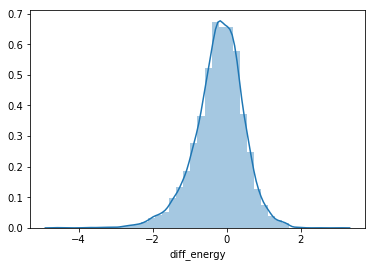

In [30]:
sns.distplot(de["diff_energy"], bins=40)
print(de['diff_energy'].mean())

-0.08856193339862879


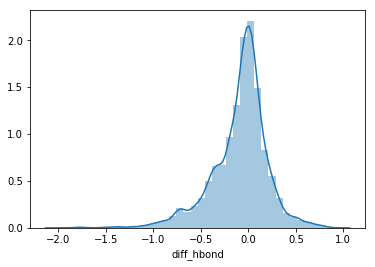

In [31]:
sns.distplot(de["diff_hbond"], bins=40)
print(de['diff_hbond'].mean())

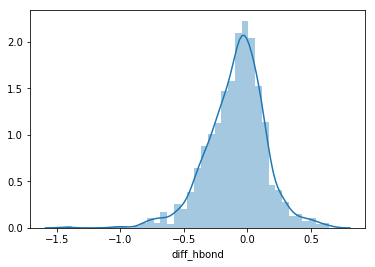

In [34]:
sns.distplot(de.groupby('design').mean()['diff_hbond'])

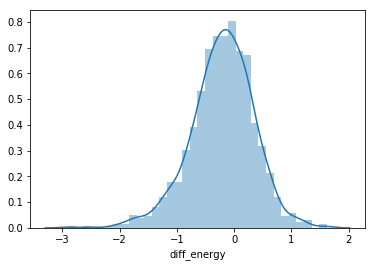

In [35]:
sns.distplot(de.groupby('design').mean()['diff_energy'])

In [31]:
dmean = de.groupby('design').mean()
print(dmean)

                            diff_energy  diff_hbond  diff_sum  rank
design                                                             
0__input_0001_0002_1_0001     -0.023790    0.287237  0.263447   5.5
0__input_0001_0002_1_0004      0.284743    0.127449  0.412192   5.5
0__input_0001_0002_2_0004      0.116753   -0.115576  0.001177   5.5
0__input_0001_0002_3_0005      0.274082   -0.078299  0.195783   5.5
0__input_0001_0004_1_0001     -0.045322    0.007956 -0.037366   5.5
0__input_0001_0004_2_0002     -0.100539   -0.200410 -0.300949   5.5
0__input_0001_0004_2_0003     -0.421912   -0.218870 -0.640782   5.5
0__input_0001_0004_2_0004     -0.033769   -0.140312 -0.174081   5.5
0__input_0001_0004_3_0004     -0.078507   -0.060207 -0.138714   5.5
0__input_0001_0004_5_0002      0.410214    0.115482  0.525696   5.5
0__input_0001_0004_5_0005      0.023241   -0.286658 -0.263417   5.5
0__input_0001_0004_6_0005     -0.437800   -0.260223 -0.698023   5.5
0__input_0001_0005_1_0001      0.150619    0.123

In [32]:
dmean.loc[(dmean['diff_energy'] < 0.1) & (dmean['diff_hbond'] <0.1)].shape

(650, 4)

In [33]:
de["diff_sum"] = de['diff_energy'] + de['diff_hbond']
de["rank"] = de.groupby('design')["diff_sum"].rank(ascending=True)
#de = de.loc[~(de["design"] == "15__input_0005_0005_5_0001")]
#dranked['design'], dranked['surface'] = dranked.index.str.split('/',1).str
print(de)

                                                    diff_energy  diff_hbond  \
26__input_0095_0002_3_0001/26__input_0095_0002_...    -0.772110   -0.347080   
26__input_0095_0002_3_0001/26__input_0095_0002_...     0.170430    0.158300   
26__input_0095_0002_3_0001/26__input_0095_0002_...    -1.391020   -0.637640   
26__input_0095_0002_3_0001/26__input_0095_0002_...    -0.459810   -0.415890   
26__input_0095_0002_3_0001/26__input_0095_0002_...    -0.821500   -0.555990   
26__input_0095_0002_3_0001/26__input_0095_0002_...     0.129980    0.153260   
26__input_0095_0002_3_0001/26__input_0095_0002_...    -0.263990    0.134220   
26__input_0095_0002_3_0001/26__input_0095_0002_...    -0.155440    0.206100   
26__input_0095_0002_3_0001/26__input_0095_0002_...    -0.456780   -0.470900   
26__input_0095_0002_3_0001/26__input_0095_0002_...    -0.359370   -0.473010   
31__input_0119_0002_1_0002/31__input_0119_0002_...     0.245340    0.159400   
31__input_0119_0002_1_0002/31__input_0119_0002_...  

In [34]:
# Change of plan: many of the filtered-out designs in previous step actually look good. Take all 1020 designs to next stage. 
hbond_set = py.rosetta.core.scoring.hbonds.HBondSet()
designs_list = []

for index, row in dmean.iterrows():
    model = index
#    parent = '_'.join(index.split('_')[:-1])
#    print(parent)
#    score_file = model + "/" + "score.sc"
#    ds = pd.read_csv(score_file, sep='\s+', header=1)
#    cst_i = '../' + parent + '/cst'
    hbonds = {'acc':[], 'don':[]}

    good_designs = []
    with open(model+".pdb", 'r') as fi:
        for line in fi:
            if "HBNet" in line:
                if int(line.split()[2]) in [10,68] :
                    hbonds['don'].append(int(line.split()[2]))
                else:
                    hbonds['acc'].append(int(line.split()[2]))
    t = len(hbonds['don'])

    for i in range(1,11):
        n = 0
        design = model + '/' + model + '_' + "{:04d}".format(i) + '.pdb'
        pose = py.pose_from_pdb(design)
        pose.update_residue_neighbors()
        py.rosetta.core.scoring.hbonds.fill_hbond_set(pose, False, hbond_set)
        for hb in range(1, hbond_set.nhbonds()+1):
            if hbond_set.hbond(hb).don_res() in hbonds['don'] and hbond_set.hbond(hb).acc_res() in hbonds['acc'] and hbond_set.hbond(hb).don_hatm_is_backbone() == False and hbond_set.hbond(hb).acc_atm_is_backbone() == False:
                n += 1
        if n == t :
            good_designs.append(model+'_'+"{:04d}".format(i)+'.pdb')
    print(good_designs)

    top_found = False
    r = 1
    while top_found == False and r < 11:
        print(r)
        top = de.loc[(de["rank"] == r) & (de["design"] == model)].surface.item()
        if top in good_designs:
            top_found = True
            designs_list.append(model+"/"+top)
        else:
            r += 1
            
print(designs_list)
print(len(designs_list))




core.import_pose.import_pose: File '0__input_0001_0002_1_0001/0__input_0001_0002_1_0001_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '0__input_0001_0002_1_0001/0__input_0001_0002_1_0001_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '0__input_0001_0002_1_0001/0__input_0001_0002_1_0001_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '0__input_0001_0002_1_0001/0__input_0001_0002_1_0001_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '0__input_0001_0002_1_0001/0__input_0001_0002_1_0001_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '0__input_0001_0002_1_0001/0__input_0001_0002_1_0001_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '0__input_0001_0002_1_0001/0__input_0001_0002_1_0001_0007.pdb' automatically determined to be of type PDB
core.import_p

core.import_pose.import_pose: File '0__input_0001_0004_1_0001/0__input_0001_0004_1_0001_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '0__input_0001_0004_1_0001/0__input_0001_0004_1_0001_0010.pdb' automatically determined to be of type PDB
['0__input_0001_0004_1_0001_0001.pdb', '0__input_0001_0004_1_0001_0002.pdb', '0__input_0001_0004_1_0001_0003.pdb', '0__input_0001_0004_1_0001_0004.pdb', '0__input_0001_0004_1_0001_0005.pdb', '0__input_0001_0004_1_0001_0006.pdb', '0__input_0001_0004_1_0001_0007.pdb', '0__input_0001_0004_1_0001_0008.pdb', '0__input_0001_0004_1_0001_0009.pdb', '0__input_0001_0004_1_0001_0010.pdb']
1
core.import_pose.import_pose: File '0__input_0001_0004_2_0002/0__input_0001_0004_2_0002_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '0__input_0001_0004_2_0002/0__input_0001_0004_2_0002_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '0__input_0001_000

core.import_pose.import_pose: File '0__input_0001_0004_5_0002/0__input_0001_0004_5_0002_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '0__input_0001_0004_5_0002/0__input_0001_0004_5_0002_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '0__input_0001_0004_5_0002/0__input_0001_0004_5_0002_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '0__input_0001_0004_5_0002/0__input_0001_0004_5_0002_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '0__input_0001_0004_5_0002/0__input_0001_0004_5_0002_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '0__input_0001_0004_5_0002/0__input_0001_0004_5_0002_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '0__input_0001_0004_5_0002/0__input_0001_0004_5_0002_0010.pdb' automatically determined to be of type PDB
['0__input_00

core.import_pose.import_pose: File '0__input_0001_0005_2_0005/0__input_0001_0005_2_0005_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '0__input_0001_0005_2_0005/0__input_0001_0005_2_0005_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '0__input_0001_0005_2_0005/0__input_0001_0005_2_0005_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '0__input_0001_0005_2_0005/0__input_0001_0005_2_0005_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '0__input_0001_0005_2_0005/0__input_0001_0005_2_0005_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '0__input_0001_0005_2_0005/0__input_0001_0005_2_0005_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '0__input_0001_0005_2_0005/0__input_0001_0005_2_0005_0008.pdb' automatically determined to be of type PDB
core.import_p

core.import_pose.import_pose: File '0__input_0001_0005_4_0004/0__input_0001_0005_4_0004_0010.pdb' automatically determined to be of type PDB
['0__input_0001_0005_4_0004_0001.pdb', '0__input_0001_0005_4_0004_0002.pdb', '0__input_0001_0005_4_0004_0003.pdb', '0__input_0001_0005_4_0004_0004.pdb', '0__input_0001_0005_4_0004_0005.pdb', '0__input_0001_0005_4_0004_0006.pdb', '0__input_0001_0005_4_0004_0007.pdb', '0__input_0001_0005_4_0004_0008.pdb', '0__input_0001_0005_4_0004_0009.pdb', '0__input_0001_0005_4_0004_0010.pdb']
1
core.import_pose.import_pose: File '0__input_0001_0005_4_0005/0__input_0001_0005_4_0005_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '0__input_0001_0005_4_0005/0__input_0001_0005_4_0005_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '0__input_0001_0005_4_0005/0__input_0001_0005_4_0005_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '0__input_0001_000

core.import_pose.import_pose: File '10__input_0109_0001_1_0004/10__input_0109_0001_1_0004_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '10__input_0109_0001_1_0004/10__input_0109_0001_1_0004_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '10__input_0109_0001_1_0004/10__input_0109_0001_1_0004_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '10__input_0109_0001_1_0004/10__input_0109_0001_1_0004_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '10__input_0109_0001_1_0004/10__input_0109_0001_1_0004_0010.pdb' automatically determined to be of type PDB
['10__input_0109_0001_1_0004_0001.pdb', '10__input_0109_0001_1_0004_0002.pdb', '10__input_0109_0001_1_0004_0003.pdb', '10__input_0109_0001_1_0004_0004.pdb', '10__input_0109_0001_1_0004_0005.pdb', '10__input_0109_0001_1_0004_0006.pdb', '10__input_0109_0001_1_0004_0007.pdb', '10__input_

core.import_pose.import_pose: File '10__input_0109_0003_3_0004/10__input_0109_0003_3_0004_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '10__input_0109_0003_3_0004/10__input_0109_0003_3_0004_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '10__input_0109_0003_3_0004/10__input_0109_0003_3_0004_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '10__input_0109_0003_3_0004/10__input_0109_0003_3_0004_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '10__input_0109_0003_3_0004/10__input_0109_0003_3_0004_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '10__input_0109_0003_3_0004/10__input_0109_0003_3_0004_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '10__input_0109_0003_3_0004/10__input_0109_0003_3_0004_0008.pdb' automatically determined to be of type PDB

core.import_pose.import_pose: File '11__input_0191_0001_1_0003/11__input_0191_0001_1_0003_0010.pdb' automatically determined to be of type PDB
['11__input_0191_0001_1_0003_0001.pdb', '11__input_0191_0001_1_0003_0002.pdb', '11__input_0191_0001_1_0003_0003.pdb', '11__input_0191_0001_1_0003_0004.pdb', '11__input_0191_0001_1_0003_0005.pdb', '11__input_0191_0001_1_0003_0006.pdb', '11__input_0191_0001_1_0003_0007.pdb', '11__input_0191_0001_1_0003_0008.pdb', '11__input_0191_0001_1_0003_0009.pdb', '11__input_0191_0001_1_0003_0010.pdb']
1
core.import_pose.import_pose: File '11__input_0191_0001_2_0002/11__input_0191_0001_2_0002_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '11__input_0191_0001_2_0002/11__input_0191_0001_2_0002_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '11__input_0191_0001_2_0002/11__input_0191_0001_2_0002_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 

core.import_pose.import_pose: File '11__input_0191_0001_5_0001/11__input_0191_0001_5_0001_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '11__input_0191_0001_5_0001/11__input_0191_0001_5_0001_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '11__input_0191_0001_5_0001/11__input_0191_0001_5_0001_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '11__input_0191_0001_5_0001/11__input_0191_0001_5_0001_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '11__input_0191_0001_5_0001/11__input_0191_0001_5_0001_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '11__input_0191_0001_5_0001/11__input_0191_0001_5_0001_0010.pdb' automatically determined to be of type PDB
['11__input_0191_0001_5_0001_0002.pdb', '11__input_0191_0001_5_0001_0004.pdb', '11__input_0191_0001_5_0001_0005.pdb', '11__input_0191_0001_5_0

core.import_pose.import_pose: File '11__input_0191_0001_7_0005/11__input_0191_0001_7_0005_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '11__input_0191_0001_7_0005/11__input_0191_0001_7_0005_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '11__input_0191_0001_7_0005/11__input_0191_0001_7_0005_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '11__input_0191_0001_7_0005/11__input_0191_0001_7_0005_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '11__input_0191_0001_7_0005/11__input_0191_0001_7_0005_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '11__input_0191_0001_7_0005/11__input_0191_0001_7_0005_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '11__input_0191_0001_7_0005/11__input_0191_0001_7_0005_0008.pdb' automatically determined to be of type PDB

core.import_pose.import_pose: File '11__input_0191_0003_3_0002/11__input_0191_0003_3_0002_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '11__input_0191_0003_3_0002/11__input_0191_0003_3_0002_0010.pdb' automatically determined to be of type PDB
['11__input_0191_0003_3_0002_0001.pdb', '11__input_0191_0003_3_0002_0002.pdb', '11__input_0191_0003_3_0002_0003.pdb', '11__input_0191_0003_3_0002_0004.pdb', '11__input_0191_0003_3_0002_0005.pdb', '11__input_0191_0003_3_0002_0006.pdb', '11__input_0191_0003_3_0002_0007.pdb', '11__input_0191_0003_3_0002_0008.pdb', '11__input_0191_0003_3_0002_0009.pdb', '11__input_0191_0003_3_0002_0010.pdb']
1
core.import_pose.import_pose: File '11__input_0191_0003_3_0003/11__input_0191_0003_3_0003_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '11__input_0191_0003_3_0003/11__input_0191_0003_3_0003_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 

core.import_pose.import_pose: File '11__input_0191_0004_1_0005/11__input_0191_0004_1_0005_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '11__input_0191_0004_1_0005/11__input_0191_0004_1_0005_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '11__input_0191_0004_1_0005/11__input_0191_0004_1_0005_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '11__input_0191_0004_1_0005/11__input_0191_0004_1_0005_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '11__input_0191_0004_1_0005/11__input_0191_0004_1_0005_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '11__input_0191_0004_1_0005/11__input_0191_0004_1_0005_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '11__input_0191_0004_1_0005/11__input_0191_0004_1_0005_0009.pdb' automatically determined to be of type PDB

core.import_pose.import_pose: File '11__input_0191_0004_6_0005/11__input_0191_0004_6_0005_0010.pdb' automatically determined to be of type PDB
['11__input_0191_0004_6_0005_0001.pdb', '11__input_0191_0004_6_0005_0002.pdb', '11__input_0191_0004_6_0005_0003.pdb', '11__input_0191_0004_6_0005_0004.pdb', '11__input_0191_0004_6_0005_0005.pdb', '11__input_0191_0004_6_0005_0006.pdb', '11__input_0191_0004_6_0005_0007.pdb', '11__input_0191_0004_6_0005_0008.pdb', '11__input_0191_0004_6_0005_0009.pdb', '11__input_0191_0004_6_0005_0010.pdb']
1
core.import_pose.import_pose: File '11__input_0191_0005_1_0003/11__input_0191_0005_1_0003_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '11__input_0191_0005_1_0003/11__input_0191_0005_1_0003_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '11__input_0191_0005_1_0003/11__input_0191_0005_1_0003_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 

core.import_pose.import_pose: File '11__input_0191_0005_4_0004/11__input_0191_0005_4_0004_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '11__input_0191_0005_4_0004/11__input_0191_0005_4_0004_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '11__input_0191_0005_4_0004/11__input_0191_0005_4_0004_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '11__input_0191_0005_4_0004/11__input_0191_0005_4_0004_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '11__input_0191_0005_4_0004/11__input_0191_0005_4_0004_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '11__input_0191_0005_4_0004/11__input_0191_0005_4_0004_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '11__input_0191_0005_4_0004/11__input_0191_0005_4_0004_0010.pdb' automatically determined to be of type PDB

['12__input_0050_0004_1_0002_0001.pdb', '12__input_0050_0004_1_0002_0002.pdb', '12__input_0050_0004_1_0002_0003.pdb', '12__input_0050_0004_1_0002_0004.pdb', '12__input_0050_0004_1_0002_0005.pdb', '12__input_0050_0004_1_0002_0006.pdb', '12__input_0050_0004_1_0002_0007.pdb', '12__input_0050_0004_1_0002_0008.pdb', '12__input_0050_0004_1_0002_0009.pdb', '12__input_0050_0004_1_0002_0010.pdb']
1
core.import_pose.import_pose: File '12__input_0050_0004_1_0004/12__input_0050_0004_1_0004_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '12__input_0050_0004_1_0004/12__input_0050_0004_1_0004_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '12__input_0050_0004_1_0004/12__input_0050_0004_1_0004_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '12__input_0050_0004_1_0004/12__input_0050_0004_1_0004_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 

core.import_pose.import_pose: File '13__input_0017_0005_4_0004/13__input_0017_0005_4_0004_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '13__input_0017_0005_4_0004/13__input_0017_0005_4_0004_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '13__input_0017_0005_4_0004/13__input_0017_0005_4_0004_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '13__input_0017_0005_4_0004/13__input_0017_0005_4_0004_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '13__input_0017_0005_4_0004/13__input_0017_0005_4_0004_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '13__input_0017_0005_4_0004/13__input_0017_0005_4_0004_0010.pdb' automatically determined to be of type PDB
['13__input_0017_0005_4_0004_0001.pdb', '13__input_0017_0005_4_0004_0007.pdb', '13__input_0017_0005_4_0004_0009.pdb']
1
core.import_pose.impor

core.import_pose.import_pose: File '13__input_0110_0002_1_0001/13__input_0110_0002_1_0001_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '13__input_0110_0002_1_0001/13__input_0110_0002_1_0001_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '13__input_0110_0002_1_0001/13__input_0110_0002_1_0001_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '13__input_0110_0002_1_0001/13__input_0110_0002_1_0001_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '13__input_0110_0002_1_0001/13__input_0110_0002_1_0001_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '13__input_0110_0002_1_0001/13__input_0110_0002_1_0001_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '13__input_0110_0002_1_0001/13__input_0110_0002_1_0001_0009.pdb' automatically determined to be of type PDB

['13__input_0135_0001_1_0002_0001.pdb', '13__input_0135_0001_1_0002_0002.pdb', '13__input_0135_0001_1_0002_0003.pdb', '13__input_0135_0001_1_0002_0004.pdb', '13__input_0135_0001_1_0002_0005.pdb', '13__input_0135_0001_1_0002_0006.pdb', '13__input_0135_0001_1_0002_0007.pdb', '13__input_0135_0001_1_0002_0008.pdb', '13__input_0135_0001_1_0002_0009.pdb', '13__input_0135_0001_1_0002_0010.pdb']
1
core.import_pose.import_pose: File '13__input_0135_0001_1_0004/13__input_0135_0001_1_0004_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '13__input_0135_0001_1_0004/13__input_0135_0001_1_0004_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '13__input_0135_0001_1_0004/13__input_0135_0001_1_0004_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '13__input_0135_0001_1_0004/13__input_0135_0001_1_0004_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 

core.import_pose.import_pose: File '13__input_0135_0002_1_0003/13__input_0135_0002_1_0003_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '13__input_0135_0002_1_0003/13__input_0135_0002_1_0003_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '13__input_0135_0002_1_0003/13__input_0135_0002_1_0003_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '13__input_0135_0002_1_0003/13__input_0135_0002_1_0003_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '13__input_0135_0002_1_0003/13__input_0135_0002_1_0003_0010.pdb' automatically determined to be of type PDB
['13__input_0135_0002_1_0003_0001.pdb', '13__input_0135_0002_1_0003_0002.pdb', '13__input_0135_0002_1_0003_0003.pdb', '13__input_0135_0002_1_0003_0004.pdb', '13__input_0135_0002_1_0003_0005.pdb', '13__input_0135_0002_1_0003_0006.pdb', '13__input_0135_0002_1_0003_0007.pdb', '13__input_

core.import_pose.import_pose: File '13__input_0135_0005_1_0001/13__input_0135_0005_1_0001_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '13__input_0135_0005_1_0001/13__input_0135_0005_1_0001_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '13__input_0135_0005_1_0001/13__input_0135_0005_1_0001_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '13__input_0135_0005_1_0001/13__input_0135_0005_1_0001_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '13__input_0135_0005_1_0001/13__input_0135_0005_1_0001_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '13__input_0135_0005_1_0001/13__input_0135_0005_1_0001_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '13__input_0135_0005_1_0001/13__input_0135_0005_1_0001_0008.pdb' automatically determined to be of type PDB

core.import_pose.import_pose: File '13__input_0135_0005_1_0005/13__input_0135_0005_1_0005_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '13__input_0135_0005_1_0005/13__input_0135_0005_1_0005_0010.pdb' automatically determined to be of type PDB
['13__input_0135_0005_1_0005_0001.pdb', '13__input_0135_0005_1_0005_0002.pdb', '13__input_0135_0005_1_0005_0003.pdb', '13__input_0135_0005_1_0005_0004.pdb', '13__input_0135_0005_1_0005_0005.pdb', '13__input_0135_0005_1_0005_0006.pdb', '13__input_0135_0005_1_0005_0007.pdb', '13__input_0135_0005_1_0005_0008.pdb', '13__input_0135_0005_1_0005_0009.pdb', '13__input_0135_0005_1_0005_0010.pdb']
1
core.import_pose.import_pose: File '13__input_0157_0001_2_0002/13__input_0157_0001_2_0002_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '13__input_0157_0001_2_0002/13__input_0157_0001_2_0002_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 

core.import_pose.import_pose: File '13__input_0157_0001_4_0004/13__input_0157_0001_4_0004_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '13__input_0157_0001_4_0004/13__input_0157_0001_4_0004_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '13__input_0157_0001_4_0004/13__input_0157_0001_4_0004_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '13__input_0157_0001_4_0004/13__input_0157_0001_4_0004_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '13__input_0157_0001_4_0004/13__input_0157_0001_4_0004_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '13__input_0157_0001_4_0004/13__input_0157_0001_4_0004_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '13__input_0157_0001_4_0004/13__input_0157_0001_4_0004_0009.pdb' automatically determined to be of type PDB

core.import_pose.import_pose: File '13__input_0157_0004_1_0002/13__input_0157_0004_1_0002_0010.pdb' automatically determined to be of type PDB
['13__input_0157_0004_1_0002_0001.pdb', '13__input_0157_0004_1_0002_0002.pdb', '13__input_0157_0004_1_0002_0003.pdb', '13__input_0157_0004_1_0002_0004.pdb', '13__input_0157_0004_1_0002_0005.pdb', '13__input_0157_0004_1_0002_0006.pdb', '13__input_0157_0004_1_0002_0007.pdb', '13__input_0157_0004_1_0002_0008.pdb', '13__input_0157_0004_1_0002_0009.pdb', '13__input_0157_0004_1_0002_0010.pdb']
1
core.import_pose.import_pose: File '13__input_0157_0004_1_0004/13__input_0157_0004_1_0004_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '13__input_0157_0004_1_0004/13__input_0157_0004_1_0004_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '13__input_0157_0004_1_0004/13__input_0157_0004_1_0004_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 

core.import_pose.import_pose: File '13__input_0157_0005_2_0004/13__input_0157_0005_2_0004_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '13__input_0157_0005_2_0004/13__input_0157_0005_2_0004_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '13__input_0157_0005_2_0004/13__input_0157_0005_2_0004_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '13__input_0157_0005_2_0004/13__input_0157_0005_2_0004_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '13__input_0157_0005_2_0004/13__input_0157_0005_2_0004_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '13__input_0157_0005_2_0004/13__input_0157_0005_2_0004_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '13__input_0157_0005_2_0004/13__input_0157_0005_2_0004_0010.pdb' automatically determined to be of type PDB

['13__input_0166_0001_1_0004_0001.pdb', '13__input_0166_0001_1_0004_0002.pdb', '13__input_0166_0001_1_0004_0003.pdb', '13__input_0166_0001_1_0004_0004.pdb', '13__input_0166_0001_1_0004_0005.pdb', '13__input_0166_0001_1_0004_0006.pdb', '13__input_0166_0001_1_0004_0007.pdb', '13__input_0166_0001_1_0004_0008.pdb', '13__input_0166_0001_1_0004_0009.pdb', '13__input_0166_0001_1_0004_0010.pdb']
1
core.import_pose.import_pose: File '13__input_0166_0001_3_0005/13__input_0166_0001_3_0005_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '13__input_0166_0001_3_0005/13__input_0166_0001_3_0005_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '13__input_0166_0001_3_0005/13__input_0166_0001_3_0005_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '13__input_0166_0001_3_0005/13__input_0166_0001_3_0005_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 

core.import_pose.import_pose: File '13__input_0166_0001_4_0005/13__input_0166_0001_4_0005_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '13__input_0166_0001_4_0005/13__input_0166_0001_4_0005_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '13__input_0166_0001_4_0005/13__input_0166_0001_4_0005_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '13__input_0166_0001_4_0005/13__input_0166_0001_4_0005_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '13__input_0166_0001_4_0005/13__input_0166_0001_4_0005_0010.pdb' automatically determined to be of type PDB
['13__input_0166_0001_4_0005_0001.pdb', '13__input_0166_0001_4_0005_0002.pdb', '13__input_0166_0001_4_0005_0003.pdb', '13__input_0166_0001_4_0005_0004.pdb', '13__input_0166_0001_4_0005_0005.pdb', '13__input_0166_0001_4_0005_0006.pdb', '13__input_0166_0001_4_0005_0007.pdb', '13__input_

core.import_pose.import_pose: File '13__input_0166_0002_2_0001/13__input_0166_0002_2_0001_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '13__input_0166_0002_2_0001/13__input_0166_0002_2_0001_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '13__input_0166_0002_2_0001/13__input_0166_0002_2_0001_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '13__input_0166_0002_2_0001/13__input_0166_0002_2_0001_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '13__input_0166_0002_2_0001/13__input_0166_0002_2_0001_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '13__input_0166_0002_2_0001/13__input_0166_0002_2_0001_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '13__input_0166_0002_2_0001/13__input_0166_0002_2_0001_0008.pdb' automatically determined to be of type PDB

core.import_pose.import_pose: File '13__input_0166_0002_8_0003/13__input_0166_0002_8_0003_0010.pdb' automatically determined to be of type PDB
['13__input_0166_0002_8_0003_0001.pdb', '13__input_0166_0002_8_0003_0002.pdb', '13__input_0166_0002_8_0003_0003.pdb', '13__input_0166_0002_8_0003_0004.pdb', '13__input_0166_0002_8_0003_0005.pdb', '13__input_0166_0002_8_0003_0006.pdb', '13__input_0166_0002_8_0003_0007.pdb', '13__input_0166_0002_8_0003_0008.pdb', '13__input_0166_0002_8_0003_0009.pdb', '13__input_0166_0002_8_0003_0010.pdb']
1
core.import_pose.import_pose: File '13__input_0166_0002_8_0004/13__input_0166_0002_8_0004_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '13__input_0166_0002_8_0004/13__input_0166_0002_8_0004_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '13__input_0166_0002_8_0004/13__input_0166_0002_8_0004_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 

core.import_pose.import_pose: File '13__input_0166_0003_4_0001/13__input_0166_0003_4_0001_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '13__input_0166_0003_4_0001/13__input_0166_0003_4_0001_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '13__input_0166_0003_4_0001/13__input_0166_0003_4_0001_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '13__input_0166_0003_4_0001/13__input_0166_0003_4_0001_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '13__input_0166_0003_4_0001/13__input_0166_0003_4_0001_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '13__input_0166_0003_4_0001/13__input_0166_0003_4_0001_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '13__input_0166_0003_4_0001/13__input_0166_0003_4_0001_0010.pdb' automatically determined to be of type PDB

['13__input_0166_0004_1_0001_0001.pdb', '13__input_0166_0004_1_0001_0002.pdb', '13__input_0166_0004_1_0001_0003.pdb', '13__input_0166_0004_1_0001_0004.pdb', '13__input_0166_0004_1_0001_0005.pdb', '13__input_0166_0004_1_0001_0006.pdb', '13__input_0166_0004_1_0001_0007.pdb', '13__input_0166_0004_1_0001_0008.pdb', '13__input_0166_0004_1_0001_0009.pdb', '13__input_0166_0004_1_0001_0010.pdb']
1
core.import_pose.import_pose: File '13__input_0166_0004_1_0002/13__input_0166_0004_1_0002_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '13__input_0166_0004_1_0002/13__input_0166_0004_1_0002_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '13__input_0166_0004_1_0002/13__input_0166_0004_1_0002_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '13__input_0166_0004_1_0002/13__input_0166_0004_1_0002_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 

core.import_pose.import_pose: File '13__input_0166_0005_1_0002/13__input_0166_0005_1_0002_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '13__input_0166_0005_1_0002/13__input_0166_0005_1_0002_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '13__input_0166_0005_1_0002/13__input_0166_0005_1_0002_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '13__input_0166_0005_1_0002/13__input_0166_0005_1_0002_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '13__input_0166_0005_1_0002/13__input_0166_0005_1_0002_0010.pdb' automatically determined to be of type PDB
['13__input_0166_0005_1_0002_0001.pdb', '13__input_0166_0005_1_0002_0002.pdb', '13__input_0166_0005_1_0002_0003.pdb', '13__input_0166_0005_1_0002_0004.pdb', '13__input_0166_0005_1_0002_0005.pdb', '13__input_0166_0005_1_0002_0006.pdb', '13__input_0166_0005_1_0002_0007.pdb', '13__input_

core.import_pose.import_pose: File '13__input_0166_0005_4_0001/13__input_0166_0005_4_0001_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '13__input_0166_0005_4_0001/13__input_0166_0005_4_0001_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '13__input_0166_0005_4_0001/13__input_0166_0005_4_0001_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '13__input_0166_0005_4_0001/13__input_0166_0005_4_0001_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '13__input_0166_0005_4_0001/13__input_0166_0005_4_0001_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '13__input_0166_0005_4_0001/13__input_0166_0005_4_0001_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '13__input_0166_0005_4_0001/13__input_0166_0005_4_0001_0008.pdb' automatically determined to be of type PDB

core.import_pose.import_pose: File '13__input_0177_0001_1_0001/13__input_0177_0001_1_0001_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '13__input_0177_0001_1_0001/13__input_0177_0001_1_0001_0010.pdb' automatically determined to be of type PDB
['13__input_0177_0001_1_0001_0001.pdb', '13__input_0177_0001_1_0001_0002.pdb', '13__input_0177_0001_1_0001_0003.pdb', '13__input_0177_0001_1_0001_0004.pdb', '13__input_0177_0001_1_0001_0005.pdb', '13__input_0177_0001_1_0001_0006.pdb', '13__input_0177_0001_1_0001_0007.pdb', '13__input_0177_0001_1_0001_0008.pdb', '13__input_0177_0001_1_0001_0009.pdb', '13__input_0177_0001_1_0001_0010.pdb']
1
core.import_pose.import_pose: File '13__input_0177_0001_1_0003/13__input_0177_0001_1_0003_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '13__input_0177_0001_1_0003/13__input_0177_0001_1_0003_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 

core.import_pose.import_pose: File '13__input_0177_0001_3_0003/13__input_0177_0001_3_0003_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '13__input_0177_0001_3_0003/13__input_0177_0001_3_0003_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '13__input_0177_0001_3_0003/13__input_0177_0001_3_0003_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '13__input_0177_0001_3_0003/13__input_0177_0001_3_0003_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '13__input_0177_0001_3_0003/13__input_0177_0001_3_0003_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '13__input_0177_0001_3_0003/13__input_0177_0001_3_0003_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '13__input_0177_0001_3_0003/13__input_0177_0001_3_0003_0010.pdb' automatically determined to be of type PDB

['13__input_0177_0002_2_0002_0003.pdb', '13__input_0177_0002_2_0002_0004.pdb', '13__input_0177_0002_2_0002_0005.pdb', '13__input_0177_0002_2_0002_0006.pdb', '13__input_0177_0002_2_0002_0007.pdb', '13__input_0177_0002_2_0002_0008.pdb', '13__input_0177_0002_2_0002_0009.pdb', '13__input_0177_0002_2_0002_0010.pdb']
1
core.import_pose.import_pose: File '13__input_0177_0004_2_0001/13__input_0177_0004_2_0001_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '13__input_0177_0004_2_0001/13__input_0177_0004_2_0001_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '13__input_0177_0004_2_0001/13__input_0177_0004_2_0001_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '13__input_0177_0004_2_0001/13__input_0177_0004_2_0001_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '13__input_0177_0004_2_0001/13__input_0177_0004_2_0001_0005.pdb' automatically

core.import_pose.import_pose: File '13__input_0177_0004_5_0004/13__input_0177_0004_5_0004_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '13__input_0177_0004_5_0004/13__input_0177_0004_5_0004_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '13__input_0177_0004_5_0004/13__input_0177_0004_5_0004_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '13__input_0177_0004_5_0004/13__input_0177_0004_5_0004_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '13__input_0177_0004_5_0004/13__input_0177_0004_5_0004_0010.pdb' automatically determined to be of type PDB
['13__input_0177_0004_5_0004_0001.pdb', '13__input_0177_0004_5_0004_0002.pdb', '13__input_0177_0004_5_0004_0003.pdb', '13__input_0177_0004_5_0004_0004.pdb', '13__input_0177_0004_5_0004_0005.pdb', '13__input_0177_0004_5_0004_0006.pdb', '13__input_0177_0004_5_0004_0008.pdb', '13__input_

core.import_pose.import_pose: File '14__input_0056_0002_2_0002/14__input_0056_0002_2_0002_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '14__input_0056_0002_2_0002/14__input_0056_0002_2_0002_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '14__input_0056_0002_2_0002/14__input_0056_0002_2_0002_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '14__input_0056_0002_2_0002/14__input_0056_0002_2_0002_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '14__input_0056_0002_2_0002/14__input_0056_0002_2_0002_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '14__input_0056_0002_2_0002/14__input_0056_0002_2_0002_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '14__input_0056_0002_2_0002/14__input_0056_0002_2_0002_0008.pdb' automatically determined to be of type PDB

core.import_pose.import_pose: File '14__input_0056_0003_2_0003/14__input_0056_0003_2_0003_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '14__input_0056_0003_2_0003/14__input_0056_0003_2_0003_0010.pdb' automatically determined to be of type PDB
['14__input_0056_0003_2_0003_0001.pdb', '14__input_0056_0003_2_0003_0002.pdb', '14__input_0056_0003_2_0003_0003.pdb', '14__input_0056_0003_2_0003_0004.pdb', '14__input_0056_0003_2_0003_0005.pdb', '14__input_0056_0003_2_0003_0006.pdb', '14__input_0056_0003_2_0003_0007.pdb', '14__input_0056_0003_2_0003_0008.pdb', '14__input_0056_0003_2_0003_0009.pdb', '14__input_0056_0003_2_0003_0010.pdb']
1
core.import_pose.import_pose: File '14__input_0056_0003_2_0004/14__input_0056_0003_2_0004_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '14__input_0056_0003_2_0004/14__input_0056_0003_2_0004_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 

core.import_pose.import_pose: File '14__input_0137_0003_3_0004/14__input_0137_0003_3_0004_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '14__input_0137_0003_3_0004/14__input_0137_0003_3_0004_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '14__input_0137_0003_3_0004/14__input_0137_0003_3_0004_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '14__input_0137_0003_3_0004/14__input_0137_0003_3_0004_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '14__input_0137_0003_3_0004/14__input_0137_0003_3_0004_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '14__input_0137_0003_3_0004/14__input_0137_0003_3_0004_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '14__input_0137_0003_3_0004/14__input_0137_0003_3_0004_0010.pdb' automatically determined to be of type PDB

core.import_pose.import_pose: File '14__input_0137_0003_8_0005/14__input_0137_0003_8_0005_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '14__input_0137_0003_8_0005/14__input_0137_0003_8_0005_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '14__input_0137_0003_8_0005/14__input_0137_0003_8_0005_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '14__input_0137_0003_8_0005/14__input_0137_0003_8_0005_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '14__input_0137_0003_8_0005/14__input_0137_0003_8_0005_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '14__input_0137_0003_8_0005/14__input_0137_0003_8_0005_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '14__input_0137_0003_8_0005/14__input_0137_0003_8_0005_0008.pdb' automatically determined to be of type PDB

core.import_pose.import_pose: File '14__input_0137_0005_1_0003/14__input_0137_0005_1_0003_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '14__input_0137_0005_1_0003/14__input_0137_0005_1_0003_0010.pdb' automatically determined to be of type PDB
['14__input_0137_0005_1_0003_0001.pdb', '14__input_0137_0005_1_0003_0002.pdb', '14__input_0137_0005_1_0003_0004.pdb', '14__input_0137_0005_1_0003_0005.pdb', '14__input_0137_0005_1_0003_0006.pdb', '14__input_0137_0005_1_0003_0007.pdb', '14__input_0137_0005_1_0003_0008.pdb', '14__input_0137_0005_1_0003_0009.pdb', '14__input_0137_0005_1_0003_0010.pdb']
1
core.import_pose.import_pose: File '14__input_0137_0005_1_0005/14__input_0137_0005_1_0005_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '14__input_0137_0005_1_0005/14__input_0137_0005_1_0005_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '14__input_0137_0005_1_0005/14__input_0

core.import_pose.import_pose: File '14__input_0188_0004_1_0002/14__input_0188_0004_1_0002_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '14__input_0188_0004_1_0002/14__input_0188_0004_1_0002_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '14__input_0188_0004_1_0002/14__input_0188_0004_1_0002_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '14__input_0188_0004_1_0002/14__input_0188_0004_1_0002_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '14__input_0188_0004_1_0002/14__input_0188_0004_1_0002_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '14__input_0188_0004_1_0002/14__input_0188_0004_1_0002_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '14__input_0188_0004_1_0002/14__input_0188_0004_1_0002_0010.pdb' automatically determined to be of type PDB

['14__input_0188_0004_2_0004_0001.pdb', '14__input_0188_0004_2_0004_0002.pdb', '14__input_0188_0004_2_0004_0003.pdb', '14__input_0188_0004_2_0004_0004.pdb', '14__input_0188_0004_2_0004_0005.pdb', '14__input_0188_0004_2_0004_0006.pdb', '14__input_0188_0004_2_0004_0007.pdb', '14__input_0188_0004_2_0004_0008.pdb', '14__input_0188_0004_2_0004_0009.pdb', '14__input_0188_0004_2_0004_0010.pdb']
1
core.import_pose.import_pose: File '14__input_0188_0004_2_0005/14__input_0188_0004_2_0005_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '14__input_0188_0004_2_0005/14__input_0188_0004_2_0005_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '14__input_0188_0004_2_0005/14__input_0188_0004_2_0005_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '14__input_0188_0004_2_0005/14__input_0188_0004_2_0005_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 

core.import_pose.import_pose: File '14__input_0188_0004_5_0002/14__input_0188_0004_5_0002_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '14__input_0188_0004_5_0002/14__input_0188_0004_5_0002_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '14__input_0188_0004_5_0002/14__input_0188_0004_5_0002_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '14__input_0188_0004_5_0002/14__input_0188_0004_5_0002_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '14__input_0188_0004_5_0002/14__input_0188_0004_5_0002_0010.pdb' automatically determined to be of type PDB
['14__input_0188_0004_5_0002_0001.pdb', '14__input_0188_0004_5_0002_0002.pdb', '14__input_0188_0004_5_0002_0003.pdb', '14__input_0188_0004_5_0002_0004.pdb', '14__input_0188_0004_5_0002_0005.pdb', '14__input_0188_0004_5_0002_0006.pdb', '14__input_0188_0004_5_0002_0007.pdb', '14__input_

core.import_pose.import_pose: File '15__input_0005_0002_3_0001/15__input_0005_0002_3_0001_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '15__input_0005_0002_3_0001/15__input_0005_0002_3_0001_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '15__input_0005_0002_3_0001/15__input_0005_0002_3_0001_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '15__input_0005_0002_3_0001/15__input_0005_0002_3_0001_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '15__input_0005_0002_3_0001/15__input_0005_0002_3_0001_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '15__input_0005_0002_3_0001/15__input_0005_0002_3_0001_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '15__input_0005_0002_3_0001/15__input_0005_0002_3_0001_0008.pdb' automatically determined to be of type PDB

core.import_pose.import_pose: File '15__input_0005_0004_2_0002/15__input_0005_0004_2_0002_0010.pdb' automatically determined to be of type PDB
['15__input_0005_0004_2_0002_0001.pdb', '15__input_0005_0004_2_0002_0003.pdb', '15__input_0005_0004_2_0002_0007.pdb', '15__input_0005_0004_2_0002_0008.pdb', '15__input_0005_0004_2_0002_0009.pdb', '15__input_0005_0004_2_0002_0010.pdb']
1
2
3
4
core.import_pose.import_pose: File '15__input_0005_0004_2_0003/15__input_0005_0004_2_0003_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '15__input_0005_0004_2_0003/15__input_0005_0004_2_0003_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '15__input_0005_0004_2_0003/15__input_0005_0004_2_0003_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '15__input_0005_0004_2_0003/15__input_0005_0004_2_0003_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '15__in

core.import_pose.import_pose: File '15__input_0005_0004_5_0002/15__input_0005_0004_5_0002_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '15__input_0005_0004_5_0002/15__input_0005_0004_5_0002_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '15__input_0005_0004_5_0002/15__input_0005_0004_5_0002_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '15__input_0005_0004_5_0002/15__input_0005_0004_5_0002_0010.pdb' automatically determined to be of type PDB
['15__input_0005_0004_5_0002_0001.pdb', '15__input_0005_0004_5_0002_0002.pdb', '15__input_0005_0004_5_0002_0003.pdb', '15__input_0005_0004_5_0002_0004.pdb', '15__input_0005_0004_5_0002_0005.pdb', '15__input_0005_0004_5_0002_0006.pdb', '15__input_0005_0004_5_0002_0008.pdb', '15__input_0005_0004_5_0002_0009.pdb']
1
core.import_pose.import_pose: File '15__input_0005_0004_5_0004/15__input_0005_0004_5_0004_0001.pdb' automatically

core.import_pose.import_pose: File '15__input_0005_0005_1_0003/15__input_0005_0005_1_0003_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '15__input_0005_0005_1_0003/15__input_0005_0005_1_0003_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '15__input_0005_0005_1_0003/15__input_0005_0005_1_0003_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '15__input_0005_0005_1_0003/15__input_0005_0005_1_0003_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '15__input_0005_0005_1_0003/15__input_0005_0005_1_0003_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '15__input_0005_0005_1_0003/15__input_0005_0005_1_0003_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '15__input_0005_0005_1_0003/15__input_0005_0005_1_0003_0009.pdb' automatically determined to be of type PDB

core.import_pose.import_pose: File '15__input_0005_0005_4_0002/15__input_0005_0005_4_0002_0010.pdb' automatically determined to be of type PDB
['15__input_0005_0005_4_0002_0001.pdb', '15__input_0005_0005_4_0002_0002.pdb', '15__input_0005_0005_4_0002_0003.pdb', '15__input_0005_0005_4_0002_0004.pdb', '15__input_0005_0005_4_0002_0005.pdb', '15__input_0005_0005_4_0002_0006.pdb', '15__input_0005_0005_4_0002_0007.pdb', '15__input_0005_0005_4_0002_0008.pdb', '15__input_0005_0005_4_0002_0009.pdb', '15__input_0005_0005_4_0002_0010.pdb']
1
core.import_pose.import_pose: File '15__input_0005_0005_4_0004/15__input_0005_0005_4_0004_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '15__input_0005_0005_4_0004/15__input_0005_0005_4_0004_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '15__input_0005_0005_4_0004/15__input_0005_0005_4_0004_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 

core.import_pose.import_pose: File '16__input_0054_0002_2_0002/16__input_0054_0002_2_0002_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '16__input_0054_0002_2_0002/16__input_0054_0002_2_0002_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '16__input_0054_0002_2_0002/16__input_0054_0002_2_0002_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '16__input_0054_0002_2_0002/16__input_0054_0002_2_0002_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '16__input_0054_0002_2_0002/16__input_0054_0002_2_0002_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '16__input_0054_0002_2_0002/16__input_0054_0002_2_0002_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '16__input_0054_0002_2_0002/16__input_0054_0002_2_0002_0010.pdb' automatically determined to be of type PDB

['17__input_0087_0002_1_0001_0001.pdb', '17__input_0087_0002_1_0001_0002.pdb', '17__input_0087_0002_1_0001_0003.pdb', '17__input_0087_0002_1_0001_0004.pdb', '17__input_0087_0002_1_0001_0005.pdb', '17__input_0087_0002_1_0001_0006.pdb', '17__input_0087_0002_1_0001_0007.pdb', '17__input_0087_0002_1_0001_0008.pdb', '17__input_0087_0002_1_0001_0009.pdb', '17__input_0087_0002_1_0001_0010.pdb']
1
core.import_pose.import_pose: File '17__input_0087_0002_3_0001/17__input_0087_0002_3_0001_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '17__input_0087_0002_3_0001/17__input_0087_0002_3_0001_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '17__input_0087_0002_3_0001/17__input_0087_0002_3_0001_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '17__input_0087_0002_3_0001/17__input_0087_0002_3_0001_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 

core.import_pose.import_pose: File '17__input_0087_0002_5_0003/17__input_0087_0002_5_0003_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '17__input_0087_0002_5_0003/17__input_0087_0002_5_0003_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '17__input_0087_0002_5_0003/17__input_0087_0002_5_0003_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '17__input_0087_0002_5_0003/17__input_0087_0002_5_0003_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '17__input_0087_0002_5_0003/17__input_0087_0002_5_0003_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '17__input_0087_0002_5_0003/17__input_0087_0002_5_0003_0010.pdb' automatically determined to be of type PDB
['17__input_0087_0002_5_0003_0001.pdb', '17__input_0087_0002_5_0003_0002.pdb', '17__input_0087_0002_5_0003_0003.pdb', '17__input_0087_0002_5_0

core.import_pose.import_pose: File '17__input_0087_0003_4_0003/17__input_0087_0003_4_0003_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '17__input_0087_0003_4_0003/17__input_0087_0003_4_0003_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '17__input_0087_0003_4_0003/17__input_0087_0003_4_0003_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '17__input_0087_0003_4_0003/17__input_0087_0003_4_0003_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '17__input_0087_0003_4_0003/17__input_0087_0003_4_0003_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '17__input_0087_0003_4_0003/17__input_0087_0003_4_0003_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '17__input_0087_0003_4_0003/17__input_0087_0003_4_0003_0008.pdb' automatically determined to be of type PDB

core.import_pose.import_pose: File '17__input_0150_0002_2_0004/17__input_0150_0002_2_0004_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '17__input_0150_0002_2_0004/17__input_0150_0002_2_0004_0010.pdb' automatically determined to be of type PDB
['17__input_0150_0002_2_0004_0001.pdb', '17__input_0150_0002_2_0004_0002.pdb', '17__input_0150_0002_2_0004_0003.pdb', '17__input_0150_0002_2_0004_0004.pdb', '17__input_0150_0002_2_0004_0005.pdb', '17__input_0150_0002_2_0004_0006.pdb', '17__input_0150_0002_2_0004_0007.pdb', '17__input_0150_0002_2_0004_0008.pdb', '17__input_0150_0002_2_0004_0009.pdb', '17__input_0150_0002_2_0004_0010.pdb']
1
core.import_pose.import_pose: File '17__input_0150_0002_2_0005/17__input_0150_0002_2_0005_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '17__input_0150_0002_2_0005/17__input_0150_0002_2_0005_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 

core.import_pose.import_pose: File '17__input_0150_0002_6_0002/17__input_0150_0002_6_0002_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '17__input_0150_0002_6_0002/17__input_0150_0002_6_0002_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '17__input_0150_0002_6_0002/17__input_0150_0002_6_0002_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '17__input_0150_0002_6_0002/17__input_0150_0002_6_0002_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '17__input_0150_0002_6_0002/17__input_0150_0002_6_0002_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '17__input_0150_0002_6_0002/17__input_0150_0002_6_0002_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '17__input_0150_0002_6_0002/17__input_0150_0002_6_0002_0010.pdb' automatically determined to be of type PDB

core.import_pose.import_pose: File '19__input_0130_0001_13_0001/19__input_0130_0001_13_0001_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '19__input_0130_0001_13_0001/19__input_0130_0001_13_0001_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '19__input_0130_0001_13_0001/19__input_0130_0001_13_0001_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '19__input_0130_0001_13_0001/19__input_0130_0001_13_0001_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '19__input_0130_0001_13_0001/19__input_0130_0001_13_0001_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '19__input_0130_0001_13_0001/19__input_0130_0001_13_0001_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '19__input_0130_0001_13_0001/19__input_0130_0001_13_0001_0010.pdb' automatically determined to 

['19__input_0130_0001_1_0005_0001.pdb', '19__input_0130_0001_1_0005_0002.pdb', '19__input_0130_0001_1_0005_0003.pdb', '19__input_0130_0001_1_0005_0004.pdb', '19__input_0130_0001_1_0005_0005.pdb', '19__input_0130_0001_1_0005_0006.pdb', '19__input_0130_0001_1_0005_0007.pdb', '19__input_0130_0001_1_0005_0008.pdb', '19__input_0130_0001_1_0005_0009.pdb', '19__input_0130_0001_1_0005_0010.pdb']
1
core.import_pose.import_pose: File '19__input_0130_0001_3_0001/19__input_0130_0001_3_0001_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '19__input_0130_0001_3_0001/19__input_0130_0001_3_0001_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '19__input_0130_0001_3_0001/19__input_0130_0001_3_0001_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '19__input_0130_0001_3_0001/19__input_0130_0001_3_0001_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 

core.import_pose.import_pose: File '19__input_0130_0001_3_0005/19__input_0130_0001_3_0005_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '19__input_0130_0001_3_0005/19__input_0130_0001_3_0005_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '19__input_0130_0001_3_0005/19__input_0130_0001_3_0005_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '19__input_0130_0001_3_0005/19__input_0130_0001_3_0005_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '19__input_0130_0001_3_0005/19__input_0130_0001_3_0005_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '19__input_0130_0001_3_0005/19__input_0130_0001_3_0005_0010.pdb' automatically determined to be of type PDB
['19__input_0130_0001_3_0005_0002.pdb', '19__input_0130_0001_3_0005_0003.pdb', '19__input_0130_0001_3_0005_0004.pdb', '19__input_0130_0001_3_0

core.import_pose.import_pose: File '19__input_0130_0004_1_0004/19__input_0130_0004_1_0004_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '19__input_0130_0004_1_0004/19__input_0130_0004_1_0004_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '19__input_0130_0004_1_0004/19__input_0130_0004_1_0004_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '19__input_0130_0004_1_0004/19__input_0130_0004_1_0004_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '19__input_0130_0004_1_0004/19__input_0130_0004_1_0004_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '19__input_0130_0004_1_0004/19__input_0130_0004_1_0004_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '19__input_0130_0004_1_0004/19__input_0130_0004_1_0004_0008.pdb' automatically determined to be of type PDB

core.import_pose.import_pose: File '1__input_0029_0003_1_0005/1__input_0029_0003_1_0005_0010.pdb' automatically determined to be of type PDB
['1__input_0029_0003_1_0005_0001.pdb', '1__input_0029_0003_1_0005_0002.pdb', '1__input_0029_0003_1_0005_0003.pdb', '1__input_0029_0003_1_0005_0004.pdb', '1__input_0029_0003_1_0005_0005.pdb', '1__input_0029_0003_1_0005_0006.pdb', '1__input_0029_0003_1_0005_0007.pdb', '1__input_0029_0003_1_0005_0008.pdb', '1__input_0029_0003_1_0005_0009.pdb', '1__input_0029_0003_1_0005_0010.pdb']
1
core.import_pose.import_pose: File '1__input_0029_0004_1_0002/1__input_0029_0004_1_0002_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '1__input_0029_0004_1_0002/1__input_0029_0004_1_0002_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '1__input_0029_0004_1_0002/1__input_0029_0004_1_0002_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '1__input_0029_000

core.import_pose.import_pose: File '1__input_0029_0004_2_0004/1__input_0029_0004_2_0004_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '1__input_0029_0004_2_0004/1__input_0029_0004_2_0004_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '1__input_0029_0004_2_0004/1__input_0029_0004_2_0004_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '1__input_0029_0004_2_0004/1__input_0029_0004_2_0004_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '1__input_0029_0004_2_0004/1__input_0029_0004_2_0004_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '1__input_0029_0004_2_0004/1__input_0029_0004_2_0004_0010.pdb' automatically determined to be of type PDB
['1__input_0029_0004_2_0004_0001.pdb', '1__input_0029_0004_2_0004_0002.pdb', '1__input_0029_0004_2_0004_0003.pdb', '1__input_0029_0004_2_0004_0004.pdb', '

core.import_pose.import_pose: File '1__input_0172_0001_3_0005/1__input_0172_0001_3_0005_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '1__input_0172_0001_3_0005/1__input_0172_0001_3_0005_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '1__input_0172_0001_3_0005/1__input_0172_0001_3_0005_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '1__input_0172_0001_3_0005/1__input_0172_0001_3_0005_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '1__input_0172_0001_3_0005/1__input_0172_0001_3_0005_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '1__input_0172_0001_3_0005/1__input_0172_0001_3_0005_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '1__input_0172_0001_3_0005/1__input_0172_0001_3_0005_0008.pdb' automatically determined to be of type PDB
core.import_p

core.import_pose.import_pose: File '1__input_0172_0003_2_0002/1__input_0172_0003_2_0002_0010.pdb' automatically determined to be of type PDB
['1__input_0172_0003_2_0002_0001.pdb', '1__input_0172_0003_2_0002_0002.pdb', '1__input_0172_0003_2_0002_0003.pdb', '1__input_0172_0003_2_0002_0004.pdb', '1__input_0172_0003_2_0002_0005.pdb', '1__input_0172_0003_2_0002_0006.pdb', '1__input_0172_0003_2_0002_0007.pdb', '1__input_0172_0003_2_0002_0008.pdb', '1__input_0172_0003_2_0002_0009.pdb', '1__input_0172_0003_2_0002_0010.pdb']
1
core.import_pose.import_pose: File '1__input_0172_0003_2_0003/1__input_0172_0003_2_0003_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '1__input_0172_0003_2_0003/1__input_0172_0003_2_0003_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '1__input_0172_0003_2_0003/1__input_0172_0003_2_0003_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '1__input_0172_000

core.import_pose.import_pose: File '1__input_0172_0005_3_0002/1__input_0172_0005_3_0002_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '1__input_0172_0005_3_0002/1__input_0172_0005_3_0002_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '1__input_0172_0005_3_0002/1__input_0172_0005_3_0002_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '1__input_0172_0005_3_0002/1__input_0172_0005_3_0002_0010.pdb' automatically determined to be of type PDB
['1__input_0172_0005_3_0002_0001.pdb', '1__input_0172_0005_3_0002_0002.pdb', '1__input_0172_0005_3_0002_0003.pdb', '1__input_0172_0005_3_0002_0004.pdb', '1__input_0172_0005_3_0002_0005.pdb', '1__input_0172_0005_3_0002_0006.pdb', '1__input_0172_0005_3_0002_0007.pdb', '1__input_0172_0005_3_0002_0008.pdb', '1__input_0172_0005_3_0002_0009.pdb', '1__input_0172_0005_3_0002_0010.pdb']
1
core.import_pose.import_pose: File '1__input_0172_000

core.import_pose.import_pose: File '1__input_0178_0004_5_0001/1__input_0178_0004_5_0001_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '1__input_0178_0004_5_0001/1__input_0178_0004_5_0001_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '1__input_0178_0004_5_0001/1__input_0178_0004_5_0001_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '1__input_0178_0004_5_0001/1__input_0178_0004_5_0001_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '1__input_0178_0004_5_0001/1__input_0178_0004_5_0001_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '1__input_0178_0004_5_0001/1__input_0178_0004_5_0001_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '1__input_0178_0004_5_0001/1__input_0178_0004_5_0001_0008.pdb' automatically determined to be of type PDB
core.import_p

core.import_pose.import_pose: File '1__input_0178_0004_6_0004/1__input_0178_0004_6_0004_0010.pdb' automatically determined to be of type PDB
['1__input_0178_0004_6_0004_0001.pdb', '1__input_0178_0004_6_0004_0002.pdb', '1__input_0178_0004_6_0004_0003.pdb', '1__input_0178_0004_6_0004_0005.pdb', '1__input_0178_0004_6_0004_0006.pdb', '1__input_0178_0004_6_0004_0007.pdb', '1__input_0178_0004_6_0004_0008.pdb', '1__input_0178_0004_6_0004_0009.pdb', '1__input_0178_0004_6_0004_0010.pdb']
1
2
core.import_pose.import_pose: File '1__input_0178_0004_9_0005/1__input_0178_0004_9_0005_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '1__input_0178_0004_9_0005/1__input_0178_0004_9_0005_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '1__input_0178_0004_9_0005/1__input_0178_0004_9_0005_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '1__input_0178_0004_9_0005/1__input_0178_0004_9_0005_0

core.import_pose.import_pose: File '20__input_0077_0004_1_0005/20__input_0077_0004_1_0005_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '20__input_0077_0004_1_0005/20__input_0077_0004_1_0005_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '20__input_0077_0004_1_0005/20__input_0077_0004_1_0005_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '20__input_0077_0004_1_0005/20__input_0077_0004_1_0005_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '20__input_0077_0004_1_0005/20__input_0077_0004_1_0005_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '20__input_0077_0004_1_0005/20__input_0077_0004_1_0005_0010.pdb' automatically determined to be of type PDB
['20__input_0077_0004_1_0005_0001.pdb', '20__input_0077_0004_1_0005_0002.pdb', '20__input_0077_0004_1_0005_0003.pdb', '20__input_0077_0004_1_0

core.import_pose.import_pose: File '20__input_0147_0005_1_0001/20__input_0147_0005_1_0001_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '20__input_0147_0005_1_0001/20__input_0147_0005_1_0001_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '20__input_0147_0005_1_0001/20__input_0147_0005_1_0001_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '20__input_0147_0005_1_0001/20__input_0147_0005_1_0001_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '20__input_0147_0005_1_0001/20__input_0147_0005_1_0001_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '20__input_0147_0005_1_0001/20__input_0147_0005_1_0001_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '20__input_0147_0005_1_0001/20__input_0147_0005_1_0001_0008.pdb' automatically determined to be of type PDB

core.import_pose.import_pose: File '20__input_0147_0005_1_0005/20__input_0147_0005_1_0005_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '20__input_0147_0005_1_0005/20__input_0147_0005_1_0005_0010.pdb' automatically determined to be of type PDB
['20__input_0147_0005_1_0005_0001.pdb', '20__input_0147_0005_1_0005_0002.pdb', '20__input_0147_0005_1_0005_0003.pdb', '20__input_0147_0005_1_0005_0004.pdb', '20__input_0147_0005_1_0005_0005.pdb', '20__input_0147_0005_1_0005_0006.pdb', '20__input_0147_0005_1_0005_0007.pdb', '20__input_0147_0005_1_0005_0008.pdb', '20__input_0147_0005_1_0005_0009.pdb', '20__input_0147_0005_1_0005_0010.pdb']
1
core.import_pose.import_pose: File '20__input_0147_0005_2_0003/20__input_0147_0005_2_0003_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '20__input_0147_0005_2_0003/20__input_0147_0005_2_0003_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 

core.import_pose.import_pose: File '20__input_0170_0005_1_0004/20__input_0170_0005_1_0004_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '20__input_0170_0005_1_0004/20__input_0170_0005_1_0004_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '20__input_0170_0005_1_0004/20__input_0170_0005_1_0004_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '20__input_0170_0005_1_0004/20__input_0170_0005_1_0004_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '20__input_0170_0005_1_0004/20__input_0170_0005_1_0004_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '20__input_0170_0005_1_0004/20__input_0170_0005_1_0004_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '20__input_0170_0005_1_0004/20__input_0170_0005_1_0004_0009.pdb' automatically determined to be of type PDB

core.import_pose.import_pose: File '24__input_0048_0002_1_0005/24__input_0048_0002_1_0005_0010.pdb' automatically determined to be of type PDB
['24__input_0048_0002_1_0005_0001.pdb', '24__input_0048_0002_1_0005_0002.pdb', '24__input_0048_0002_1_0005_0003.pdb', '24__input_0048_0002_1_0005_0004.pdb', '24__input_0048_0002_1_0005_0005.pdb', '24__input_0048_0002_1_0005_0006.pdb', '24__input_0048_0002_1_0005_0007.pdb', '24__input_0048_0002_1_0005_0008.pdb', '24__input_0048_0002_1_0005_0009.pdb', '24__input_0048_0002_1_0005_0010.pdb']
1
core.import_pose.import_pose: File '24__input_0048_0002_2_0001/24__input_0048_0002_2_0001_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '24__input_0048_0002_2_0001/24__input_0048_0002_2_0001_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '24__input_0048_0002_2_0001/24__input_0048_0002_2_0001_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 

core.import_pose.import_pose: File '24__input_0048_0003_1_0001/24__input_0048_0003_1_0001_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '24__input_0048_0003_1_0001/24__input_0048_0003_1_0001_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '24__input_0048_0003_1_0001/24__input_0048_0003_1_0001_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '24__input_0048_0003_1_0001/24__input_0048_0003_1_0001_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '24__input_0048_0003_1_0001/24__input_0048_0003_1_0001_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '24__input_0048_0003_1_0001/24__input_0048_0003_1_0001_0010.pdb' automatically determined to be of type PDB
['24__input_0048_0003_1_0001_0001.pdb', '24__input_0048_0003_1_0001_0002.pdb', '24__input_0048_0003_1_0001_0003.pdb', '24__input_0048_0003_1_0

core.import_pose.import_pose: File '25__input_0028_0005_1_0002/25__input_0028_0005_1_0002_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '25__input_0028_0005_1_0002/25__input_0028_0005_1_0002_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '25__input_0028_0005_1_0002/25__input_0028_0005_1_0002_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '25__input_0028_0005_1_0002/25__input_0028_0005_1_0002_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '25__input_0028_0005_1_0002/25__input_0028_0005_1_0002_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '25__input_0028_0005_1_0002/25__input_0028_0005_1_0002_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '25__input_0028_0005_1_0002/25__input_0028_0005_1_0002_0008.pdb' automatically determined to be of type PDB

core.import_pose.import_pose: File '25__input_0198_0001_2_0001/25__input_0198_0001_2_0001_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '25__input_0198_0001_2_0001/25__input_0198_0001_2_0001_0010.pdb' automatically determined to be of type PDB
['25__input_0198_0001_2_0001_0001.pdb', '25__input_0198_0001_2_0001_0002.pdb', '25__input_0198_0001_2_0001_0003.pdb', '25__input_0198_0001_2_0001_0004.pdb', '25__input_0198_0001_2_0001_0005.pdb', '25__input_0198_0001_2_0001_0006.pdb', '25__input_0198_0001_2_0001_0007.pdb', '25__input_0198_0001_2_0001_0008.pdb', '25__input_0198_0001_2_0001_0009.pdb', '25__input_0198_0001_2_0001_0010.pdb']
1
core.import_pose.import_pose: File '25__input_0198_0002_1_0001/25__input_0198_0002_1_0001_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '25__input_0198_0002_1_0001/25__input_0198_0002_1_0001_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 

core.import_pose.import_pose: File '25__input_0198_0003_1_0003/25__input_0198_0003_1_0003_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '25__input_0198_0003_1_0003/25__input_0198_0003_1_0003_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '25__input_0198_0003_1_0003/25__input_0198_0003_1_0003_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '25__input_0198_0003_1_0003/25__input_0198_0003_1_0003_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '25__input_0198_0003_1_0003/25__input_0198_0003_1_0003_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '25__input_0198_0003_1_0003/25__input_0198_0003_1_0003_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '25__input_0198_0003_1_0003/25__input_0198_0003_1_0003_0010.pdb' automatically determined to be of type PDB

['26__input_0095_0001_2_0002_0001.pdb', '26__input_0095_0001_2_0002_0002.pdb', '26__input_0095_0001_2_0002_0003.pdb', '26__input_0095_0001_2_0002_0004.pdb', '26__input_0095_0001_2_0002_0005.pdb', '26__input_0095_0001_2_0002_0006.pdb', '26__input_0095_0001_2_0002_0007.pdb', '26__input_0095_0001_2_0002_0008.pdb', '26__input_0095_0001_2_0002_0009.pdb', '26__input_0095_0001_2_0002_0010.pdb']
1
core.import_pose.import_pose: File '26__input_0095_0001_4_0002/26__input_0095_0001_4_0002_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '26__input_0095_0001_4_0002/26__input_0095_0001_4_0002_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '26__input_0095_0001_4_0002/26__input_0095_0001_4_0002_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '26__input_0095_0001_4_0002/26__input_0095_0001_4_0002_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 

core.import_pose.import_pose: File '26__input_0095_0001_6_0001/26__input_0095_0001_6_0001_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '26__input_0095_0001_6_0001/26__input_0095_0001_6_0001_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '26__input_0095_0001_6_0001/26__input_0095_0001_6_0001_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '26__input_0095_0001_6_0001/26__input_0095_0001_6_0001_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '26__input_0095_0001_6_0001/26__input_0095_0001_6_0001_0010.pdb' automatically determined to be of type PDB
['26__input_0095_0001_6_0001_0001.pdb', '26__input_0095_0001_6_0001_0002.pdb', '26__input_0095_0001_6_0001_0003.pdb', '26__input_0095_0001_6_0001_0004.pdb', '26__input_0095_0001_6_0001_0005.pdb', '26__input_0095_0001_6_0001_0006.pdb', '26__input_0095_0001_6_0001_0007.pdb', '26__input_

core.import_pose.import_pose: File '26__input_0095_0002_2_0001/26__input_0095_0002_2_0001_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '26__input_0095_0002_2_0001/26__input_0095_0002_2_0001_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '26__input_0095_0002_2_0001/26__input_0095_0002_2_0001_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '26__input_0095_0002_2_0001/26__input_0095_0002_2_0001_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '26__input_0095_0002_2_0001/26__input_0095_0002_2_0001_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '26__input_0095_0002_2_0001/26__input_0095_0002_2_0001_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '26__input_0095_0002_2_0001/26__input_0095_0002_2_0001_0008.pdb' automatically determined to be of type PDB

core.import_pose.import_pose: File '26__input_0095_0003_4_0005/26__input_0095_0003_4_0005_0010.pdb' automatically determined to be of type PDB
['26__input_0095_0003_4_0005_0001.pdb', '26__input_0095_0003_4_0005_0002.pdb', '26__input_0095_0003_4_0005_0003.pdb', '26__input_0095_0003_4_0005_0005.pdb', '26__input_0095_0003_4_0005_0006.pdb', '26__input_0095_0003_4_0005_0007.pdb', '26__input_0095_0003_4_0005_0008.pdb', '26__input_0095_0003_4_0005_0009.pdb', '26__input_0095_0003_4_0005_0010.pdb']
1
2
core.import_pose.import_pose: File '27__input_0044_0004_1_0004/27__input_0044_0004_1_0004_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '27__input_0044_0004_1_0004/27__input_0044_0004_1_0004_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '27__input_0044_0004_1_0004/27__input_0044_0004_1_0004_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '27__input_0044_0004_1_0004/27__input

core.import_pose.import_pose: File '27__input_0044_0004_3_0002/27__input_0044_0004_3_0002_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '27__input_0044_0004_3_0002/27__input_0044_0004_3_0002_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '27__input_0044_0004_3_0002/27__input_0044_0004_3_0002_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '27__input_0044_0004_3_0002/27__input_0044_0004_3_0002_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '27__input_0044_0004_3_0002/27__input_0044_0004_3_0002_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '27__input_0044_0004_3_0002/27__input_0044_0004_3_0002_0010.pdb' automatically determined to be of type PDB
['27__input_0044_0004_3_0002_0001.pdb', '27__input_0044_0004_3_0002_0002.pdb', '27__input_0044_0004_3_0002_0003.pdb', '27__input_0044_0004_3_0

core.import_pose.import_pose: File '27__input_0044_0004_6_0003/27__input_0044_0004_6_0003_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '27__input_0044_0004_6_0003/27__input_0044_0004_6_0003_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '27__input_0044_0004_6_0003/27__input_0044_0004_6_0003_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '27__input_0044_0004_6_0003/27__input_0044_0004_6_0003_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '27__input_0044_0004_6_0003/27__input_0044_0004_6_0003_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '27__input_0044_0004_6_0003/27__input_0044_0004_6_0003_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '27__input_0044_0004_6_0003/27__input_0044_0004_6_0003_0008.pdb' automatically determined to be of type PDB

core.import_pose.import_pose: File '27__input_0098_0003_1_0003/27__input_0098_0003_1_0003_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '27__input_0098_0003_1_0003/27__input_0098_0003_1_0003_0010.pdb' automatically determined to be of type PDB
['27__input_0098_0003_1_0003_0001.pdb', '27__input_0098_0003_1_0003_0002.pdb', '27__input_0098_0003_1_0003_0003.pdb', '27__input_0098_0003_1_0003_0004.pdb', '27__input_0098_0003_1_0003_0005.pdb', '27__input_0098_0003_1_0003_0006.pdb', '27__input_0098_0003_1_0003_0007.pdb', '27__input_0098_0003_1_0003_0008.pdb', '27__input_0098_0003_1_0003_0009.pdb', '27__input_0098_0003_1_0003_0010.pdb']
1
core.import_pose.import_pose: File '27__input_0098_0003_1_0004/27__input_0098_0003_1_0004_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '27__input_0098_0003_1_0004/27__input_0098_0003_1_0004_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 

core.import_pose.import_pose: File '27__input_0098_0004_1_0005/27__input_0098_0004_1_0005_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '27__input_0098_0004_1_0005/27__input_0098_0004_1_0005_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '27__input_0098_0004_1_0005/27__input_0098_0004_1_0005_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '27__input_0098_0004_1_0005/27__input_0098_0004_1_0005_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '27__input_0098_0004_1_0005/27__input_0098_0004_1_0005_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '27__input_0098_0004_1_0005/27__input_0098_0004_1_0005_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '27__input_0098_0004_1_0005/27__input_0098_0004_1_0005_0010.pdb' automatically determined to be of type PDB

['27__input_0098_0005_1_0005_0001.pdb', '27__input_0098_0005_1_0005_0002.pdb', '27__input_0098_0005_1_0005_0003.pdb', '27__input_0098_0005_1_0005_0004.pdb', '27__input_0098_0005_1_0005_0005.pdb', '27__input_0098_0005_1_0005_0006.pdb', '27__input_0098_0005_1_0005_0007.pdb', '27__input_0098_0005_1_0005_0008.pdb', '27__input_0098_0005_1_0005_0009.pdb', '27__input_0098_0005_1_0005_0010.pdb']
1
core.import_pose.import_pose: File '28__input_0029_0003_1_0002/28__input_0029_0003_1_0002_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '28__input_0029_0003_1_0002/28__input_0029_0003_1_0002_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '28__input_0029_0003_1_0002/28__input_0029_0003_1_0002_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '28__input_0029_0003_1_0002/28__input_0029_0003_1_0002_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 

core.import_pose.import_pose: File '28__input_0038_0004_1_0001/28__input_0038_0004_1_0001_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '28__input_0038_0004_1_0001/28__input_0038_0004_1_0001_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '28__input_0038_0004_1_0001/28__input_0038_0004_1_0001_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '28__input_0038_0004_1_0001/28__input_0038_0004_1_0001_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '28__input_0038_0004_1_0001/28__input_0038_0004_1_0001_0010.pdb' automatically determined to be of type PDB
['28__input_0038_0004_1_0001_0001.pdb', '28__input_0038_0004_1_0001_0002.pdb', '28__input_0038_0004_1_0001_0003.pdb', '28__input_0038_0004_1_0001_0004.pdb', '28__input_0038_0004_1_0001_0005.pdb', '28__input_0038_0004_1_0001_0006.pdb', '28__input_0038_0004_1_0001_0007.pdb', '28__input_

core.import_pose.import_pose: File '28__input_0038_0005_2_0001/28__input_0038_0005_2_0001_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '28__input_0038_0005_2_0001/28__input_0038_0005_2_0001_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '28__input_0038_0005_2_0001/28__input_0038_0005_2_0001_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '28__input_0038_0005_2_0001/28__input_0038_0005_2_0001_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '28__input_0038_0005_2_0001/28__input_0038_0005_2_0001_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '28__input_0038_0005_2_0001/28__input_0038_0005_2_0001_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '28__input_0038_0005_2_0001/28__input_0038_0005_2_0001_0008.pdb' automatically determined to be of type PDB

core.import_pose.import_pose: File '29__input_0102_0004_1_0002/29__input_0102_0004_1_0002_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '29__input_0102_0004_1_0002/29__input_0102_0004_1_0002_0010.pdb' automatically determined to be of type PDB
['29__input_0102_0004_1_0002_0001.pdb', '29__input_0102_0004_1_0002_0002.pdb', '29__input_0102_0004_1_0002_0003.pdb', '29__input_0102_0004_1_0002_0004.pdb', '29__input_0102_0004_1_0002_0006.pdb', '29__input_0102_0004_1_0002_0007.pdb', '29__input_0102_0004_1_0002_0008.pdb', '29__input_0102_0004_1_0002_0009.pdb', '29__input_0102_0004_1_0002_0010.pdb']
1
core.import_pose.import_pose: File '29__input_0181_0001_1_0001/29__input_0181_0001_1_0001_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '29__input_0181_0001_1_0001/29__input_0181_0001_1_0001_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '29__input_0181_0001_1_0001/29__input_0

core.import_pose.import_pose: File '29__input_0181_0004_1_0003/29__input_0181_0004_1_0003_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '29__input_0181_0004_1_0003/29__input_0181_0004_1_0003_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '29__input_0181_0004_1_0003/29__input_0181_0004_1_0003_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '29__input_0181_0004_1_0003/29__input_0181_0004_1_0003_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '29__input_0181_0004_1_0003/29__input_0181_0004_1_0003_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '29__input_0181_0004_1_0003/29__input_0181_0004_1_0003_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '29__input_0181_0004_1_0003/29__input_0181_0004_1_0003_0010.pdb' automatically determined to be of type PDB

core.import_pose.import_pose: File '2__input_0051_0003_1_0002/2__input_0051_0003_1_0002_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '2__input_0051_0003_1_0002/2__input_0051_0003_1_0002_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '2__input_0051_0003_1_0002/2__input_0051_0003_1_0002_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '2__input_0051_0003_1_0002/2__input_0051_0003_1_0002_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '2__input_0051_0003_1_0002/2__input_0051_0003_1_0002_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '2__input_0051_0003_1_0002/2__input_0051_0003_1_0002_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '2__input_0051_0003_1_0002/2__input_0051_0003_1_0002_0008.pdb' automatically determined to be of type PDB
core.import_p

['2__input_0051_0003_3_0004_0001.pdb', '2__input_0051_0003_3_0004_0002.pdb', '2__input_0051_0003_3_0004_0003.pdb', '2__input_0051_0003_3_0004_0004.pdb', '2__input_0051_0003_3_0004_0005.pdb', '2__input_0051_0003_3_0004_0006.pdb', '2__input_0051_0003_3_0004_0007.pdb', '2__input_0051_0003_3_0004_0008.pdb', '2__input_0051_0003_3_0004_0009.pdb', '2__input_0051_0003_3_0004_0010.pdb']
1
core.import_pose.import_pose: File '2__input_0051_0003_3_0005/2__input_0051_0003_3_0005_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '2__input_0051_0003_3_0005/2__input_0051_0003_3_0005_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '2__input_0051_0003_3_0005/2__input_0051_0003_3_0005_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '2__input_0051_0003_3_0005/2__input_0051_0003_3_0005_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '2__input_0051_000

core.import_pose.import_pose: File '2__input_0102_0003_1_0001/2__input_0102_0003_1_0001_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '2__input_0102_0003_1_0001/2__input_0102_0003_1_0001_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '2__input_0102_0003_1_0001/2__input_0102_0003_1_0001_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '2__input_0102_0003_1_0001/2__input_0102_0003_1_0001_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '2__input_0102_0003_1_0001/2__input_0102_0003_1_0001_0010.pdb' automatically determined to be of type PDB
['2__input_0102_0003_1_0001_0001.pdb', '2__input_0102_0003_1_0001_0002.pdb', '2__input_0102_0003_1_0001_0003.pdb', '2__input_0102_0003_1_0001_0004.pdb', '2__input_0102_0003_1_0001_0005.pdb', '2__input_0102_0003_1_0001_0006.pdb', '2__input_0102_0003_1_0001_0007.pdb', '2__input_0102_0003_1_0001_0

core.import_pose.import_pose: File '30__input_0014_0002_1_0002/30__input_0014_0002_1_0002_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '30__input_0014_0002_1_0002/30__input_0014_0002_1_0002_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '30__input_0014_0002_1_0002/30__input_0014_0002_1_0002_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '30__input_0014_0002_1_0002/30__input_0014_0002_1_0002_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '30__input_0014_0002_1_0002/30__input_0014_0002_1_0002_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '30__input_0014_0002_1_0002/30__input_0014_0002_1_0002_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '30__input_0014_0002_1_0002/30__input_0014_0002_1_0002_0008.pdb' automatically determined to be of type PDB

core.import_pose.import_pose: File '30__input_0014_0003_1_0001/30__input_0014_0003_1_0001_0010.pdb' automatically determined to be of type PDB
['30__input_0014_0003_1_0001_0001.pdb', '30__input_0014_0003_1_0001_0002.pdb', '30__input_0014_0003_1_0001_0003.pdb', '30__input_0014_0003_1_0001_0004.pdb', '30__input_0014_0003_1_0001_0005.pdb', '30__input_0014_0003_1_0001_0006.pdb', '30__input_0014_0003_1_0001_0007.pdb', '30__input_0014_0003_1_0001_0008.pdb', '30__input_0014_0003_1_0001_0009.pdb', '30__input_0014_0003_1_0001_0010.pdb']
1
core.import_pose.import_pose: File '30__input_0014_0003_1_0004/30__input_0014_0003_1_0004_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '30__input_0014_0003_1_0004/30__input_0014_0003_1_0004_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '30__input_0014_0003_1_0004/30__input_0014_0003_1_0004_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 

core.import_pose.import_pose: File '30__input_0014_0003_7_0005/30__input_0014_0003_7_0005_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '30__input_0014_0003_7_0005/30__input_0014_0003_7_0005_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '30__input_0014_0003_7_0005/30__input_0014_0003_7_0005_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '30__input_0014_0003_7_0005/30__input_0014_0003_7_0005_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '30__input_0014_0003_7_0005/30__input_0014_0003_7_0005_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '30__input_0014_0003_7_0005/30__input_0014_0003_7_0005_0010.pdb' automatically determined to be of type PDB
['30__input_0014_0003_7_0005_0001.pdb', '30__input_0014_0003_7_0005_0002.pdb', '30__input_0014_0003_7_0005_0003.pdb', '30__input_0014_0003_7_0

core.import_pose.import_pose: File '30__input_0014_0005_10_0004/30__input_0014_0005_10_0004_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '30__input_0014_0005_10_0004/30__input_0014_0005_10_0004_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '30__input_0014_0005_10_0004/30__input_0014_0005_10_0004_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '30__input_0014_0005_10_0004/30__input_0014_0005_10_0004_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '30__input_0014_0005_10_0004/30__input_0014_0005_10_0004_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '30__input_0014_0005_10_0004/30__input_0014_0005_10_0004_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '30__input_0014_0005_10_0004/30__input_0014_0005_10_0004_0008.pdb' automatically determined to 

['30__input_0014_0005_4_0002_0001.pdb', '30__input_0014_0005_4_0002_0002.pdb', '30__input_0014_0005_4_0002_0003.pdb', '30__input_0014_0005_4_0002_0004.pdb', '30__input_0014_0005_4_0002_0005.pdb', '30__input_0014_0005_4_0002_0006.pdb', '30__input_0014_0005_4_0002_0007.pdb', '30__input_0014_0005_4_0002_0008.pdb', '30__input_0014_0005_4_0002_0009.pdb', '30__input_0014_0005_4_0002_0010.pdb']
1
core.import_pose.import_pose: File '30__input_0014_0005_9_0005/30__input_0014_0005_9_0005_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '30__input_0014_0005_9_0005/30__input_0014_0005_9_0005_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '30__input_0014_0005_9_0005/30__input_0014_0005_9_0005_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '30__input_0014_0005_9_0005/30__input_0014_0005_9_0005_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 

core.import_pose.import_pose: File '30__input_0160_0001_1_0004/30__input_0160_0001_1_0004_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '30__input_0160_0001_1_0004/30__input_0160_0001_1_0004_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '30__input_0160_0001_1_0004/30__input_0160_0001_1_0004_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '30__input_0160_0001_1_0004/30__input_0160_0001_1_0004_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '30__input_0160_0001_1_0004/30__input_0160_0001_1_0004_0010.pdb' automatically determined to be of type PDB
['30__input_0160_0001_1_0004_0001.pdb', '30__input_0160_0001_1_0004_0002.pdb', '30__input_0160_0001_1_0004_0003.pdb', '30__input_0160_0001_1_0004_0004.pdb', '30__input_0160_0001_1_0004_0005.pdb', '30__input_0160_0001_1_0004_0006.pdb', '30__input_0160_0001_1_0004_0007.pdb', '30__input_

core.import_pose.import_pose: File '31__input_0119_0002_1_0001/31__input_0119_0002_1_0001_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '31__input_0119_0002_1_0001/31__input_0119_0002_1_0001_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '31__input_0119_0002_1_0001/31__input_0119_0002_1_0001_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '31__input_0119_0002_1_0001/31__input_0119_0002_1_0001_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '31__input_0119_0002_1_0001/31__input_0119_0002_1_0001_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '31__input_0119_0002_1_0001/31__input_0119_0002_1_0001_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '31__input_0119_0002_1_0001/31__input_0119_0002_1_0001_0008.pdb' automatically determined to be of type PDB

core.import_pose.import_pose: File '31__input_0119_0002_1_0005/31__input_0119_0002_1_0005_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '31__input_0119_0002_1_0005/31__input_0119_0002_1_0005_0010.pdb' automatically determined to be of type PDB
['31__input_0119_0002_1_0005_0001.pdb', '31__input_0119_0002_1_0005_0002.pdb', '31__input_0119_0002_1_0005_0003.pdb', '31__input_0119_0002_1_0005_0004.pdb', '31__input_0119_0002_1_0005_0005.pdb', '31__input_0119_0002_1_0005_0006.pdb', '31__input_0119_0002_1_0005_0007.pdb', '31__input_0119_0002_1_0005_0008.pdb', '31__input_0119_0002_1_0005_0009.pdb', '31__input_0119_0002_1_0005_0010.pdb']
1
core.import_pose.import_pose: File '31__input_0119_0002_2_0002/31__input_0119_0002_2_0002_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '31__input_0119_0002_2_0002/31__input_0119_0002_2_0002_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 

core.import_pose.import_pose: File '31__input_0119_0005_1_0004/31__input_0119_0005_1_0004_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '31__input_0119_0005_1_0004/31__input_0119_0005_1_0004_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '31__input_0119_0005_1_0004/31__input_0119_0005_1_0004_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '31__input_0119_0005_1_0004/31__input_0119_0005_1_0004_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '31__input_0119_0005_1_0004/31__input_0119_0005_1_0004_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '31__input_0119_0005_1_0004/31__input_0119_0005_1_0004_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '31__input_0119_0005_1_0004/31__input_0119_0005_1_0004_0010.pdb' automatically determined to be of type PDB

['31__input_0119_0005_4_0003_0001.pdb', '31__input_0119_0005_4_0003_0002.pdb', '31__input_0119_0005_4_0003_0003.pdb', '31__input_0119_0005_4_0003_0004.pdb', '31__input_0119_0005_4_0003_0005.pdb', '31__input_0119_0005_4_0003_0006.pdb', '31__input_0119_0005_4_0003_0007.pdb', '31__input_0119_0005_4_0003_0008.pdb', '31__input_0119_0005_4_0003_0009.pdb', '31__input_0119_0005_4_0003_0010.pdb']
1
core.import_pose.import_pose: File '31__input_0119_0005_4_0004/31__input_0119_0005_4_0004_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '31__input_0119_0005_4_0004/31__input_0119_0005_4_0004_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '31__input_0119_0005_4_0004/31__input_0119_0005_4_0004_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '31__input_0119_0005_4_0004/31__input_0119_0005_4_0004_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 

core.import_pose.import_pose: File '31__input_0125_0001_1_0001/31__input_0125_0001_1_0001_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '31__input_0125_0001_1_0001/31__input_0125_0001_1_0001_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '31__input_0125_0001_1_0001/31__input_0125_0001_1_0001_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '31__input_0125_0001_1_0001/31__input_0125_0001_1_0001_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '31__input_0125_0001_1_0001/31__input_0125_0001_1_0001_0010.pdb' automatically determined to be of type PDB
['31__input_0125_0001_1_0001_0001.pdb', '31__input_0125_0001_1_0001_0002.pdb', '31__input_0125_0001_1_0001_0003.pdb', '31__input_0125_0001_1_0001_0004.pdb', '31__input_0125_0001_1_0001_0005.pdb', '31__input_0125_0001_1_0001_0006.pdb', '31__input_0125_0001_1_0001_0007.pdb', '31__input_

core.import_pose.import_pose: File '31__input_0125_0005_1_0005/31__input_0125_0005_1_0005_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '31__input_0125_0005_1_0005/31__input_0125_0005_1_0005_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '31__input_0125_0005_1_0005/31__input_0125_0005_1_0005_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '31__input_0125_0005_1_0005/31__input_0125_0005_1_0005_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '31__input_0125_0005_1_0005/31__input_0125_0005_1_0005_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '31__input_0125_0005_1_0005/31__input_0125_0005_1_0005_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '31__input_0125_0005_1_0005/31__input_0125_0005_1_0005_0008.pdb' automatically determined to be of type PDB

core.import_pose.import_pose: File '32__input_0048_0002_1_0005/32__input_0048_0002_1_0005_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '32__input_0048_0002_1_0005/32__input_0048_0002_1_0005_0010.pdb' automatically determined to be of type PDB
['32__input_0048_0002_1_0005_0001.pdb', '32__input_0048_0002_1_0005_0002.pdb', '32__input_0048_0002_1_0005_0003.pdb', '32__input_0048_0002_1_0005_0004.pdb', '32__input_0048_0002_1_0005_0005.pdb', '32__input_0048_0002_1_0005_0006.pdb', '32__input_0048_0002_1_0005_0007.pdb', '32__input_0048_0002_1_0005_0008.pdb', '32__input_0048_0002_1_0005_0009.pdb', '32__input_0048_0002_1_0005_0010.pdb']
1
core.import_pose.import_pose: File '32__input_0133_0003_10_0001/32__input_0133_0003_10_0001_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '32__input_0133_0003_10_0001/32__input_0133_0003_10_0001_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: F

core.import_pose.import_pose: File '32__input_0133_0003_11_0003/32__input_0133_0003_11_0003_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '32__input_0133_0003_11_0003/32__input_0133_0003_11_0003_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '32__input_0133_0003_11_0003/32__input_0133_0003_11_0003_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '32__input_0133_0003_11_0003/32__input_0133_0003_11_0003_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '32__input_0133_0003_11_0003/32__input_0133_0003_11_0003_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '32__input_0133_0003_11_0003/32__input_0133_0003_11_0003_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '32__input_0133_0003_11_0003/32__input_0133_0003_11_0003_0010.pdb' automatically determined to 

['32__input_0133_0003_13_0003_0001.pdb', '32__input_0133_0003_13_0003_0002.pdb', '32__input_0133_0003_13_0003_0003.pdb', '32__input_0133_0003_13_0003_0004.pdb', '32__input_0133_0003_13_0003_0005.pdb', '32__input_0133_0003_13_0003_0006.pdb', '32__input_0133_0003_13_0003_0007.pdb', '32__input_0133_0003_13_0003_0008.pdb', '32__input_0133_0003_13_0003_0009.pdb', '32__input_0133_0003_13_0003_0010.pdb']
1
core.import_pose.import_pose: File '32__input_0133_0003_15_0001/32__input_0133_0003_15_0001_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '32__input_0133_0003_15_0001/32__input_0133_0003_15_0001_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '32__input_0133_0003_15_0001/32__input_0133_0003_15_0001_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '32__input_0133_0003_15_0001/32__input_0133_0003_15_0001_0004.pdb' automatically determined to be of type PDB
core.import_pose.

core.import_pose.import_pose: File '32__input_0133_0003_3_0002/32__input_0133_0003_3_0002_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '32__input_0133_0003_3_0002/32__input_0133_0003_3_0002_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '32__input_0133_0003_3_0002/32__input_0133_0003_3_0002_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '32__input_0133_0003_3_0002/32__input_0133_0003_3_0002_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '32__input_0133_0003_3_0002/32__input_0133_0003_3_0002_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '32__input_0133_0003_3_0002/32__input_0133_0003_3_0002_0010.pdb' automatically determined to be of type PDB
['32__input_0133_0003_3_0002_0001.pdb', '32__input_0133_0003_3_0002_0002.pdb', '32__input_0133_0003_3_0002_0003.pdb', '32__input_0133_0003_3_0

core.import_pose.import_pose: File '32__input_0133_0003_6_0001/32__input_0133_0003_6_0001_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '32__input_0133_0003_6_0001/32__input_0133_0003_6_0001_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '32__input_0133_0003_6_0001/32__input_0133_0003_6_0001_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '32__input_0133_0003_6_0001/32__input_0133_0003_6_0001_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '32__input_0133_0003_6_0001/32__input_0133_0003_6_0001_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '32__input_0133_0003_6_0001/32__input_0133_0003_6_0001_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '32__input_0133_0003_6_0001/32__input_0133_0003_6_0001_0008.pdb' automatically determined to be of type PDB

core.import_pose.import_pose: File '32__input_0133_0004_1_0002/32__input_0133_0004_1_0002_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '32__input_0133_0004_1_0002/32__input_0133_0004_1_0002_0010.pdb' automatically determined to be of type PDB
['32__input_0133_0004_1_0002_0001.pdb', '32__input_0133_0004_1_0002_0002.pdb', '32__input_0133_0004_1_0002_0003.pdb', '32__input_0133_0004_1_0002_0004.pdb', '32__input_0133_0004_1_0002_0006.pdb', '32__input_0133_0004_1_0002_0007.pdb', '32__input_0133_0004_1_0002_0008.pdb', '32__input_0133_0004_1_0002_0010.pdb']
1
2
core.import_pose.import_pose: File '32__input_0133_0004_1_0004/32__input_0133_0004_1_0004_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '32__input_0133_0004_1_0004/32__input_0133_0004_1_0004_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '32__input_0133_0004_1_0004/32__input_0133_0004_1_0004_0003.pdb' automatical

core.import_pose.import_pose: File '32__input_0133_0004_7_0003/32__input_0133_0004_7_0003_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '32__input_0133_0004_7_0003/32__input_0133_0004_7_0003_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '32__input_0133_0004_7_0003/32__input_0133_0004_7_0003_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '32__input_0133_0004_7_0003/32__input_0133_0004_7_0003_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '32__input_0133_0004_7_0003/32__input_0133_0004_7_0003_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '32__input_0133_0004_7_0003/32__input_0133_0004_7_0003_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '32__input_0133_0004_7_0003/32__input_0133_0004_7_0003_0010.pdb' automatically determined to be of type PDB

core.import_pose.import_pose: File '32__input_0133_0005_1_0004/32__input_0133_0005_1_0004_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '32__input_0133_0005_1_0004/32__input_0133_0005_1_0004_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '32__input_0133_0005_1_0004/32__input_0133_0005_1_0004_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '32__input_0133_0005_1_0004/32__input_0133_0005_1_0004_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '32__input_0133_0005_1_0004/32__input_0133_0005_1_0004_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '32__input_0133_0005_1_0004/32__input_0133_0005_1_0004_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '32__input_0133_0005_1_0004/32__input_0133_0005_1_0004_0008.pdb' automatically determined to be of type PDB

core.import_pose.import_pose: File '32__input_0147_0003_1_0002/32__input_0147_0003_1_0002_0010.pdb' automatically determined to be of type PDB
['32__input_0147_0003_1_0002_0001.pdb', '32__input_0147_0003_1_0002_0002.pdb', '32__input_0147_0003_1_0002_0003.pdb', '32__input_0147_0003_1_0002_0004.pdb', '32__input_0147_0003_1_0002_0005.pdb', '32__input_0147_0003_1_0002_0006.pdb', '32__input_0147_0003_1_0002_0007.pdb', '32__input_0147_0003_1_0002_0008.pdb', '32__input_0147_0003_1_0002_0009.pdb', '32__input_0147_0003_1_0002_0010.pdb']
1
core.import_pose.import_pose: File '32__input_0147_0003_1_0003/32__input_0147_0003_1_0003_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '32__input_0147_0003_1_0003/32__input_0147_0003_1_0003_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '32__input_0147_0003_1_0003/32__input_0147_0003_1_0003_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 

core.import_pose.import_pose: File '32__input_0147_0004_1_0002/32__input_0147_0004_1_0002_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '32__input_0147_0004_1_0002/32__input_0147_0004_1_0002_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '32__input_0147_0004_1_0002/32__input_0147_0004_1_0002_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '32__input_0147_0004_1_0002/32__input_0147_0004_1_0002_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '32__input_0147_0004_1_0002/32__input_0147_0004_1_0002_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '32__input_0147_0004_1_0002/32__input_0147_0004_1_0002_0010.pdb' automatically determined to be of type PDB
['32__input_0147_0004_1_0002_0001.pdb', '32__input_0147_0004_1_0002_0002.pdb', '32__input_0147_0004_1_0002_0003.pdb', '32__input_0147_0004_1_0

core.import_pose.import_pose: File '32__input_0196_0003_2_0003/32__input_0196_0003_2_0003_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '32__input_0196_0003_2_0003/32__input_0196_0003_2_0003_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '32__input_0196_0003_2_0003/32__input_0196_0003_2_0003_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '32__input_0196_0003_2_0003/32__input_0196_0003_2_0003_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '32__input_0196_0003_2_0003/32__input_0196_0003_2_0003_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '32__input_0196_0003_2_0003/32__input_0196_0003_2_0003_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '32__input_0196_0003_2_0003/32__input_0196_0003_2_0003_0008.pdb' automatically determined to be of type PDB

core.import_pose.import_pose: File '33__input_0053_0004_1_0003/33__input_0053_0004_1_0003_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '33__input_0053_0004_1_0003/33__input_0053_0004_1_0003_0010.pdb' automatically determined to be of type PDB
['33__input_0053_0004_1_0003_0001.pdb', '33__input_0053_0004_1_0003_0002.pdb', '33__input_0053_0004_1_0003_0003.pdb', '33__input_0053_0004_1_0003_0004.pdb', '33__input_0053_0004_1_0003_0005.pdb', '33__input_0053_0004_1_0003_0006.pdb', '33__input_0053_0004_1_0003_0007.pdb', '33__input_0053_0004_1_0003_0008.pdb', '33__input_0053_0004_1_0003_0009.pdb', '33__input_0053_0004_1_0003_0010.pdb']
1
core.import_pose.import_pose: File '33__input_0053_0004_2_0002/33__input_0053_0004_2_0002_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '33__input_0053_0004_2_0002/33__input_0053_0004_2_0002_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 

core.import_pose.import_pose: File '33__input_0053_0004_4_0002/33__input_0053_0004_4_0002_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '33__input_0053_0004_4_0002/33__input_0053_0004_4_0002_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '33__input_0053_0004_4_0002/33__input_0053_0004_4_0002_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '33__input_0053_0004_4_0002/33__input_0053_0004_4_0002_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '33__input_0053_0004_4_0002/33__input_0053_0004_4_0002_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '33__input_0053_0004_4_0002/33__input_0053_0004_4_0002_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '33__input_0053_0004_4_0002/33__input_0053_0004_4_0002_0009.pdb' automatically determined to be of type PDB

['33__input_0053_0005_1_0001_0001.pdb', '33__input_0053_0005_1_0001_0002.pdb', '33__input_0053_0005_1_0001_0003.pdb', '33__input_0053_0005_1_0001_0004.pdb', '33__input_0053_0005_1_0001_0005.pdb', '33__input_0053_0005_1_0001_0006.pdb', '33__input_0053_0005_1_0001_0007.pdb', '33__input_0053_0005_1_0001_0008.pdb', '33__input_0053_0005_1_0001_0009.pdb', '33__input_0053_0005_1_0001_0010.pdb']
1
core.import_pose.import_pose: File '33__input_0053_0005_1_0002/33__input_0053_0005_1_0002_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '33__input_0053_0005_1_0002/33__input_0053_0005_1_0002_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '33__input_0053_0005_1_0002/33__input_0053_0005_1_0002_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '33__input_0053_0005_1_0002/33__input_0053_0005_1_0002_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 

core.import_pose.import_pose: File '33__input_0063_0002_1_0003/33__input_0063_0002_1_0003_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '33__input_0063_0002_1_0003/33__input_0063_0002_1_0003_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '33__input_0063_0002_1_0003/33__input_0063_0002_1_0003_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '33__input_0063_0002_1_0003/33__input_0063_0002_1_0003_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '33__input_0063_0002_1_0003/33__input_0063_0002_1_0003_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '33__input_0063_0002_1_0003/33__input_0063_0002_1_0003_0010.pdb' automatically determined to be of type PDB
['33__input_0063_0002_1_0003_0001.pdb', '33__input_0063_0002_1_0003_0002.pdb', '33__input_0063_0002_1_0003_0003.pdb', '33__input_0063_0002_1_0

core.import_pose.import_pose: File '33__input_0063_0004_2_0004/33__input_0063_0004_2_0004_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '33__input_0063_0004_2_0004/33__input_0063_0004_2_0004_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '33__input_0063_0004_2_0004/33__input_0063_0004_2_0004_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '33__input_0063_0004_2_0004/33__input_0063_0004_2_0004_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '33__input_0063_0004_2_0004/33__input_0063_0004_2_0004_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '33__input_0063_0004_2_0004/33__input_0063_0004_2_0004_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '33__input_0063_0004_2_0004/33__input_0063_0004_2_0004_0008.pdb' automatically determined to be of type PDB

core.import_pose.import_pose: File '34__input_0020_0002_1_0001/34__input_0020_0002_1_0001_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '34__input_0020_0002_1_0001/34__input_0020_0002_1_0001_0010.pdb' automatically determined to be of type PDB
['34__input_0020_0002_1_0001_0001.pdb', '34__input_0020_0002_1_0001_0002.pdb', '34__input_0020_0002_1_0001_0003.pdb', '34__input_0020_0002_1_0001_0004.pdb', '34__input_0020_0002_1_0001_0005.pdb', '34__input_0020_0002_1_0001_0006.pdb', '34__input_0020_0002_1_0001_0007.pdb', '34__input_0020_0002_1_0001_0008.pdb', '34__input_0020_0002_1_0001_0009.pdb', '34__input_0020_0002_1_0001_0010.pdb']
1
core.import_pose.import_pose: File '34__input_0020_0002_1_0003/34__input_0020_0002_1_0003_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '34__input_0020_0002_1_0003/34__input_0020_0002_1_0003_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 

core.import_pose.import_pose: File '34__input_0020_0002_3_0004/34__input_0020_0002_3_0004_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '34__input_0020_0002_3_0004/34__input_0020_0002_3_0004_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '34__input_0020_0002_3_0004/34__input_0020_0002_3_0004_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '34__input_0020_0002_3_0004/34__input_0020_0002_3_0004_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '34__input_0020_0002_3_0004/34__input_0020_0002_3_0004_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '34__input_0020_0002_3_0004/34__input_0020_0002_3_0004_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '34__input_0020_0002_3_0004/34__input_0020_0002_3_0004_0010.pdb' automatically determined to be of type PDB

['34__input_0020_0003_11_0004_0001.pdb', '34__input_0020_0003_11_0004_0002.pdb', '34__input_0020_0003_11_0004_0003.pdb', '34__input_0020_0003_11_0004_0005.pdb', '34__input_0020_0003_11_0004_0006.pdb', '34__input_0020_0003_11_0004_0007.pdb', '34__input_0020_0003_11_0004_0008.pdb', '34__input_0020_0003_11_0004_0009.pdb', '34__input_0020_0003_11_0004_0010.pdb']
1
2
core.import_pose.import_pose: File '34__input_0020_0003_1_0001/34__input_0020_0003_1_0001_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '34__input_0020_0003_1_0001/34__input_0020_0003_1_0001_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '34__input_0020_0003_1_0001/34__input_0020_0003_1_0001_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '34__input_0020_0003_1_0001/34__input_0020_0003_1_0001_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '34__input_0020_0003_1_0001/

core.import_pose.import_pose: File '34__input_0020_0003_4_0002/34__input_0020_0003_4_0002_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '34__input_0020_0003_4_0002/34__input_0020_0003_4_0002_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '34__input_0020_0003_4_0002/34__input_0020_0003_4_0002_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '34__input_0020_0003_4_0002/34__input_0020_0003_4_0002_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '34__input_0020_0003_4_0002/34__input_0020_0003_4_0002_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '34__input_0020_0003_4_0002/34__input_0020_0003_4_0002_0010.pdb' automatically determined to be of type PDB
['34__input_0020_0003_4_0002_0001.pdb', '34__input_0020_0003_4_0002_0002.pdb', '34__input_0020_0003_4_0002_0003.pdb', '34__input_0020_0003_4_0

core.import_pose.import_pose: File '34__input_0020_0003_6_0002/34__input_0020_0003_6_0002_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '34__input_0020_0003_6_0002/34__input_0020_0003_6_0002_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '34__input_0020_0003_6_0002/34__input_0020_0003_6_0002_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '34__input_0020_0003_6_0002/34__input_0020_0003_6_0002_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '34__input_0020_0003_6_0002/34__input_0020_0003_6_0002_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '34__input_0020_0003_6_0002/34__input_0020_0003_6_0002_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '34__input_0020_0003_6_0002/34__input_0020_0003_6_0002_0008.pdb' automatically determined to be of type PDB

['34__input_0020_0003_7_0004_0001.pdb', '34__input_0020_0003_7_0004_0002.pdb', '34__input_0020_0003_7_0004_0003.pdb', '34__input_0020_0003_7_0004_0004.pdb', '34__input_0020_0003_7_0004_0005.pdb', '34__input_0020_0003_7_0004_0006.pdb', '34__input_0020_0003_7_0004_0007.pdb', '34__input_0020_0003_7_0004_0008.pdb', '34__input_0020_0003_7_0004_0009.pdb', '34__input_0020_0003_7_0004_0010.pdb']
1
core.import_pose.import_pose: File '34__input_0020_0003_8_0003/34__input_0020_0003_8_0003_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '34__input_0020_0003_8_0003/34__input_0020_0003_8_0003_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '34__input_0020_0003_8_0003/34__input_0020_0003_8_0003_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '34__input_0020_0003_8_0003/34__input_0020_0003_8_0003_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 

core.import_pose.import_pose: File '34__input_0020_0004_4_0005/34__input_0020_0004_4_0005_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '34__input_0020_0004_4_0005/34__input_0020_0004_4_0005_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '34__input_0020_0004_4_0005/34__input_0020_0004_4_0005_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '34__input_0020_0004_4_0005/34__input_0020_0004_4_0005_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '34__input_0020_0004_4_0005/34__input_0020_0004_4_0005_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '34__input_0020_0004_4_0005/34__input_0020_0004_4_0005_0010.pdb' automatically determined to be of type PDB
['34__input_0020_0004_4_0005_0001.pdb', '34__input_0020_0004_4_0005_0002.pdb', '34__input_0020_0004_4_0005_0004.pdb', '34__input_0020_0004_4_0

core.import_pose.import_pose: File '34__input_0089_0003_1_0003/34__input_0089_0003_1_0003_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '34__input_0089_0003_1_0003/34__input_0089_0003_1_0003_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '34__input_0089_0003_1_0003/34__input_0089_0003_1_0003_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '34__input_0089_0003_1_0003/34__input_0089_0003_1_0003_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '34__input_0089_0003_1_0003/34__input_0089_0003_1_0003_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '34__input_0089_0003_1_0003/34__input_0089_0003_1_0003_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '34__input_0089_0003_1_0003/34__input_0089_0003_1_0003_0008.pdb' automatically determined to be of type PDB

core.import_pose.import_pose: File '35__input_0076_0002_1_0004/35__input_0076_0002_1_0004_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '35__input_0076_0002_1_0004/35__input_0076_0002_1_0004_0010.pdb' automatically determined to be of type PDB
['35__input_0076_0002_1_0004_0001.pdb', '35__input_0076_0002_1_0004_0002.pdb', '35__input_0076_0002_1_0004_0003.pdb', '35__input_0076_0002_1_0004_0004.pdb', '35__input_0076_0002_1_0004_0005.pdb', '35__input_0076_0002_1_0004_0006.pdb', '35__input_0076_0002_1_0004_0007.pdb', '35__input_0076_0002_1_0004_0008.pdb', '35__input_0076_0002_1_0004_0009.pdb', '35__input_0076_0002_1_0004_0010.pdb']
1
core.import_pose.import_pose: File '35__input_0076_0002_1_0005/35__input_0076_0002_1_0005_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '35__input_0076_0002_1_0005/35__input_0076_0002_1_0005_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 

core.import_pose.import_pose: File '35__input_0076_0003_1_0001/35__input_0076_0003_1_0001_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '35__input_0076_0003_1_0001/35__input_0076_0003_1_0001_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '35__input_0076_0003_1_0001/35__input_0076_0003_1_0001_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '35__input_0076_0003_1_0001/35__input_0076_0003_1_0001_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '35__input_0076_0003_1_0001/35__input_0076_0003_1_0001_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '35__input_0076_0003_1_0001/35__input_0076_0003_1_0001_0010.pdb' automatically determined to be of type PDB
['35__input_0076_0003_1_0001_0001.pdb', '35__input_0076_0003_1_0001_0002.pdb', '35__input_0076_0003_1_0001_0003.pdb', '35__input_0076_0003_1_0

core.import_pose.import_pose: File '35__input_0076_0003_3_0002/35__input_0076_0003_3_0002_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '35__input_0076_0003_3_0002/35__input_0076_0003_3_0002_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '35__input_0076_0003_3_0002/35__input_0076_0003_3_0002_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '35__input_0076_0003_3_0002/35__input_0076_0003_3_0002_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '35__input_0076_0003_3_0002/35__input_0076_0003_3_0002_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '35__input_0076_0003_3_0002/35__input_0076_0003_3_0002_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '35__input_0076_0003_3_0002/35__input_0076_0003_3_0002_0008.pdb' automatically determined to be of type PDB

core.import_pose.import_pose: File '35__input_0115_0004_1_0005/35__input_0115_0004_1_0005_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '35__input_0115_0004_1_0005/35__input_0115_0004_1_0005_0010.pdb' automatically determined to be of type PDB
['35__input_0115_0004_1_0005_0001.pdb', '35__input_0115_0004_1_0005_0002.pdb', '35__input_0115_0004_1_0005_0003.pdb', '35__input_0115_0004_1_0005_0004.pdb', '35__input_0115_0004_1_0005_0005.pdb', '35__input_0115_0004_1_0005_0006.pdb', '35__input_0115_0004_1_0005_0007.pdb', '35__input_0115_0004_1_0005_0008.pdb', '35__input_0115_0004_1_0005_0009.pdb', '35__input_0115_0004_1_0005_0010.pdb']
1
core.import_pose.import_pose: File '36__input_0082_0002_1_0002/36__input_0082_0002_1_0002_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '36__input_0082_0002_1_0002/36__input_0082_0002_1_0002_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 

core.import_pose.import_pose: File '36__input_0117_0001_1_0005/36__input_0117_0001_1_0005_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '36__input_0117_0001_1_0005/36__input_0117_0001_1_0005_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '36__input_0117_0001_1_0005/36__input_0117_0001_1_0005_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '36__input_0117_0001_1_0005/36__input_0117_0001_1_0005_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '36__input_0117_0001_1_0005/36__input_0117_0001_1_0005_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '36__input_0117_0001_1_0005/36__input_0117_0001_1_0005_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '36__input_0117_0001_1_0005/36__input_0117_0001_1_0005_0009.pdb' automatically determined to be of type PDB

['36__input_0117_0004_1_0005_0001.pdb', '36__input_0117_0004_1_0005_0002.pdb', '36__input_0117_0004_1_0005_0003.pdb', '36__input_0117_0004_1_0005_0004.pdb', '36__input_0117_0004_1_0005_0005.pdb', '36__input_0117_0004_1_0005_0006.pdb', '36__input_0117_0004_1_0005_0007.pdb', '36__input_0117_0004_1_0005_0009.pdb', '36__input_0117_0004_1_0005_0010.pdb']
1
2
core.import_pose.import_pose: File '36__input_0117_0004_3_0003/36__input_0117_0004_3_0003_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '36__input_0117_0004_3_0003/36__input_0117_0004_3_0003_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '36__input_0117_0004_3_0003/36__input_0117_0004_3_0003_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '36__input_0117_0004_3_0003/36__input_0117_0004_3_0003_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '36__input_0117_0004_3_0003/36__input

core.import_pose.import_pose: File '37__input_0004_0001_3_0004/37__input_0004_0001_3_0004_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '37__input_0004_0001_3_0004/37__input_0004_0001_3_0004_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '37__input_0004_0001_3_0004/37__input_0004_0001_3_0004_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '37__input_0004_0001_3_0004/37__input_0004_0001_3_0004_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '37__input_0004_0001_3_0004/37__input_0004_0001_3_0004_0010.pdb' automatically determined to be of type PDB
['37__input_0004_0001_3_0004_0001.pdb', '37__input_0004_0001_3_0004_0002.pdb', '37__input_0004_0001_3_0004_0003.pdb', '37__input_0004_0001_3_0004_0004.pdb', '37__input_0004_0001_3_0004_0005.pdb', '37__input_0004_0001_3_0004_0006.pdb', '37__input_0004_0001_3_0004_0007.pdb', '37__input_

core.import_pose.import_pose: File '37__input_0004_0001_8_0001/37__input_0004_0001_8_0001_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '37__input_0004_0001_8_0001/37__input_0004_0001_8_0001_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '37__input_0004_0001_8_0001/37__input_0004_0001_8_0001_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '37__input_0004_0001_8_0001/37__input_0004_0001_8_0001_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '37__input_0004_0001_8_0001/37__input_0004_0001_8_0001_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '37__input_0004_0001_8_0001/37__input_0004_0001_8_0001_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '37__input_0004_0001_8_0001/37__input_0004_0001_8_0001_0008.pdb' automatically determined to be of type PDB

core.import_pose.import_pose: File '37__input_0004_0002_1_0002/37__input_0004_0002_1_0002_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '37__input_0004_0002_1_0002/37__input_0004_0002_1_0002_0010.pdb' automatically determined to be of type PDB
['37__input_0004_0002_1_0002_0001.pdb', '37__input_0004_0002_1_0002_0002.pdb', '37__input_0004_0002_1_0002_0003.pdb', '37__input_0004_0002_1_0002_0004.pdb', '37__input_0004_0002_1_0002_0005.pdb', '37__input_0004_0002_1_0002_0006.pdb', '37__input_0004_0002_1_0002_0007.pdb', '37__input_0004_0002_1_0002_0008.pdb', '37__input_0004_0002_1_0002_0009.pdb', '37__input_0004_0002_1_0002_0010.pdb']
1
core.import_pose.import_pose: File '37__input_0004_0002_1_0003/37__input_0004_0002_1_0003_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '37__input_0004_0002_1_0003/37__input_0004_0002_1_0003_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 

core.import_pose.import_pose: File '37__input_0004_0003_1_0003/37__input_0004_0003_1_0003_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '37__input_0004_0003_1_0003/37__input_0004_0003_1_0003_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '37__input_0004_0003_1_0003/37__input_0004_0003_1_0003_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '37__input_0004_0003_1_0003/37__input_0004_0003_1_0003_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '37__input_0004_0003_1_0003/37__input_0004_0003_1_0003_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '37__input_0004_0003_1_0003/37__input_0004_0003_1_0003_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '37__input_0004_0003_1_0003/37__input_0004_0003_1_0003_0010.pdb' automatically determined to be of type PDB

core.import_pose.import_pose: File '38__input_0105_0004_1_0001/38__input_0105_0004_1_0001_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '38__input_0105_0004_1_0001/38__input_0105_0004_1_0001_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '38__input_0105_0004_1_0001/38__input_0105_0004_1_0001_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '38__input_0105_0004_1_0001/38__input_0105_0004_1_0001_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '38__input_0105_0004_1_0001/38__input_0105_0004_1_0001_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '38__input_0105_0004_1_0001/38__input_0105_0004_1_0001_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '38__input_0105_0004_1_0001/38__input_0105_0004_1_0001_0008.pdb' automatically determined to be of type PDB

['38__input_0105_0004_1_0005_0001.pdb', '38__input_0105_0004_1_0005_0002.pdb', '38__input_0105_0004_1_0005_0003.pdb', '38__input_0105_0004_1_0005_0004.pdb', '38__input_0105_0004_1_0005_0005.pdb', '38__input_0105_0004_1_0005_0006.pdb', '38__input_0105_0004_1_0005_0007.pdb', '38__input_0105_0004_1_0005_0008.pdb', '38__input_0105_0004_1_0005_0009.pdb', '38__input_0105_0004_1_0005_0010.pdb']
1
core.import_pose.import_pose: File '38__input_0105_0004_2_0003/38__input_0105_0004_2_0003_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '38__input_0105_0004_2_0003/38__input_0105_0004_2_0003_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '38__input_0105_0004_2_0003/38__input_0105_0004_2_0003_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '38__input_0105_0004_2_0003/38__input_0105_0004_2_0003_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 

core.import_pose.import_pose: File '38__input_0105_0005_5_0005/38__input_0105_0005_5_0005_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '38__input_0105_0005_5_0005/38__input_0105_0005_5_0005_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '38__input_0105_0005_5_0005/38__input_0105_0005_5_0005_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '38__input_0105_0005_5_0005/38__input_0105_0005_5_0005_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '38__input_0105_0005_5_0005/38__input_0105_0005_5_0005_0010.pdb' automatically determined to be of type PDB
['38__input_0105_0005_5_0005_0001.pdb', '38__input_0105_0005_5_0005_0002.pdb', '38__input_0105_0005_5_0005_0003.pdb', '38__input_0105_0005_5_0005_0004.pdb', '38__input_0105_0005_5_0005_0005.pdb', '38__input_0105_0005_5_0005_0006.pdb', '38__input_0105_0005_5_0005_0007.pdb', '38__input_

core.import_pose.import_pose: File '3__input_0054_0004_1_0002/3__input_0054_0004_1_0002_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '3__input_0054_0004_1_0002/3__input_0054_0004_1_0002_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '3__input_0054_0004_1_0002/3__input_0054_0004_1_0002_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '3__input_0054_0004_1_0002/3__input_0054_0004_1_0002_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '3__input_0054_0004_1_0002/3__input_0054_0004_1_0002_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '3__input_0054_0004_1_0002/3__input_0054_0004_1_0002_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '3__input_0054_0004_1_0002/3__input_0054_0004_1_0002_0008.pdb' automatically determined to be of type PDB
core.import_p

['3__input_0182_0002_1_0001_0001.pdb', '3__input_0182_0002_1_0001_0002.pdb', '3__input_0182_0002_1_0001_0003.pdb', '3__input_0182_0002_1_0001_0004.pdb', '3__input_0182_0002_1_0001_0005.pdb', '3__input_0182_0002_1_0001_0006.pdb', '3__input_0182_0002_1_0001_0007.pdb', '3__input_0182_0002_1_0001_0008.pdb', '3__input_0182_0002_1_0001_0009.pdb', '3__input_0182_0002_1_0001_0010.pdb']
1
core.import_pose.import_pose: File '3__input_0182_0002_1_0002/3__input_0182_0002_1_0002_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '3__input_0182_0002_1_0002/3__input_0182_0002_1_0002_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '3__input_0182_0002_1_0002/3__input_0182_0002_1_0002_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '3__input_0182_0002_1_0002/3__input_0182_0002_1_0002_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '3__input_0182_000

core.import_pose.import_pose: File '3__input_0182_0003_1_0002/3__input_0182_0003_1_0002_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '3__input_0182_0003_1_0002/3__input_0182_0003_1_0002_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '3__input_0182_0003_1_0002/3__input_0182_0003_1_0002_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '3__input_0182_0003_1_0002/3__input_0182_0003_1_0002_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '3__input_0182_0003_1_0002/3__input_0182_0003_1_0002_0010.pdb' automatically determined to be of type PDB
['3__input_0182_0003_1_0002_0001.pdb', '3__input_0182_0003_1_0002_0002.pdb', '3__input_0182_0003_1_0002_0003.pdb', '3__input_0182_0003_1_0002_0004.pdb', '3__input_0182_0003_1_0002_0005.pdb', '3__input_0182_0003_1_0002_0006.pdb', '3__input_0182_0003_1_0002_0007.pdb', '3__input_0182_0003_1_0002_0

core.import_pose.import_pose: File '3__input_0182_0003_5_0005/3__input_0182_0003_5_0005_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '3__input_0182_0003_5_0005/3__input_0182_0003_5_0005_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '3__input_0182_0003_5_0005/3__input_0182_0003_5_0005_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '3__input_0182_0003_5_0005/3__input_0182_0003_5_0005_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '3__input_0182_0003_5_0005/3__input_0182_0003_5_0005_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '3__input_0182_0003_5_0005/3__input_0182_0003_5_0005_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '3__input_0182_0003_5_0005/3__input_0182_0003_5_0005_0008.pdb' automatically determined to be of type PDB
core.import_p

core.import_pose.import_pose: File '40__input_0022_0001_1_0002/40__input_0022_0001_1_0002_0010.pdb' automatically determined to be of type PDB
['40__input_0022_0001_1_0002_0002.pdb', '40__input_0022_0001_1_0002_0003.pdb', '40__input_0022_0001_1_0002_0004.pdb', '40__input_0022_0001_1_0002_0005.pdb', '40__input_0022_0001_1_0002_0006.pdb', '40__input_0022_0001_1_0002_0007.pdb', '40__input_0022_0001_1_0002_0008.pdb', '40__input_0022_0001_1_0002_0009.pdb', '40__input_0022_0001_1_0002_0010.pdb']
1
core.import_pose.import_pose: File '40__input_0022_0001_1_0005/40__input_0022_0001_1_0005_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '40__input_0022_0001_1_0005/40__input_0022_0001_1_0005_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '40__input_0022_0001_1_0005/40__input_0022_0001_1_0005_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '40__input_0022_0001_1_0005/40__input_0

core.import_pose.import_pose: File '40__input_0069_0001_2_0001/40__input_0069_0001_2_0001_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '40__input_0069_0001_2_0001/40__input_0069_0001_2_0001_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '40__input_0069_0001_2_0001/40__input_0069_0001_2_0001_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '40__input_0069_0001_2_0001/40__input_0069_0001_2_0001_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '40__input_0069_0001_2_0001/40__input_0069_0001_2_0001_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '40__input_0069_0001_2_0001/40__input_0069_0001_2_0001_0010.pdb' automatically determined to be of type PDB
['40__input_0069_0001_2_0001_0001.pdb', '40__input_0069_0001_2_0001_0002.pdb', '40__input_0069_0001_2_0001_0003.pdb', '40__input_0069_0001_2_0

core.import_pose.import_pose: File '40__input_0069_0002_2_0003/40__input_0069_0002_2_0003_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '40__input_0069_0002_2_0003/40__input_0069_0002_2_0003_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '40__input_0069_0002_2_0003/40__input_0069_0002_2_0003_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '40__input_0069_0002_2_0003/40__input_0069_0002_2_0003_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '40__input_0069_0002_2_0003/40__input_0069_0002_2_0003_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '40__input_0069_0002_2_0003/40__input_0069_0002_2_0003_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '40__input_0069_0002_2_0003/40__input_0069_0002_2_0003_0008.pdb' automatically determined to be of type PDB

core.import_pose.import_pose: File '40__input_0108_0004_1_0004/40__input_0108_0004_1_0004_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '40__input_0108_0004_1_0004/40__input_0108_0004_1_0004_0010.pdb' automatically determined to be of type PDB
['40__input_0108_0004_1_0004_0001.pdb', '40__input_0108_0004_1_0004_0002.pdb', '40__input_0108_0004_1_0004_0003.pdb', '40__input_0108_0004_1_0004_0004.pdb', '40__input_0108_0004_1_0004_0005.pdb', '40__input_0108_0004_1_0004_0006.pdb', '40__input_0108_0004_1_0004_0007.pdb', '40__input_0108_0004_1_0004_0008.pdb', '40__input_0108_0004_1_0004_0009.pdb', '40__input_0108_0004_1_0004_0010.pdb']
1
core.import_pose.import_pose: File '40__input_0108_0004_1_0005/40__input_0108_0004_1_0005_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '40__input_0108_0004_1_0005/40__input_0108_0004_1_0005_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 

core.import_pose.import_pose: File '40__input_0108_0005_2_0002/40__input_0108_0005_2_0002_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '40__input_0108_0005_2_0002/40__input_0108_0005_2_0002_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '40__input_0108_0005_2_0002/40__input_0108_0005_2_0002_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '40__input_0108_0005_2_0002/40__input_0108_0005_2_0002_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '40__input_0108_0005_2_0002/40__input_0108_0005_2_0002_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '40__input_0108_0005_2_0002/40__input_0108_0005_2_0002_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '40__input_0108_0005_2_0002/40__input_0108_0005_2_0002_0009.pdb' automatically determined to be of type PDB

core.import_pose.import_pose: File '40__input_0108_0005_5_0005/40__input_0108_0005_5_0005_0010.pdb' automatically determined to be of type PDB
['40__input_0108_0005_5_0005_0001.pdb', '40__input_0108_0005_5_0005_0002.pdb', '40__input_0108_0005_5_0005_0003.pdb', '40__input_0108_0005_5_0005_0004.pdb', '40__input_0108_0005_5_0005_0005.pdb', '40__input_0108_0005_5_0005_0006.pdb', '40__input_0108_0005_5_0005_0007.pdb', '40__input_0108_0005_5_0005_0008.pdb', '40__input_0108_0005_5_0005_0009.pdb', '40__input_0108_0005_5_0005_0010.pdb']
1
core.import_pose.import_pose: File '40__input_0133_0002_1_0003/40__input_0133_0002_1_0003_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '40__input_0133_0002_1_0003/40__input_0133_0002_1_0003_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '40__input_0133_0002_1_0003/40__input_0133_0002_1_0003_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 

core.import_pose.import_pose: File '40__input_0170_0004_1_0005/40__input_0170_0004_1_0005_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '40__input_0170_0004_1_0005/40__input_0170_0004_1_0005_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '40__input_0170_0004_1_0005/40__input_0170_0004_1_0005_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '40__input_0170_0004_1_0005/40__input_0170_0004_1_0005_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '40__input_0170_0004_1_0005/40__input_0170_0004_1_0005_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '40__input_0170_0004_1_0005/40__input_0170_0004_1_0005_0010.pdb' automatically determined to be of type PDB
['40__input_0170_0004_1_0005_0001.pdb', '40__input_0170_0004_1_0005_0002.pdb', '40__input_0170_0004_1_0005_0003.pdb', '40__input_0170_0004_1_0

core.import_pose.import_pose: File '40__input_0182_0001_3_0001/40__input_0182_0001_3_0001_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '40__input_0182_0001_3_0001/40__input_0182_0001_3_0001_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '40__input_0182_0001_3_0001/40__input_0182_0001_3_0001_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '40__input_0182_0001_3_0001/40__input_0182_0001_3_0001_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '40__input_0182_0001_3_0001/40__input_0182_0001_3_0001_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '40__input_0182_0001_3_0001/40__input_0182_0001_3_0001_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '40__input_0182_0001_3_0001/40__input_0182_0001_3_0001_0008.pdb' automatically determined to be of type PDB

core.import_pose.import_pose: File '41__input_0008_0001_1_0001/41__input_0008_0001_1_0001_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '41__input_0008_0001_1_0001/41__input_0008_0001_1_0001_0010.pdb' automatically determined to be of type PDB
['41__input_0008_0001_1_0001_0001.pdb', '41__input_0008_0001_1_0001_0002.pdb', '41__input_0008_0001_1_0001_0003.pdb', '41__input_0008_0001_1_0001_0004.pdb', '41__input_0008_0001_1_0001_0005.pdb', '41__input_0008_0001_1_0001_0006.pdb', '41__input_0008_0001_1_0001_0007.pdb', '41__input_0008_0001_1_0001_0008.pdb', '41__input_0008_0001_1_0001_0009.pdb', '41__input_0008_0001_1_0001_0010.pdb']
1
core.import_pose.import_pose: File '41__input_0008_0001_1_0002/41__input_0008_0001_1_0002_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '41__input_0008_0001_1_0002/41__input_0008_0001_1_0002_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 

core.import_pose.import_pose: File '41__input_0008_0001_2_0005/41__input_0008_0001_2_0005_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '41__input_0008_0001_2_0005/41__input_0008_0001_2_0005_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '41__input_0008_0001_2_0005/41__input_0008_0001_2_0005_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '41__input_0008_0001_2_0005/41__input_0008_0001_2_0005_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '41__input_0008_0001_2_0005/41__input_0008_0001_2_0005_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '41__input_0008_0001_2_0005/41__input_0008_0001_2_0005_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '41__input_0008_0001_2_0005/41__input_0008_0001_2_0005_0009.pdb' automatically determined to be of type PDB

['41__input_0008_0002_4_0002_0001.pdb', '41__input_0008_0002_4_0002_0002.pdb', '41__input_0008_0002_4_0002_0003.pdb', '41__input_0008_0002_4_0002_0004.pdb', '41__input_0008_0002_4_0002_0005.pdb', '41__input_0008_0002_4_0002_0006.pdb', '41__input_0008_0002_4_0002_0007.pdb', '41__input_0008_0002_4_0002_0008.pdb', '41__input_0008_0002_4_0002_0009.pdb']
1
2
core.import_pose.import_pose: File '41__input_0008_0002_4_0003/41__input_0008_0002_4_0003_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '41__input_0008_0002_4_0003/41__input_0008_0002_4_0003_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '41__input_0008_0002_4_0003/41__input_0008_0002_4_0003_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '41__input_0008_0002_4_0003/41__input_0008_0002_4_0003_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '41__input_0008_0002_4_0003/41__input

core.import_pose.import_pose: File '41__input_0008_0004_1_0003/41__input_0008_0004_1_0003_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '41__input_0008_0004_1_0003/41__input_0008_0004_1_0003_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '41__input_0008_0004_1_0003/41__input_0008_0004_1_0003_0010.pdb' automatically determined to be of type PDB
['41__input_0008_0004_1_0003_0001.pdb', '41__input_0008_0004_1_0003_0002.pdb', '41__input_0008_0004_1_0003_0003.pdb', '41__input_0008_0004_1_0003_0004.pdb', '41__input_0008_0004_1_0003_0005.pdb', '41__input_0008_0004_1_0003_0006.pdb', '41__input_0008_0004_1_0003_0007.pdb', '41__input_0008_0004_1_0003_0008.pdb', '41__input_0008_0004_1_0003_0009.pdb', '41__input_0008_0004_1_0003_0010.pdb']
1
core.import_pose.import_pose: File '41__input_0008_0004_1_0004/41__input_0008_0004_1_0004_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 

core.import_pose.import_pose: File '41__input_0155_0001_1_0004/41__input_0155_0001_1_0004_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '41__input_0155_0001_1_0004/41__input_0155_0001_1_0004_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '41__input_0155_0001_1_0004/41__input_0155_0001_1_0004_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '41__input_0155_0001_1_0004/41__input_0155_0001_1_0004_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '41__input_0155_0001_1_0004/41__input_0155_0001_1_0004_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '41__input_0155_0001_1_0004/41__input_0155_0001_1_0004_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '41__input_0155_0001_1_0004/41__input_0155_0001_1_0004_0008.pdb' automatically determined to be of type PDB

core.import_pose.import_pose: File '41__input_0155_0002_5_0001/41__input_0155_0002_5_0001_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '41__input_0155_0002_5_0001/41__input_0155_0002_5_0001_0010.pdb' automatically determined to be of type PDB
['41__input_0155_0002_5_0001_0003.pdb', '41__input_0155_0002_5_0001_0004.pdb', '41__input_0155_0002_5_0001_0005.pdb', '41__input_0155_0002_5_0001_0006.pdb', '41__input_0155_0002_5_0001_0007.pdb', '41__input_0155_0002_5_0001_0008.pdb', '41__input_0155_0002_5_0001_0009.pdb', '41__input_0155_0002_5_0001_0010.pdb']
1
2
3
core.import_pose.import_pose: File '41__input_0155_0002_5_0002/41__input_0155_0002_5_0002_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '41__input_0155_0002_5_0002/41__input_0155_0002_5_0002_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '41__input_0155_0002_5_0002/41__input_0155_0002_5_0002_0003.pdb' automatic

core.import_pose.import_pose: File '41__input_0155_0005_2_0001/41__input_0155_0005_2_0001_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '41__input_0155_0005_2_0001/41__input_0155_0005_2_0001_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '41__input_0155_0005_2_0001/41__input_0155_0005_2_0001_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '41__input_0155_0005_2_0001/41__input_0155_0005_2_0001_0010.pdb' automatically determined to be of type PDB
['41__input_0155_0005_2_0001_0001.pdb', '41__input_0155_0005_2_0001_0002.pdb', '41__input_0155_0005_2_0001_0003.pdb', '41__input_0155_0005_2_0001_0004.pdb', '41__input_0155_0005_2_0001_0005.pdb', '41__input_0155_0005_2_0001_0006.pdb', '41__input_0155_0005_2_0001_0007.pdb', '41__input_0155_0005_2_0001_0008.pdb', '41__input_0155_0005_2_0001_0009.pdb', '41__input_0155_0005_2_0001_0010.pdb']
1
core.import_pose.import_pose: File 

core.import_pose.import_pose: File '41__input_0155_0005_6_0004/41__input_0155_0005_6_0004_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '41__input_0155_0005_6_0004/41__input_0155_0005_6_0004_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '41__input_0155_0005_6_0004/41__input_0155_0005_6_0004_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '41__input_0155_0005_6_0004/41__input_0155_0005_6_0004_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '41__input_0155_0005_6_0004/41__input_0155_0005_6_0004_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '41__input_0155_0005_6_0004/41__input_0155_0005_6_0004_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '41__input_0155_0005_6_0004/41__input_0155_0005_6_0004_0008.pdb' automatically determined to be of type PDB

core.import_pose.import_pose: File '42__input_0016_0001_1_0005/42__input_0016_0001_1_0005_0010.pdb' automatically determined to be of type PDB
['42__input_0016_0001_1_0005_0001.pdb', '42__input_0016_0001_1_0005_0002.pdb', '42__input_0016_0001_1_0005_0003.pdb', '42__input_0016_0001_1_0005_0004.pdb', '42__input_0016_0001_1_0005_0005.pdb', '42__input_0016_0001_1_0005_0006.pdb', '42__input_0016_0001_1_0005_0007.pdb', '42__input_0016_0001_1_0005_0008.pdb', '42__input_0016_0001_1_0005_0009.pdb', '42__input_0016_0001_1_0005_0010.pdb']
1
core.import_pose.import_pose: File '42__input_0016_0005_1_0001/42__input_0016_0005_1_0001_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '42__input_0016_0005_1_0001/42__input_0016_0005_1_0001_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '42__input_0016_0005_1_0001/42__input_0016_0005_1_0001_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 

core.import_pose.import_pose: File '42__input_0033_0002_1_0005/42__input_0033_0002_1_0005_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '42__input_0033_0002_1_0005/42__input_0033_0002_1_0005_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '42__input_0033_0002_1_0005/42__input_0033_0002_1_0005_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '42__input_0033_0002_1_0005/42__input_0033_0002_1_0005_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '42__input_0033_0002_1_0005/42__input_0033_0002_1_0005_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '42__input_0033_0002_1_0005/42__input_0033_0002_1_0005_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '42__input_0033_0002_1_0005/42__input_0033_0002_1_0005_0010.pdb' automatically determined to be of type PDB

['42__input_0033_0003_1_0005_0001.pdb', '42__input_0033_0003_1_0005_0002.pdb', '42__input_0033_0003_1_0005_0003.pdb', '42__input_0033_0003_1_0005_0004.pdb', '42__input_0033_0003_1_0005_0005.pdb', '42__input_0033_0003_1_0005_0006.pdb', '42__input_0033_0003_1_0005_0007.pdb', '42__input_0033_0003_1_0005_0008.pdb', '42__input_0033_0003_1_0005_0009.pdb', '42__input_0033_0003_1_0005_0010.pdb']
1
core.import_pose.import_pose: File '42__input_0033_0003_3_0001/42__input_0033_0003_3_0001_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '42__input_0033_0003_3_0001/42__input_0033_0003_3_0001_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '42__input_0033_0003_3_0001/42__input_0033_0003_3_0001_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '42__input_0033_0003_3_0001/42__input_0033_0003_3_0001_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 

core.import_pose.import_pose: File '42__input_0065_0002_1_0003/42__input_0065_0002_1_0003_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '42__input_0065_0002_1_0003/42__input_0065_0002_1_0003_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '42__input_0065_0002_1_0003/42__input_0065_0002_1_0003_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '42__input_0065_0002_1_0003/42__input_0065_0002_1_0003_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '42__input_0065_0002_1_0003/42__input_0065_0002_1_0003_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '42__input_0065_0002_1_0003/42__input_0065_0002_1_0003_0010.pdb' automatically determined to be of type PDB
['42__input_0065_0002_1_0003_0001.pdb', '42__input_0065_0002_1_0003_0002.pdb', '42__input_0065_0002_1_0003_0003.pdb', '42__input_0065_0002_1_0

core.import_pose.import_pose: File '42__input_0194_0002_1_0002/42__input_0194_0002_1_0002_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '42__input_0194_0002_1_0002/42__input_0194_0002_1_0002_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '42__input_0194_0002_1_0002/42__input_0194_0002_1_0002_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '42__input_0194_0002_1_0002/42__input_0194_0002_1_0002_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '42__input_0194_0002_1_0002/42__input_0194_0002_1_0002_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '42__input_0194_0002_1_0002/42__input_0194_0002_1_0002_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '42__input_0194_0002_1_0002/42__input_0194_0002_1_0002_0008.pdb' automatically determined to be of type PDB

core.import_pose.import_pose: File '42__input_0194_0005_3_0002/42__input_0194_0005_3_0002_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '42__input_0194_0005_3_0002/42__input_0194_0005_3_0002_0010.pdb' automatically determined to be of type PDB
['42__input_0194_0005_3_0002_0001.pdb', '42__input_0194_0005_3_0002_0002.pdb', '42__input_0194_0005_3_0002_0003.pdb', '42__input_0194_0005_3_0002_0004.pdb', '42__input_0194_0005_3_0002_0005.pdb', '42__input_0194_0005_3_0002_0006.pdb', '42__input_0194_0005_3_0002_0007.pdb', '42__input_0194_0005_3_0002_0008.pdb', '42__input_0194_0005_3_0002_0009.pdb', '42__input_0194_0005_3_0002_0010.pdb']
1
core.import_pose.import_pose: File '43__input_0055_0001_1_0003/43__input_0055_0001_1_0003_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '43__input_0055_0001_1_0003/43__input_0055_0001_1_0003_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 

core.import_pose.import_pose: File '43__input_0055_0003_1_0005/43__input_0055_0003_1_0005_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '43__input_0055_0003_1_0005/43__input_0055_0003_1_0005_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '43__input_0055_0003_1_0005/43__input_0055_0003_1_0005_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '43__input_0055_0003_1_0005/43__input_0055_0003_1_0005_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '43__input_0055_0003_1_0005/43__input_0055_0003_1_0005_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '43__input_0055_0003_1_0005/43__input_0055_0003_1_0005_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '43__input_0055_0003_1_0005/43__input_0055_0003_1_0005_0009.pdb' automatically determined to be of type PDB

core.import_pose.import_pose: File '43__input_0185_0003_1_0001/43__input_0185_0003_1_0001_0010.pdb' automatically determined to be of type PDB
['43__input_0185_0003_1_0001_0001.pdb', '43__input_0185_0003_1_0001_0002.pdb', '43__input_0185_0003_1_0001_0003.pdb', '43__input_0185_0003_1_0001_0004.pdb', '43__input_0185_0003_1_0001_0005.pdb', '43__input_0185_0003_1_0001_0006.pdb', '43__input_0185_0003_1_0001_0007.pdb', '43__input_0185_0003_1_0001_0008.pdb', '43__input_0185_0003_1_0001_0009.pdb', '43__input_0185_0003_1_0001_0010.pdb']
1
core.import_pose.import_pose: File '43__input_0185_0003_1_0005/43__input_0185_0003_1_0005_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '43__input_0185_0003_1_0005/43__input_0185_0003_1_0005_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '43__input_0185_0003_1_0005/43__input_0185_0003_1_0005_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 

core.import_pose.import_pose: File '43__input_0185_0005_1_0003/43__input_0185_0005_1_0003_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '43__input_0185_0005_1_0003/43__input_0185_0005_1_0003_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '43__input_0185_0005_1_0003/43__input_0185_0005_1_0003_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '43__input_0185_0005_1_0003/43__input_0185_0005_1_0003_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '43__input_0185_0005_1_0003/43__input_0185_0005_1_0003_0010.pdb' automatically determined to be of type PDB
['43__input_0185_0005_1_0003_0001.pdb', '43__input_0185_0005_1_0003_0002.pdb', '43__input_0185_0005_1_0003_0003.pdb', '43__input_0185_0005_1_0003_0004.pdb', '43__input_0185_0005_1_0003_0005.pdb', '43__input_0185_0005_1_0003_0006.pdb', '43__input_0185_0005_1_0003_0007.pdb', '43__input_

core.import_pose.import_pose: File '43__input_0185_0005_3_0003/43__input_0185_0005_3_0003_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '43__input_0185_0005_3_0003/43__input_0185_0005_3_0003_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '43__input_0185_0005_3_0003/43__input_0185_0005_3_0003_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '43__input_0185_0005_3_0003/43__input_0185_0005_3_0003_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '43__input_0185_0005_3_0003/43__input_0185_0005_3_0003_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '43__input_0185_0005_3_0003/43__input_0185_0005_3_0003_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '43__input_0185_0005_3_0003/43__input_0185_0005_3_0003_0008.pdb' automatically determined to be of type PDB

core.import_pose.import_pose: File '45__input_0044_0001_1_0005/45__input_0044_0001_1_0005_0010.pdb' automatically determined to be of type PDB
['45__input_0044_0001_1_0005_0001.pdb', '45__input_0044_0001_1_0005_0002.pdb', '45__input_0044_0001_1_0005_0003.pdb', '45__input_0044_0001_1_0005_0004.pdb', '45__input_0044_0001_1_0005_0005.pdb', '45__input_0044_0001_1_0005_0006.pdb', '45__input_0044_0001_1_0005_0007.pdb', '45__input_0044_0001_1_0005_0008.pdb', '45__input_0044_0001_1_0005_0009.pdb', '45__input_0044_0001_1_0005_0010.pdb']
1
core.import_pose.import_pose: File '45__input_0044_0001_3_0003/45__input_0044_0001_3_0003_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '45__input_0044_0001_3_0003/45__input_0044_0001_3_0003_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '45__input_0044_0001_3_0003/45__input_0044_0001_3_0003_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 

core.import_pose.import_pose: File '46__input_0133_0002_2_0005/46__input_0133_0002_2_0005_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '46__input_0133_0002_2_0005/46__input_0133_0002_2_0005_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '46__input_0133_0002_2_0005/46__input_0133_0002_2_0005_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '46__input_0133_0002_2_0005/46__input_0133_0002_2_0005_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '46__input_0133_0002_2_0005/46__input_0133_0002_2_0005_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '46__input_0133_0002_2_0005/46__input_0133_0002_2_0005_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '46__input_0133_0002_2_0005/46__input_0133_0002_2_0005_0010.pdb' automatically determined to be of type PDB

['46__input_0133_0003_7_0003_0001.pdb', '46__input_0133_0003_7_0003_0002.pdb', '46__input_0133_0003_7_0003_0003.pdb', '46__input_0133_0003_7_0003_0004.pdb', '46__input_0133_0003_7_0003_0005.pdb', '46__input_0133_0003_7_0003_0007.pdb', '46__input_0133_0003_7_0003_0008.pdb', '46__input_0133_0003_7_0003_0009.pdb', '46__input_0133_0003_7_0003_0010.pdb']
1
core.import_pose.import_pose: File '46__input_0133_0005_1_0005/46__input_0133_0005_1_0005_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '46__input_0133_0005_1_0005/46__input_0133_0005_1_0005_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '46__input_0133_0005_1_0005/46__input_0133_0005_1_0005_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '46__input_0133_0005_1_0005/46__input_0133_0005_1_0005_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '46__input_0133_0005_1_0005/46__input_0

core.import_pose.import_pose: File '47__input_0010_0003_1_0005/47__input_0010_0003_1_0005_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '47__input_0010_0003_1_0005/47__input_0010_0003_1_0005_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '47__input_0010_0003_1_0005/47__input_0010_0003_1_0005_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '47__input_0010_0003_1_0005/47__input_0010_0003_1_0005_0010.pdb' automatically determined to be of type PDB
['47__input_0010_0003_1_0005_0001.pdb', '47__input_0010_0003_1_0005_0002.pdb', '47__input_0010_0003_1_0005_0003.pdb', '47__input_0010_0003_1_0005_0004.pdb', '47__input_0010_0003_1_0005_0005.pdb', '47__input_0010_0003_1_0005_0007.pdb', '47__input_0010_0003_1_0005_0008.pdb', '47__input_0010_0003_1_0005_0009.pdb', '47__input_0010_0003_1_0005_0010.pdb']
1
2
core.import_pose.import_pose: File '47__input_0010_0003_2_0002/47__input

core.import_pose.import_pose: File '47__input_0010_0003_5_0003/47__input_0010_0003_5_0003_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '47__input_0010_0003_5_0003/47__input_0010_0003_5_0003_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '47__input_0010_0003_5_0003/47__input_0010_0003_5_0003_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '47__input_0010_0003_5_0003/47__input_0010_0003_5_0003_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '47__input_0010_0003_5_0003/47__input_0010_0003_5_0003_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '47__input_0010_0003_5_0003/47__input_0010_0003_5_0003_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '47__input_0010_0003_5_0003/47__input_0010_0003_5_0003_0008.pdb' automatically determined to be of type PDB

core.import_pose.import_pose: File '47__input_0010_0005_2_0002/47__input_0010_0005_2_0002_0010.pdb' automatically determined to be of type PDB
['47__input_0010_0005_2_0002_0001.pdb', '47__input_0010_0005_2_0002_0002.pdb', '47__input_0010_0005_2_0002_0003.pdb', '47__input_0010_0005_2_0002_0004.pdb', '47__input_0010_0005_2_0002_0005.pdb', '47__input_0010_0005_2_0002_0006.pdb', '47__input_0010_0005_2_0002_0007.pdb', '47__input_0010_0005_2_0002_0008.pdb', '47__input_0010_0005_2_0002_0009.pdb', '47__input_0010_0005_2_0002_0010.pdb']
1
core.import_pose.import_pose: File '47__input_0010_0005_2_0003/47__input_0010_0005_2_0003_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '47__input_0010_0005_2_0003/47__input_0010_0005_2_0003_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '47__input_0010_0005_2_0003/47__input_0010_0005_2_0003_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 

core.import_pose.import_pose: File '47__input_0037_0003_1_0002/47__input_0037_0003_1_0002_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '47__input_0037_0003_1_0002/47__input_0037_0003_1_0002_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '47__input_0037_0003_1_0002/47__input_0037_0003_1_0002_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '47__input_0037_0003_1_0002/47__input_0037_0003_1_0002_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '47__input_0037_0003_1_0002/47__input_0037_0003_1_0002_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '47__input_0037_0003_1_0002/47__input_0037_0003_1_0002_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '47__input_0037_0003_1_0002/47__input_0037_0003_1_0002_0010.pdb' automatically determined to be of type PDB

['47__input_0037_0003_2_0004_0001.pdb', '47__input_0037_0003_2_0004_0002.pdb', '47__input_0037_0003_2_0004_0003.pdb', '47__input_0037_0003_2_0004_0004.pdb', '47__input_0037_0003_2_0004_0005.pdb', '47__input_0037_0003_2_0004_0006.pdb', '47__input_0037_0003_2_0004_0007.pdb', '47__input_0037_0003_2_0004_0008.pdb', '47__input_0037_0003_2_0004_0009.pdb', '47__input_0037_0003_2_0004_0010.pdb']
1
core.import_pose.import_pose: File '47__input_0037_0003_3_0002/47__input_0037_0003_3_0002_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '47__input_0037_0003_3_0002/47__input_0037_0003_3_0002_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '47__input_0037_0003_3_0002/47__input_0037_0003_3_0002_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '47__input_0037_0003_3_0002/47__input_0037_0003_3_0002_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 

core.import_pose.import_pose: File '47__input_0037_0004_1_0005/47__input_0037_0004_1_0005_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '47__input_0037_0004_1_0005/47__input_0037_0004_1_0005_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '47__input_0037_0004_1_0005/47__input_0037_0004_1_0005_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '47__input_0037_0004_1_0005/47__input_0037_0004_1_0005_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '47__input_0037_0004_1_0005/47__input_0037_0004_1_0005_0010.pdb' automatically determined to be of type PDB
['47__input_0037_0004_1_0005_0001.pdb', '47__input_0037_0004_1_0005_0002.pdb', '47__input_0037_0004_1_0005_0003.pdb', '47__input_0037_0004_1_0005_0004.pdb', '47__input_0037_0004_1_0005_0005.pdb', '47__input_0037_0004_1_0005_0006.pdb', '47__input_0037_0004_1_0005_0007.pdb', '47__input_

core.import_pose.import_pose: File '47__input_0037_0004_3_0003/47__input_0037_0004_3_0003_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '47__input_0037_0004_3_0003/47__input_0037_0004_3_0003_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '47__input_0037_0004_3_0003/47__input_0037_0004_3_0003_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '47__input_0037_0004_3_0003/47__input_0037_0004_3_0003_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '47__input_0037_0004_3_0003/47__input_0037_0004_3_0003_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '47__input_0037_0004_3_0003/47__input_0037_0004_3_0003_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '47__input_0037_0004_3_0003/47__input_0037_0004_3_0003_0008.pdb' automatically determined to be of type PDB

core.import_pose.import_pose: File '47__input_0037_0004_6_0002/47__input_0037_0004_6_0002_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '47__input_0037_0004_6_0002/47__input_0037_0004_6_0002_0010.pdb' automatically determined to be of type PDB
['47__input_0037_0004_6_0002_0001.pdb', '47__input_0037_0004_6_0002_0002.pdb', '47__input_0037_0004_6_0002_0003.pdb', '47__input_0037_0004_6_0002_0005.pdb', '47__input_0037_0004_6_0002_0006.pdb', '47__input_0037_0004_6_0002_0008.pdb', '47__input_0037_0004_6_0002_0009.pdb', '47__input_0037_0004_6_0002_0010.pdb']
1
core.import_pose.import_pose: File '47__input_0037_0004_6_0004/47__input_0037_0004_6_0004_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '47__input_0037_0004_6_0004/47__input_0037_0004_6_0004_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '47__input_0037_0004_6_0004/47__input_0037_0004_6_0004_0003.pdb' automatically

core.import_pose.import_pose: File '47__input_0196_0005_2_0005/47__input_0196_0005_2_0005_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '47__input_0196_0005_2_0005/47__input_0196_0005_2_0005_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '47__input_0196_0005_2_0005/47__input_0196_0005_2_0005_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '47__input_0196_0005_2_0005/47__input_0196_0005_2_0005_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '47__input_0196_0005_2_0005/47__input_0196_0005_2_0005_0010.pdb' automatically determined to be of type PDB
['47__input_0196_0005_2_0005_0001.pdb', '47__input_0196_0005_2_0005_0002.pdb', '47__input_0196_0005_2_0005_0003.pdb', '47__input_0196_0005_2_0005_0004.pdb', '47__input_0196_0005_2_0005_0005.pdb', '47__input_0196_0005_2_0005_0006.pdb', '47__input_0196_0005_2_0005_0007.pdb', '47__input_

core.import_pose.import_pose: File '48__input_0034_0002_1_0001/48__input_0034_0002_1_0001_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '48__input_0034_0002_1_0001/48__input_0034_0002_1_0001_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '48__input_0034_0002_1_0001/48__input_0034_0002_1_0001_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '48__input_0034_0002_1_0001/48__input_0034_0002_1_0001_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '48__input_0034_0002_1_0001/48__input_0034_0002_1_0001_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '48__input_0034_0002_1_0001/48__input_0034_0002_1_0001_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '48__input_0034_0002_1_0001/48__input_0034_0002_1_0001_0008.pdb' automatically determined to be of type PDB

core.import_pose.import_pose: File '48__input_0034_0002_7_0004/48__input_0034_0002_7_0004_0010.pdb' automatically determined to be of type PDB
['48__input_0034_0002_7_0004_0002.pdb', '48__input_0034_0002_7_0004_0006.pdb', '48__input_0034_0002_7_0004_0008.pdb', '48__input_0034_0002_7_0004_0010.pdb']
1
2
3
4
core.import_pose.import_pose: File '48__input_0034_0002_8_0002/48__input_0034_0002_8_0002_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '48__input_0034_0002_8_0002/48__input_0034_0002_8_0002_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '48__input_0034_0002_8_0002/48__input_0034_0002_8_0002_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '48__input_0034_0002_8_0002/48__input_0034_0002_8_0002_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '48__input_0034_0002_8_0002/48__input_0034_0002_8_0002_0005.pdb' automatically determ

core.import_pose.import_pose: File '48__input_0034_0004_2_0003/48__input_0034_0004_2_0003_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '48__input_0034_0004_2_0003/48__input_0034_0004_2_0003_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '48__input_0034_0004_2_0003/48__input_0034_0004_2_0003_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '48__input_0034_0004_2_0003/48__input_0034_0004_2_0003_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '48__input_0034_0004_2_0003/48__input_0034_0004_2_0003_0010.pdb' automatically determined to be of type PDB
['48__input_0034_0004_2_0003_0001.pdb', '48__input_0034_0004_2_0003_0002.pdb', '48__input_0034_0004_2_0003_0003.pdb', '48__input_0034_0004_2_0003_0004.pdb', '48__input_0034_0004_2_0003_0005.pdb', '48__input_0034_0004_2_0003_0006.pdb', '48__input_0034_0004_2_0003_0007.pdb', '48__input_

core.import_pose.import_pose: File '48__input_0112_0004_2_0002/48__input_0112_0004_2_0002_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '48__input_0112_0004_2_0002/48__input_0112_0004_2_0002_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '48__input_0112_0004_2_0002/48__input_0112_0004_2_0002_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '48__input_0112_0004_2_0002/48__input_0112_0004_2_0002_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '48__input_0112_0004_2_0002/48__input_0112_0004_2_0002_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '48__input_0112_0004_2_0002/48__input_0112_0004_2_0002_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '48__input_0112_0004_2_0002/48__input_0112_0004_2_0002_0008.pdb' automatically determined to be of type PDB

core.import_pose.import_pose: File '48__input_0158_0004_2_0005/48__input_0158_0004_2_0005_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '48__input_0158_0004_2_0005/48__input_0158_0004_2_0005_0010.pdb' automatically determined to be of type PDB
['48__input_0158_0004_2_0005_0001.pdb', '48__input_0158_0004_2_0005_0002.pdb', '48__input_0158_0004_2_0005_0003.pdb', '48__input_0158_0004_2_0005_0004.pdb', '48__input_0158_0004_2_0005_0005.pdb', '48__input_0158_0004_2_0005_0006.pdb', '48__input_0158_0004_2_0005_0007.pdb', '48__input_0158_0004_2_0005_0008.pdb', '48__input_0158_0004_2_0005_0009.pdb', '48__input_0158_0004_2_0005_0010.pdb']
1
core.import_pose.import_pose: File '48__input_0158_0004_3_0002/48__input_0158_0004_3_0002_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '48__input_0158_0004_3_0002/48__input_0158_0004_3_0002_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 

core.import_pose.import_pose: File '48__input_0158_0004_5_0004/48__input_0158_0004_5_0004_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '48__input_0158_0004_5_0004/48__input_0158_0004_5_0004_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '48__input_0158_0004_5_0004/48__input_0158_0004_5_0004_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '48__input_0158_0004_5_0004/48__input_0158_0004_5_0004_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '48__input_0158_0004_5_0004/48__input_0158_0004_5_0004_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '48__input_0158_0004_5_0004/48__input_0158_0004_5_0004_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '48__input_0158_0004_5_0004/48__input_0158_0004_5_0004_0010.pdb' automatically determined to be of type PDB

['49__input_0046_0001_3_0002_0001.pdb', '49__input_0046_0001_3_0002_0002.pdb', '49__input_0046_0001_3_0002_0003.pdb', '49__input_0046_0001_3_0002_0004.pdb', '49__input_0046_0001_3_0002_0005.pdb', '49__input_0046_0001_3_0002_0006.pdb', '49__input_0046_0001_3_0002_0007.pdb', '49__input_0046_0001_3_0002_0008.pdb', '49__input_0046_0001_3_0002_0009.pdb', '49__input_0046_0001_3_0002_0010.pdb']
1
core.import_pose.import_pose: File '49__input_0046_0001_3_0004/49__input_0046_0001_3_0004_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '49__input_0046_0001_3_0004/49__input_0046_0001_3_0004_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '49__input_0046_0001_3_0004/49__input_0046_0001_3_0004_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '49__input_0046_0001_3_0004/49__input_0046_0001_3_0004_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 

core.import_pose.import_pose: File '49__input_0063_0002_3_0001/49__input_0063_0002_3_0001_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '49__input_0063_0002_3_0001/49__input_0063_0002_3_0001_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '49__input_0063_0002_3_0001/49__input_0063_0002_3_0001_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '49__input_0063_0002_3_0001/49__input_0063_0002_3_0001_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '49__input_0063_0002_3_0001/49__input_0063_0002_3_0001_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '49__input_0063_0002_3_0001/49__input_0063_0002_3_0001_0010.pdb' automatically determined to be of type PDB
['49__input_0063_0002_3_0001_0001.pdb', '49__input_0063_0002_3_0001_0002.pdb', '49__input_0063_0002_3_0001_0003.pdb', '49__input_0063_0002_3_0

core.import_pose.import_pose: File '49__input_0063_0003_1_0001/49__input_0063_0003_1_0001_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '49__input_0063_0003_1_0001/49__input_0063_0003_1_0001_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '49__input_0063_0003_1_0001/49__input_0063_0003_1_0001_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '49__input_0063_0003_1_0001/49__input_0063_0003_1_0001_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '49__input_0063_0003_1_0001/49__input_0063_0003_1_0001_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '49__input_0063_0003_1_0001/49__input_0063_0003_1_0001_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '49__input_0063_0003_1_0001/49__input_0063_0003_1_0001_0008.pdb' automatically determined to be of type PDB

core.import_pose.import_pose: File '49__input_0063_0003_5_0001/49__input_0063_0003_5_0001_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '49__input_0063_0003_5_0001/49__input_0063_0003_5_0001_0010.pdb' automatically determined to be of type PDB
['49__input_0063_0003_5_0001_0001.pdb', '49__input_0063_0003_5_0001_0003.pdb', '49__input_0063_0003_5_0001_0008.pdb', '49__input_0063_0003_5_0001_0009.pdb']
1
core.import_pose.import_pose: File '49__input_0063_0003_5_0005/49__input_0063_0003_5_0005_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '49__input_0063_0003_5_0005/49__input_0063_0003_5_0005_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '49__input_0063_0003_5_0005/49__input_0063_0003_5_0005_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '49__input_0063_0003_5_0005/49__input_0063_0003_5_0005_0004.pdb' automatically determined t

core.import_pose.import_pose: File '4__input_0078_0001_2_0001/4__input_0078_0001_2_0001_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '4__input_0078_0001_2_0001/4__input_0078_0001_2_0001_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '4__input_0078_0001_2_0001/4__input_0078_0001_2_0001_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '4__input_0078_0001_2_0001/4__input_0078_0001_2_0001_0010.pdb' automatically determined to be of type PDB
['4__input_0078_0001_2_0001_0001.pdb', '4__input_0078_0001_2_0001_0002.pdb', '4__input_0078_0001_2_0001_0003.pdb', '4__input_0078_0001_2_0001_0005.pdb', '4__input_0078_0001_2_0001_0006.pdb', '4__input_0078_0001_2_0001_0007.pdb', '4__input_0078_0001_2_0001_0008.pdb', '4__input_0078_0001_2_0001_0009.pdb', '4__input_0078_0001_2_0001_0010.pdb']
1
2
core.import_pose.import_pose: File '4__input_0078_0001_2_0002/4__input_0078_0001_2_0002_0

core.import_pose.import_pose: File '4__input_0078_0002_1_0005/4__input_0078_0002_1_0005_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '4__input_0078_0002_1_0005/4__input_0078_0002_1_0005_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '4__input_0078_0002_1_0005/4__input_0078_0002_1_0005_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '4__input_0078_0002_1_0005/4__input_0078_0002_1_0005_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '4__input_0078_0002_1_0005/4__input_0078_0002_1_0005_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '4__input_0078_0002_1_0005/4__input_0078_0002_1_0005_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '4__input_0078_0002_1_0005/4__input_0078_0002_1_0005_0010.pdb' automatically determined to be of type PDB
['4__input_00

core.import_pose.import_pose: File '4__input_0078_0004_2_0002/4__input_0078_0004_2_0002_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '4__input_0078_0004_2_0002/4__input_0078_0004_2_0002_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '4__input_0078_0004_2_0002/4__input_0078_0004_2_0002_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '4__input_0078_0004_2_0002/4__input_0078_0004_2_0002_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '4__input_0078_0004_2_0002/4__input_0078_0004_2_0002_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '4__input_0078_0004_2_0002/4__input_0078_0004_2_0002_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '4__input_0078_0004_2_0002/4__input_0078_0004_2_0002_0008.pdb' automatically determined to be of type PDB
core.import_p

['4__input_0097_0001_1_0004_0001.pdb', '4__input_0097_0001_1_0004_0002.pdb', '4__input_0097_0001_1_0004_0003.pdb', '4__input_0097_0001_1_0004_0004.pdb', '4__input_0097_0001_1_0004_0005.pdb', '4__input_0097_0001_1_0004_0006.pdb', '4__input_0097_0001_1_0004_0007.pdb', '4__input_0097_0001_1_0004_0008.pdb', '4__input_0097_0001_1_0004_0009.pdb', '4__input_0097_0001_1_0004_0010.pdb']
1
core.import_pose.import_pose: File '4__input_0097_0001_2_0003/4__input_0097_0001_2_0003_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '4__input_0097_0001_2_0003/4__input_0097_0001_2_0003_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '4__input_0097_0001_2_0003/4__input_0097_0001_2_0003_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '4__input_0097_0001_2_0003/4__input_0097_0001_2_0003_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '4__input_0097_000

core.import_pose.import_pose: File '4__input_0097_0004_1_0004/4__input_0097_0004_1_0004_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '4__input_0097_0004_1_0004/4__input_0097_0004_1_0004_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '4__input_0097_0004_1_0004/4__input_0097_0004_1_0004_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '4__input_0097_0004_1_0004/4__input_0097_0004_1_0004_0010.pdb' automatically determined to be of type PDB
['4__input_0097_0004_1_0004_0001.pdb', '4__input_0097_0004_1_0004_0002.pdb', '4__input_0097_0004_1_0004_0003.pdb', '4__input_0097_0004_1_0004_0004.pdb', '4__input_0097_0004_1_0004_0005.pdb', '4__input_0097_0004_1_0004_0006.pdb', '4__input_0097_0004_1_0004_0007.pdb', '4__input_0097_0004_1_0004_0008.pdb', '4__input_0097_0004_1_0004_0009.pdb', '4__input_0097_0004_1_0004_0010.pdb']
1
core.import_pose.import_pose: File '4__input_0097_000

core.import_pose.import_pose: File '4__input_0097_0004_5_0004/4__input_0097_0004_5_0004_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '4__input_0097_0004_5_0004/4__input_0097_0004_5_0004_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '4__input_0097_0004_5_0004/4__input_0097_0004_5_0004_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '4__input_0097_0004_5_0004/4__input_0097_0004_5_0004_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '4__input_0097_0004_5_0004/4__input_0097_0004_5_0004_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '4__input_0097_0004_5_0004/4__input_0097_0004_5_0004_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '4__input_0097_0004_5_0004/4__input_0097_0004_5_0004_0010.pdb' automatically determined to be of type PDB
['4__input_00

core.import_pose.import_pose: File '4__input_0097_0005_2_0002/4__input_0097_0005_2_0002_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '4__input_0097_0005_2_0002/4__input_0097_0005_2_0002_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '4__input_0097_0005_2_0002/4__input_0097_0005_2_0002_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '4__input_0097_0005_2_0002/4__input_0097_0005_2_0002_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '4__input_0097_0005_2_0002/4__input_0097_0005_2_0002_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '4__input_0097_0005_2_0002/4__input_0097_0005_2_0002_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '4__input_0097_0005_2_0002/4__input_0097_0005_2_0002_0008.pdb' automatically determined to be of type PDB
core.import_p

core.import_pose.import_pose: File '4__input_0098_0001_1_0005/4__input_0098_0001_1_0005_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '4__input_0098_0001_1_0005/4__input_0098_0001_1_0005_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '4__input_0098_0001_1_0005/4__input_0098_0001_1_0005_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '4__input_0098_0001_1_0005/4__input_0098_0001_1_0005_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '4__input_0098_0001_1_0005/4__input_0098_0001_1_0005_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '4__input_0098_0001_1_0005/4__input_0098_0001_1_0005_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '4__input_0098_0001_1_0005/4__input_0098_0001_1_0005_0008.pdb' automatically determined to be of type PDB
core.import_p

core.import_pose.import_pose: File '4__input_0182_0001_2_0001/4__input_0182_0001_2_0001_0010.pdb' automatically determined to be of type PDB
['4__input_0182_0001_2_0001_0001.pdb', '4__input_0182_0001_2_0001_0002.pdb', '4__input_0182_0001_2_0001_0003.pdb', '4__input_0182_0001_2_0001_0004.pdb', '4__input_0182_0001_2_0001_0005.pdb', '4__input_0182_0001_2_0001_0006.pdb', '4__input_0182_0001_2_0001_0007.pdb', '4__input_0182_0001_2_0001_0008.pdb', '4__input_0182_0001_2_0001_0009.pdb', '4__input_0182_0001_2_0001_0010.pdb']
1
core.import_pose.import_pose: File '4__input_0182_0001_3_0004/4__input_0182_0001_3_0004_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '4__input_0182_0001_3_0004/4__input_0182_0001_3_0004_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '4__input_0182_0001_3_0004/4__input_0182_0001_3_0004_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '4__input_0182_000

core.import_pose.import_pose: File '5__input_0163_0001_1_0001/5__input_0163_0001_1_0001_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '5__input_0163_0001_1_0001/5__input_0163_0001_1_0001_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '5__input_0163_0001_1_0001/5__input_0163_0001_1_0001_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '5__input_0163_0001_1_0001/5__input_0163_0001_1_0001_0010.pdb' automatically determined to be of type PDB
['5__input_0163_0001_1_0001_0001.pdb', '5__input_0163_0001_1_0001_0002.pdb', '5__input_0163_0001_1_0001_0003.pdb', '5__input_0163_0001_1_0001_0004.pdb', '5__input_0163_0001_1_0001_0005.pdb', '5__input_0163_0001_1_0001_0006.pdb', '5__input_0163_0001_1_0001_0007.pdb', '5__input_0163_0001_1_0001_0008.pdb', '5__input_0163_0001_1_0001_0009.pdb', '5__input_0163_0001_1_0001_0010.pdb']
1
core.import_pose.import_pose: File '5__input_0163_000

core.import_pose.import_pose: File '5__input_0163_0001_5_0005/5__input_0163_0001_5_0005_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '5__input_0163_0001_5_0005/5__input_0163_0001_5_0005_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '5__input_0163_0001_5_0005/5__input_0163_0001_5_0005_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '5__input_0163_0001_5_0005/5__input_0163_0001_5_0005_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '5__input_0163_0001_5_0005/5__input_0163_0001_5_0005_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '5__input_0163_0001_5_0005/5__input_0163_0001_5_0005_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '5__input_0163_0001_5_0005/5__input_0163_0001_5_0005_0008.pdb' automatically determined to be of type PDB
core.import_p

core.import_pose.import_pose: File '5__input_0163_0001_8_0004/5__input_0163_0001_8_0004_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '5__input_0163_0001_8_0004/5__input_0163_0001_8_0004_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '5__input_0163_0001_8_0004/5__input_0163_0001_8_0004_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '5__input_0163_0001_8_0004/5__input_0163_0001_8_0004_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '5__input_0163_0001_8_0004/5__input_0163_0001_8_0004_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '5__input_0163_0001_8_0004/5__input_0163_0001_8_0004_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '5__input_0163_0001_8_0004/5__input_0163_0001_8_0004_0008.pdb' automatically determined to be of type PDB
core.import_p

core.import_pose.import_pose: File '5__input_0163_0002_7_0001/5__input_0163_0002_7_0001_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '5__input_0163_0002_7_0001/5__input_0163_0002_7_0001_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '5__input_0163_0002_7_0001/5__input_0163_0002_7_0001_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '5__input_0163_0002_7_0001/5__input_0163_0002_7_0001_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '5__input_0163_0002_7_0001/5__input_0163_0002_7_0001_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '5__input_0163_0002_7_0001/5__input_0163_0002_7_0001_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '5__input_0163_0002_7_0001/5__input_0163_0002_7_0001_0008.pdb' automatically determined to be of type PDB
core.import_p

core.import_pose.import_pose: File '5__input_0163_0003_1_0004/5__input_0163_0003_1_0004_0010.pdb' automatically determined to be of type PDB
['5__input_0163_0003_1_0004_0001.pdb', '5__input_0163_0003_1_0004_0002.pdb', '5__input_0163_0003_1_0004_0003.pdb', '5__input_0163_0003_1_0004_0004.pdb', '5__input_0163_0003_1_0004_0005.pdb', '5__input_0163_0003_1_0004_0006.pdb', '5__input_0163_0003_1_0004_0007.pdb', '5__input_0163_0003_1_0004_0008.pdb', '5__input_0163_0003_1_0004_0009.pdb', '5__input_0163_0003_1_0004_0010.pdb']
1
core.import_pose.import_pose: File '5__input_0163_0003_1_0005/5__input_0163_0003_1_0005_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '5__input_0163_0003_1_0005/5__input_0163_0003_1_0005_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '5__input_0163_0003_1_0005/5__input_0163_0003_1_0005_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '5__input_0163_000

core.import_pose.import_pose: File '5__input_0163_0005_3_0001/5__input_0163_0005_3_0001_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '5__input_0163_0005_3_0001/5__input_0163_0005_3_0001_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '5__input_0163_0005_3_0001/5__input_0163_0005_3_0001_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '5__input_0163_0005_3_0001/5__input_0163_0005_3_0001_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '5__input_0163_0005_3_0001/5__input_0163_0005_3_0001_0010.pdb' automatically determined to be of type PDB
['5__input_0163_0005_3_0001_0001.pdb', '5__input_0163_0005_3_0001_0002.pdb', '5__input_0163_0005_3_0001_0003.pdb', '5__input_0163_0005_3_0001_0004.pdb', '5__input_0163_0005_3_0001_0005.pdb', '5__input_0163_0005_3_0001_0006.pdb', '5__input_0163_0005_3_0001_0007.pdb', '5__input_0163_0005_3_0001_0

core.import_pose.import_pose: File '6__input_0085_0001_1_0002/6__input_0085_0001_1_0002_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '6__input_0085_0001_1_0002/6__input_0085_0001_1_0002_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '6__input_0085_0001_1_0002/6__input_0085_0001_1_0002_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '6__input_0085_0001_1_0002/6__input_0085_0001_1_0002_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '6__input_0085_0001_1_0002/6__input_0085_0001_1_0002_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '6__input_0085_0001_1_0002/6__input_0085_0001_1_0002_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '6__input_0085_0001_1_0002/6__input_0085_0001_1_0002_0008.pdb' automatically determined to be of type PDB
core.import_p

['6__input_0085_0003_1_0002_0001.pdb', '6__input_0085_0003_1_0002_0002.pdb', '6__input_0085_0003_1_0002_0003.pdb', '6__input_0085_0003_1_0002_0004.pdb', '6__input_0085_0003_1_0002_0005.pdb', '6__input_0085_0003_1_0002_0006.pdb', '6__input_0085_0003_1_0002_0007.pdb', '6__input_0085_0003_1_0002_0008.pdb', '6__input_0085_0003_1_0002_0009.pdb', '6__input_0085_0003_1_0002_0010.pdb']
1
core.import_pose.import_pose: File '6__input_0085_0003_1_0003/6__input_0085_0003_1_0003_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '6__input_0085_0003_1_0003/6__input_0085_0003_1_0003_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '6__input_0085_0003_1_0003/6__input_0085_0003_1_0003_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '6__input_0085_0003_1_0003/6__input_0085_0003_1_0003_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '6__input_0085_000

core.import_pose.import_pose: File '6__input_0119_0001_1_0001/6__input_0119_0001_1_0001_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '6__input_0119_0001_1_0001/6__input_0119_0001_1_0001_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '6__input_0119_0001_1_0001/6__input_0119_0001_1_0001_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '6__input_0119_0001_1_0001/6__input_0119_0001_1_0001_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '6__input_0119_0001_1_0001/6__input_0119_0001_1_0001_0010.pdb' automatically determined to be of type PDB
['6__input_0119_0001_1_0001_0001.pdb', '6__input_0119_0001_1_0001_0002.pdb', '6__input_0119_0001_1_0001_0003.pdb', '6__input_0119_0001_1_0001_0004.pdb', '6__input_0119_0001_1_0001_0005.pdb', '6__input_0119_0001_1_0001_0006.pdb', '6__input_0119_0001_1_0001_0007.pdb', '6__input_0119_0001_1_0001_0

core.import_pose.import_pose: File '6__input_0142_0003_1_0003/6__input_0142_0003_1_0003_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '6__input_0142_0003_1_0003/6__input_0142_0003_1_0003_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '6__input_0142_0003_1_0003/6__input_0142_0003_1_0003_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '6__input_0142_0003_1_0003/6__input_0142_0003_1_0003_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '6__input_0142_0003_1_0003/6__input_0142_0003_1_0003_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '6__input_0142_0003_1_0003/6__input_0142_0003_1_0003_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '6__input_0142_0003_1_0003/6__input_0142_0003_1_0003_0008.pdb' automatically determined to be of type PDB
core.import_p

['6__input_0181_0002_1_0002_0001.pdb', '6__input_0181_0002_1_0002_0002.pdb', '6__input_0181_0002_1_0002_0003.pdb', '6__input_0181_0002_1_0002_0004.pdb', '6__input_0181_0002_1_0002_0005.pdb', '6__input_0181_0002_1_0002_0006.pdb', '6__input_0181_0002_1_0002_0007.pdb', '6__input_0181_0002_1_0002_0008.pdb', '6__input_0181_0002_1_0002_0009.pdb', '6__input_0181_0002_1_0002_0010.pdb']
1
core.import_pose.import_pose: File '6__input_0181_0002_1_0003/6__input_0181_0002_1_0003_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '6__input_0181_0002_1_0003/6__input_0181_0002_1_0003_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '6__input_0181_0002_1_0003/6__input_0181_0002_1_0003_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '6__input_0181_0002_1_0003/6__input_0181_0002_1_0003_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '6__input_0181_000

core.import_pose.import_pose: File '6__input_0181_0002_4_0003/6__input_0181_0002_4_0003_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '6__input_0181_0002_4_0003/6__input_0181_0002_4_0003_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '6__input_0181_0002_4_0003/6__input_0181_0002_4_0003_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '6__input_0181_0002_4_0003/6__input_0181_0002_4_0003_0010.pdb' automatically determined to be of type PDB
['6__input_0181_0002_4_0003_0001.pdb', '6__input_0181_0002_4_0003_0002.pdb', '6__input_0181_0002_4_0003_0003.pdb', '6__input_0181_0002_4_0003_0004.pdb', '6__input_0181_0002_4_0003_0005.pdb', '6__input_0181_0002_4_0003_0006.pdb', '6__input_0181_0002_4_0003_0007.pdb', '6__input_0181_0002_4_0003_0008.pdb', '6__input_0181_0002_4_0003_0009.pdb', '6__input_0181_0002_4_0003_0010.pdb']
1
core.import_pose.import_pose: File '6__input_0181_000

core.import_pose.import_pose: File '6__input_0181_0005_2_0001/6__input_0181_0005_2_0001_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '6__input_0181_0005_2_0001/6__input_0181_0005_2_0001_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '6__input_0181_0005_2_0001/6__input_0181_0005_2_0001_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '6__input_0181_0005_2_0001/6__input_0181_0005_2_0001_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '6__input_0181_0005_2_0001/6__input_0181_0005_2_0001_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '6__input_0181_0005_2_0001/6__input_0181_0005_2_0001_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '6__input_0181_0005_2_0001/6__input_0181_0005_2_0001_0009.pdb' automatically determined to be of type PDB
core.import_p

core.import_pose.import_pose: File '6__input_0181_0005_3_0002/6__input_0181_0005_3_0002_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '6__input_0181_0005_3_0002/6__input_0181_0005_3_0002_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '6__input_0181_0005_3_0002/6__input_0181_0005_3_0002_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '6__input_0181_0005_3_0002/6__input_0181_0005_3_0002_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '6__input_0181_0005_3_0002/6__input_0181_0005_3_0002_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '6__input_0181_0005_3_0002/6__input_0181_0005_3_0002_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '6__input_0181_0005_3_0002/6__input_0181_0005_3_0002_0008.pdb' automatically determined to be of type PDB
core.import_p

['6__input_0181_0005_5_0004_0001.pdb', '6__input_0181_0005_5_0004_0002.pdb', '6__input_0181_0005_5_0004_0006.pdb', '6__input_0181_0005_5_0004_0009.pdb']
1
2
core.import_pose.import_pose: File '6__input_0181_0005_5_0005/6__input_0181_0005_5_0005_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '6__input_0181_0005_5_0005/6__input_0181_0005_5_0005_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '6__input_0181_0005_5_0005/6__input_0181_0005_5_0005_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '6__input_0181_0005_5_0005/6__input_0181_0005_5_0005_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '6__input_0181_0005_5_0005/6__input_0181_0005_5_0005_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '6__input_0181_0005_5_0005/6__input_0181_0005_5_0005_0006.pdb' automatically determined to be of type P

core.import_pose.import_pose: File '7__input_0123_0003_1_0003/7__input_0123_0003_1_0003_0010.pdb' automatically determined to be of type PDB
['7__input_0123_0003_1_0003_0001.pdb', '7__input_0123_0003_1_0003_0002.pdb', '7__input_0123_0003_1_0003_0003.pdb', '7__input_0123_0003_1_0003_0005.pdb', '7__input_0123_0003_1_0003_0006.pdb', '7__input_0123_0003_1_0003_0007.pdb', '7__input_0123_0003_1_0003_0008.pdb', '7__input_0123_0003_1_0003_0009.pdb', '7__input_0123_0003_1_0003_0010.pdb']
1
2
core.import_pose.import_pose: File '7__input_0123_0003_1_0004/7__input_0123_0003_1_0004_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '7__input_0123_0003_1_0004/7__input_0123_0003_1_0004_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '7__input_0123_0003_1_0004/7__input_0123_0003_1_0004_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '7__input_0123_0003_1_0004/7__input_0123_0003_1_0004_0

core.import_pose.import_pose: File '7__input_0123_0004_2_0004/7__input_0123_0004_2_0004_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '7__input_0123_0004_2_0004/7__input_0123_0004_2_0004_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '7__input_0123_0004_2_0004/7__input_0123_0004_2_0004_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '7__input_0123_0004_2_0004/7__input_0123_0004_2_0004_0010.pdb' automatically determined to be of type PDB
['7__input_0123_0004_2_0004_0001.pdb', '7__input_0123_0004_2_0004_0002.pdb', '7__input_0123_0004_2_0004_0003.pdb', '7__input_0123_0004_2_0004_0004.pdb', '7__input_0123_0004_2_0004_0005.pdb', '7__input_0123_0004_2_0004_0006.pdb', '7__input_0123_0004_2_0004_0007.pdb', '7__input_0123_0004_2_0004_0009.pdb', '7__input_0123_0004_2_0004_0010.pdb']
1
2
core.import_pose.import_pose: File '7__input_0123_0004_2_0005/7__input_0123_0004_2_0005_0

core.import_pose.import_pose: File '7__input_0123_0004_5_0004/7__input_0123_0004_5_0004_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '7__input_0123_0004_5_0004/7__input_0123_0004_5_0004_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '7__input_0123_0004_5_0004/7__input_0123_0004_5_0004_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '7__input_0123_0004_5_0004/7__input_0123_0004_5_0004_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '7__input_0123_0004_5_0004/7__input_0123_0004_5_0004_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '7__input_0123_0004_5_0004/7__input_0123_0004_5_0004_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '7__input_0123_0004_5_0004/7__input_0123_0004_5_0004_0010.pdb' automatically determined to be of type PDB
['7__input_01

core.import_pose.import_pose: File '7__input_0186_0001_1_0005/7__input_0186_0001_1_0005_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '7__input_0186_0001_1_0005/7__input_0186_0001_1_0005_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '7__input_0186_0001_1_0005/7__input_0186_0001_1_0005_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '7__input_0186_0001_1_0005/7__input_0186_0001_1_0005_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '7__input_0186_0001_1_0005/7__input_0186_0001_1_0005_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '7__input_0186_0001_1_0005/7__input_0186_0001_1_0005_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File '7__input_0186_0001_1_0005/7__input_0186_0001_1_0005_0008.pdb' automatically determined to be of type PDB
core.import_p

In [35]:
import pickle

with open('final_picked_pdbs.pkl', 'wb') as f:
    pickle.dump(designs_list, f)

In [58]:
hbond_set = py.rosetta.core.scoring.hbonds.HBondSet()
n= 1
for pdb_file in designs_list:
    print(n)
    n += 1
    model_pdb = os.path.split(pdb_file)[1]
    model_name = os.path.splitext(model_pdb)[0]
    new_path = "../../round3/"+model_name+"/"
    parent0 = os.path.split(pdb_file)[0]
    parent = '_'.join(parent0.split('_')[:-1])
    score_file = model + "/" + "score.sc"
    ds = pd.read_csv(score_file, sep='\s+', header=1)
    cst_i = '../' + parent + '/cst'
    cst_lines = ["Dihedral N 29 CA 29 CB 29 CG 29 CIRCULARHARMONIC -3 0.20\n",
"Dihedral N 59 CA 59 CB 59 CG 59 CIRCULARHARMONIC -3 0.20\n",
"Dihedral N 91 CA 91 CB 91 CG 91 CIRCULARHARMONIC -3.0 0.20\n",
"Dihedral N 119 CA 119 CB 119 CG 119 CIRCULARHARMONIC -3.0 0.20\n\n",
"Dihedral N 15 CA 15 CB 15 CG 15 CIRCULARHARMONIC 3.0 0.20\n",
"Dihedral N 41 CA 41 CB 41 CG 41 CIRCULARHARMONIC 3.0 0.20\n",
"Dihedral N 75 CA 75 CB 75 CG 75 CIRCULARHARMONIC 3.0 0.20\n",
"Dihedral N 103 CA 103 CB 103 CG 103 CIRCULARHARMONIC 3.0 0.20\n"
]
    resfile_i = '../' + parent + '/core.resfile'
    
    try:
        os.mkdir(new_path)
    except OSError:
        print ("Creation of the directory %s failed" % new_path)

    hbonds = {"acc": [], "don": []}
    with open(pdb_file, 'r') as fi:
        for line in fi:
            if "HBNet" in line:
                if int(line.split()[2]) in [10,68] :
                    hbonds['don'].append(int(line.split()[2]))
                else:
                    hbonds['acc'].append(int(line.split()[2]))

    with open(cst_i, 'r') as cst_file_in:
        for line in cst_file_in:
            cst_lines.append(line)
    
    pose = py.pose_from_pdb(pdb_file)
    pose.update_residue_neighbors()
    py.rosetta.core.scoring.hbonds.fill_hbond_set(pose, False, hbond_set)
    
    motif_residues = hbonds["acc"] + hbonds["don"]
    
    for hb in range(1, hbond_set.nhbonds()+1):
        if hbond_set.hbond(hb).acc_res() in hbonds['acc'] and hbond_set.hbond(hb).don_res() not in hbonds['don'] and hbond_set.hbond(hb).don_hatm_is_backbone() == False and hbond_set.hbond(hb).acc_atm_is_backbone() == False:
            interacting_res = hbond_set.hbond(hb).don_res()
            interacting_AA = pose.residue(interacting_res)
            acc_atm = hbond_set.hbond(hb).acc_atm()
            don_hatm = hbond_set.hbond(hb).don_hatm()
            don_atm = pose.residue(hbond_set.hbond(hb).don_res()).first_adjacent_heavy_atom(don_hatm)
            acc_atm_name = pose.residue(hbond_set.hbond(hb).acc_res()).atom_name(acc_atm)
            don_atm_name = pose.residue(hbond_set.hbond(hb).don_res()).atom_name(don_atm)
            cst_line = "AtomPair  %s %s  %s  %s BOUNDED 2.6 3 0.2 hbond\n" %(acc_atm_name, hbond_set.hbond(hb).acc_res(), don_atm_name, hbond_set.hbond(hb).don_res())
            cst_lines.append(cst_line)
            motif_residues.append(interacting_res)
            print(hbond_set.hbond(hb))
    
    motif_residues = list(set(motif_residues))
  
    resfile_lines = ["ALLAA\n\n","start\n\n","2 A PIKAA NTEDPGRKQS\n","6 A PIKAA STDN\n\n","16 A PIKAA DENST\n","17 A PIKAA AES\n","18 A PIKAA D\n","19 A PIKAA N\n\n","32 A PIKAA STD\n","33 A PIKAA P\n","34 A PIKAA Y\n\n","44 A PIKAA DENST\n","45 A PIKAA AES\n","46 A PIKAA D\n","47 A PIKAA G\n\n","62 A PIKAA STD\n","63 A PIKAA P\n","64 A PIKAA DENQ\n\n","76 A PIKAA DENST\n","77 A PIKAA AES\n","78 A PIKAA D\n","79 A PIKAA N\n\n","94 A PIKAA STD\n","95 A PIKAA P\n","96 A PIKAA DENQ\n\n","106 A PIKAA DENST\n","107 A PIKAA AES\n","108 A PIKAA D\n","109 A PIKAA G\n\n"]
    
    for motif in motif_residues:
        print(motif)
        resline = "%s A PIKAA %s\n" %(motif, pose.residue(motif).name1())
        if resline not in resfile_lines:
            resfile_lines.append(resline)    
    
    cst_lines = list(set(cst_lines))
    new_cst = new_path + "cst"
    with open(new_cst, "w") as out_cst:
        for c_line in cst_lines:
            out_cst.write(c_line)

    new_resfile = new_path + "core.resfile"
    with open(new_resfile, "w") as out_resfile:
        for r_line in resfile_lines:
            out_resfile.write(r_line)
            
            
    new_pdb = new_path + model_pdb
    with open(pdb_file, "r") as in_pdb:
        with open(new_pdb, "w") as out_pdb:
            for line in in_pdb:
                out_pdb.write(line)
                if "TER" in line:
                    break
            for motif in motif_residues:
                out_pdb.write("REMARK PDBinfo-LABEL:   %s HBNet\n" %(motif))
            

1
Creation of the directory ../../round3/0__input_0001_0002_1_0001_0002/ failed
core.import_pose.import_pose: File '0__input_0001_0002_1_0001/0__input_0001_0002_1_0001_0002.pdb' automatically determined to be of type PDB
24
10
2
Creation of the directory ../../round3/0__input_0001_0002_1_0004_0001/ failed
core.import_pose.import_pose: File '0__input_0001_0002_1_0004/0__input_0001_0002_1_0004_0001.pdb' automatically determined to be of type PDB
24
10
3
Creation of the directory ../../round3/0__input_0001_0002_2_0004_0002/ failed
core.import_pose.import_pose: File '0__input_0001_0002_2_0004/0__input_0001_0002_2_0004_0002.pdb' automatically determined to be of type PDB
24
10
4
Creation of the directory ../../round3/0__input_0001_0002_3_0005_0008/ failed
core.import_pose.import_pose: File '0__input_0001_0002_3_0005/0__input_0001_0002_3_0005_0008.pdb' automatically determined to be of type PDB
47 don: protein 102 22 acc: protein 38 8 -1.19218 0.952941

10
102
38
5
Creation of the directory 

47 don: protein 12 21 acc: protein 102 9 -0.721934 0.811765

68
12
102
31
Creation of the directory ../../round3/10__input_0109_0004_2_0001_0008/ failed
core.import_pose.import_pose: File '10__input_0109_0004_2_0001/10__input_0109_0004_2_0001_0008.pdb' automatically determined to be of type PDB
100
68
32
Creation of the directory ../../round3/11__input_0191_0001_1_0001_0007/ failed
core.import_pose.import_pose: File '11__input_0191_0001_1_0001/11__input_0191_0001_1_0001_0007.pdb' automatically determined to be of type PDB
47 don: protein 52 21 acc: protein 24 8 -1.64335 0.811765

24
10
52
33
Creation of the directory ../../round3/11__input_0191_0001_1_0003_0009/ failed
core.import_pose.import_pose: File '11__input_0191_0001_1_0003/11__input_0191_0001_1_0003_0009.pdb' automatically determined to be of type PDB
47 don: protein 52 21 acc: protein 24 8 -0.83076 0.788235

24
10
52
34
Creation of the directory ../../round3/11__input_0191_0001_2_0002_0010/ failed
core.import_pose.import_pose:

68
102
59
Creation of the directory ../../round3/11__input_0191_0005_3_0004_0005/ failed
core.import_pose.import_pose: File '11__input_0191_0005_3_0004/11__input_0191_0005_3_0004_0005.pdb' automatically determined to be of type PDB
10
38
60
Creation of the directory ../../round3/11__input_0191_0005_4_0001_0008/ failed
core.import_pose.import_pose: File '11__input_0191_0005_4_0001/11__input_0191_0005_4_0001_0008.pdb' automatically determined to be of type PDB
48 don: protein 100 20 acc: protein 102 8 -0.350902 0.858824

49 don: protein 100 23 acc: protein 102 8 -1.38428 0.858824

100
68
102
38
10
61
Creation of the directory ../../round3/11__input_0191_0005_4_0004_0002/ failed
core.import_pose.import_pose: File '11__input_0191_0005_4_0004/11__input_0191_0005_4_0004_0002.pdb' automatically determined to be of type PDB
102
10
68
38
62
Creation of the directory ../../round3/12__input_0050_0001_1_0003_0004/ failed
core.import_pose.import_pose: File '12__input_0050_0001_1_0003/12__input_0050

68
102
89
Creation of the directory ../../round3/13__input_0135_0005_1_0001_0003/ failed
core.import_pose.import_pose: File '13__input_0135_0005_1_0001/13__input_0135_0005_1_0001_0003.pdb' automatically determined to be of type PDB
68
102
90
Creation of the directory ../../round3/13__input_0135_0005_1_0002_0005/ failed
core.import_pose.import_pose: File '13__input_0135_0005_1_0002/13__input_0135_0005_1_0002_0005.pdb' automatically determined to be of type PDB
68
102
91
Creation of the directory ../../round3/13__input_0135_0005_1_0003_0001/ failed
core.import_pose.import_pose: File '13__input_0135_0005_1_0003/13__input_0135_0005_1_0003_0001.pdb' automatically determined to be of type PDB
68
102
92
Creation of the directory ../../round3/13__input_0135_0005_1_0004_0002/ failed
core.import_pose.import_pose: File '13__input_0135_0005_1_0004/13__input_0135_0005_1_0004_0002.pdb' automatically determined to be of type PDB
47 don: protein 70 22 acc: protein 102 9 -1.69313 0.905882

70
68
102
93

24
10
118
Creation of the directory ../../round3/13__input_0166_0002_1_0003_0006/ failed
core.import_pose.import_pose: File '13__input_0166_0002_1_0003/13__input_0166_0002_1_0003_0006.pdb' automatically determined to be of type PDB
49 don: protein 52 21 acc: protein 24 8 -0.796603 0.858824

24
10
52
119
Creation of the directory ../../round3/13__input_0166_0002_1_0004_0005/ failed
core.import_pose.import_pose: File '13__input_0166_0002_1_0004/13__input_0166_0002_1_0004_0005.pdb' automatically determined to be of type PDB
47 don: protein 52 21 acc: protein 24 8 -0.932746 0.835294

47 don: protein 102 20 acc: protein 24 8 -0.822934 0.882353

24
10
52
102
120
Creation of the directory ../../round3/13__input_0166_0002_1_0005_0010/ failed
core.import_pose.import_pose: File '13__input_0166_0002_1_0005/13__input_0166_0002_1_0005_0010.pdb' automatically determined to be of type PDB
24
10
121
Creation of the directory ../../round3/13__input_0166_0002_2_0001_0004/ failed
core.import_pose.import_

47 don: protein 12 21 acc: protein 102 7 -0.697686 0.835294

47 don: protein 12 22 acc: protein 102 8 -0.343795 0.835294

68
102
10
12
24
147
Creation of the directory ../../round3/13__input_0166_0005_6_0001_0001/ failed
core.import_pose.import_pose: File '13__input_0166_0005_6_0001/13__input_0166_0005_6_0001_0001.pdb' automatically determined to be of type PDB
47 don: protein 12 21 acc: protein 102 7 -0.693345 0.858824

47 don: protein 12 22 acc: protein 102 8 -0.616358 0.858824

68
102
38
10
12
148
Creation of the directory ../../round3/13__input_0177_0001_1_0001_0003/ failed
core.import_pose.import_pose: File '13__input_0177_0001_1_0001/13__input_0177_0001_1_0001_0003.pdb' automatically determined to be of type PDB
51 don: protein 12 11 acc: protein 102 9 -0.973462 0.858824

68
12
102
149
Creation of the directory ../../round3/13__input_0177_0001_1_0003_0008/ failed
core.import_pose.import_pose: File '13__input_0177_0001_1_0003/13__input_0177_0001_1_0003_0008.pdb' automatically dete

68
102
177
Creation of the directory ../../round3/14__input_0137_0003_4_0001_0005/ failed
core.import_pose.import_pose: File '14__input_0137_0003_4_0001/14__input_0137_0003_4_0001_0005.pdb' automatically determined to be of type PDB
47 don: protein 102 21 acc: protein 38 8 -0.935797 0.976471

10
102
38
178
Creation of the directory ../../round3/14__input_0137_0003_4_0005_0002/ failed
core.import_pose.import_pose: File '14__input_0137_0003_4_0005/14__input_0137_0003_4_0005_0002.pdb' automatically determined to be of type PDB
49 don: protein 100 23 acc: protein 38 8 -0.865121 1

10
100
38
179
Creation of the directory ../../round3/14__input_0137_0003_6_0003_0006/ failed
core.import_pose.import_pose: File '14__input_0137_0003_6_0003/14__input_0137_0003_6_0003_0006.pdb' automatically determined to be of type PDB
24
10
68
38
180
Creation of the directory ../../round3/14__input_0137_0003_6_0005_0009/ failed
core.import_pose.import_pose: File '14__input_0137_0003_6_0005/14__input_0137_0003_6_

43 don: protein 28 17 acc: protein 38 8 -0.882481 0.952941

47 don: protein 70 21 acc: protein 38 8 -0.696353 0.882353

47 don: protein 70 22 acc: protein 102 9 -1.69417 0.882353

68
102
38
70
10
28
207
Creation of the directory ../../round3/15__input_0005_0002_5_0004_0007/ failed
core.import_pose.import_pose: File '15__input_0005_0002_5_0004/15__input_0005_0002_5_0004_0007.pdb' automatically determined to be of type PDB
49 don: protein 70 21 acc: protein 38 8 -1.5998 0.905882

46 don: protein 90 20 acc: protein 100 8 -0.523439 0.929412

100
68
70
38
10
90
208
Creation of the directory ../../round3/15__input_0005_0004_2_0002_0010/ failed
core.import_pose.import_pose: File '15__input_0005_0004_2_0002/15__input_0005_0004_2_0002_0010.pdb' automatically determined to be of type PDB
49 don: protein 70 21 acc: protein 38 8 -1.04522 0.929412

70
10
38
209
Creation of the directory ../../round3/15__input_0005_0004_2_0003_0006/ failed
core.import_pose.import_pose: File '15__input_0005_0004_2_00

68
102
234
Creation of the directory ../../round3/17__input_0087_0002_3_0005_0003/ failed
core.import_pose.import_pose: File '17__input_0087_0002_3_0005/17__input_0087_0002_3_0005_0003.pdb' automatically determined to be of type PDB
43 don: protein 114 17 acc: protein 102 9 -1.40549 0.858824

114
68
102
235
Creation of the directory ../../round3/17__input_0087_0002_4_0003_0008/ failed
core.import_pose.import_pose: File '17__input_0087_0002_4_0003/17__input_0087_0002_4_0003_0008.pdb' automatically determined to be of type PDB
51 don: protein 52 11 acc: protein 24 8 -0.668386 0.905882

49 don: protein 114 22 acc: protein 24 8 -0.526057 0.835294

49 don: protein 114 24 acc: protein 24 8 -0.346822 0.835294

48 don: protein 114 20 acc: protein 102 9 -1.10556 0.811765

49 don: protein 114 23 acc: protein 102 9 -0.710472 0.811765

68
102
10
114
52
24
236
Creation of the directory ../../round3/17__input_0087_0002_5_0003_0010/ failed
core.import_pose.import_pose: File '17__input_0087_0002_5_000

68
102
264
Creation of the directory ../../round3/19__input_0130_0001_3_0005_0005/ failed
core.import_pose.import_pose: File '19__input_0130_0001_3_0005/19__input_0130_0001_3_0005_0005.pdb' automatically determined to be of type PDB
68
102
265
Creation of the directory ../../round3/19__input_0130_0001_8_0003_0010/ failed
core.import_pose.import_pose: File '19__input_0130_0001_8_0003/19__input_0130_0001_8_0003_0010.pdb' automatically determined to be of type PDB
51 don: protein 52 11 acc: protein 24 9 -0.717354 0.835294

68
102
10
52
24
266
Creation of the directory ../../round3/19__input_0130_0001_8_0005_0003/ failed
core.import_pose.import_pose: File '19__input_0130_0001_8_0005/19__input_0130_0001_8_0005_0003.pdb' automatically determined to be of type PDB
51 don: protein 52 11 acc: protein 24 9 -0.816974 0.858824

47 don: protein 114 22 acc: protein 24 8 -1.19894 0.905882

68
102
10
114
52
24
267
Creation of the directory ../../round3/19__input_0130_0004_1_0002_0002/ failed
core.impo

10
38
295
Creation of the directory ../../round3/1__input_0178_0004_2_0005_0007/ failed
core.import_pose.import_pose: File '1__input_0178_0004_2_0005/1__input_0178_0004_2_0005_0007.pdb' automatically determined to be of type PDB
43 don: protein 28 17 acc: protein 38 8 -0.864462 0.976471

10
28
38
296
Creation of the directory ../../round3/1__input_0178_0004_3_0002_0002/ failed
core.import_pose.import_pose: File '1__input_0178_0004_3_0002/1__input_0178_0004_3_0002_0002.pdb' automatically determined to be of type PDB
48 don: protein 70 20 acc: protein 102 7 -1.52489 0.929412

49 don: protein 70 23 acc: protein 102 8 -1.12423 0.929412

70
68
102
297
Creation of the directory ../../round3/1__input_0178_0004_5_0001_0002/ failed
core.import_pose.import_pose: File '1__input_0178_0004_5_0001/1__input_0178_0004_5_0001_0002.pdb' automatically determined to be of type PDB
68
102
298
Creation of the directory ../../round3/1__input_0178_0004_5_0003_0005/ failed
core.import_pose.import_pose: File '1

51 don: protein 70 11 acc: protein 102 8 -1.53475 0.976471

70
68
102
327
Creation of the directory ../../round3/24__input_0048_0002_2_0004_0008/ failed
core.import_pose.import_pose: File '24__input_0048_0002_2_0004/24__input_0048_0002_2_0004_0008.pdb' automatically determined to be of type PDB
48 don: protein 70 20 acc: protein 102 8 -1.40572 0.929412

49 don: protein 70 23 acc: protein 102 7 -1.41942 0.929412

70
68
102
328
Creation of the directory ../../round3/24__input_0048_0002_2_0005_0001/ failed
core.import_pose.import_pose: File '24__input_0048_0002_2_0005/24__input_0048_0002_2_0005_0001.pdb' automatically determined to be of type PDB
51 don: protein 70 11 acc: protein 102 8 -1.55209 0.976471

70
68
102
329
Creation of the directory ../../round3/24__input_0048_0003_1_0001_0010/ failed
core.import_pose.import_pose: File '24__input_0048_0003_1_0001/24__input_0048_0003_1_0001_0010.pdb' automatically determined to be of type PDB
68
102
330
Creation of the directory ../../round3/24

68
102
357
Creation of the directory ../../round3/26__input_0095_0002_2_0001_0004/ failed
core.import_pose.import_pose: File '26__input_0095_0002_2_0001/26__input_0095_0002_2_0001_0004.pdb' automatically determined to be of type PDB
68
102
358
Creation of the directory ../../round3/26__input_0095_0002_3_0001_0005/ failed
core.import_pose.import_pose: File '26__input_0095_0002_3_0001/26__input_0095_0002_3_0001_0005.pdb' automatically determined to be of type PDB
10
38
359
Creation of the directory ../../round3/26__input_0095_0003_1_0001_0001/ failed
core.import_pose.import_pose: File '26__input_0095_0003_1_0001/26__input_0095_0003_1_0001_0001.pdb' automatically determined to be of type PDB
68
102
360
Creation of the directory ../../round3/26__input_0095_0003_3_0002_0008/ failed
core.import_pose.import_pose: File '26__input_0095_0003_3_0002/26__input_0095_0003_3_0002_0008.pdb' automatically determined to be of type PDB
47 don: protein 102 21 acc: protein 38 8 -0.792318 0.929412

10
102
3

68
102
383
Creation of the directory ../../round3/27__input_0098_0005_1_0004_0001/ failed
core.import_pose.import_pose: File '27__input_0098_0005_1_0004/27__input_0098_0005_1_0004_0001.pdb' automatically determined to be of type PDB
68
102
384
Creation of the directory ../../round3/27__input_0098_0005_1_0005_0004/ failed
core.import_pose.import_pose: File '27__input_0098_0005_1_0005/27__input_0098_0005_1_0005_0004.pdb' automatically determined to be of type PDB
68
102
385
Creation of the directory ../../round3/28__input_0029_0003_1_0002_0008/ failed
core.import_pose.import_pose: File '28__input_0029_0003_1_0002/28__input_0029_0003_1_0002_0008.pdb' automatically determined to be of type PDB
68
102
386
Creation of the directory ../../round3/28__input_0029_0003_1_0003_0010/ failed
core.import_pose.import_pose: File '28__input_0029_0003_1_0003/28__input_0029_0003_1_0003_0010.pdb' automatically determined to be of type PDB
47 don: protein 12 21 acc: protein 102 9 -1.24901 0.882353

68
12
10

68
102
414
Creation of the directory ../../round3/2__input_0102_0001_1_0001_0001/ failed
core.import_pose.import_pose: File '2__input_0102_0001_1_0001/2__input_0102_0001_1_0001_0001.pdb' automatically determined to be of type PDB
47 don: protein 12 22 acc: protein 102 9 -1.35891 0.835294

68
12
102
415
Creation of the directory ../../round3/2__input_0102_0001_1_0002_0004/ failed
core.import_pose.import_pose: File '2__input_0102_0001_1_0002/2__input_0102_0001_1_0002_0004.pdb' automatically determined to be of type PDB
47 don: protein 12 21 acc: protein 102 9 -1.134 0.882353

68
12
102
416
Creation of the directory ../../round3/2__input_0102_0001_1_0004_0010/ failed
core.import_pose.import_pose: File '2__input_0102_0001_1_0004/2__input_0102_0001_1_0004_0010.pdb' automatically determined to be of type PDB
49 don: protein 112 22 acc: protein 102 9 -1.70688 0.811765

112
68
102
417
Creation of the directory ../../round3/2__input_0102_0003_1_0001_0008/ failed
core.import_pose.import_pose: Fi

48 don: protein 28 20 acc: protein 38 8 -0.530882 1

49 don: protein 28 23 acc: protein 38 8 -1.18851 1

49 don: protein 28 22 acc: protein 100 8 -0.351544 0.976471

49 don: protein 28 24 acc: protein 100 8 -1.38568 0.976471

100
68
38
10
28
442
Creation of the directory ../../round3/30__input_0160_0001_1_0001_0007/ failed
core.import_pose.import_pose: File '30__input_0160_0001_1_0001/30__input_0160_0001_1_0001_0007.pdb' automatically determined to be of type PDB
68
102
443
Creation of the directory ../../round3/30__input_0160_0001_1_0002_0010/ failed
core.import_pose.import_pose: File '30__input_0160_0001_1_0002/30__input_0160_0001_1_0002_0010.pdb' automatically determined to be of type PDB
48 don: protein 100 20 acc: protein 102 8 -0.20424 0.905882

49 don: protein 100 23 acc: protein 102 8 -1.28548 0.905882

100
68
102
444
Creation of the directory ../../round3/30__input_0160_0001_1_0003_0007/ failed
core.import_pose.import_pose: File '30__input_0160_0001_1_0003/30__input_0160_0001_

43 don: protein 118 13 acc: protein 100 8 -1.55901 0.976471

100
118
68
473
Creation of the directory ../../round3/31__input_0125_0005_1_0005_0004/ failed
core.import_pose.import_pose: File '31__input_0125_0005_1_0005/31__input_0125_0005_1_0005_0004.pdb' automatically determined to be of type PDB
100
68
474
Creation of the directory ../../round3/31__input_0125_0005_2_0001_0003/ failed
core.import_pose.import_pose: File '31__input_0125_0005_2_0001/31__input_0125_0005_2_0001_0003.pdb' automatically determined to be of type PDB
68
102
475
Creation of the directory ../../round3/31__input_0125_0005_2_0002_0006/ failed
core.import_pose.import_pose: File '31__input_0125_0005_2_0002/31__input_0125_0005_2_0002_0006.pdb' automatically determined to be of type PDB
68
102
476
Creation of the directory ../../round3/32__input_0048_0002_1_0002_0007/ failed
core.import_pose.import_pose: File '32__input_0048_0002_1_0002/32__input_0048_0002_1_0002_0007.pdb' automatically determined to be of type PDB
46 

51 don: protein 52 11 acc: protein 24 8 -0.794221 0.882353

24
10
52
502
Creation of the directory ../../round3/32__input_0133_0004_4_0003_0008/ failed
core.import_pose.import_pose: File '32__input_0133_0004_4_0003/32__input_0133_0004_4_0003_0008.pdb' automatically determined to be of type PDB
68
102
503
Creation of the directory ../../round3/32__input_0133_0004_7_0001_0002/ failed
core.import_pose.import_pose: File '32__input_0133_0004_7_0001/32__input_0133_0004_7_0001_0002.pdb' automatically determined to be of type PDB
47 don: protein 12 21 acc: protein 102 9 -0.968764 0.788235

68
102
10
12
24
504
Creation of the directory ../../round3/32__input_0133_0004_7_0002_0007/ failed
core.import_pose.import_pose: File '32__input_0133_0004_7_0002/32__input_0133_0004_7_0002_0007.pdb' automatically determined to be of type PDB
51 don: protein 52 11 acc: protein 24 8 -0.832082 0.858824

68
102
10
52
24
505
Creation of the directory ../../round3/32__input_0133_0004_7_0003_0010/ failed
core.impor

48 don: protein 100 20 acc: protein 102 8 -0.232555 0.905882

49 don: protein 100 23 acc: protein 102 8 -1.31341 0.905882

100
68
102
532
Creation of the directory ../../round3/33__input_0053_0004_4_0001_0007/ failed
core.import_pose.import_pose: File '33__input_0053_0004_4_0001/33__input_0053_0004_4_0001_0007.pdb' automatically determined to be of type PDB
46 don: protein 74 20 acc: protein 24 8 -0.797645 0.929412

68
102
10
74
24
533
Creation of the directory ../../round3/33__input_0053_0004_4_0002_0005/ failed
core.import_pose.import_pose: File '33__input_0053_0004_4_0002/33__input_0053_0004_4_0002_0005.pdb' automatically determined to be of type PDB
24
10
68
102
534
Creation of the directory ../../round3/33__input_0053_0004_5_0001_0006/ failed
core.import_pose.import_pose: File '33__input_0053_0004_5_0001/33__input_0053_0004_5_0001_0006.pdb' automatically determined to be of type PDB
43 don: protein 12 17 acc: protein 24 8 -1.52239 0.905882

51 don: protein 52 11 acc: protein 24 7 

68
102
562
Creation of the directory ../../round3/34__input_0020_0003_1_0002_0010/ failed
core.import_pose.import_pose: File '34__input_0020_0003_1_0002/34__input_0020_0003_1_0002_0010.pdb' automatically determined to be of type PDB
68
102
563
Creation of the directory ../../round3/34__input_0020_0003_1_0003_0002/ failed
core.import_pose.import_pose: File '34__input_0020_0003_1_0003/34__input_0020_0003_1_0003_0002.pdb' automatically determined to be of type PDB
68
102
564
Creation of the directory ../../round3/34__input_0020_0003_1_0004_0009/ failed
core.import_pose.import_pose: File '34__input_0020_0003_1_0004/34__input_0020_0003_1_0004_0009.pdb' automatically determined to be of type PDB
68
102
565
Creation of the directory ../../round3/34__input_0020_0003_4_0002_0005/ failed
core.import_pose.import_pose: File '34__input_0020_0003_4_0002/34__input_0020_0003_4_0002_0005.pdb' automatically determined to be of type PDB
10
38
566
Creation of the directory ../../round3/34__input_0020_0003

68
102
592
Creation of the directory ../../round3/35__input_0076_0002_7_0005_0002/ failed
core.import_pose.import_pose: File '35__input_0076_0002_7_0005/35__input_0076_0002_7_0005_0002.pdb' automatically determined to be of type PDB
47 don: protein 52 20 acc: protein 24 9 -0.397298 0.905882

47 don: protein 52 22 acc: protein 24 8 -0.61763 0.905882

46 don: protein 70 20 acc: protein 102 7 -1.40413 1

68
102
70
10
52
24
593
Creation of the directory ../../round3/35__input_0076_0003_1_0001_0009/ failed
core.import_pose.import_pose: File '35__input_0076_0003_1_0001/35__input_0076_0003_1_0001_0009.pdb' automatically determined to be of type PDB
49 don: protein 100 23 acc: protein 102 8 -1.01913 0.835294

100
68
102
594
Creation of the directory ../../round3/35__input_0076_0003_1_0002_0006/ failed
core.import_pose.import_pose: File '35__input_0076_0003_1_0002/35__input_0076_0003_1_0002_0006.pdb' automatically determined to be of type PDB
68
102
595
Creation of the directory ../../round3/35

102
10
68
38
623
Creation of the directory ../../round3/37__input_0004_0001_8_0005_0003/ failed
core.import_pose.import_pose: File '37__input_0004_0001_8_0005/37__input_0004_0001_8_0005_0003.pdb' automatically determined to be of type PDB
47 don: protein 70 21 acc: protein 38 8 -0.495732 0.835294

47 don: protein 70 20 acc: protein 102 9 -1.1581 0.835294

68
70
102
38
10
624
Creation of the directory ../../round3/37__input_0004_0002_1_0001_0006/ failed
core.import_pose.import_pose: File '37__input_0004_0002_1_0001/37__input_0004_0002_1_0001_0006.pdb' automatically determined to be of type PDB
68
102
625
Creation of the directory ../../round3/37__input_0004_0002_1_0002_0003/ failed
core.import_pose.import_pose: File '37__input_0004_0002_1_0002/37__input_0004_0002_1_0002_0003.pdb' automatically determined to be of type PDB
68
102
626
Creation of the directory ../../round3/37__input_0004_0002_1_0003_0009/ failed
core.import_pose.import_pose: File '37__input_0004_0002_1_0003/37__input_0004

68
102
654
Creation of the directory ../../round3/3__input_0182_0002_1_0002_0004/ failed
core.import_pose.import_pose: File '3__input_0182_0002_1_0002/3__input_0182_0002_1_0002_0004.pdb' automatically determined to be of type PDB
68
102
655
Creation of the directory ../../round3/3__input_0182_0002_1_0003_0003/ failed
core.import_pose.import_pose: File '3__input_0182_0002_1_0003/3__input_0182_0002_1_0003_0003.pdb' automatically determined to be of type PDB
68
102
656
Creation of the directory ../../round3/3__input_0182_0002_1_0005_0003/ failed
core.import_pose.import_pose: File '3__input_0182_0002_1_0005/3__input_0182_0002_1_0005_0003.pdb' automatically determined to be of type PDB
68
102
657
Creation of the directory ../../round3/3__input_0182_0003_1_0001_0003/ failed
core.import_pose.import_pose: File '3__input_0182_0003_1_0001/3__input_0182_0003_1_0001_0003.pdb' automatically determined to be of type PDB
46 don: protein 70 20 acc: protein 102 8 -1.00313 0.952941

70
68
102
658
Creati

47 don: protein 70 22 acc: protein 102 8 -0.800114 0.835294

70
68
102
684
Creation of the directory ../../round3/40__input_0108_0004_2_0002_0008/ failed
core.import_pose.import_pose: File '40__input_0108_0004_2_0002/40__input_0108_0004_2_0002_0008.pdb' automatically determined to be of type PDB
48 don: protein 114 20 acc: protein 102 7 -1.6394 0.835294

49 don: protein 114 23 acc: protein 102 8 -1.50291 0.835294

114
68
102
685
Creation of the directory ../../round3/40__input_0108_0004_2_0003_0002/ failed
core.import_pose.import_pose: File '40__input_0108_0004_2_0003/40__input_0108_0004_2_0003_0002.pdb' automatically determined to be of type PDB
48 don: protein 70 20 acc: protein 102 8 -1.24683 0.905882

49 don: protein 70 23 acc: protein 102 7 -1.52079 0.905882

70
68
102
686
Creation of the directory ../../round3/40__input_0108_0005_2_0002_0006/ failed
core.import_pose.import_pose: File '40__input_0108_0005_2_0002/40__input_0108_0005_2_0002_0006.pdb' automatically determined to be o

48 don: protein 118 20 acc: protein 100 8 -1.02196 0.929412

49 don: protein 118 23 acc: protein 100 8 -0.763812 0.929412

100
118
68
713
Creation of the directory ../../round3/41__input_0008_0002_4_0002_0005/ failed
core.import_pose.import_pose: File '41__input_0008_0002_4_0002/41__input_0008_0002_4_0002_0005.pdb' automatically determined to be of type PDB
48 don: protein 100 20 acc: protein 102 8 -0.367216 0.811765

49 don: protein 100 23 acc: protein 102 8 -1.3177 0.811765

100
68
102
10
24
714
Creation of the directory ../../round3/41__input_0008_0002_4_0003_0007/ failed
core.import_pose.import_pose: File '41__input_0008_0002_4_0003/41__input_0008_0002_4_0003_0007.pdb' automatically determined to be of type PDB
51 don: protein 52 11 acc: protein 24 9 -0.954987 0.929412

68
102
10
52
24
715
Creation of the directory ../../round3/41__input_0008_0002_4_0004_0001/ failed
core.import_pose.import_pose: File '41__input_0008_0002_4_0004/41__input_0008_0002_4_0004_0001.pdb' automatically de

43 don: protein 28 17 acc: protein 38 8 -0.816287 0.905882

47 don: protein 70 21 acc: protein 38 8 -0.507088 0.811765

68
102
38
70
10
28
740
Creation of the directory ../../round3/42__input_0016_0001_1_0001_0005/ failed
core.import_pose.import_pose: File '42__input_0016_0001_1_0001/42__input_0016_0001_1_0001_0005.pdb' automatically determined to be of type PDB
49 don: protein 100 23 acc: protein 102 8 -0.899961 0.858824

100
68
102
741
Creation of the directory ../../round3/42__input_0016_0001_1_0005_0002/ failed
core.import_pose.import_pose: File '42__input_0016_0001_1_0005/42__input_0016_0001_1_0005_0002.pdb' automatically determined to be of type PDB
68
102
742
Creation of the directory ../../round3/42__input_0016_0005_1_0001_0004/ failed
core.import_pose.import_pose: File '42__input_0016_0005_1_0001/42__input_0016_0005_1_0001_0004.pdb' automatically determined to be of type PDB
68
102
743
Creation of the directory ../../round3/42__input_0016_0005_1_0004_0008/ failed
core.import_p

47 don: protein 10 20 acc: protein 100 8 -0.497963 0.858824

10
100
68
771
Creation of the directory ../../round3/43__input_0107_0004_1_0001_0010/ failed
core.import_pose.import_pose: File '43__input_0107_0004_1_0001/43__input_0107_0004_1_0001_0010.pdb' automatically determined to be of type PDB
68
102
772
Creation of the directory ../../round3/43__input_0107_0004_1_0002_0008/ failed
core.import_pose.import_pose: File '43__input_0107_0004_1_0002/43__input_0107_0004_1_0002_0008.pdb' automatically determined to be of type PDB
68
102
773
Creation of the directory ../../round3/43__input_0185_0003_1_0001_0008/ failed
core.import_pose.import_pose: File '43__input_0185_0003_1_0001/43__input_0185_0003_1_0001_0008.pdb' automatically determined to be of type PDB
68
102
774
Creation of the directory ../../round3/43__input_0185_0003_1_0005_0006/ failed
core.import_pose.import_pose: File '43__input_0185_0003_1_0005/43__input_0185_0003_1_0005_0006.pdb' automatically determined to be of type PDB
68
1

43 don: protein 114 17 acc: protein 102 9 -1.1615 0.858824

114
68
102
803
Creation of the directory ../../round3/47__input_0010_0003_2_0004_0002/ failed
core.import_pose.import_pose: File '47__input_0010_0003_2_0004/47__input_0010_0003_2_0004_0002.pdb' automatically determined to be of type PDB
68
102
804
Creation of the directory ../../round3/47__input_0010_0003_2_0005_0002/ failed
core.import_pose.import_pose: File '47__input_0010_0003_2_0005/47__input_0010_0003_2_0005_0002.pdb' automatically determined to be of type PDB
68
102
805
Creation of the directory ../../round3/47__input_0010_0003_5_0002_0001/ failed
core.import_pose.import_pose: File '47__input_0010_0003_5_0002/47__input_0010_0003_5_0002_0001.pdb' automatically determined to be of type PDB
46 don: protein 70 20 acc: protein 102 9 -1.23095 0.952941

68
70
102
10
24
806
Creation of the directory ../../round3/47__input_0010_0003_5_0003_0009/ failed
core.import_pose.import_pose: File '47__input_0010_0003_5_0003/47__input_0010_

24
10
68
102
834
Creation of the directory ../../round3/47__input_0037_0004_6_0004_0001/ failed
core.import_pose.import_pose: File '47__input_0037_0004_6_0004/47__input_0037_0004_6_0004_0001.pdb' automatically determined to be of type PDB
24
10
68
102
835
Creation of the directory ../../round3/47__input_0037_0004_7_0004_0004/ failed
core.import_pose.import_pose: File '47__input_0037_0004_7_0004/47__input_0037_0004_7_0004_0004.pdb' automatically determined to be of type PDB
51 don: protein 70 11 acc: protein 38 8 -1.19659 0.858824

68
70
102
38
10
836
Creation of the directory ../../round3/47__input_0037_0004_8_0002_0004/ failed
core.import_pose.import_pose: File '47__input_0037_0004_8_0002/47__input_0037_0004_8_0002_0004.pdb' automatically determined to be of type PDB
47 don: protein 24 22 acc: protein 102 8 -1.46266 0.976471

46 don: protein 28 20 acc: protein 38 7 -0.95727 0.976471

68
102
38
10
24
28
837
Creation of the directory ../../round3/47__input_0196_0005_1_0003_0006/ failed


43 don: protein 28 17 acc: protein 38 8 -1.06257 0.929412

48 don: protein 100 20 acc: protein 102 8 -0.31662 0.835294

49 don: protein 100 23 acc: protein 102 8 -1.25839 0.835294

68
100
102
38
10
28
864
Creation of the directory ../../round3/48__input_0158_0004_4_0004_0007/ failed
core.import_pose.import_pose: File '48__input_0158_0004_4_0004/48__input_0158_0004_4_0004_0007.pdb' automatically determined to be of type PDB
43 don: protein 28 17 acc: protein 38 8 -1.1567 0.929412

48 don: protein 100 20 acc: protein 102 8 -0.412749 0.835294

49 don: protein 100 23 acc: protein 102 8 -1.44345 0.835294

68
100
102
38
10
28
865
Creation of the directory ../../round3/48__input_0158_0004_5_0002_0010/ failed
core.import_pose.import_pose: File '48__input_0158_0004_5_0002/48__input_0158_0004_5_0002_0010.pdb' automatically determined to be of type PDB
48 don: protein 114 20 acc: protein 102 7 -1.59135 0.835294

49 don: protein 114 23 acc: protein 102 8 -1.21227 0.835294

68
102
38
10
114
866
Cre

44 don: protein 52 15 acc: protein 24 8 -1.67177 0.976471

68
102
10
52
24
893
Creation of the directory ../../round3/4__input_0078_0002_1_0003_0008/ failed
core.import_pose.import_pose: File '4__input_0078_0002_1_0003/4__input_0078_0002_1_0003_0008.pdb' automatically determined to be of type PDB
48 don: protein 114 20 acc: protein 102 9 -0.315721 0.811765

49 don: protein 114 23 acc: protein 102 9 -0.871984 0.811765

114
68
102
894
Creation of the directory ../../round3/4__input_0078_0002_1_0005_0005/ failed
core.import_pose.import_pose: File '4__input_0078_0002_1_0005/4__input_0078_0002_1_0005_0005.pdb' automatically determined to be of type PDB
68
102
895
Creation of the directory ../../round3/4__input_0078_0003_1_0002_0008/ failed
core.import_pose.import_pose: File '4__input_0078_0003_1_0002/4__input_0078_0003_1_0002_0008.pdb' automatically determined to be of type PDB
68
102
896
Creation of the directory ../../round3/4__input_0078_0003_1_0003_0003/ failed
core.import_pose.import_p

68
102
926
Creation of the directory ../../round3/4__input_0182_0001_1_0005_0006/ failed
core.import_pose.import_pose: File '4__input_0182_0001_1_0005/4__input_0182_0001_1_0005_0006.pdb' automatically determined to be of type PDB
68
102
927
Creation of the directory ../../round3/4__input_0182_0001_2_0001_0003/ failed
core.import_pose.import_pose: File '4__input_0182_0001_2_0001/4__input_0182_0001_2_0001_0003.pdb' automatically determined to be of type PDB
45 don: protein 52 17 acc: protein 38 7 -1.15159 0.858824

10
52
38
928
Creation of the directory ../../round3/4__input_0182_0001_3_0004_0005/ failed
core.import_pose.import_pose: File '4__input_0182_0001_3_0004/4__input_0182_0001_3_0004_0005.pdb' automatically determined to be of type PDB
49 don: protein 28 22 acc: protein 100 8 -0.445978 0.929412

49 don: protein 28 24 acc: protein 100 8 -1.32061 0.929412

100
28
68
929
Creation of the directory ../../round3/4__input_0182_0001_4_0003_0007/ failed
core.import_pose.import_pose: File '

68
102
956
Creation of the directory ../../round3/5__input_0163_0005_3_0001_0008/ failed
core.import_pose.import_pose: File '5__input_0163_0005_3_0001/5__input_0163_0005_3_0001_0008.pdb' automatically determined to be of type PDB
68
102
957
Creation of the directory ../../round3/5__input_0163_0005_3_0003_0009/ failed
core.import_pose.import_pose: File '5__input_0163_0005_3_0003/5__input_0163_0005_3_0003_0009.pdb' automatically determined to be of type PDB
68
102
958
Creation of the directory ../../round3/5__input_0163_0005_3_0004_0009/ failed
core.import_pose.import_pose: File '5__input_0163_0005_3_0004/5__input_0163_0005_3_0004_0009.pdb' automatically determined to be of type PDB
49 don: protein 100 23 acc: protein 102 8 -1.09777 0.929412

100
68
102
959
Creation of the directory ../../round3/5__input_0163_0005_3_0005_0006/ failed
core.import_pose.import_pose: File '5__input_0163_0005_3_0005/5__input_0163_0005_3_0005_0006.pdb' automatically determined to be of type PDB
68
102
960
Crea

47 don: protein 102 22 acc: protein 24 8 -1.37536 0.929412

24
10
102
987
Creation of the directory ../../round3/6__input_0181_0005_1_0003_0004/ failed
core.import_pose.import_pose: File '6__input_0181_0005_1_0003/6__input_0181_0005_1_0003_0004.pdb' automatically determined to be of type PDB
47 don: protein 52 21 acc: protein 24 8 -1.64645 0.811765

24
10
52
988
Creation of the directory ../../round3/6__input_0181_0005_1_0004_0005/ failed
core.import_pose.import_pose: File '6__input_0181_0005_1_0004/6__input_0181_0005_1_0004_0005.pdb' automatically determined to be of type PDB
46 don: protein 50 20 acc: protein 24 8 -0.827004 0.929412

24
10
50
989
Creation of the directory ../../round3/6__input_0181_0005_2_0001_0005/ failed
core.import_pose.import_pose: File '6__input_0181_0005_2_0001/6__input_0181_0005_2_0001_0005.pdb' automatically determined to be of type PDB
68
102
990
Creation of the directory ../../round3/6__input_0181_0005_2_0002_0009/ failed
core.import_pose.import_pose: File 

43 don: protein 114 17 acc: protein 102 7 -2.04458 0.835294

114
68
102
1016
Creation of the directory ../../round3/7__input_0186_0001_1_0003_0003/ failed
core.import_pose.import_pose: File '7__input_0186_0001_1_0003/7__input_0186_0001_1_0003_0003.pdb' automatically determined to be of type PDB
46 don: protein 70 20 acc: protein 102 8 -0.951442 0.882353

70
68
102
1017
Creation of the directory ../../round3/7__input_0186_0001_1_0004_0002/ failed
core.import_pose.import_pose: File '7__input_0186_0001_1_0004/7__input_0186_0001_1_0004_0002.pdb' automatically determined to be of type PDB
47 don: protein 12 21 acc: protein 102 7 -0.730579 0.882353

47 don: protein 12 22 acc: protein 102 8 -0.37647 0.882353

68
12
102
1018
Creation of the directory ../../round3/7__input_0186_0001_1_0005_0001/ failed
core.import_pose.import_pose: File '7__input_0186_0001_1_0005/7__input_0186_0001_1_0005_0001.pdb' automatically determined to be of type PDB
43 don: protein 114 17 acc: protein 102 7 -1.93831 0.8